In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [53]:
act=pd.read_csv('transformed/train_reaal_values_int.csv')
lab=pd.read_csv('lite_data/train_label_lite.csv')

In [27]:
lab.columns

Index(['new_id', 'label'], dtype='object')

In [28]:
#user를 numeric으로 변환
lab[0]=lab[lab.columns[0]].str.replace('tr',"").tolist()
lab[lab.columns[0]]=pd.to_numeric(lab[0])
lab[lab.columns[0]].head()
del lab[0]

In [29]:
#labels
set(lab['label'])

{'2month', 'month', 'retained', 'week'}

In [30]:
lab['label'][lab['label']=='retained']='0'
lab['label'][lab['label']=='week']='1'
lab['label'][lab['label']=='month']='2'
lab['label'][lab['label']=='2month']='3'

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.6/site-p

In [31]:
lab['label']=pd.to_numeric(lab['label'])

In [32]:
lab_npy=np.array(lab)
np.save('label.npy',lab_npy)

In [33]:
#user를 numeric으로 변환
act['new_id']=act.new_id.str.replace('tr',"").tolist()
act['new_id']=pd.to_numeric(act['new_id'])
act['new_id'].head()

0    0
1    1
2    2
3    2
4    2
Name: new_id, dtype: int64

In [34]:
act.head(10)

cnt_dt  play_time  npc_exp  npc_hongmun  quest_exp  quest_hongmun  \
0     1.0         20        0            0          0              0   
1     1.0      39907    46489            0     971470              0   
2     3.0     170571   124717        39093    5004230        8456830   
3     7.0     467073   313170       194542   16352370       33827320   
4     2.0      70193        0       226222          0         715840   
5     2.0      71411    45205         7532    1709340        2190590   
6     7.0     142257      312      1144989     427530        3833812   
7     7.0     230385     3432      1804710     215050        8913079   
8     7.0     206297        0       835441          0        3893668   
9     7.0     253806     7420       647390    1946200       10031148   

   item_hongmun  game_combat_time  get_money  duel_cnt   ...    district_chat  \
0             0                 0          0         0   ...                0   
1             0              9221       5437         0   ...                0   
2             0             49160      28308         0   ...                0   
3             0            148303     101204         0   ...                0   
4           114             34395      39757         0   ...                0   
5             0             16680       9343         0   ...                0   
6          1060             30658    1790300         0   ...               19   
7           764             49847    5478313         0   ...              150   
8           450             40185    3788253         0   ...               46   
9           357             45810    4689469         0   ...               21   

   party_chat  guild_chat  faction_chat  cnt_use_buffitem  gathering_cnt  \
0           0           0             0                 0              0   
1           0           0             0               105              0   
2          25           0             0               299              0   
3          60           0             0               916              0   
4          45           0             0               160              0   
5          27           0             0               167              0   
6         481        2288             0               166              0   
7        1039        1962             0               247              0   
8        1152        1573             0               200              0   
9        1148        1514             0               314              0   

   making_cnt  payment_amount   wk  new_id  
0           0               0  8.0       0  
1           0               0  8.0       1  
2           0               0  5.0       2  
3           0               0  6.0       2  
4           0               0  8.0       2  
5           0               0  8.0       3  
6           0          178200  1.0       4  
7           7            3960  2.0       4  
8          14           69300  3.0       4  
9          35               0  4.0       4  

[10 rows x 39 columns]

In [35]:
#유저 수
user_num=len(set(act[act.columns[0]]))
user_num

7

In [36]:
#주차별 접속자수 계산
w1=sum(act['wk']==1)
w2=sum(act['wk']==2)
w3=sum(act['wk']==3)
w4=sum(act['wk']==4)
w5=sum(act['wk']==5)
w6=sum(act['wk']==6)
w7=sum(act['wk']==7)
w8=sum(act['wk']==8)

In [37]:
#주차별 접속자 수
print('w1 :',w1,
      '\nw2 :',w2,
     '\nw3 :',w3,
     '\nw4 :',w4,
     '\nw5 :',w5,
     '\nw6 :',w6,
     '\nw7 :',w7,
     '\nw8 :',w8)

w1 : 33726 
w2 : 43110 
w3 : 46188 
w4 : 51452 
w5 : 52604 
w6 : 50606 
w7 : 62892 
w8 : 100000


In [42]:
#라벨 나타내는 데이터프레임 가져와서 column 이름을 바꿔줌
wks=lab
wks.columns=['new_id','weeks']

In [43]:
wks[0:10]

new_id  weeks
0       0      2
1       1      1
2       2      0
3       3      1
4       4      0
5       5      3
6       6      2
7       7      0
8       8      3
9       9      3

In [44]:
#wks에 각주에 접속했는지 여부를 나타내는 column추가
wks['wk1']=0
wks['wk2']=0
wks['wk3']=0
wks['wk4']=0
wks['wk5']=0
wks['wk6']=0
wks['wk7']=0
wks['wk8']=0


In [111]:
#유저별 주차의 사용일?
tidy = act.pivot(index='new_id',columns='wk',values='cnt_dt')

In [112]:
#이름 바꾸기
tidy.columns=['wk1','wk2','wk3','wk4','wk5','wk6','wk7','wk8']
#na값을 0으로 바꿈

In [114]:
tidy=tidy.reindex(index = tidy.index.to_series().str.replace('tr','').astype(int).sort_values().index).reset_index(drop=True)
tidy.head()

wk1  wk2  wk3  wk4  wk5  wk6  wk7  wk8
0  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0
1  NaN  NaN  NaN  NaN  NaN  NaN  NaN  1.0
2  NaN  NaN  NaN  NaN  3.0  7.0  NaN  2.0
3  NaN  NaN  NaN  NaN  NaN  NaN  NaN  2.0
4  7.0  7.0  7.0  7.0  7.0  6.0  7.0  7.0

In [104]:
#csv로 저장
#tidy.to_csv('user_wk_day.csv', encoding="UTF8")

In [118]:
#label을 가져다 붙임
tidy['label']=lab.label

In [120]:
tidy.iloc[:,:-1].mean(0)

wk1    4.894799
wk2    4.199142
wk3    4.797566
wk4    4.585692
wk5    4.586476
wk6    4.236197
wk7    4.491923
wk8    4.050360
dtype: float64

In [125]:
#'2month', 'month', 'retained', 'week'의 라벨별로 나눠서 보기
ww1=tidy.loc[tidy['label']=='week',tidy.columns[:-1]].mean(0)
ww2=tidy.loc[tidy['label']=='month',tidy.columns[:-1]].mean(0)
ww3=tidy.loc[tidy['label']=='2month',tidy.columns[:-1]].mean(0)
ww4=tidy.loc[tidy['label']=='retained',tidy.columns[:-1]].mean(0)
print('--------2month------\n',ww1,'\n----------month-----------\n',ww2,'\n---------week----------\n',ww3,'\n------------retrained--------\n',ww4)


--------2month------
 wk1    4.285446
wk2    2.848884
wk3    3.527085
wk4    3.039605
wk5    3.277867
wk6    3.558020
wk7    4.357355
wk8    3.177280
dtype: float64 
----------month-----------
 wk1    4.494468
wk2    4.055911
wk3    4.760631
wk4    4.739795
wk5    4.616289
wk6    3.791521
wk7    4.398959
wk8    4.068080
dtype: float64 
---------week----------
 wk1    4.502281
wk2    3.427377
wk3    4.505971
wk4    4.371596
wk5    4.396753
wk6    3.707838
wk7    3.794213
wk8    3.867320
dtype: float64 
------------retrained--------
 wk1    5.287624
wk2    5.171360
wk3    5.337891
wk4    5.128651
wk5    5.135649
wk6    5.058379
wk7    5.058207
wk8    5.088760
dtype: float64


In [107]:
#pyplot import
import matplotlib.pyplot as plt

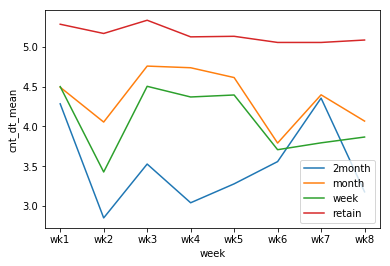

In [128]:
# label 별 접속일수 평균 변화 추이
plt.plot(ww1, label='2month')
plt.plot(ww2, label='month')
plt.plot(ww3, label='week')
plt.plot(ww4, label='retain')
plt.legend()
plt.ylabel('cnt_dt_mean')
plt.xlabel('week')
plt.show()

In [58]:
all_d=act.pivot(index='new_id',columns='wk',values=act.columns[2:])
all_d=all_d.fillna(0)
all_d.head

<bound method NDFrame.head of         npc_exp                                                npc_hongmun  \
wk          1.0   2.0    3.0    4.0 5.0    6.0     7.0     8.0         1.0   
new_id                                                                       
tr0           0     0      0      0   0      0       0       0           0   
tr1           0     0      0      0   0      0       0   46489           0   
tr10          0     0      0      0   0      0      28       0           0   
tr100      8126     0    347      0   0      0       0       0       75201   
tr1000        0     0      0      0   0      0       0   33623           0   
tr10000       0     0      0      0   0      0       0   33630           0   
tr10001       0     0      0      0   0      0       0   56782           0   
tr10002    6325     0      0      0   0      0       0       0       79706   
tr10003       0     0      0      0   0  10054       0       0      143070   
tr10004       0     0      0      

In [60]:
play_d=act.pivot(index='new_id',columns='wk',values='play_time')
play_d=play_d.fillna(play_d.agg('min',axis=0)[1])
play_d.head(10)


wk           1.0       2.0      3.0      4.0      5.0       6.0      7.0  \
new_id                                                                     
tr0          0.0       0.0      0.0      0.0      0.0       0.0      0.0   
tr1          0.0       0.0      0.0      0.0      0.0       0.0      0.0   
tr10         0.0       0.0      0.0      0.0      0.0       0.0   1136.0   
tr100    37125.0   14373.0   1805.0    621.0   1637.0     975.0   1097.0   
tr1000       0.0       0.0      0.0      0.0      0.0       0.0      0.0   
tr10000      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
tr10001      0.0       0.0      0.0      0.0      0.0       0.0      0.0   
tr10002  41786.0   25570.0   4457.0      0.0      0.0   28724.0      0.0   
tr10003  24519.0  115293.0  77179.0  29542.0  32640.0  160866.0  95921.0   
tr10004      0.0       0.0      0.0      0.0      0.0       0.0      0.0   

wk            8.0  
new_id             
tr0          20.0  
tr1       39907.0  
tr10        120.0  
tr100       989.0  
tr1000    39549.0  
tr10000   41922.0  
tr10001  104490.0  
tr10002   14747.0  
tr10003   35594.0  
tr10004   50714.0

In [64]:
play_d=play_d.reindex(index = play_d.index.to_series().str.replace('tr','').astype(int).sort_values().index)

In [65]:
play_d.agg('min',axis=0)[1]

0.0

In [66]:
play_d.columns

Float64Index([1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0], dtype='float64', name='wk')

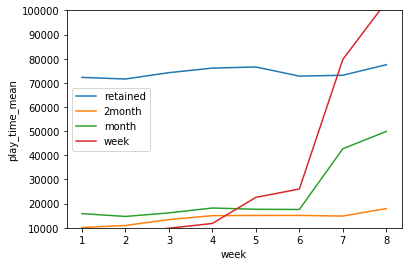

In [127]:
#pivot
#dat=act.pivot(index='new_id',columns='wk',values='')
#dat=dat.fillna(0)
#dat.head

#시각화

plt.plot(play_d.reset_index(drop=True)[lab['label']=='retained'].agg('mean',axis=0))
plt.plot(play_d.reset_index(drop=True)[lab['label']=='2month'].agg('mean',axis=0))
plt.plot(play_d.reset_index(drop=True)[lab['label']=='month'].agg('mean',axis=0))
plt.plot(play_d.reset_index(drop=True)[lab['label']=='week'].agg('mean',axis=0))
plt.ylim(10000,100000)
plt.legend(['retained','2month','month','week'])
plt.ylabel('play_time_mean')
plt.xlabel('week')
plt.show()


In [129]:
act.columns.tolist()

['cnt_dt',
 'play_time',
 'npc_exp',
 'npc_hongmun',
 'quest_exp',
 'quest_hongmun',
 'item_hongmun',
 'game_combat_time',
 'get_money',
 'duel_cnt',
 'duel_win',
 'partybattle_cnt',
 'partybattle_win',
 'cnt_enter_inzone_solo',
 'cnt_enter_inzone_light',
 'cnt_enter_inzone_skilled',
 'cnt_enter_inzone_normal',
 'cnt_enter_raid',
 'cnt_enter_raid_light',
 'cnt_enter_bam',
 'cnt_clear_inzone_solo',
 'cnt_clear_inzone_light',
 'cnt_clear_inzone_skilled',
 'cnt_clear_inzone_normal',
 'cnt_clear_raid',
 'cnt_clear_raid_light',
 'cnt_clear_bam',
 'normal_chat',
 'whisper_chat',
 'district_chat',
 'party_chat',
 'guild_chat',
 'faction_chat',
 'cnt_use_buffitem',
 'gathering_cnt',
 'making_cnt',
 'payment_amount',
 'wk',
 'new_id']

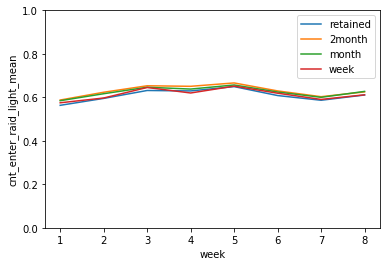

In [134]:
#pivot
dat=act.pivot(index='new_id',columns='wk',values='cnt_enter_raid_light')
dat=dat.fillna(0)
dat.head

#시각화

plt.plot(dat.reset_index(drop=True)[lab['label']=='retained'].agg('mean',axis=0))
plt.plot(dat.reset_index(drop=True)[lab['label']=='2month'].agg('mean',axis=0))
plt.plot(dat.reset_index(drop=True)[lab['label']=='month'].agg('mean',axis=0))
plt.plot(dat.reset_index(drop=True)[lab['label']=='week'].agg('mean',axis=0))
plt.ylim(0,1)
plt.legend(['retained','2month','month','week'])
plt.ylabel('cnt_enter_raid_light_mean')
plt.xlabel('week')
plt.show()


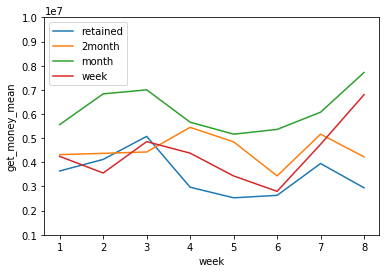

In [156]:
#pivot
dat=act.pivot(index='new_id',columns='wk',values='get_money')
dat=dat.fillna(0)
dat.head

#시각화

plt.plot(dat.reset_index(drop=True)[lab['label']=='retained'].agg('mean',axis=0))
plt.plot(dat.reset_index(drop=True)[lab['label']=='2month'].agg('mean',axis=0))
plt.plot(dat.reset_index(drop=True)[lab['label']=='month'].agg('mean',axis=0))
plt.plot(dat.reset_index(drop=True)[lab['label']=='week'].agg('mean',axis=0))
plt.ylim(1000000,10000000)
plt.legend(['retained','2month','month','week'])
plt.ylabel('get_money_mean')
plt.xlabel('week')
plt.show()


In [88]:
#각 변수들이 시간차에 따라 어떻게 변하는지를 plotting 해주는 함수
def tsss1(cname='play_time',statistics='mean',mapping=mapping,max_lim=100000):
    dat=act.pivot(index='new_id',columns='wk',values=cname)
    dat=dat.fillna(min(act[cname]))
    dat=dat.reindex(index = dat.index.to_series().str.replace('tr','').astype(int).sort_values().index).reset_index(drop=True)
    
    for i in ['retained','2month','month','week']:
        plt.plot(dat[lab['label']==i].agg(statistics,axis=0))
        plt.plot([-1,0,0,0,0,0,0,0,0])
        plt.legend(i)
        plt.ylim([min(act[cname])*2,max_lim])
        plt.show()
    return dat

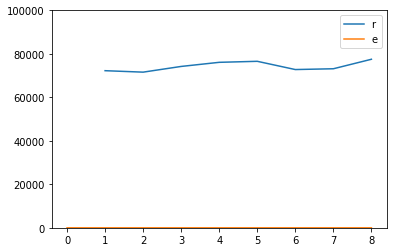

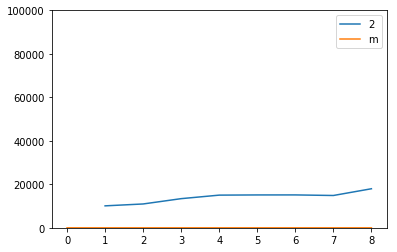

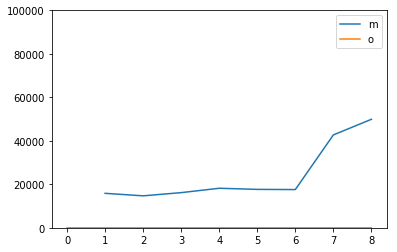

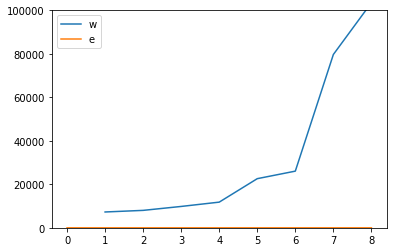

wk          1.0       2.0       3.0       4.0       5.0       6.0       7.0  \
0           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
1           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
2           0.0       0.0       0.0       0.0  170571.0  467073.0       0.0   
3           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
4      142257.0  230385.0  206297.0  253806.0  148423.0   34940.0  126064.0   
5        1593.0     462.0     687.0     340.0     468.0     463.0     573.0   
6           0.0       0.0       0.0       0.0       0.0       0.0  340612.0   
7          73.0     127.0      45.0     103.0      74.0     102.0      74.0   
8           0.0       0.0       0.0       0.0       0.0       0.0       0.0   
9           0.0       0.0       0.0    1548.0     595.0       0.0     501.0   
10          0.0       0.0       0.0       0.0       0.0       0.0    1136.0   
11     116240.0  118701.0  134598.0  204157.0  104720.0  166948.0   98885.0   
12          0.0     535.0     695.0     352.0     876.0       0.0     619.0   
13          0.0       0.0    1493.0     236.0     352.0       0.0     120.0   
14          0.0       0.0       0.0     482.0     716.0     636.0     597.0   
15          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
16          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
17          0.0       0.0       0.0    1576.0     601.0       0.0     247.0   
18          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
19      34787.0   29785.0   73126.0   68150.0  121339.0   44272.0   69044.0   
20          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
21      18478.0   17660.0   20399.0   13296.0   12252.0   23998.0    5913.0   
22          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
23     260262.0  157919.0  195401.0   99096.0   10453.0  119567.0  159669.0   
24          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
25          0.0       0.0       0.0       0.0       0.0       0.0  119833.0   
26          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
27          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
28          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
29          0.0       0.0       0.0       0.0       0.0       0.0       0.0   
...         ...       ...       ...       ...       ...       ...       ...   
99970       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
99971  110985.0  100883.0   94895.0   99675.0   85662.0   55132.0   58629.0   
99972       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
99973       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
99974     125.0     249.0     626.0     504.0     638.0       0.0     498.0   
99975       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
99976  239557.0       0.0       0.0       0.0       0.0     114.0     215.0   
99977       0.0     243.0     381.0     948.0       0.0     240.0     379.0   
99978  190946.0  180079.0  174989.0  187050.0  188317.0  144628.0  139271.0   
99979       0.0       0.0    1234.0     233.0     351.0       0.0     708.0   
99980   29758.0   56759.0   43104.0   34181.0   72529.0   29787.0   25692.0   
99981       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
99982       0.0       0.0       0.0       0.0       0.0       0.0       0.0   
99983       0.0       0.0       0.0       0.0       0.0       0.0   17490.0   
99984       0.0       0.0       0.0       0.0       0.0    1150.0     255.0   
99985     311.0     370.0     499.0     494.0     621.0       0.0     615.0   
99986   30928.0   32366.0   33164.0   35424.0   25183.0   31342.0   26605.0   
99987    8647.0   22815.0   18523.0   40557.0   14815.0   20263.0   20224.0   
99988     974.0    1352.0     575.0     551.0    1

In [89]:
tsss1()

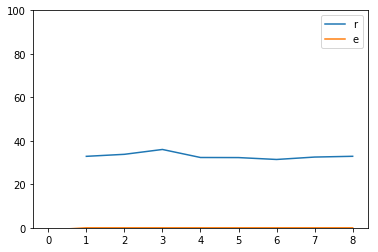

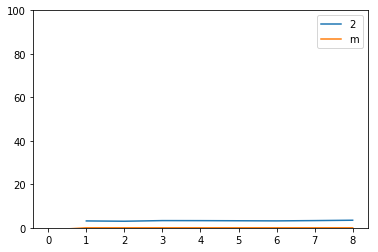

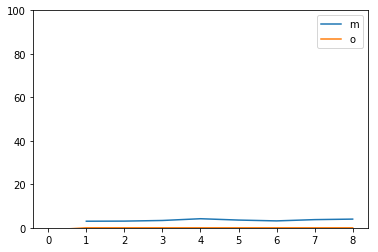

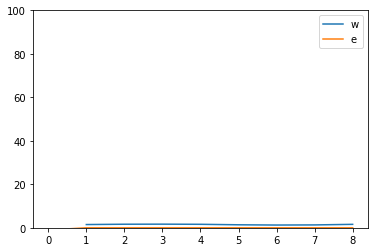

wk      1.0    2.0    3.0    4.0   5.0   6.0    7.0   8.0
0       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
1       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
2       0.0    0.0    0.0    0.0   0.0   0.0    0.0  10.0
3       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
4       6.0  192.0   59.0   75.0  46.0   1.0   75.0   6.0
5       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
6       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
7       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
8       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
9       0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
10      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
11     12.0    0.0    0.0    1.0   0.0   0.0    0.0   3.0
12      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
13      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
14      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
15      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
16      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
17      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
18      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
19      7.0   19.0    7.0    0.0  40.0   8.0   64.0  27.0
20      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
21      7.0    6.0    7.0    7.0   5.0   3.0    2.0   4.0
22      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
23      0.0   28.0   34.0   23.0   1.0  16.0   29.0  19.0
24      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
25      0.0    0.0    0.0    0.0   0.0   0.0    0.0  14.0
26      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
27      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
28      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
29      0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
...     ...    ...    ...    ...   ...   ...    ...   ...
99970   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99971   0.0    0.0    1.0    2.0   0.0   0.0    0.0   0.0
99972   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99973   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99974   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99975   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99976  23.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99977   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99978  24.0   28.0   29.0   33.0  31.0  33.0   31.0  34.0
99979   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99980   7.0    6.0    6.0    7.0   4.0   7.0    7.0   7.0
99981   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99982   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99983   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99984   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99985   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99986   7.0    6.0    5.0    7.0   5.0   7.0    6.0   7.0
99987   5.0    7.0    7.0    4.0   7.0   7.0    6.0   2.0
99988   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99989   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99990   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99991   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99992  11.0    8.0    7.0    8.0   8.0   7.0    8.0   7.0
99993  99.0   32.0  103.0   22.0  14.0  13.0   44.0   0.0
99994  55.0   38.0   41.0   52.0  55.0  58.0  101.0  11.0
99995   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99996   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99997   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0
99998  37.0   52.0  220.0  213.0  29.0  15.0  102.0  97.0
99999   0.0    0.0    0.0    0.0   0.0   0.0    0.0   0.0

[100000 rows x 8 columns]

In [91]:
tsss1(cname='whisper_chat',max_lim=100)

In [98]:
#각 변수들이 시간차에 따라 어떻게 변하는지를 plotting 해주는 함수
def tsss2(cname='play_time',statistics='mean',mapping=mapping,max_lim=120000):
    dat=act.pivot(index='new_id',columns='wk',values=cname)
    dat=dat.reindex(index = dat.index.to_series().str.replace('tr','').astype(int).sort_values().index).reset_index(drop=True)
    for i in ['retained','2month','month','week']:
        plt.plot(dat[lab['label']==i].agg(statistics,axis=0))
        plt.plot([-100,0,0,0,0,0,0,0,0])
        plt.legend(i)
        plt.ylim([min(act[cname]),max_lim])
        plt.show()
    return dat

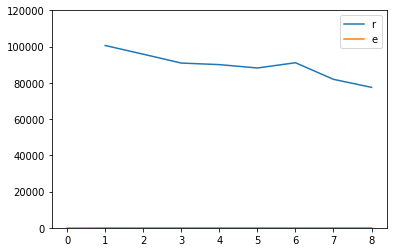

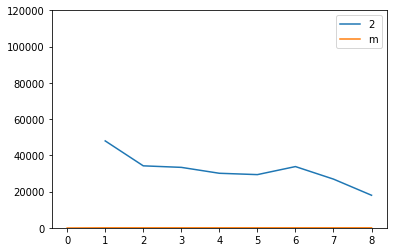

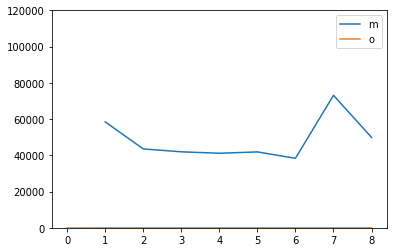

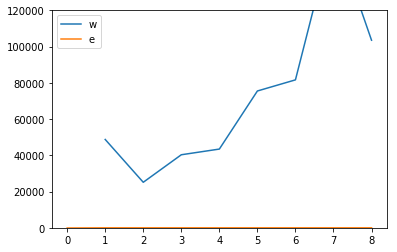

wk          1.0       2.0       3.0       4.0       5.0       6.0       7.0  \
0           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2           NaN       NaN       NaN       NaN  170571.0  467073.0       NaN   
3           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4      142257.0  230385.0  206297.0  253806.0  148423.0   34940.0  126064.0   
5        1593.0     462.0     687.0     340.0     468.0     463.0     573.0   
6           NaN       NaN       NaN       NaN       NaN       NaN  340612.0   
7          73.0     127.0      45.0     103.0      74.0     102.0      74.0   
8           NaN       NaN       NaN       NaN       NaN       NaN       NaN   
9           NaN       NaN       NaN    1548.0     595.0       NaN     501.0   
10          NaN       NaN       NaN       NaN       NaN       NaN    1136.0   
11     116240.0  118701.0  134598.0  204157.0  104720.0  166948.0   98885.0   
12          NaN     535.0     695.0     352.0     876.0       NaN     619.0   
13          NaN       NaN    1493.0     236.0     352.0       NaN     120.0   
14          NaN       NaN       NaN     482.0     716.0     636.0     597.0   
15          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
16          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
17          NaN       NaN       NaN    1576.0     601.0       NaN     247.0   
18          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
19      34787.0   29785.0   73126.0   68150.0  121339.0   44272.0   69044.0   
20          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
21      18478.0   17660.0   20399.0   13296.0   12252.0   23998.0    5913.0   
22          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
23     260262.0  157919.0  195401.0   99096.0   10453.0  119567.0  159669.0   
24          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
25          NaN       NaN       NaN       NaN       NaN       NaN  119833.0   
26          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
27          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
28          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
29          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
...         ...       ...       ...       ...       ...       ...       ...   
99970       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99971  110985.0  100883.0   94895.0   99675.0   85662.0   55132.0   58629.0   
99972       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99973       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99974     125.0     249.0     626.0     504.0     638.0       NaN     498.0   
99975       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99976  239557.0       NaN       NaN       NaN       NaN     114.0     215.0   
99977       NaN     243.0     381.0     948.0       NaN     240.0     379.0   
99978  190946.0  180079.0  174989.0  187050.0  188317.0  144628.0  139271.0   
99979       NaN       NaN    1234.0     233.0     351.0       NaN     708.0   
99980   29758.0   56759.0   43104.0   34181.0   72529.0   29787.0   25692.0   
99981       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99982       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
99983       NaN       NaN       NaN       NaN       NaN       NaN   17490.0   
99984       NaN       NaN       NaN       NaN       NaN    1150.0     255.0   
99985     311.0     370.0     499.0     494.0     621.0       NaN     615.0   
99986   30928.0   32366.0   33164.0   35424.0   25183.0   31342.0   26605.0   
99987    8647.0   22815.0   18523.0   40557.0   14815.0   20263.0   20224.0   
99988     974.0    1352.0     575.0     551.0    1

In [99]:
tsss2()

No handles with labels found to put in legend.


retained


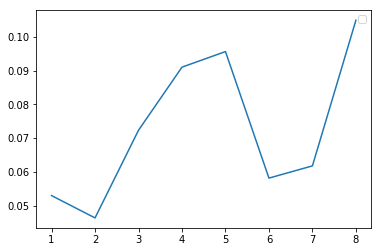

2month


No handles with labels found to put in legend.


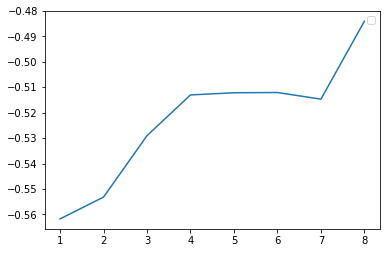

month


No handles with labels found to put in legend.


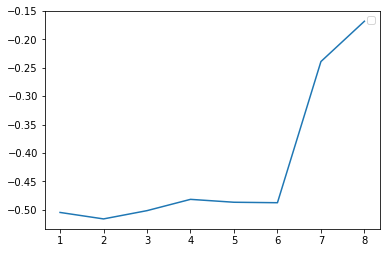

week


No handles with labels found to put in legend.


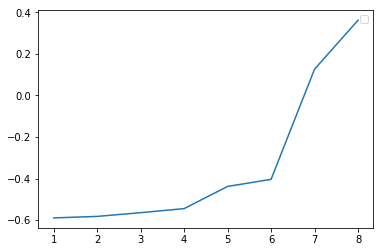

In [437]:
#주차별 playtime 비교

for i in ['retained','2month','month','week']:
    print(i)
    plt.plot(play_d[lab['label']==i].agg('mean',axis=0))
    plt.legend()
    plt.show()



No handles with labels found to put in legend.


retained


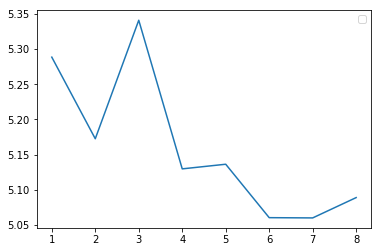

2month


No handles with labels found to put in legend.


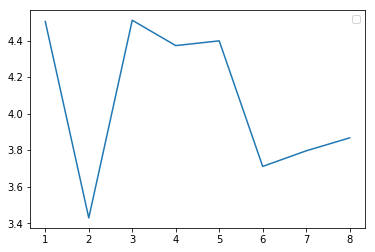

month


No handles with labels found to put in legend.


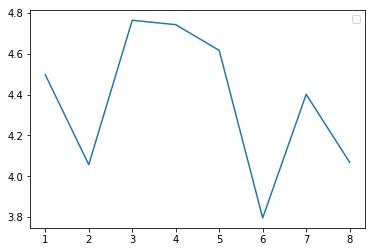

week


No handles with labels found to put in legend.


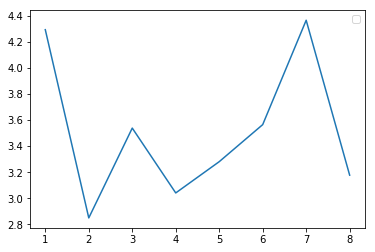

In [440]:
#출석 일 수
for i in ['retained','2month','month','week']:
    print(i)
    plt.plot(tidy[lab['label']==i].agg('mean',axis=0))
    plt.legend()
    plt.show()


In [451]:
play_d[lab['label']==i].head(10)

wk             1         2         3         4         5         6         7  \
new_id                                                                         
1      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
3      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
16     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
20     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
22     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
24     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
25     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618  0.523559   
27     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
30     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
31     -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   

wk             8  
new_id            
1      -0.266961  
3       0.044634  
16      2.367038  
20     -0.658522  
22      1.779019  
24      1.784241  
25     -0.332783  
27      1.555530  
30      3.506530  
31     -0.660115

In [452]:
play_d.apply(lambda x:x, axis=0).head(10)

wk             1         2         3         4         5         6         7  \
new_id                                                                         
0      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
1      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
2      -0.661618 -0.661618 -0.661618 -0.661618  1.025391  3.957989 -0.661618   
3      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
4       0.745347  1.616990  1.378744  1.848639  0.806333 -0.316088  0.585188   
5      -0.645912 -0.657098 -0.654872 -0.658305 -0.657039 -0.657088 -0.656000   
6      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618  2.707207   
7      -0.660945 -0.660411 -0.661222 -0.660649 -0.660935 -0.660659 -0.660935   
8      -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618 -0.661618   
9      -0.661618 -0.661618 -0.661618 -0.646357 -0.655782 -0.661618 -0.656712   

wk             8  
new_id            
0      -0.661470  
1      -0.266961  
2       0.032587  
3       0.044634  
4       0.324352  
5      -0.657830  
6       2.582279  
7      -0.660945  
8      -0.650461  
9      -0.656326

In [337]:
act.columns[1:]

Index(['wk', 'cnt_dt', 'play_time', 'npc_exp', 'npc_hongmun', 'quest_exp',
       'quest_hongmun', 'item_hongmun', 'game_combat_time', 'get_money',
       'duel_cnt', 'duel_win', 'partybattle_cnt', 'partybattle_win',
       'cnt_enter_inzone_solo', 'cnt_enter_inzone_light',
       'cnt_enter_inzone_skilled', 'cnt_enter_inzone_normal', 'cnt_enter_raid',
       'cnt_enter_raid_light', 'cnt_enter_bam', 'cnt_clear_inzone_solo',
       'cnt_clear_inzone_light', 'cnt_clear_inzone_skilled',
       'cnt_clear_inzone_normal', 'cnt_clear_raid', 'cnt_clear_raid_light',
       'cnt_clear_bam', 'normal_chat', 'whisper_chat', 'district_chat',
       'party_chat', 'guild_chat', 'faction_chat', 'cnt_use_buffitem',
       'gathering_cnt', 'making_cnt'],
      dtype='object')

In [299]:
start=0
for i in range(len(wks)):
    end=start+9
    for a in range(start,end):
        if act['new_id'][a]!=i:
            start=a
            break
        elif act['new_id'][a]==i:
            wks['wk'+str(act['wk'][a])][i]=act['cnt_dt'][a]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


KeyboardInterrupt: 

In [282]:
act['new_id'][act['wk']==8]

0             0
1             1
4             2
5             3
13            4
21            5
23            6
31            7
32            8
36            9
38           10
46           11
52           12
57           13
62           14
63           15
64           16
68           17
69           18
77           19
78           20
86           21
87           22
95           23
96           24
98           25
99           26
100          27
101          28
102          29
          ...  
440189    99970
440197    99971
440198    99972
440199    99973
440206    99974
440207    99975
440211    99976
440217    99977
440225    99978
440230    99979
440238    99980
440239    99981
440240    99982
440242    99983
440245    99984
440252    99985
440260    99986
440268    99987
440276    99988
440277    99989
440278    99990
440279    99991
440287    99992
440295    99993
440303    99994
440305    99995
440312    99996
440313    99997
440321    99998
440322    99999
Name: new_id, Length: 10

In [18]:
#최소값 저장

mins=[]
for i in act.columns:
    mins.append(min(act[i]))

In [19]:
mins[3:]=[2*i for i in mins[3:]]

In [20]:
mins

['tr0',
 1,
 1,
 -1.323334747371734,
 -0.463748087674236,
 -0.5816063883245419,
 -0.500846710905516,
 -0.975332497741534,
 -0.612707203537586,
 -1.1396836298732458,
 -0.047085729105456,
 -0.0723360861417214,
 -0.0826514122438142,
 -0.334945079116458,
 -0.319744912102698,
 -0.617498029577414,
 -0.8491829347718342,
 -0.3813428592010779,
 -0.916677830404662,
 -0.7362592979747122,
 -0.804105514501484,
 -0.095285801120587,
 -0.613004612313638,
 -0.8605266797807902,
 -0.377575731236008,
 -0.925096206596808,
 -0.73523225561203,
 -0.802315835196108,
 -0.0662608473972066,
 -0.068075322671357,
 -0.46365390107384,
 -0.0331477100898446,
 -0.5503475772826241,
 -0.6865863198182642,
 -0.0480560436579132,
 -1.007384064418698,
 -0.0555166222405974,
 -0.731072929104356]

In [176]:
mins[3]

-0.661667373685867

In [63]:
#pd dataframe을 받아서 각 column의 최소값을 반환
def cal_min(data):
    minss = []
    for i in data.columns:
        minss.append(data[i])
        

In [22]:
act

new_id  wk  cnt_dt  play_time   npc_exp  npc_hongmun  quest_exp  \
0           tr0   8       1  -0.661470 -0.231874    -0.290803  -0.250423   
1           tr1   8       1  -0.266961  1.185225    -0.290803   0.251172   
2           tr2   5       3   1.025391  3.569807    -0.241648   2.333390   
3           tr2   6       7   3.957989  9.314319    -0.046188   8.192729   
4           tr2   8       2   0.032587 -0.231874    -0.006354  -0.250423   
5           tr3   8       2   0.044634  1.146086    -0.281333   0.632153   
6           tr4   1       7   0.745347 -0.222364     1.148897  -0.029679   
7           tr4   2       7   1.616990 -0.127258     1.978424  -0.139387   
8           tr4   3       7   1.378744 -0.231874     0.759673  -0.250423   
9           tr4   4       7   1.848639 -0.005694     0.523220   0.754450   
10          tr4   5       7   0.806333 -0.231874     0.174573  -0.200980   
11          tr4   6       6  -0.316088 -0.231874    -0.002007  -0.250423   
12          tr4   7       7   0.585188 -0.231874     0.304818  -0.250423   
13          tr4   8       7   0.324352 -0.231874     0.222775  -0.250423   
14          tr5   1       5  -0.645912 -0.231874    -0.290803  -0.250423   
15          tr5   2       4  -0.657098 -0.231874    -0.290803  -0.250423   
16          tr5   3       6  -0.654872 -0.231874    -0.290803  -0.250423   
17          tr5   4       3  -0.658305 -0.231874    -0.290803  -0.250423   
18          tr5   5       4  -0.657039 -0.231874    -0.290803  -0.250423   
19          tr5   6       4  -0.657088 -0.231874    -0.290803  -0.250423   
20          tr5   7       5  -0.656000 -0.231874    -0.290803  -0.250423   
21          tr5   8       4  -0.657830 -0.231874    -0.290803  -0.250423   
22          tr6   7       5   2.707207  5.900496    -0.207050   6.150211   
23          tr6   8       5   2.582279  3.877802    -0.251952   4.412774   
24          tr7   1       3  -0.660945 -0.231874    -0.290803  -0.250423   
25          tr7   2       3  -0.660411 -0.231874    -0.290803  -0.250423   
26          tr7   3       2  -0.661222 -0.231874    -0.290803  -0.250423   
27          tr7   4       4  -0.660649 -0.231874    -0.290803  -0.250423   
28          tr7   5       3  -0.660935 -0.231874    -0.290803  -0.250423   
29          tr7   6       4  -0.660659 -0.231874    -0.290803  -0.250423   
...         ...  ..     ...        ...       ...          ...        ...   
440293  tr99993   6       7   1.676137 -0.231874     0.443651  -0.250423   
440294  tr99993   7       7   2.324449 -0.231874     0.486271  -0.250423   
440295  tr99993   8       6   0.132404 -0.231874    -0.065465  -0.250423   
440296  tr99994   1       7   0.551471 -0.231874     0.604563  -0.250423   
440297  tr99994   2       6   0.493729 -0.231874     0.651179  -0.250423   
440298  tr99994   3       7   0.717584 -0.231874     1.415360  -0.250423   
440299  tr99994   4       7   0.401093 -0.231874     0.345187  -0.250423   
440300  tr99994   5       7   0.836658 -0.231874     1.667986  -0.250423   
440301  tr99994   6       7   0.681760 -0.231874     0.844444  -0.250423   
440302  tr99994   7       7   0.964524 -0.231874     1.493203  -0.250423   
440303  tr99994   8       7   0.250824 -0.231874     0.626400  -0.250423   
440304  tr99995   6       1  -0.650412 -0.231021    -0.290803  -0.245978   
440305  tr99995   8       4  -0.657375 -0.231874    -0.290803  -0.250423   
440306  tr99996   2       1  -0.660045 -0.231874    -0.290803  -0.250423   
440307  tr99996   3       6  -0.653913 -0.231874    -0.290803  -0.250423   
440308  tr99996   4       3  -0.657701 -0.231874    -0.290803  -0.250423   
440309  tr99996   5       5  -0.653419 -0.231874    -0.290803  -0.250423   
440310  tr99996   6       2  -0.659155 -0.231874    -0.290803  -0.250423   
440311  tr99996   7       3  -0.657632 -0.231874    -0.290803  -0.250423   
440312  tr99996   8       4  -0.654427 -0.231874    -0.290803  -0.250423   
440313  tr99997   8       4  -0.658858 -0.231874    -0.29

In [24]:
#numpy array로 time series data를 만듦
ts_data=np.zeros((100000,8,len(act.columns)-2),dtype=np.float64)
ll=list(act[act.columns[0]])
start=0
for i in range(100000):
    end=start+9
    usr_dat=[]
    for a in range(start,end):
        print(a)
        if act['new_id'][a]!=i:
            start=a
            not_included=[x for x in [0,1,2,3,4,5,6,7] if x not in usr_dat]
            print(not_included)
            ts_data[i,not_included,1:]=mins[3:]
            ts_data[i,not_included,0]=0
            break
        elif act['new_id'][a]==i:
            ts_data[i,act['wk'][a]-1]=act.iloc[a][2:]
            usr_dat.append(act['wk'][a]-1)

0
1
[0, 1, 2, 3, 4, 5, 6]
1
2
[0, 1, 2, 3, 4, 5, 6]
2
3
4
5
[0, 1, 2, 3, 6]
5
6
[0, 1, 2, 3, 4, 5, 6]
6
7
8
9
10
11
12
13
14
[]
14
15
16
17
18
19
20
21
22
[]
22
23
24
[0, 1, 2, 3, 4, 5]
24
25
26
27
28
29
30
31
32
[]
32
33
[0, 1, 2, 3, 4, 5, 6]
33
34
35
36
37
[0, 1, 2, 5]
37
38
39
[0, 1, 2, 3, 4, 5]
39
40
41
42
43
44
45
46
47
[]
47
48
49
50
51
52
53
[0, 5]
53
54
55
56
57
58
[0, 1, 5]
58
59
60
61
62
63
[0, 1, 2]
63
64
[0, 1, 2, 3, 4, 5, 6]
64
65
[0, 1, 2, 3, 4, 5, 6]
65
66
67
68
69
[0, 1, 2, 5]
69
70
[0, 1, 2, 3, 4, 5, 6]
70
71
72
73
74
75
76
77
78
[]
78
79
[0, 1, 2, 3, 4, 5, 6]
79
80
81
82
83
84
85
86
87
[]
87
88
[0, 1, 2, 3, 4, 5, 6]
88
89
90
91
92
93
94
95
96
[]
96
97
[0, 1, 2, 3, 4, 5, 6]
97
98
99
[0, 1, 2, 3, 4, 5]
99
100
[0, 1, 2, 3, 4, 5, 6]
100
101
[0, 1, 2, 3, 4, 5, 6]
101
102
[0, 1, 2, 3, 4, 5, 6]
102
103
[0, 1, 2, 3, 4, 5, 6]
103
104
[0, 1, 2, 3, 4, 5, 6]
104
105
[0, 1, 2, 3, 4, 5, 6]
105
106
[0, 1, 2, 3, 4, 5, 6]
106
107
[0, 1, 2, 3, 4, 5, 6]
107
108
[0, 1, 2, 3, 4, 5, 6]
108

1153
1154
1155
1156
1157
1158
1159
1160
[0]
1160
1161
1162
1163
1164
1165
1166
[0, 6]
1166
1167
1168
[0, 1, 2, 3, 4, 5]
1168
1169
1170
1171
1172
1173
1174
1175
1176
[]
1176
1177
1178
1179
1180
1181
1182
1183
1184
[]
1184
1185
1186
[0, 1, 2, 3, 4, 5]
1186
1187
1188
[0, 1, 2, 3, 4, 5]
1188
1189
1190
1191
[0, 1, 2, 3, 4]
1191
1192
1193
1194
[0, 1, 2, 3, 4]
1194
1195
[0, 1, 2, 3, 4, 5, 6]
1195
1196
1197
1198
1199
[0, 2, 4, 5]
1199
1200
1201
[0, 1, 2, 3, 4, 5]
1201
1202
1203
1204
1205
1206
[0, 5, 6]
1206
1207
1208
1209
1210
1211
[0, 1, 5]
1211
1212
[0, 1, 2, 3, 4, 5, 6]
1212
1213
1214
1215
1216
1217
1218
1219
1220
[]
1220
1221
1222
1223
1224
1225
1226
1227
1228
[]
1228
1229
[0, 1, 2, 3, 4, 5, 6]
1229
1230
1231
1232
1233
1234
1235
1236
[0]
1236
1237
1238
1239
1240
1241
1242
1243
1244
[]
1244
1245
1246
1247
1248
1249
1250
1251
1252
[]
1252
1253
[0, 1, 2, 3, 4, 5, 6]
1253
1254
1255
1256
1257
1258
1259
[0, 5]
1259
1260
1261
[0, 1, 2, 3, 4, 6]
1261
1262
[0, 1, 2, 3, 4, 5, 6]
1262
1263
1264
1265


2288
2289
2290
2291
2292
2293
2294
[]
2294
2295
[0, 1, 2, 3, 4, 5, 6]
2295
2296
2297
[0, 1, 2, 3, 4, 5]
2297
2298
2299
2300
2301
[0, 1, 2, 5]
2301
2302
2303
2304
2305
2306
2307
2308
2309
[]
2309
2310
2311
2312
2313
2314
2315
2316
2317
[]
2317
2318
2319
2320
2321
2322
2323
[1, 5]
2323
2324
2325
2326
2327
2328
2329
2330
2331
[]
2331
2332
2333
2334
2335
2336
2337
2338
[5]
2338
2339
2340
2341
2342
2343
[0, 5, 6]
2343
2344
2345
2346
2347
2348
2349
2350
[0]
2350
2351
[0, 1, 2, 3, 4, 5, 6]
2351
2352
[0, 1, 2, 3, 4, 5, 6]
2352
2353
2354
2355
2356
2357
[0, 5, 6]
2357
2358
2359
2360
2361
2362
2363
2364
[0]
2364
2365
2366
2367
[0, 1, 2, 3, 4]
2367
2368
2369
2370
[0, 1, 2, 3, 5]
2370
2371
2372
2373
2374
[0, 2, 3, 5]
2374
2375
[0, 1, 2, 3, 4, 5, 6]
2375
2376
2377
2378
2379
2380
2381
2382
2383
[]
2383
2384
[0, 1, 2, 3, 4, 5, 6]
2384
2385
2386
2387
2388
[1, 2, 3, 4]
2388
2389
[0, 1, 2, 3, 4, 5, 6]
2389
2390
[0, 1, 2, 3, 4, 5, 6]
2390
2391
2392
2393
2394
[0, 1, 5, 6]
2394
2395
2396
2397
2398
2399
2400

3297
3298
3299
3300
3301
3302
3303
3304
[0]
3304
3305
3306
3307
3308
3309
3310
3311
3312
[]
3312
3313
3314
[0, 1, 2, 3, 4, 5]
3314
3315
3316
[0, 2, 3, 4, 5, 6]
3316
3317
[0, 1, 2, 3, 4, 5, 6]
3317
3318
3319
3320
3321
[0, 2, 3, 4]
3321
3322
3323
3324
3325
3326
3327
[0, 4]
3327
3328
3329
3330
3331
3332
3333
3334
3335
[]
3335
3336
3337
3338
3339
[0, 1, 2, 3]
3339
3340
3341
3342
3343
3344
3345
3346
3347
[]
3347
3348
3349
3350
3351
3352
3353
3354
3355
[]
3355
3356
3357
3358
3359
3360
3361
3362
[0]
3362
3363
[0, 1, 2, 3, 4, 5, 6]
3363
3364
3365
3366
[2, 3, 4, 5, 6]
3366
3367
3368
3369
3370
3371
[0, 1, 2]
3371
3372
3373
3374
3375
[0, 1, 2, 3]
3375
3376
3377
3378
3379
3380
[0, 5, 6]
3380
3381
3382
[1, 2, 3, 4, 5, 6]
3382
3383
3384
[0, 1, 2, 3, 4, 5]
3384
3385
3386
3387
[2, 3, 4, 5, 6]
3387
3388
3389
3390
3391
3392
[0, 1, 2]
3392
3393
3394
3395
[0, 1, 3, 5, 6]
3395
3396
[0, 1, 2, 3, 4, 5, 6]
3396
3397
3398
[0, 1, 2, 3, 4, 6]
3398
3399
3400
3401
3402
3403
[0, 1, 2]
3403
3404
3405
3406
3407
[0, 2

4367
4368
[0, 1, 2, 3, 4, 5, 6]
4368
4369
4370
4371
4372
4373
4374
4375
[0]
4375
4376
4377
4378
4379
4380
4381
4382
4383
[]
4383
4384
4385
4386
4387
4388
4389
4390
4391
[]
4391
4392
4393
4394
4395
4396
4397
4398
4399
[]
4399
4400
4401
[0, 1, 2, 3, 4, 5]
4401
4402
4403
4404
4405
4406
4407
4408
[0]
4408
4409
[0, 1, 2, 3, 4, 5, 6]
4409
4410
4411
4412
[0, 1, 2, 3, 4]
4412
4413
[0, 1, 2, 3, 4, 5, 6]
4413
4414
4415
4416
4417
4418
4419
4420
4421
[]
4421
4422
4423
4424
4425
4426
4427
4428
[2]
4428
4429
4430
4431
4432
4433
4434
4435
[1]
4435
4436
4437
4438
4439
4440
4441
4442
4443
[]
4443
4444
4445
4446
4447
4448
4449
4450
4451
[]
4451
4452
4453
4454
4455
[1, 2, 4, 5]
4455
4456
4457
4458
4459
4460
4461
4462
[0]
4462
4463
[0, 1, 2, 3, 4, 5, 6]
4463
4464
4465
4466
4467
4468
4469
4470
4471
[]
4471
4472
4473
4474
4475
4476
4477
4478
4479
[]
4479
4480
4481
4482
4483
4484
4485
4486
4487
[]
4487
4488
4489
4490
4491
4492
4493
[4, 5]
4493
4494
4495
4496
[0, 1, 2, 3, 4]
4496
4497
[0, 1, 2, 3, 4, 5, 6]
44

[0, 5, 6]
5402
5403
[0, 1, 2, 3, 4, 5, 6]
5403
5404
5405
5406
5407
5408
5409
5410
[5]
5410
5411
5412
5413
5414
5415
5416
5417
5418
[]
5418
5419
5420
5421
[0, 1, 2, 3, 4]
5421
5422
[0, 1, 2, 3, 4, 5, 6]
5422
5423
5424
5425
5426
5427
5428
5429
5430
[]
5430
5431
[0, 1, 2, 3, 4, 5, 6]
5431
5432
5433
[0, 1, 2, 3, 4, 6]
5433
5434
[0, 1, 2, 3, 4, 5, 6]
5434
5435
5436
5437
5438
5439
[0, 4, 5]
5439
5440
5441
5442
5443
5444
[0, 1, 5]
5444
5445
5446
5447
5448
5449
5450
5451
[0]
5451
5452
5453
5454
5455
5456
5457
5458
5459
[]
5459
5460
5461
5462
[0, 1, 2, 3, 4]
5462
5463
5464
5465
5466
5467
5468
5469
5470
[]
5470
5471
5472
[0, 1, 2, 3, 4, 5]
5472
5473
5474
[0, 1, 2, 3, 4, 5]
5474
5475
5476
5477
5478
[1, 2, 3, 4]
5478
5479
5480
5481
5482
5483
5484
5485
5486
[]
5486
5487
5488
[0, 1, 2, 3, 4, 5]
5488
5489
5490
5491
5492
5493
5494
5495
[3]
5495
5496
5497
5498
5499
5500
5501
5502
5503
[]
5503
5504
5505
5506
5507
5508
5509
5510
5511
[]
5511
5512
5513
[0, 1, 2, 3, 4, 5]
5513
5514
5515
5516
5517
5518
5519

6778
[0, 1, 2]
6778
6779
6780
6781
6782
6783
6784
6785
[1]
6785
6786
[0, 1, 2, 3, 4, 5, 6]
6786
6787
6788
6789
6790
6791
6792
6793
6794
[]
6794
6795
[0, 1, 2, 3, 4, 5, 6]
6795
6796
6797
6798
6799
[0, 3, 4, 5]
6799
6800
[0, 1, 2, 3, 4, 5, 6]
6800
6801
6802
6803
6804
6805
6806
6807
[0]
6807
6808
6809
6810
6811
6812
6813
6814
6815
[]
6815
6816
6817
6818
6819
6820
6821
[1, 4]
6821
6822
6823
[0, 1, 2, 3, 4, 5]
6823
6824
6825
[0, 1, 2, 3, 4, 5]
6825
6826
6827
6828
6829
6830
6831
6832
6833
[]
6833
6834
6835
6836
6837
6838
[0, 1, 2]
6838
6839
6840
6841
6842
6843
6844
6845
6846
[]
6846
6847
[0, 1, 2, 3, 4, 5, 6]
6847
6848
6849
6850
6851
6852
6853
6854
6855
[]
6855
6856
[0, 1, 2, 3, 4, 5, 6]
6856
6857
6858
6859
[0, 1, 2, 3, 4]
6859
6860
6861
6862
6863
6864
6865
6866
6867
[]
6867
6868
6869
[0, 1, 2, 3, 4, 5]
6869
6870
[0, 1, 2, 3, 4, 5, 6]
6870
6871
6872
6873
6874
6875
6876
6877
6878
[]
6878
6879
6880
6881
6882
6883
6884
6885
6886
[]
6886
6887
6888
[0, 1, 2, 3, 4, 6]
6888
6889
6890
6891
6892
6893

8168
8169
[0, 1, 2, 3, 4, 5]
8169
8170
8171
8172
8173
8174
8175
8176
8177
[]
8177
8178
8179
8180
8181
8182
8183
8184
[0]
8184
8185
8186
8187
8188
8189
8190
8191
8192
[]
8192
8193
8194
[0, 1, 2, 3, 4, 6]
8194
8195
[0, 1, 2, 3, 4, 5, 6]
8195
8196
8197
8198
8199
8200
8201
8202
[0]
8202
8203
8204
8205
8206
8207
8208
8209
8210
[]
8210
8211
[0, 1, 2, 3, 4, 5, 6]
8211
8212
[0, 1, 2, 3, 4, 5, 6]
8212
8213
8214
8215
[0, 1, 2, 3, 5]
8215
8216
[0, 1, 2, 3, 4, 5, 6]
8216
8217
[0, 1, 2, 3, 4, 5, 6]
8217
8218
[0, 1, 2, 3, 4, 5, 6]
8218
8219
8220
[0, 1, 2, 3, 4, 5]
8220
8221
8222
8223
8224
8225
8226
8227
8228
[]
8228
8229
8230
8231
[0, 1, 2, 3, 5]
8231
8232
8233
8234
8235
8236
8237
8238
8239
[]
8239
8240
8241
8242
8243
[0, 1, 2, 3]
8243
8244
[0, 1, 2, 3, 4, 5, 6]
8244
8245
8246
8247
8248
8249
8250
8251
8252
[]
8252
8253
8254
8255
8256
8257
[0, 5, 6]
8257
8258
8259
8260
[0, 1, 2, 3, 4]
8260
8261
8262
8263
8264
8265
[0, 1, 2]
8265
8266
8267
8268
8269
[0, 1, 2, 5]
8269
8270
[0, 1, 2, 3, 4, 5, 6]
8270
82

9072
9073
9074
9075
9076
9077
9078
[]
9078
9079
9080
9081
9082
9083
9084
9085
[0]
9085
9086
[0, 1, 2, 3, 4, 5, 6]
9086
9087
9088
9089
9090
[3, 4, 5, 6]
9090
9091
[0, 1, 2, 3, 4, 5, 6]
9091
9092
9093
9094
[0, 1, 2, 3, 4]
9094
9095
9096
9097
9098
9099
9100
9101
[0]
9101
9102
9103
9104
9105
9106
9107
9108
9109
[]
9109
9110
9111
9112
9113
9114
9115
[1, 4]
9115
9116
[0, 1, 2, 3, 4, 5, 6]
9116
9117
9118
9119
[0, 1, 2, 3, 4]
9119
9120
9121
9122
9123
9124
9125
9126
9127
[]
9127
9128
[0, 1, 2, 3, 4, 5, 6]
9128
9129
9130
9131
9132
9133
9134
9135
[5]
9135
9136
[0, 1, 2, 3, 4, 5, 6]
9136
9137
9138
9139
9140
9141
9142
9143
9144
[]
9144
9145
[0, 1, 2, 3, 4, 5, 6]
9145
9146
9147
9148
9149
9150
9151
9152
[5]
9152
9153
[0, 1, 2, 3, 4, 5, 6]
9153
9154
[0, 1, 2, 3, 4, 5, 6]
9154
9155
[0, 1, 2, 3, 4, 5, 6]
9155
9156
[0, 1, 2, 3, 4, 5, 6]
9156
9157
9158
9159
[0, 1, 2, 3, 4]
9159
9160
9161
[0, 1, 2, 3, 4, 5]
9161
9162
[0, 1, 2, 3, 4, 5, 6]
9162
9163
9164
9165
9166
9167
9168
9169
9170
[]
9170
9171
[0, 1, 2, 

10091
[0, 1, 2]
10091
10092
10093
10094
10095
10096
10097
10098
10099
[]
10099
10100
10101
[0, 1, 2, 3, 4, 5]
10101
10102
10103
10104
10105
10106
10107
10108
10109
[]
10109
10110
10111
10112
10113
10114
10115
10116
10117
[]
10117
10118
[0, 1, 2, 3, 4, 5, 6]
10118
10119
[0, 1, 2, 3, 4, 5, 6]
10119
10120
[0, 1, 2, 3, 4, 5, 6]
10120
10121
[0, 1, 2, 3, 4, 5, 6]
10121
10122
10123
10124
10125
10126
10127
[0, 4]
10127
10128
10129
10130
10131
10132
10133
10134
10135
[]
10135
10136
10137
10138
10139
10140
10141
10142
[0]
10142
10143
10144
10145
10146
[0, 2, 4, 5]
10146
10147
10148
10149
10150
10151
10152
10153
[0]
10153
10154
10155
[0, 1, 2, 3, 4, 5]
10155
10156
[0, 1, 2, 3, 4, 5, 6]
10156
10157
10158
10159
10160
10161
10162
10163
[5]
10163
10164
10165
10166
10167
10168
10169
10170
10171
[]
10171
10172
[0, 1, 2, 3, 4, 5, 6]
10172
10173
10174
10175
10176
10177
[0, 5, 6]
10177
10178
10179
10180
10181
10182
[0, 1, 2]
10182
10183
10184
10185
10186
10187
10188
10189
[0]
10189
10190
10191
10192
10193

11043
11044
11045
11046
11047
[1, 4]
11047
11048
11049
11050
[0, 1, 2, 3, 4]
11050
11051
11052
11053
11054
11055
[0, 1, 2]
11055
11056
11057
11058
11059
11060
11061
11062
[0]
11062
11063
11064
11065
11066
11067
11068
11069
11070
[]
11070
11071
[0, 1, 2, 3, 4, 5, 6]
11071
11072
11073
11074
11075
11076
[0, 1, 5]
11076
11077
11078
[0, 1, 2, 3, 4, 5]
11078
11079
11080
11081
11082
11083
11084
11085
[0]
11085
11086
11087
11088
[0, 1, 2, 3, 4]
11088
11089
11090
11091
11092
11093
[0, 1, 2]
11093
11094
11095
11096
11097
11098
11099
11100
11101
[]
11101
11102
[0, 1, 2, 3, 4, 5, 6]
11102
11103
11104
11105
11106
11107
11108
11109
11110
[]
11110
11111
11112
11113
11114
11115
11116
11117
11118
[]
11118
11119
[0, 1, 2, 3, 4, 5, 6]
11119
11120
11121
11122
11123
11124
11125
11126
[2]
11126
11127
11128
11129
11130
11131
11132
11133
11134
[]
11134
11135
[0, 1, 2, 3, 4, 5, 6]
11135
11136
11137
11138
11139
11140
11141
11142
[2]
11142
11143
11144
11145
11146
11147
11148
11149
[0]
11149
11150
11151
11152
111

12226
12227
12228
12229
[]
12229
12230
[0, 1, 2, 3, 4, 5, 6]
12230
12231
12232
12233
12234
12235
12236
12237
12238
[]
12238
12239
[0, 1, 2, 3, 4, 5, 6]
12239
12240
[0, 1, 2, 3, 4, 5, 6]
12240
12241
12242
12243
12244
12245
12246
12247
12248
[]
12248
12249
12250
12251
12252
12253
12254
12255
12256
[]
12256
12257
12258
12259
12260
12261
12262
12263
12264
[]
12264
12265
12266
12267
12268
12269
12270
12271
12272
[]
12272
12273
12274
12275
12276
12277
12278
12279
[0]
12279
12280
[0, 1, 2, 3, 4, 5, 6]
12280
12281
12282
12283
[0, 1, 2, 3, 4]
12283
12284
12285
12286
12287
12288
12289
12290
12291
[]
12291
12292
[0, 1, 2, 3, 4, 5, 6]
12292
12293
12294
12295
[0, 1, 2, 3, 4]
12295
12296
12297
12298
12299
[0, 1, 2, 3]
12299
12300
12301
12302
[0, 2, 3, 4, 5]
12302
12303
12304
12305
12306
12307
12308
12309
[0]
12309
12310
12311
12312
12313
12314
12315
12316
12317
[]
12317
12318
12319
12320
12321
12322
12323
[0, 1]
12323
12324
[0, 1, 2, 3, 4, 5, 6]
12324
12325
[0, 1, 2, 3, 4, 5, 6]
12325
12326
12327
12

13308
13309
13310
13311
[]
13311
13312
[0, 1, 2, 3, 4, 5, 6]
13312
13313
[0, 1, 2, 3, 4, 5, 6]
13313
13314
13315
13316
13317
13318
13319
13320
[5]
13320
13321
13322
13323
13324
13325
13326
13327
13328
[]
13328
13329
13330
13331
13332
13333
13334
[0, 1]
13334
13335
13336
13337
13338
13339
[0, 5, 6]
13339
13340
[0, 1, 2, 3, 4, 5, 6]
13340
13341
13342
13343
[0, 1, 2, 3, 4]
13343
13344
13345
[0, 1, 2, 3, 4, 5]
13345
13346
13347
13348
13349
13350
13351
[0, 1]
13351
13352
13353
13354
[0, 1, 2, 3, 4]
13354
13355
[0, 1, 2, 3, 4, 5, 6]
13355
13356
[0, 1, 2, 3, 4, 5, 6]
13356
13357
13358
13359
13360
13361
13362
13363
13364
[]
13364
13365
13366
13367
13368
13369
[0, 1, 2]
13369
13370
[0, 1, 2, 3, 4, 5, 6]
13370
13371
13372
13373
13374
[0, 2, 3, 4]
13374
13375
13376
13377
13378
13379
[0, 1, 2]
13379
13380
13381
13382
13383
13384
[0, 1, 2]
13384
13385
13386
[0, 1, 2, 3, 4, 5]
13386
13387
13388
13389
13390
[0, 3, 4, 5]
13390
13391
13392
13393
13394
13395
13396
[0, 4]
13396
13397
[0, 1, 2, 3, 4, 5, 6

14320
14321
14322
14323
14324
14325
14326
14327
[3]
14327
14328
14329
14330
14331
14332
14333
[1, 5]
14333
14334
14335
14336
14337
14338
14339
14340
14341
[]
14341
14342
14343
14344
14345
14346
14347
14348
[5]
14348
14349
14350
14351
14352
14353
14354
14355
14356
[]
14356
14357
14358
14359
14360
[0, 1, 2, 3]
14360
14361
14362
14363
14364
14365
14366
14367
14368
[]
14368
14369
14370
14371
14372
14373
[0, 1, 2]
14373
14374
14375
14376
[0, 2, 3, 4, 5]
14376
14377
[0, 1, 2, 3, 4, 5, 6]
14377
14378
14379
[0, 1, 2, 3, 4, 5]
14379
14380
14381
[1, 2, 3, 4, 5, 6]
14381
14382
14383
14384
14385
14386
14387
14388
[3]
14388
14389
14390
14391
14392
14393
14394
14395
[3]
14395
14396
14397
14398
14399
[0, 1, 2, 5]
14399
14400
14401
14402
14403
[0, 1, 2, 5]
14403
14404
[0, 1, 2, 3, 4, 5, 6]
14404
14405
14406
14407
14408
14409
14410
[0, 5]
14410
14411
[0, 1, 2, 3, 4, 5, 6]
14411
14412
14413
14414
14415
14416
14417
14418
14419
[]
14419
14420
14421
14422
14423
[0, 2, 4, 5]
14423
14424
14425
14426
14427
14

15316
15317
15318
15319
[1, 4]
15319
15320
15321
15322
15323
15324
15325
15326
15327
[]
15327
15328
15329
15330
15331
15332
15333
[5, 6]
15333
15334
15335
15336
[0, 1, 2, 3, 5]
15336
15337
[0, 1, 2, 3, 4, 5, 6]
15337
15338
15339
15340
15341
15342
15343
15344
15345
[]
15345
15346
15347
15348
15349
15350
15351
15352
15353
[]
15353
15354
15355
15356
[0, 1, 2, 3, 4]
15356
15357
15358
15359
15360
15361
15362
15363
15364
[]
15364
15365
15366
15367
[0, 1, 2, 3, 4]
15367
15368
15369
15370
15371
15372
15373
[0, 2]
15373
15374
15375
[0, 1, 2, 3, 4, 5]
15375
15376
[0, 1, 2, 3, 4, 5, 6]
15376
15377
15378
15379
15380
15381
15382
15383
[0]
15383
15384
[0, 1, 2, 3, 4, 5, 6]
15384
15385
[0, 1, 2, 3, 4, 5, 6]
15385
15386
15387
[0, 1, 2, 3, 4, 5]
15387
15388
15389
15390
15391
15392
15393
15394
15395
[]
15395
15396
15397
15398
15399
[3, 4, 5, 6]
15399
15400
15401
15402
15403
15404
15405
15406
[0]
15406
15407
[0, 1, 2, 3, 4, 5, 6]
15407
15408
15409
15410
15411
15412
15413
15414
15415
[]
15415
15416
15417


16383
16384
16385
[0, 1, 2, 3, 4]
16385
16386
16387
16388
16389
16390
[0, 1, 2]
16390
16391
[0, 1, 2, 3, 4, 5, 6]
16391
16392
[0, 1, 2, 3, 4, 5, 6]
16392
16393
16394
[0, 2, 3, 4, 5, 6]
16394
16395
16396
[0, 1, 2, 3, 4, 5]
16396
16397
16398
16399
16400
16401
16402
16403
16404
[]
16404
16405
16406
16407
16408
16409
[4, 5, 6]
16409
16410
16411
16412
16413
16414
16415
16416
16417
[]
16417
16418
16419
16420
16421
16422
16423
16424
[0]
16424
16425
16426
[0, 1, 2, 3, 4, 5]
16426
16427
16428
16429
16430
16431
16432
16433
16434
[]
16434
16435
16436
16437
16438
16439
16440
[0, 1]
16440
16441
[0, 1, 2, 3, 4, 5, 6]
16441
16442
16443
16444
16445
16446
16447
16448
16449
[]
16449
16450
16451
16452
16453
16454
16455
16456
16457
[]
16457
16458
[0, 1, 2, 3, 4, 5, 6]
16458
16459
16460
16461
16462
16463
16464
16465
16466
[]
16466
16467
[0, 1, 2, 3, 4, 5, 6]
16467
16468
[0, 1, 2, 3, 4, 5, 6]
16468
16469
[0, 1, 2, 3, 4, 5, 6]
16469
16470
16471
[0, 1, 2, 3, 4, 5]
16471
16472
16473
16474
16475
16476
16477
164

17379
17380
17381
17382
17383
17384
17385
[0]
17385
17386
17387
17388
17389
17390
17391
[1, 5]
17391
17392
[0, 1, 2, 3, 4, 5, 6]
17392
17393
[0, 1, 2, 3, 4, 5, 6]
17393
17394
17395
17396
17397
17398
17399
[4, 6]
17399
17400
[0, 1, 2, 3, 4, 5, 6]
17400
17401
17402
17403
17404
17405
17406
17407
17408
[]
17408
17409
17410
17411
17412
17413
17414
17415
17416
[]
17416
17417
17418
17419
17420
[0, 1, 5, 6]
17420
17421
17422
17423
17424
17425
17426
[0, 5]
17426
17427
[0, 1, 2, 3, 4, 5, 6]
17427
17428
17429
17430
17431
17432
17433
17434
17435
[]
17435
17436
17437
[0, 1, 2, 3, 4, 5]
17437
17438
17439
[0, 1, 2, 3, 4, 5]
17439
17440
17441
17442
17443
17444
17445
17446
17447
[]
17447
17448
[0, 1, 2, 3, 4, 5, 6]
17448
17449
17450
17451
17452
17453
[0, 1, 2]
17453
17454
17455
17456
17457
17458
17459
17460
17461
[]
17461
17462
17463
17464
[0, 1, 2, 3, 4]
17464
17465
17466
17467
17468
17469
[0, 1, 2]
17469
17470
[0, 1, 2, 3, 4, 5, 6]
17470
17471
17472
[0, 1, 2, 3, 5, 6]
17472
17473
17474
17475
17476
17

18313
18314
18315
18316
[0, 1, 2]
18316
18317
18318
18319
18320
18321
[0, 2, 4]
18321
18322
18323
18324
[1, 2, 3, 4, 5]
18324
18325
[0, 1, 2, 3, 4, 5, 6]
18325
18326
18327
18328
18329
18330
18331
18332
18333
[]
18333
18334
18335
[0, 1, 2, 3, 4, 5]
18335
18336
18337
[0, 1, 2, 3, 4, 5]
18337
18338
18339
[0, 1, 2, 3, 4, 5]
18339
18340
18341
18342
18343
18344
18345
18346
[0]
18346
18347
18348
18349
18350
18351
18352
18353
18354
[]
18354
18355
18356
18357
18358
[1, 2, 3, 4]
18358
18359
[0, 1, 2, 3, 4, 5, 6]
18359
18360
18361
18362
18363
18364
18365
18366
18367
[]
18367
18368
18369
18370
18371
[0, 1, 2, 6]
18371
18372
18373
18374
18375
18376
18377
18378
[5]
18378
18379
[0, 1, 2, 3, 4, 5, 6]
18379
18380
18381
18382
18383
18384
18385
18386
[0]
18386
18387
18388
18389
18390
18391
18392
18393
18394
[]
18394
18395
[0, 1, 2, 3, 4, 5, 6]
18395
18396
[0, 1, 2, 3, 4, 5, 6]
18396
18397
[0, 1, 2, 3, 4, 5, 6]
18397
18398
18399
18400
18401
18402
[0, 2, 3]
18402
18403
18404
18405
[0, 1, 2, 3, 4]
18405
184

19142
19143
19144
[]
19144
19145
19146
19147
19148
19149
[0, 1, 5]
19149
19150
19151
[0, 2, 3, 4, 5, 6]
19151
19152
19153
19154
19155
19156
19157
19158
19159
[]
19159
19160
[0, 1, 2, 3, 4, 5, 6]
19160
19161
19162
19163
19164
19165
[0, 1, 2]
19165
19166
19167
[0, 1, 2, 3, 4, 5]
19167
19168
19169
19170
[0, 1, 2, 3, 4]
19170
19171
19172
19173
19174
19175
19176
19177
19178
[]
19178
19179
19180
[0, 1, 2, 3, 4, 5]
19180
19181
19182
19183
19184
19185
[0, 1, 2]
19185
19186
19187
19188
19189
19190
19191
[0, 5]
19191
19192
19193
19194
19195
19196
19197
19198
[0]
19198
19199
[0, 1, 2, 3, 4, 5, 6]
19199
19200
19201
19202
19203
19204
19205
19206
[0]
19206
19207
19208
19209
19210
19211
19212
19213
[5]
19213
19214
19215
19216
19217
[0, 2, 3, 4]
19217
19218
19219
19220
19221
19222
19223
[0, 6]
19223
19224
19225
[0, 2, 3, 4, 5, 6]
19225
19226
19227
19228
[0, 1, 2, 3, 4]
19228
19229
19230
19231
[0, 1, 2, 3, 4]
19231
19232
19233
19234
19235
19236
19237
[0, 6]
19237
19238
[0, 1, 2, 3, 4, 5, 6]
19238
19239

20155
[0, 1, 2, 3, 4, 5, 6]
20155
20156
20157
20158
20159
20160
20161
20162
20163
[]
20163
20164
[0, 1, 2, 3, 4, 5, 6]
20164
20165
20166
20167
20168
20169
[0, 1, 5]
20169
20170
20171
20172
20173
20174
[0, 1, 6]
20174
20175
20176
20177
20178
20179
20180
20181
20182
[]
20182
20183
[0, 1, 2, 3, 4, 5, 6]
20183
20184
20185
20186
20187
20188
20189
[5, 6]
20189
20190
[0, 1, 2, 3, 4, 5, 6]
20190
20191
[0, 1, 2, 3, 4, 5, 6]
20191
20192
20193
20194
20195
20196
[0, 1, 2]
20196
20197
[0, 1, 2, 3, 4, 5, 6]
20197
20198
20199
20200
20201
20202
[0, 5, 6]
20202
20203
20204
20205
20206
20207
[0, 1, 2]
20207
20208
20209
20210
20211
[0, 1, 2, 3]
20211
20212
20213
20214
20215
20216
20217
[0, 5]
20217
20218
20219
20220
20221
[3, 4, 5, 6]
20221
20222
20223
20224
20225
20226
[0, 5, 6]
20226
20227
20228
20229
20230
20231
[0, 1, 2]
20231
20232
20233
20234
20235
20236
[0, 1, 2]
20236
20237
20238
20239
20240
20241
20242
[0, 4]
20242
20243
20244
20245
20246
[2, 3, 5, 6]
20246
20247
[0, 1, 2, 3, 4, 5, 6]
20247
2024

21040
21041
[0, 1, 2, 3, 5]
21041
21042
[0, 1, 2, 3, 4, 5, 6]
21042
21043
[0, 1, 2, 3, 4, 5, 6]
21043
21044
[0, 1, 2, 3, 4, 5, 6]
21044
21045
21046
21047
21048
21049
21050
21051
21052
[]
21052
21053
21054
[0, 1, 2, 3, 4, 5]
21054
21055
[0, 1, 2, 3, 4, 5, 6]
21055
21056
21057
21058
21059
21060
21061
[0, 1]
21061
21062
[0, 1, 2, 3, 4, 5, 6]
21062
21063
21064
21065
[0, 1, 2, 3, 4]
21065
21066
21067
21068
21069
21070
21071
21072
21073
[]
21073
21074
[0, 1, 2, 3, 4, 5, 6]
21074
21075
21076
[1, 2, 3, 4, 5, 6]
21076
21077
21078
21079
21080
[0, 1, 2, 5]
21080
21081
21082
21083
21084
21085
21086
21087
21088
[]
21088
21089
[0, 1, 2, 3, 4, 5, 6]
21089
21090
21091
21092
21093
21094
21095
21096
21097
[]
21097
21098
21099
21100
21101
21102
21103
21104
[0]
21104
21105
21106
21107
21108
[0, 1, 3, 4]
21108
21109
21110
21111
21112
21113
[0, 5, 6]
21113
21114
21115
21116
21117
21118
21119
21120
[0]
21120
21121
21122
21123
21124
21125
21126
21127
[2]
21127
21128
21129
21130
21131
21132
21133
21134
[0]
211

21898
21899
21900
21901
21902
[0, 2]
21902
21903
21904
21905
21906
[0, 1, 2, 5]
21906
21907
21908
21909
21910
21911
21912
21913
[0]
21913
21914
21915
21916
21917
21918
21919
21920
21921
[]
21921
21922
21923
[0, 1, 2, 3, 4, 5]
21923
21924
[0, 1, 2, 3, 4, 5, 6]
21924
21925
21926
21927
21928
21929
21930
21931
21932
[]
21932
21933
21934
21935
21936
21937
21938
21939
21940
[]
21940
21941
21942
21943
21944
21945
21946
21947
21948
[]
21948
21949
21950
21951
21952
21953
[1, 3, 5]
21953
21954
21955
21956
21957
21958
21959
21960
21961
[]
21961
21962
[0, 1, 2, 3, 4, 5, 6]
21962
21963
21964
21965
21966
21967
[0, 1, 2]
21967
21968
21969
21970
21971
21972
21973
21974
21975
[]
21975
21976
21977
21978
21979
21980
21981
[0, 1]
21981
21982
[0, 1, 2, 3, 4, 5, 6]
21982
21983
21984
21985
21986
21987
21988
21989
21990
[]
21990
21991
21992
[0, 1, 2, 3, 4, 5]
21992
21993
21994
21995
21996
21997
21998
21999
22000
[]
22000
22001
[0, 1, 2, 3, 4, 5, 6]
22001
22002
22003
22004
22005
22006
22007
22008
[0]
22008
220

22923
[0, 1, 2]
22923
22924
22925
22926
22927
22928
22929
[0, 4]
22929
22930
22931
22932
22933
22934
22935
22936
[0]
22936
22937
22938
22939
22940
22941
22942
22943
22944
[]
22944
22945
22946
22947
22948
22949
22950
[0, 4]
22950
22951
22952
22953
22954
22955
22956
22957
22958
[]
22958
22959
22960
[0, 1, 2, 3, 4, 5]
22960
22961
[0, 1, 2, 3, 4, 5, 6]
22961
22962
22963
22964
22965
22966
22967
[5, 6]
22967
22968
22969
22970
22971
[0, 1, 5, 6]
22971
22972
22973
22974
22975
22976
22977
22978
[6]
22978
22979
22980
22981
22982
22983
22984
22985
22986
[]
22986
22987
22988
22989
22990
22991
22992
[0, 2]
22992
22993
22994
22995
22996
22997
22998
22999
23000
[]
23000
23001
[0, 1, 2, 3, 4, 5, 6]
23001
23002
[0, 1, 2, 3, 4, 5, 6]
23002
23003
23004
[0, 1, 2, 3, 4, 5]
23004
23005
23006
[0, 2, 3, 4, 5, 6]
23006
23007
23008
23009
23010
[0, 4, 5, 6]
23010
23011
[0, 1, 2, 3, 4, 5, 6]
23011
23012
23013
23014
23015
23016
23017
23018
[0]
23018
23019
[0, 1, 2, 3, 4, 5, 6]
23019
23020
23021
23022
23023
23024
2

23819
23820
[]
23820
23821
23822
[0, 1, 2, 3, 4, 5]
23822
23823
23824
23825
23826
23827
[0, 1, 2]
23827
23828
23829
23830
23831
23832
[0, 1, 2]
23832
23833
23834
[0, 1, 2, 3, 4, 5]
23834
23835
23836
23837
23838
23839
23840
[1, 5]
23840
23841
23842
23843
23844
[0, 1, 2, 3]
23844
23845
23846
23847
23848
23849
23850
23851
23852
[]
23852
23853
23854
23855
[0, 1, 2, 3, 4]
23855
23856
[0, 1, 2, 3, 4, 5, 6]
23856
23857
[0, 1, 2, 3, 4, 5, 6]
23857
23858
23859
23860
23861
23862
[0, 1, 2]
23862
23863
[0, 1, 2, 3, 4, 5, 6]
23863
23864
23865
23866
23867
23868
23869
23870
[0]
23870
23871
23872
23873
23874
23875
23876
23877
[0]
23877
23878
[0, 1, 2, 3, 4, 5, 6]
23878
23879
[0, 1, 2, 3, 4, 5, 6]
23879
23880
23881
23882
23883
23884
23885
23886
23887
[]
23887
23888
[0, 1, 2, 3, 4, 5, 6]
23888
23889
23890
23891
23892
23893
23894
23895
23896
[]
23896
23897
23898
23899
23900
23901
23902
23903
[0]
23903
23904
[0, 1, 2, 3, 4, 5, 6]
23904
23905
23906
23907
23908
23909
[0, 1, 2]
23909
23910
[0, 1, 2, 3, 4, 5,

24645
24646
24647
[5, 6]
24647
24648
[0, 1, 2, 3, 4, 5, 6]
24648
24649
[0, 1, 2, 3, 4, 5, 6]
24649
24650
[0, 1, 2, 3, 4, 5, 6]
24650
24651
24652
24653
24654
24655
24656
24657
24658
[]
24658
24659
24660
24661
24662
24663
[0, 1, 2]
24663
24664
[0, 1, 2, 3, 4, 5, 6]
24664
24665
[0, 1, 2, 3, 4, 5, 6]
24665
24666
[0, 1, 2, 3, 4, 5, 6]
24666
24667
24668
24669
24670
24671
24672
24673
[5]
24673
24674
24675
24676
24677
24678
24679
24680
24681
[]
24681
24682
24683
24684
24685
24686
24687
[0, 2]
24687
24688
24689
24690
24691
24692
24693
24694
24695
[]
24695
24696
24697
24698
24699
24700
24701
24702
[0]
24702
24703
24704
24705
24706
24707
24708
24709
24710
[]
24710
24711
24712
24713
24714
[0, 1, 2, 3]
24714
24715
24716
24717
24718
24719
24720
24721
24722
[]
24722
24723
24724
24725
24726
24727
[0, 1, 5]
24727
24728
24729
24730
24731
24732
24733
24734
[0]
24734
24735
24736
24737
24738
24739
24740
[0, 4]
24740
24741
[0, 1, 2, 3, 4, 5, 6]
24741
24742
24743
24744
24745
24746
[0, 1, 6]
24746
24747
24748

25669
25670
25671
25672
25673
25674
[5]
25674
25675
[0, 1, 2, 3, 4, 5, 6]
25675
25676
25677
25678
25679
25680
25681
25682
25683
[]
25683
25684
25685
25686
25687
25688
25689
25690
25691
[]
25691
25692
25693
25694
25695
25696
25697
[5, 6]
25697
25698
[0, 1, 2, 3, 4, 5, 6]
25698
25699
25700
25701
25702
25703
[0, 1, 2]
25703
25704
[0, 1, 2, 3, 4, 5, 6]
25704
25705
25706
25707
25708
25709
25710
[0, 1]
25710
25711
[0, 1, 2, 3, 4, 5, 6]
25711
25712
25713
25714
25715
25716
25717
25718
25719
[]
25719
25720
25721
25722
25723
25724
25725
25726
[0]
25726
25727
25728
25729
[0, 1, 2, 3, 4]
25729
25730
25731
25732
25733
25734
25735
25736
25737
[]
25737
25738
[0, 1, 2, 3, 4, 5, 6]
25738
25739
[0, 1, 2, 3, 4, 5, 6]
25739
25740
[0, 1, 2, 3, 4, 5, 6]
25740
25741
25742
25743
[0, 2, 3, 4, 5]
25743
25744
[0, 1, 2, 3, 4, 5, 6]
25744
25745
25746
25747
25748
25749
25750
25751
25752
[]
25752
25753
25754
25755
25756
25757
25758
25759
[0]
25759
25760
[0, 1, 2, 3, 4, 5, 6]
25760
25761
25762
[0, 1, 2, 3, 4, 6]
2576

[1, 2, 3]
26695
26696
26697
26698
26699
26700
[1, 3, 5]
26700
26701
26702
26703
26704
26705
26706
[0, 4]
26706
26707
26708
26709
26710
26711
26712
26713
26714
[]
26714
26715
26716
26717
26718
26719
26720
26721
26722
[]
26722
26723
26724
26725
[0, 1, 2, 3, 4]
26725
26726
[0, 1, 2, 3, 4, 5, 6]
26726
26727
26728
26729
26730
26731
26732
26733
26734
[]
26734
26735
26736
26737
26738
26739
26740
26741
26742
[]
26742
26743
26744
26745
26746
26747
26748
26749
26750
[]
26750
26751
[0, 1, 2, 3, 4, 5, 6]
26751
26752
26753
26754
26755
[0, 1, 2, 3]
26755
26756
26757
26758
26759
26760
[0, 2, 3]
26760
26761
[0, 1, 2, 3, 4, 5, 6]
26761
26762
26763
26764
26765
26766
[0, 5, 6]
26766
26767
26768
[0, 1, 2, 3, 4, 5]
26768
26769
26770
26771
26772
26773
[0, 1, 5]
26773
26774
26775
26776
26777
[0, 1, 2, 3]
26777
26778
26779
26780
26781
26782
[0, 1, 2]
26782
26783
26784
26785
26786
26787
[0, 1, 5]
26787
26788
26789
[0, 1, 2, 3, 4, 6]
26789
26790
26791
26792
26793
26794
26795
26796
26797
[]
26797
26798
[0, 1, 2,

27740
[0, 1, 2, 3, 4, 6]
27740
27741
27742
27743
27744
27745
[0, 1, 6]
27745
27746
[0, 1, 2, 3, 4, 5, 6]
27746
27747
27748
27749
27750
27751
27752
27753
27754
[]
27754
27755
27756
27757
27758
[0, 1, 2, 3]
27758
27759
27760
27761
27762
27763
[0, 5, 6]
27763
27764
[0, 1, 2, 3, 4, 5, 6]
27764
27765
[0, 1, 2, 3, 4, 5, 6]
27765
27766
27767
27768
27769
[0, 1, 2, 3]
27769
27770
27771
27772
27773
27774
27775
27776
27777
[]
27777
27778
27779
27780
27781
27782
27783
27784
27785
[]
27785
27786
27787
[0, 1, 2, 3, 4, 5]
27787
27788
27789
27790
27791
27792
27793
27794
[1]
27794
27795
[0, 1, 2, 3, 4, 5, 6]
27795
27796
27797
27798
[0, 1, 2, 3, 5]
27798
27799
27800
27801
27802
27803
27804
27805
[6]
27805
27806
27807
27808
27809
27810
[1, 3, 4]
27810
27811
27812
[0, 1, 2, 3, 4, 5]
27812
27813
[0, 1, 2, 3, 4, 5, 6]
27813
27814
27815
27816
27817
27818
27819
[0, 1]
27819
27820
27821
27822
27823
27824
27825
27826
27827
[]
27827
27828
27829
27830
27831
27832
27833
27834
27835
[]
27835
27836
27837
27838
27839

[]
28762
28763
28764
28765
28766
28767
[0, 1, 5]
28767
28768
[0, 1, 2, 3, 4, 5, 6]
28768
28769
28770
28771
28772
28773
28774
[0, 1]
28774
28775
28776
28777
28778
28779
28780
[2, 3]
28780
28781
28782
28783
28784
[0, 1, 2, 3]
28784
28785
28786
28787
[0, 1, 2, 3, 4]
28787
28788
[0, 1, 2, 3, 4, 5, 6]
28788
28789
28790
28791
28792
28793
28794
28795
28796
[]
28796
28797
28798
28799
28800
28801
28802
[0, 1]
28802
28803
28804
[0, 1, 2, 3, 4, 6]
28804
28805
28806
28807
28808
28809
28810
28811
[6]
28811
28812
28813
28814
28815
[0, 4, 5, 6]
28815
28816
[0, 1, 2, 3, 4, 5, 6]
28816
28817
28818
28819
28820
28821
28822
28823
28824
[]
28824
28825
28826
[0, 1, 2, 3, 4, 5]
28826
28827
28828
28829
28830
28831
28832
28833
28834
[]
28834
28835
[0, 1, 2, 3, 4, 5, 6]
28835
28836
28837
28838
28839
28840
28841
28842
[4]
28842
28843
28844
28845
28846
28847
28848
28849
28850
[]
28850
28851
28852
28853
[0, 1, 2, 3, 5]
28853
28854
[0, 1, 2, 3, 4, 5, 6]
28854
28855
[0, 1, 2, 3, 4, 5, 6]
28855
28856
28857
28858
2885

29789
[]
29789
29790
[0, 1, 2, 3, 4, 5, 6]
29790
29791
29792
29793
29794
29795
29796
29797
29798
[]
29798
29799
29800
29801
29802
29803
29804
[0, 5]
29804
29805
[0, 1, 2, 3, 4, 5, 6]
29805
29806
29807
29808
29809
29810
29811
29812
29813
[]
29813
29814
29815
29816
29817
29818
[0, 1, 2]
29818
29819
29820
[0, 1, 2, 3, 5, 6]
29820
29821
29822
29823
29824
29825
29826
[3, 4]
29826
29827
[0, 1, 2, 3, 4, 5, 6]
29827
29828
29829
29830
29831
29832
29833
29834
29835
[]
29835
29836
29837
29838
29839
29840
29841
[2, 3]
29841
29842
29843
29844
29845
29846
[0, 1, 5]
29846
29847
29848
29849
[0, 1, 2, 3, 4]
29849
29850
29851
29852
29853
29854
[0, 1, 2]
29854
29855
[0, 1, 2, 3, 4, 5, 6]
29855
29856
29857
29858
29859
29860
29861
[0, 1]
29861
29862
[0, 1, 2, 3, 4, 5, 6]
29862
29863
29864
29865
29866
29867
29868
29869
29870
[]
29870
29871
29872
29873
29874
29875
29876
29877
[0]
29877
29878
[0, 1, 2, 3, 4, 5, 6]
29878
29879
[0, 1, 2, 3, 4, 5, 6]
29879
29880
29881
29882
29883
29884
29885
29886
[0]
29886
2988

30824
[0, 1, 2, 3, 4, 5, 6]
30824
30825
30826
30827
30828
30829
30830
30831
30832
[]
30832
30833
30834
30835
30836
30837
[0, 1, 6]
30837
30838
30839
30840
30841
30842
30843
30844
30845
[]
30845
30846
30847
30848
30849
30850
[0, 1, 2]
30850
30851
30852
30853
30854
30855
30856
30857
30858
[]
30858
30859
30860
30861
30862
30863
30864
30865
30866
[]
30866
30867
[0, 1, 2, 3, 4, 5, 6]
30867
30868
[0, 1, 2, 3, 4, 5, 6]
30868
30869
30870
30871
30872
30873
30874
30875
30876
[]
30876
30877
30878
30879
30880
30881
30882
[0, 1]
30882
30883
[0, 1, 2, 3, 4, 5, 6]
30883
30884
[0, 1, 2, 3, 4, 5, 6]
30884
30885
30886
30887
30888
30889
30890
30891
30892
[]
30892
30893
[0, 1, 2, 3, 4, 5, 6]
30893
30894
[0, 1, 2, 3, 4, 5, 6]
30894
30895
30896
30897
30898
30899
30900
30901
30902
[]
30902
30903
30904
30905
30906
30907
[0, 1, 2]
30907
30908
30909
30910
30911
30912
30913
30914
30915
[]
30915
30916
30917
[0, 2, 3, 4, 5, 6]
30917
30918
30919
30920
30921
30922
30923
30924
30925
[]
30925
30926
[0, 1, 2, 3, 4, 5, 

31876
31877
31878
31879
31880
31881
31882
[]
31882
31883
[0, 1, 2, 3, 4, 5, 6]
31883
31884
31885
31886
31887
31888
[0, 2, 3]
31888
31889
31890
[0, 1, 2, 3, 4, 5]
31890
31891
31892
31893
31894
31895
31896
31897
31898
[]
31898
31899
31900
31901
[0, 1, 2, 3, 4]
31901
31902
31903
31904
31905
31906
31907
[0, 5]
31907
31908
31909
31910
31911
31912
31913
31914
31915
[]
31915
31916
[0, 1, 2, 3, 4, 5, 6]
31916
31917
31918
31919
31920
31921
31922
31923
[6]
31923
31924
31925
31926
31927
31928
31929
31930
31931
[]
31931
31932
31933
[0, 1, 2, 3, 4, 6]
31933
31934
31935
31936
31937
31938
31939
[0, 2]
31939
31940
31941
31942
31943
31944
31945
31946
31947
[]
31947
31948
31949
31950
31951
31952
31953
31954
31955
[]
31955
31956
31957
31958
31959
31960
31961
31962
31963
[]
31963
31964
31965
31966
31967
31968
31969
31970
31971
[]
31971
31972
[0, 1, 2, 3, 4, 5, 6]
31972
31973
31974
31975
31976
31977
[0, 1, 2]
31977
31978
31979
31980
31981
31982
31983
31984
31985
[]
31985
31986
31987
31988
31989
31990
31991

32925
32926
32927
[]
32927
32928
[0, 1, 2, 3, 4, 5, 6]
32928
32929
[0, 1, 2, 3, 4, 5, 6]
32929
32930
32931
32932
32933
[0, 1, 2, 5]
32933
32934
32935
32936
32937
32938
32939
32940
32941
[]
32941
32942
32943
[1, 2, 3, 4, 5, 6]
32943
32944
32945
32946
32947
32948
32949
32950
32951
[]
32951
32952
32953
32954
32955
32956
32957
32958
32959
[]
32959
32960
[0, 1, 2, 3, 4, 5, 6]
32960
32961
32962
32963
32964
32965
[0, 5, 6]
32965
32966
32967
32968
32969
32970
32971
32972
32973
[]
32973
32974
32975
32976
32977
32978
32979
32980
32981
[]
32981
32982
32983
[0, 1, 2, 3, 4, 5]
32983
32984
32985
32986
32987
32988
32989
32990
32991
[]
32991
32992
32993
32994
32995
32996
32997
32998
32999
[]
32999
33000
33001
33002
33003
33004
33005
33006
33007
[]
33007
33008
33009
33010
33011
33012
33013
33014
33015
[]
33015
33016
33017
33018
33019
33020
33021
33022
33023
[]
33023
33024
33025
33026
33027
33028
33029
33030
33031
[]
33031
33032
33033
33034
33035
33036
33037
33038
33039
[]
33039
33040
33041
33042
[0, 1,

33961
33962
33963
[0, 1, 2, 3, 4, 6]
33963
33964
33965
33966
33967
33968
[0, 1, 2]
33968
33969
33970
33971
33972
[1, 2, 3, 4]
33972
33973
[0, 1, 2, 3, 4, 5, 6]
33973
33974
[0, 1, 2, 3, 4, 5, 6]
33974
33975
33976
33977
33978
33979
33980
33981
[6]
33981
33982
33983
33984
33985
33986
33987
33988
33989
[]
33989
33990
33991
33992
33993
33994
[0, 1, 5]
33994
33995
[0, 1, 2, 3, 4, 5, 6]
33995
33996
[0, 1, 2, 3, 4, 5, 6]
33996
33997
[0, 1, 2, 3, 4, 5, 6]
33997
33998
33999
34000
34001
34002
34003
34004
34005
[]
34005
34006
34007
34008
34009
34010
34011
34012
34013
[]
34013
34014
34015
34016
34017
34018
34019
[0, 5]
34019
34020
34021
34022
34023
34024
34025
34026
34027
[]
34027
34028
34029
34030
34031
34032
34033
34034
34035
[]
34035
34036
34037
34038
34039
34040
34041
[0, 1]
34041
34042
[0, 1, 2, 3, 4, 5, 6]
34042
34043
34044
34045
34046
34047
34048
34049
34050
[]
34050
34051
[0, 1, 2, 3, 4, 5, 6]
34051
34052
34053
34054
34055
[0, 4, 5, 6]
34055
34056
34057
[0, 1, 2, 3, 4, 5]
34057
34058
[0, 1,

34902
34903
34904
34905
34906
34907
34908
34909
[]
34909
34910
34911
34912
34913
34914
[4, 5, 6]
34914
34915
34916
34917
34918
34919
34920
34921
34922
[]
34922
34923
34924
34925
34926
34927
34928
[2, 5]
34928
34929
[0, 1, 2, 3, 4, 5, 6]
34929
34930
34931
34932
34933
34934
[4, 5, 6]
34934
34935
34936
34937
34938
34939
34940
34941
34942
[]
34942
34943
[0, 1, 2, 3, 4, 5, 6]
34943
34944
34945
34946
34947
34948
34949
34950
[4]
34950
34951
34952
34953
34954
34955
34956
34957
34958
[]
34958
34959
34960
34961
[0, 1, 2, 3, 4]
34961
34962
[0, 1, 2, 3, 4, 5, 6]
34962
34963
34964
34965
34966
34967
34968
34969
34970
[]
34970
34971
34972
34973
34974
34975
34976
34977
34978
[]
34978
34979
34980
[0, 1, 2, 3, 4, 6]
34980
34981
34982
34983
34984
[0, 4, 5, 6]
34984
34985
34986
[0, 2, 3, 4, 5, 6]
34986
34987
34988
34989
34990
34991
34992
34993
[0]
34993
34994
34995
34996
34997
34998
34999
35000
[0]
35000
35001
35002
35003
35004
35005
35006
35007
[0]
35007
35008
[0, 1, 2, 3, 4, 5, 6]
35008
35009
35010
3501

36045
36046
36047
36048
36049
36050
[0]
36050
36051
[0, 1, 2, 3, 4, 5, 6]
36051
36052
[0, 1, 2, 3, 4, 5, 6]
36052
36053
36054
36055
36056
[0, 1, 2, 5]
36056
36057
[0, 1, 2, 3, 4, 5, 6]
36057
36058
36059
36060
36061
36062
36063
[0, 1]
36063
36064
36065
36066
36067
36068
36069
36070
36071
[]
36071
36072
36073
36074
36075
36076
36077
36078
36079
[]
36079
36080
36081
[0, 1, 2, 3, 4, 5]
36081
36082
36083
36084
36085
36086
[0, 5, 6]
36086
36087
36088
36089
36090
36091
36092
36093
36094
[]
36094
36095
36096
36097
36098
36099
36100
36101
[0]
36101
36102
[0, 1, 2, 3, 4, 5, 6]
36102
36103
[0, 1, 2, 3, 4, 5, 6]
36103
36104
36105
[0, 1, 2, 3, 4, 5]
36105
36106
36107
36108
[0, 1, 2, 3, 5]
36108
36109
[0, 1, 2, 3, 4, 5, 6]
36109
36110
36111
36112
36113
36114
[0, 2, 4]
36114
36115
36116
36117
36118
36119
36120
36121
[1]
36121
36122
36123
36124
[0, 1, 2, 3, 5]
36124
36125
[0, 1, 2, 3, 4, 5, 6]
36125
36126
[0, 1, 2, 3, 4, 5, 6]
36126
36127
[0, 1, 2, 3, 4, 5, 6]
36127
36128
36129
[0, 2, 3, 4, 5, 6]
3612

37088
37089
37090
37091
[]
37091
37092
37093
37094
37095
37096
37097
[0, 5]
37097
37098
37099
37100
37101
37102
37103
37104
37105
[]
37105
37106
37107
37108
[0, 1, 2, 3, 4]
37108
37109
37110
37111
37112
37113
[0, 1, 2]
37113
37114
37115
37116
37117
37118
37119
[4, 6]
37119
37120
37121
37122
37123
37124
37125
37126
[6]
37126
37127
37128
37129
[0, 1, 2, 3, 4]
37129
37130
[0, 1, 2, 3, 4, 5, 6]
37130
37131
[0, 1, 2, 3, 4, 5, 6]
37131
37132
[0, 1, 2, 3, 4, 5, 6]
37132
37133
37134
37135
37136
37137
37138
37139
37140
[]
37140
37141
37142
37143
37144
[0, 1, 2, 3]
37144
37145
[0, 1, 2, 3, 4, 5, 6]
37145
37146
37147
37148
37149
37150
37151
37152
[0]
37152
37153
37154
37155
37156
37157
[0, 1, 2]
37157
37158
37159
37160
37161
37162
37163
[2, 3]
37163
37164
37165
[0, 1, 2, 3, 5, 6]
37165
37166
37167
37168
37169
37170
37171
37172
[0]
37172
37173
37174
37175
37176
37177
37178
[0, 1]
37178
37179
[0, 1, 2, 3, 4, 5, 6]
37179
37180
37181
37182
[1, 2, 3, 4, 5]
37182
37183
[0, 1, 2, 3, 4, 5, 6]
37183
37184

38446
38447
38448
38449
38450
38451
38452
38453
[]
38453
38454
[0, 1, 2, 3, 4, 5, 6]
38454
38455
38456
38457
[0, 1, 2, 3, 4]
38457
38458
[0, 1, 2, 3, 4, 5, 6]
38458
38459
38460
[0, 1, 2, 3, 4, 5]
38460
38461
[0, 1, 2, 3, 4, 5, 6]
38461
38462
[0, 1, 2, 3, 4, 5, 6]
38462
38463
38464
38465
38466
38467
[0, 5, 6]
38467
38468
[0, 1, 2, 3, 4, 5, 6]
38468
38469
38470
38471
38472
38473
38474
[0, 5]
38474
38475
38476
38477
38478
38479
38480
38481
38482
[]
38482
38483
38484
38485
38486
38487
38488
38489
[0]
38489
38490
38491
[0, 1, 2, 3, 4, 5]
38491
38492
38493
38494
38495
38496
38497
38498
38499
[]
38499
38500
38501
38502
38503
38504
[3, 4, 5]
38504
38505
[0, 1, 2, 3, 4, 5, 6]
38505
38506
38507
38508
38509
38510
38511
38512
38513
[]
38513
38514
[0, 1, 2, 3, 4, 5, 6]
38514
38515
38516
38517
38518
38519
38520
38521
38522
[]
38522
38523
38524
38525
38526
38527
38528
[1, 5]
38528
38529
38530
38531
38532
38533
38534
38535
38536
[]
38536
38537
38538
38539
38540
38541
38542
38543
[0]
38543
38544
[0, 1,

39490
[0]
39490
39491
39492
39493
39494
39495
[0, 5, 6]
39495
39496
[0, 1, 2, 3, 4, 5, 6]
39496
39497
39498
39499
39500
[0, 1, 2, 5]
39500
39501
39502
39503
39504
39505
39506
39507
39508
[]
39508
39509
39510
[0, 1, 2, 3, 4, 5]
39510
39511
39512
39513
39514
39515
[0, 1, 2]
39515
39516
39517
39518
39519
39520
39521
39522
39523
[]
39523
39524
39525
39526
39527
[0, 3, 5, 6]
39527
39528
[0, 1, 2, 3, 4, 5, 6]
39528
39529
39530
39531
[0, 1, 2, 3, 5]
39531
39532
39533
39534
39535
39536
39537
39538
[0]
39538
39539
[0, 1, 2, 3, 4, 5, 6]
39539
39540
39541
[0, 1, 2, 3, 4, 5]
39541
39542
[0, 1, 2, 3, 4, 5, 6]
39542
39543
39544
39545
39546
39547
[0, 1, 3]
39547
39548
39549
39550
39551
39552
39553
39554
39555
[]
39555
39556
39557
39558
39559
39560
39561
39562
39563
[]
39563
39564
39565
39566
39567
39568
39569
39570
39571
[]
39571
39572
39573
39574
39575
39576
39577
[0, 3]
39577
39578
39579
39580
39581
39582
[0, 1, 2]
39582
39583
39584
39585
39586
39587
39588
39589
[0]
39589
39590
39591
39592
39593
39

[]
40457
40458
40459
40460
40461
40462
40463
40464
40465
[]
40465
40466
40467
40468
40469
40470
40471
40472
40473
[]
40473
40474
40475
40476
40477
40478
40479
40480
40481
[]
40481
40482
40483
40484
40485
40486
40487
40488
40489
[]
40489
40490
40491
40492
40493
[0, 2, 3, 4]
40493
40494
40495
[0, 1, 2, 3, 4, 5]
40495
40496
40497
40498
40499
40500
40501
[0, 6]
40501
40502
40503
40504
40505
40506
40507
40508
40509
[]
40509
40510
[0, 1, 2, 3, 4, 5, 6]
40510
40511
40512
40513
40514
40515
40516
40517
40518
[]
40518
40519
[0, 1, 2, 3, 4, 5, 6]
40519
40520
[0, 1, 2, 3, 4, 5, 6]
40520
40521
40522
40523
40524
40525
40526
40527
[5]
40527
40528
40529
40530
40531
40532
40533
40534
[5]
40534
40535
[0, 1, 2, 3, 4, 5, 6]
40535
40536
40537
40538
40539
40540
40541
[0, 1]
40541
40542
40543
40544
40545
40546
[0, 5, 6]
40546
40547
[0, 1, 2, 3, 4, 5, 6]
40547
40548
40549
40550
40551
40552
40553
40554
40555
[]
40555
40556
40557
40558
40559
40560
40561
40562
[0]
40562
40563
40564
40565
40566
40567
40568
[1, 5]

[0, 1, 2, 3, 4, 5, 6]
41666
41667
41668
41669
41670
41671
41672
[0, 4]
41672
41673
[0, 1, 2, 3, 4, 5, 6]
41673
41674
41675
41676
41677
41678
[0, 1, 5]
41678
41679
[0, 1, 2, 3, 4, 5, 6]
41679
41680
41681
[0, 1, 2, 3, 5, 6]
41681
41682
41683
41684
41685
41686
41687
41688
41689
[]
41689
41690
[0, 1, 2, 3, 4, 5, 6]
41690
41691
[0, 1, 2, 3, 4, 5, 6]
41691
41692
41693
41694
41695
41696
41697
41698
[0]
41698
41699
41700
41701
41702
41703
41704
[0, 2]
41704
41705
41706
41707
41708
41709
41710
41711
41712
[]
41712
41713
41714
41715
41716
41717
41718
41719
41720
[]
41720
41721
41722
[0, 1, 2, 3, 4, 5]
41722
41723
41724
41725
41726
41727
41728
41729
41730
[]
41730
41731
41732
41733
41734
41735
41736
41737
[6]
41737
41738
41739
41740
41741
41742
41743
41744
[3]
41744
41745
[0, 1, 2, 3, 4, 5, 6]
41745
41746
[0, 1, 2, 3, 4, 5, 6]
41746
41747
41748
41749
41750
41751
41752
41753
[5]
41753
41754
41755
[0, 1, 2, 3, 4, 6]
41755
41756
41757
[0, 1, 3, 4, 5, 6]
41757
41758
41759
41760
41761
41762
41763
4176

42959
42960
42961
42962
42963
42964
42965
42966
42967
[]
42967
42968
42969
42970
42971
[1, 2, 3, 5]
42971
42972
42973
42974
[0, 3, 4, 5, 6]
42974
42975
[0, 1, 2, 3, 4, 5, 6]
42975
42976
42977
42978
42979
42980
42981
42982
42983
[]
42983
42984
42985
42986
42987
42988
[0, 2, 5]
42988
42989
[0, 1, 2, 3, 4, 5, 6]
42989
42990
42991
42992
42993
42994
[0, 1, 2]
42994
42995
[0, 1, 2, 3, 4, 5, 6]
42995
42996
[0, 1, 2, 3, 4, 5, 6]
42996
42997
42998
42999
43000
43001
43002
43003
[0]
43003
43004
43005
43006
43007
43008
43009
43010
43011
[]
43011
43012
[0, 1, 2, 3, 4, 5, 6]
43012
43013
43014
43015
43016
43017
[0, 2, 4]
43017
43018
43019
43020
43021
[0, 1, 2, 5]
43021
43022
43023
[0, 1, 2, 3, 4, 5]
43023
43024
43025
43026
43027
43028
43029
43030
[4]
43030
43031
43032
43033
43034
43035
[0, 1, 5]
43035
43036
43037
[0, 1, 2, 3, 4, 5]
43037
43038
[0, 1, 2, 3, 4, 5, 6]
43038
43039
43040
43041
43042
43043
43044
43045
43046
[]
43046
43047
[0, 1, 2, 3, 4, 5, 6]
43047
43048
43049
43050
43051
43052
43053
4305

43993
43994
[0, 1, 2, 3, 5]
43994
43995
43996
43997
43998
43999
44000
44001
[0]
44001
44002
[0, 1, 2, 3, 4, 5, 6]
44002
44003
[0, 1, 2, 3, 4, 5, 6]
44003
44004
[0, 1, 2, 3, 4, 5, 6]
44004
44005
44006
44007
44008
44009
[0, 1, 2]
44009
44010
44011
44012
44013
44014
44015
[0, 1]
44015
44016
44017
44018
44019
44020
[0, 1, 2]
44020
44021
[0, 1, 2, 3, 4, 5, 6]
44021
44022
44023
44024
44025
44026
44027
44028
44029
[]
44029
44030
44031
44032
[0, 1, 2, 3, 5]
44032
44033
44034
44035
44036
44037
44038
44039
44040
[]
44040
44041
44042
44043
44044
44045
44046
44047
44048
[]
44048
44049
[0, 1, 2, 3, 4, 5, 6]
44049
44050
[0, 1, 2, 3, 4, 5, 6]
44050
44051
44052
44053
44054
44055
44056
44057
[4]
44057
44058
44059
[0, 1, 2, 3, 4, 5]
44059
44060
44061
44062
44063
44064
[0, 1, 2]
44064
44065
[0, 1, 2, 3, 4, 5, 6]
44065
44066
44067
44068
44069
44070
44071
44072
[5]
44072
44073
[0, 1, 2, 3, 4, 5, 6]
44073
44074
[0, 1, 2, 3, 4, 5, 6]
44074
44075
44076
44077
44078
44079
44080
44081
44082
[]
44082
44083
44084


45020
45021
[0]
45021
45022
[0, 1, 2, 3, 4, 5, 6]
45022
45023
[0, 1, 2, 3, 4, 5, 6]
45023
45024
45025
[0, 1, 2, 3, 4, 5]
45025
45026
45027
[0, 1, 2, 4, 5, 6]
45027
45028
[0, 1, 2, 3, 4, 5, 6]
45028
45029
45030
45031
45032
45033
45034
45035
[1]
45035
45036
45037
[0, 1, 2, 3, 4, 5]
45037
45038
45039
45040
45041
45042
45043
45044
[0]
45044
45045
45046
[0, 1, 2, 3, 4, 5]
45046
45047
45048
45049
45050
45051
[0, 1, 2]
45051
45052
45053
[0, 1, 2, 3, 5, 6]
45053
45054
45055
[0, 1, 2, 3, 4, 5]
45055
45056
45057
45058
45059
45060
45061
[0, 5]
45061
45062
45063
45064
45065
45066
45067
45068
[0]
45068
45069
45070
[0, 1, 2, 3, 4, 6]
45070
45071
[0, 1, 2, 3, 4, 5, 6]
45071
45072
[0, 1, 2, 3, 4, 5, 6]
45072
45073
45074
[0, 1, 2, 4, 5, 6]
45074
45075
45076
45077
45078
45079
45080
45081
45082
[]
45082
45083
45084
45085
45086
[0, 1, 5, 6]
45086
45087
[0, 1, 2, 3, 4, 5, 6]
45087
45088
[0, 1, 2, 3, 4, 5, 6]
45088
45089
45090
45091
45092
45093
45094
45095
45096
[]
45096
45097
[0, 1, 2, 3, 4, 5, 6]
45097
45

45861
45862
45863
45864
45865
45866
45867
[]
45867
45868
45869
45870
45871
45872
[0, 1, 2]
45872
45873
[0, 1, 2, 3, 4, 5, 6]
45873
45874
45875
45876
45877
45878
45879
[0, 4]
45879
45880
45881
45882
[0, 2, 3, 4, 5]
45882
45883
45884
45885
45886
45887
45888
45889
[0]
45889
45890
45891
45892
45893
45894
45895
45896
45897
[]
45897
45898
[0, 1, 2, 3, 4, 5, 6]
45898
45899
[0, 1, 2, 3, 4, 5, 6]
45899
45900
45901
45902
[0, 1, 2, 3, 4]
45902
45903
45904
45905
45906
45907
45908
45909
45910
[]
45910
45911
45912
45913
45914
45915
45916
45917
45918
[]
45918
45919
45920
45921
45922
45923
45924
[0, 4]
45924
45925
[0, 1, 2, 3, 4, 5, 6]
45925
45926
45927
45928
45929
45930
45931
45932
[4]
45932
45933
45934
45935
45936
45937
45938
45939
45940
[]
45940
45941
[0, 1, 2, 3, 4, 5, 6]
45941
45942
45943
45944
45945
[0, 1, 2, 3]
45945
45946
[0, 1, 2, 3, 4, 5, 6]
45946
45947
45948
45949
45950
45951
[0, 1, 5]
45951
45952
45953
45954
45955
45956
45957
[0, 6]
45957
45958
45959
45960
45961
45962
45963
45964
[0]
45964

46739
[0, 1, 4, 5]
46739
46740
46741
46742
46743
46744
46745
46746
[1]
46746
46747
46748
46749
46750
46751
46752
46753
[1]
46753
46754
46755
46756
46757
46758
46759
46760
46761
[]
46761
46762
[0, 1, 2, 3, 4, 5, 6]
46762
46763
46764
46765
46766
46767
46768
46769
46770
[]
46770
46771
[0, 1, 2, 3, 4, 5, 6]
46771
46772
[0, 1, 2, 3, 4, 5, 6]
46772
46773
46774
46775
46776
46777
46778
46779
46780
[]
46780
46781
[0, 1, 2, 3, 4, 5, 6]
46781
46782
46783
46784
46785
46786
46787
46788
46789
[]
46789
46790
46791
46792
46793
46794
46795
46796
46797
[]
46797
46798
[0, 1, 2, 3, 4, 5, 6]
46798
46799
46800
46801
46802
[0, 1, 2, 3]
46802
46803
46804
46805
46806
46807
46808
[0, 1]
46808
46809
46810
46811
46812
46813
46814
[0, 4]
46814
46815
[0, 1, 2, 3, 4, 5, 6]
46815
46816
46817
46818
46819
46820
[0, 1, 6]
46820
46821
46822
46823
46824
46825
46826
46827
46828
[]
46828
46829
[0, 1, 2, 3, 4, 5, 6]
46829
46830
46831
46832
46833
46834
46835
46836
46837
[]
46837
46838
46839
[0, 1, 3, 4, 5, 6]
46839
46840
[0, 

47754
[0, 1, 2, 3, 4, 5, 6]
47754
47755
47756
47757
47758
47759
47760
47761
47762
[]
47762
47763
47764
47765
47766
47767
47768
47769
47770
[]
47770
47771
[0, 1, 2, 3, 4, 5, 6]
47771
47772
[0, 1, 2, 3, 4, 5, 6]
47772
47773
47774
[0, 1, 2, 3, 4, 5]
47774
47775
[0, 1, 2, 3, 4, 5, 6]
47775
47776
47777
47778
47779
[0, 1, 3, 6]
47779
47780
47781
47782
47783
47784
47785
[0, 5]
47785
47786
[0, 1, 2, 3, 4, 5, 6]
47786
47787
47788
47789
47790
47791
47792
[0, 5]
47792
47793
[0, 1, 2, 3, 4, 5, 6]
47793
47794
[0, 1, 2, 3, 4, 5, 6]
47794
47795
47796
47797
47798
47799
[0, 1, 6]
47799
47800
47801
47802
47803
[0, 1, 2, 3]
47803
47804
47805
47806
47807
47808
47809
47810
47811
[]
47811
47812
47813
47814
47815
47816
47817
47818
[5]
47818
47819
47820
47821
[0, 1, 2, 3, 5]
47821
47822
47823
47824
47825
47826
47827
47828
47829
[]
47829
47830
47831
47832
47833
47834
47835
[3, 4]
47835
47836
47837
47838
47839
47840
47841
[0, 4]
47841
47842
47843
47844
47845
47846
47847
47848
47849
[]
47849
47850
47851
[0, 1, 2

48793
48794
48795
48796
48797
48798
48799
48800
[3]
48800
48801
[0, 1, 2, 3, 4, 5, 6]
48801
48802
48803
48804
48805
48806
48807
48808
48809
[]
48809
48810
48811
48812
48813
48814
48815
48816
48817
[]
48817
48818
48819
48820
48821
48822
48823
48824
48825
[]
48825
48826
[0, 1, 2, 3, 4, 5, 6]
48826
48827
[0, 1, 2, 3, 4, 5, 6]
48827
48828
[0, 1, 2, 3, 4, 5, 6]
48828
48829
48830
[0, 1, 2, 3, 4, 5]
48830
48831
48832
[0, 1, 2, 3, 4, 5]
48832
48833
48834
48835
[0, 1, 2, 3, 5]
48835
48836
48837
48838
48839
48840
48841
48842
48843
[]
48843
48844
48845
[0, 1, 2, 3, 4, 5]
48845
48846
48847
48848
48849
48850
48851
48852
[0]
48852
48853
48854
48855
48856
48857
48858
48859
48860
[]
48860
48861
[0, 1, 2, 3, 4, 5, 6]
48861
48862
48863
48864
48865
48866
48867
[0, 1]
48867
48868
48869
48870
48871
48872
48873
48874
48875
[]
48875
48876
48877
48878
48879
48880
48881
48882
[6]
48882
48883
[0, 1, 2, 3, 4, 5, 6]
48883
48884
48885
[0, 1, 2, 3, 4, 5]
48885
48886
48887
48888
48889
48890
48891
48892
48893
[]
4889

49859
49860
49861
49862
49863
49864
49865
[5]
49865
49866
49867
49868
49869
49870
49871
49872
[6]
49872
49873
49874
49875
49876
49877
49878
49879
49880
[]
49880
49881
[0, 1, 2, 3, 4, 5, 6]
49881
49882
49883
49884
49885
49886
49887
49888
49889
[]
49889
49890
49891
49892
49893
49894
49895
49896
49897
[]
49897
49898
49899
[0, 1, 2, 3, 4, 6]
49899
49900
[0, 1, 2, 3, 4, 5, 6]
49900
49901
49902
49903
[0, 1, 2, 3, 5]
49903
49904
49905
[0, 1, 2, 3, 4, 6]
49905
49906
49907
49908
49909
49910
[0, 5, 6]
49910
49911
49912
49913
49914
49915
[2, 3, 4]
49915
49916
49917
49918
49919
49920
49921
49922
49923
[]
49923
49924
49925
49926
49927
49928
[0, 1, 6]
49928
49929
[0, 1, 2, 3, 4, 5, 6]
49929
49930
49931
49932
49933
49934
49935
49936
49937
[]
49937
49938
49939
[0, 2, 3, 4, 5, 6]
49939
49940
49941
49942
49943
49944
49945
49946
49947
[]
49947
49948
49949
49950
49951
49952
49953
49954
[5]
49954
49955
[0, 1, 2, 3, 4, 5, 6]
49955
49956
49957
49958
49959
[0, 1, 2, 3]
49959
49960
[0, 1, 2, 3, 4, 5, 6]
49960


50878
50879
50880
50881
50882
50883
50884
50885
[]
50885
50886
50887
[0, 1, 2, 3, 4, 5]
50887
50888
[0, 1, 2, 3, 4, 5, 6]
50888
50889
[0, 1, 2, 3, 4, 5, 6]
50889
50890
50891
50892
50893
50894
50895
50896
[5]
50896
50897
50898
50899
50900
50901
[0, 1, 5]
50901
50902
50903
50904
50905
50906
50907
[4, 5]
50907
50908
50909
50910
50911
50912
50913
50914
50915
[]
50915
50916
50917
50918
50919
50920
[0, 1, 2]
50920
50921
[0, 1, 2, 3, 4, 5, 6]
50921
50922
50923
50924
50925
50926
50927
50928
50929
[]
50929
50930
50931
50932
50933
50934
50935
50936
50937
[]
50937
50938
[0, 1, 2, 3, 4, 5, 6]
50938
50939
50940
50941
[0, 1, 2, 3, 4]
50941
50942
50943
50944
50945
50946
[0, 1, 6]
50946
50947
50948
50949
50950
50951
[0, 5, 6]
50951
50952
50953
50954
50955
50956
50957
50958
[6]
50958
50959
[0, 1, 2, 3, 4, 5, 6]
50959
50960
50961
50962
50963
50964
50965
50966
50967
[]
50967
50968
50969
50970
50971
50972
50973
[0, 1]
50973
50974
50975
50976
50977
50978
50979
50980
[5]
50980
50981
50982
50983
50984
[0, 1,

51917
51918
51919
51920
51921
51922
51923
[]
51923
51924
51925
51926
51927
51928
51929
[0, 3]
51929
51930
[0, 1, 2, 3, 4, 5, 6]
51930
51931
51932
51933
51934
51935
51936
51937
51938
[]
51938
51939
[0, 1, 2, 3, 4, 5, 6]
51939
51940
51941
51942
51943
51944
51945
51946
51947
[]
51947
51948
51949
51950
51951
51952
[0, 5, 6]
51952
51953
[0, 1, 2, 3, 4, 5, 6]
51953
51954
51955
51956
51957
51958
51959
51960
51961
[]
51961
51962
[0, 1, 2, 3, 4, 5, 6]
51962
51963
51964
51965
[0, 1, 2, 3, 4]
51965
51966
[0, 1, 2, 3, 4, 5, 6]
51966
51967
51968
51969
51970
51971
51972
51973
[0]
51973
51974
51975
51976
51977
51978
51979
51980
[0]
51980
51981
51982
51983
51984
51985
51986
51987
51988
[]
51988
51989
51990
51991
51992
51993
[0, 1, 2]
51993
51994
51995
51996
[0, 1, 2, 3, 6]
51996
51997
51998
51999
52000
52001
52002
52003
52004
[]
52004
52005
52006
52007
[0, 1, 2, 3, 4]
52007
52008
[0, 1, 2, 3, 4, 5, 6]
52008
52009
52010
52011
[0, 1, 4, 5, 6]
52011
52012
52013
[0, 1, 2, 3, 4, 5]
52013
52014
[0, 1, 2, 3,

52940
52941
52942
52943
52944
52945
52946
52947
[]
52947
52948
52949
52950
52951
[0, 1, 2, 6]
52951
52952
52953
52954
52955
52956
52957
52958
52959
[]
52959
52960
52961
52962
52963
[0, 1, 2, 6]
52963
52964
52965
52966
52967
52968
52969
52970
52971
[]
52971
52972
52973
[0, 1, 2, 3, 4, 5]
52973
52974
[0, 1, 2, 3, 4, 5, 6]
52974
52975
52976
52977
52978
52979
52980
[0, 5]
52980
52981
52982
52983
52984
52985
52986
52987
52988
[]
52988
52989
52990
52991
52992
52993
[0, 1, 2]
52993
52994
[0, 1, 2, 3, 4, 5, 6]
52994
52995
52996
52997
52998
52999
[0, 5, 6]
52999
53000
53001
53002
53003
53004
53005
53006
53007
[]
53007
53008
53009
53010
53011
53012
53013
[0, 5]
53013
53014
53015
53016
[0, 1, 2, 3, 4]
53016
53017
53018
53019
53020
53021
53022
53023
53024
[]
53024
53025
53026
53027
53028
53029
53030
53031
[0]
53031
53032
53033
53034
[0, 1, 2, 3, 4]
53034
53035
53036
53037
53038
53039
[0, 1, 2]
53039
53040
53041
53042
53043
53044
53045
53046
53047
[]
53047
53048
53049
53050
53051
53052
53053
53054


[0, 1, 2, 3, 4, 5, 6]
53965
53966
[0, 1, 2, 3, 4, 5, 6]
53966
53967
53968
53969
53970
53971
53972
53973
[1]
53973
53974
53975
53976
[0, 1, 2, 3, 4]
53976
53977
53978
[0, 1, 2, 3, 4, 5]
53978
53979
53980
53981
53982
53983
53984
53985
53986
[]
53986
53987
53988
53989
53990
53991
[0, 5, 6]
53991
53992
[0, 1, 2, 3, 4, 5, 6]
53992
53993
[0, 1, 2, 3, 4, 5, 6]
53993
53994
53995
53996
53997
53998
[0, 2, 3]
53998
53999
54000
54001
54002
54003
[0, 1, 5]
54003
54004
[0, 1, 2, 3, 4, 5, 6]
54004
54005
54006
54007
54008
[0, 4, 5, 6]
54008
54009
54010
54011
[0, 1, 2, 3, 4]
54011
54012
54013
54014
54015
54016
[4, 5, 6]
54016
54017
54018
54019
54020
54021
54022
54023
54024
[]
54024
54025
54026
54027
54028
54029
54030
54031
54032
[]
54032
54033
[0, 1, 2, 3, 4, 5, 6]
54033
54034
54035
54036
54037
54038
[0, 1, 6]
54038
54039
54040
54041
54042
54043
54044
54045
54046
[]
54046
54047
[0, 1, 2, 3, 4, 5, 6]
54047
54048
54049
[0, 1, 2, 3, 4, 5]
54049
54050
54051
54052
[0, 1, 2, 3, 4]
54052
54053
54054
54055
540

54995
54996
54997
54998
[]
54998
54999
55000
55001
[0, 2, 4, 5, 6]
55001
55002
55003
[0, 1, 2, 3, 4, 5]
55003
55004
[0, 1, 2, 3, 4, 5, 6]
55004
55005
[0, 1, 2, 3, 4, 5, 6]
55005
55006
55007
55008
55009
55010
55011
55012
55013
[]
55013
55014
55015
55016
55017
55018
55019
[0, 1]
55019
55020
55021
55022
[0, 1, 2, 3, 4]
55022
55023
55024
[0, 1, 2, 3, 5, 6]
55024
55025
55026
55027
55028
[0, 1, 2, 3]
55028
55029
55030
55031
[1, 2, 3, 5, 6]
55031
55032
55033
55034
[0, 1, 2, 3, 4]
55034
55035
55036
55037
55038
55039
55040
[2, 5]
55040
55041
55042
55043
55044
[0, 2, 3, 4]
55044
55045
55046
55047
[0, 1, 2, 3, 4]
55047
55048
55049
55050
[0, 1, 2, 3, 4]
55050
55051
55052
[0, 1, 2, 3, 4, 5]
55052
55053
55054
[0, 1, 2, 3, 4, 6]
55054
55055
55056
55057
[0, 1, 2, 5, 6]
55057
55058
55059
55060
55061
55062
[0, 1, 2]
55062
55063
[0, 1, 2, 3, 4, 5, 6]
55063
55064
55065
55066
55067
55068
55069
55070
55071
[]
55071
55072
55073
55074
55075
55076
55077
55078
55079
[]
55079
55080
55081
55082
55083
55084
55085


56009
[]
56009
56010
56011
56012
56013
56014
56015
[0, 1]
56015
56016
56017
56018
56019
56020
56021
56022
[0]
56022
56023
56024
56025
56026
[1, 2, 3, 4]
56026
56027
56028
56029
[0, 1, 2, 5, 6]
56029
56030
[0, 1, 2, 3, 4, 5, 6]
56030
56031
[0, 1, 2, 3, 4, 5, 6]
56031
56032
[0, 1, 2, 3, 4, 5, 6]
56032
56033
[0, 1, 2, 3, 4, 5, 6]
56033
56034
56035
56036
56037
56038
[0, 1, 2]
56038
56039
56040
56041
56042
56043
56044
56045
56046
[]
56046
56047
56048
56049
[0, 2, 3, 4, 5]
56049
56050
56051
56052
[0, 2, 3, 4, 6]
56052
56053
56054
[0, 1, 2, 3, 4, 5]
56054
56055
56056
56057
56058
56059
56060
56061
56062
[]
56062
56063
56064
[0, 1, 2, 3, 5, 6]
56064
56065
56066
56067
56068
56069
56070
56071
56072
[]
56072
56073
[0, 1, 2, 3, 4, 5, 6]
56073
56074
56075
56076
56077
56078
[0, 5, 6]
56078
56079
[0, 1, 2, 3, 4, 5, 6]
56079
56080
56081
56082
56083
56084
56085
56086
56087
[]
56087
56088
56089
56090
56091
56092
56093
[0, 5]
56093
56094
56095
56096
56097
56098
56099
[0, 6]
56099
56100
56101
56102
56103
5

57038
57039
57040
[]
57040
57041
57042
57043
57044
57045
57046
57047
57048
[]
57048
57049
57050
57051
57052
57053
57054
[0, 4]
57054
57055
57056
[0, 1, 2, 3, 4, 5]
57056
57057
[0, 1, 2, 3, 4, 5, 6]
57057
57058
[0, 1, 2, 3, 4, 5, 6]
57058
57059
57060
57061
57062
57063
57064
57065
[5]
57065
57066
57067
57068
[0, 1, 2, 3, 4]
57068
57069
57070
57071
57072
57073
57074
57075
57076
[]
57076
57077
[0, 1, 2, 3, 4, 5, 6]
57077
57078
57079
57080
57081
57082
[0, 1, 2]
57082
57083
57084
57085
57086
57087
57088
57089
57090
[]
57090
57091
57092
57093
57094
57095
57096
57097
[0]
57097
57098
57099
57100
57101
57102
57103
[0, 6]
57103
57104
[0, 1, 2, 3, 4, 5, 6]
57104
57105
57106
[0, 1, 2, 3, 4, 6]
57106
57107
57108
[0, 1, 2, 3, 4, 6]
57108
57109
[0, 1, 2, 3, 4, 5, 6]
57109
57110
57111
57112
57113
57114
57115
[0, 5]
57115
57116
57117
57118
57119
57120
57121
[0, 5]
57121
57122
57123
57124
57125
57126
57127
57128
57129
[]
57129
57130
57131
[0, 1, 2, 3, 4, 5]
57131
57132
57133
57134
57135
57136
57137
[4, 5

58078
58079
[0, 1, 2, 3, 4]
58079
58080
[0, 1, 2, 3, 4, 5, 6]
58080
58081
58082
58083
58084
58085
58086
58087
[4]
58087
58088
58089
58090
[0, 1, 2, 3, 4]
58090
58091
[0, 1, 2, 3, 4, 5, 6]
58091
58092
58093
58094
58095
58096
58097
58098
[0]
58098
58099
58100
58101
58102
58103
58104
58105
[0]
58105
58106
[0, 1, 2, 3, 4, 5, 6]
58106
58107
58108
[0, 1, 2, 3, 4, 5]
58108
58109
[0, 1, 2, 3, 4, 5, 6]
58109
58110
58111
58112
58113
58114
58115
58116
58117
[]
58117
58118
58119
58120
58121
58122
58123
[3, 4]
58123
58124
58125
58126
58127
58128
58129
58130
[2]
58130
58131
[0, 1, 2, 3, 4, 5, 6]
58131
58132
[0, 1, 2, 3, 4, 5, 6]
58132
58133
58134
58135
58136
58137
58138
58139
[0]
58139
58140
[0, 1, 2, 3, 4, 5, 6]
58140
58141
58142
58143
58144
58145
58146
58147
58148
[]
58148
58149
58150
58151
58152
58153
58154
58155
58156
[]
58156
58157
58158
[0, 1, 2, 3, 4, 5]
58158
58159
58160
[0, 1, 2, 3, 4, 5]
58160
58161
58162
58163
58164
58165
58166
58167
58168
[]
58168
58169
58170
58171
58172
[0, 2, 3, 4]
581

58990
58991
[]
58991
58992
[0, 1, 2, 3, 4, 5, 6]
58992
58993
58994
[0, 1, 2, 3, 4, 5]
58994
58995
[0, 1, 2, 3, 4, 5, 6]
58995
58996
[0, 1, 2, 3, 4, 5, 6]
58996
58997
[0, 1, 2, 3, 4, 5, 6]
58997
58998
58999
59000
59001
59002
59003
59004
59005
[]
59005
59006
[0, 1, 2, 3, 4, 5, 6]
59006
59007
59008
59009
59010
59011
59012
59013
59014
[]
59014
59015
59016
59017
59018
59019
[0, 1, 6]
59019
59020
59021
59022
59023
[2, 3, 4, 6]
59023
59024
[0, 1, 2, 3, 4, 5, 6]
59024
59025
59026
59027
[0, 1, 2, 3, 4]
59027
59028
59029
59030
59031
59032
[0, 1, 5]
59032
59033
59034
59035
59036
59037
59038
59039
59040
[]
59040
59041
[0, 1, 2, 3, 4, 5, 6]
59041
59042
[0, 1, 2, 3, 4, 5, 6]
59042
59043
[0, 1, 2, 3, 4, 5, 6]
59043
59044
59045
59046
59047
59048
59049
59050
59051
[]
59051
59052
59053
59054
59055
59056
59057
59058
[0]
59058
59059
59060
59061
59062
59063
[0, 1, 2]
59063
59064
59065
59066
59067
59068
59069
59070
59071
[]
59071
59072
[0, 1, 2, 3, 4, 5, 6]
59072
59073
59074
[0, 1, 2, 3, 4, 5]
59074
59075
[

60106
60107
60108
[0, 1, 2, 3]
60108
60109
60110
[0, 1, 2, 3, 4, 5]
60110
60111
60112
60113
60114
60115
60116
60117
[6]
60117
60118
60119
[0, 1, 2, 3, 5, 6]
60119
60120
60121
60122
60123
60124
60125
60126
60127
[]
60127
60128
60129
[0, 1, 2, 3, 4, 6]
60129
60130
60131
60132
60133
60134
60135
60136
60137
[]
60137
60138
60139
60140
60141
60142
[0, 1, 5]
60142
60143
60144
60145
60146
60147
[0, 5, 6]
60147
60148
60149
60150
60151
60152
60153
60154
60155
[]
60155
60156
60157
60158
60159
60160
60161
60162
60163
[]
60163
60164
60165
60166
60167
60168
60169
60170
60171
[]
60171
60172
60173
60174
60175
60176
60177
60178
60179
[]
60179
60180
[0, 1, 2, 3, 4, 5, 6]
60180
60181
[0, 1, 2, 3, 4, 5, 6]
60181
60182
60183
60184
60185
60186
60187
60188
[0]
60188
60189
60190
60191
60192
60193
60194
60195
60196
[]
60196
60197
60198
60199
60200
60201
60202
60203
60204
[]
60204
60205
60206
60207
60208
60209
60210
60211
60212
[]
60212
60213
60214
60215
60216
60217
60218
60219
60220
[]
60220
60221
[0, 1, 2, 3,

[0, 1, 2, 3, 4, 5]
61161
61162
61163
61164
61165
61166
[0, 1, 2]
61166
61167
[0, 1, 2, 3, 4, 5, 6]
61167
61168
[0, 1, 2, 3, 4, 5, 6]
61168
61169
61170
61171
61172
61173
61174
61175
61176
[]
61176
61177
61178
61179
61180
[0, 1, 2, 5]
61180
61181
61182
[0, 1, 2, 3, 4, 5]
61182
61183
61184
61185
61186
61187
[0, 1, 5]
61187
61188
61189
61190
[0, 1, 2, 3, 4]
61190
61191
61192
61193
61194
[1, 2, 3, 4]
61194
61195
61196
[0, 1, 2, 3, 4, 6]
61196
61197
61198
61199
61200
[0, 1, 2, 3]
61200
61201
61202
61203
61204
61205
61206
61207
61208
[]
61208
61209
61210
61211
61212
61213
61214
61215
61216
[]
61216
61217
61218
[1, 2, 3, 4, 5, 6]
61218
61219
61220
61221
61222
61223
61224
61225
[2]
61225
61226
61227
61228
[0, 1, 2, 3, 4]
61228
61229
[0, 1, 2, 3, 4, 5, 6]
61229
61230
61231
61232
61233
61234
61235
61236
61237
[]
61237
61238
61239
61240
61241
61242
61243
61244
61245
[]
61245
61246
61247
61248
61249
61250
61251
61252
[4]
61252
61253
61254
61255
[1, 2, 3, 4, 6]
61255
61256
61257
[0, 1, 2, 3, 5, 6]
6

62184
62185
[]
62185
62186
62187
62188
[0, 2, 3, 4, 5]
62188
62189
[0, 1, 2, 3, 4, 5, 6]
62189
62190
62191
[0, 2, 3, 4, 5, 6]
62191
62192
[0, 1, 2, 3, 4, 5, 6]
62192
62193
[0, 1, 2, 3, 4, 5, 6]
62193
62194
62195
62196
62197
62198
62199
[5, 6]
62199
62200
62201
62202
62203
62204
62205
62206
62207
[]
62207
62208
[0, 1, 2, 3, 4, 5, 6]
62208
62209
62210
62211
62212
62213
62214
62215
62216
[]
62216
62217
[0, 1, 2, 3, 4, 5, 6]
62217
62218
62219
62220
62221
62222
62223
62224
62225
[]
62225
62226
[0, 1, 2, 3, 4, 5, 6]
62226
62227
62228
62229
62230
62231
62232
62233
62234
[]
62234
62235
62236
62237
62238
62239
62240
62241
[5]
62241
62242
62243
62244
62245
62246
62247
[5, 6]
62247
62248
[0, 1, 2, 3, 4, 5, 6]
62248
62249
62250
62251
[0, 1, 2, 3, 4]
62251
62252
62253
[0, 1, 2, 3, 4, 5]
62253
62254
62255
62256
[0, 1, 2, 3, 5]
62256
62257
[0, 1, 2, 3, 4, 5, 6]
62257
62258
62259
62260
62261
62262
62263
[5, 6]
62263
62264
[0, 1, 2, 3, 4, 5, 6]
62264
62265
[0, 1, 2, 3, 4, 5, 6]
62265
62266
[0, 1, 2, 3,

63128
63129
63130
63131
63132
63133
63134
63135
[]
63135
63136
[0, 1, 2, 3, 4, 5, 6]
63136
63137
[0, 1, 2, 3, 4, 5, 6]
63137
63138
63139
63140
[0, 3, 4, 5, 6]
63140
63141
63142
63143
63144
63145
63146
[0, 5]
63146
63147
[0, 1, 2, 3, 4, 5, 6]
63147
63148
[0, 1, 2, 3, 4, 5, 6]
63148
63149
63150
63151
63152
63153
63154
63155
63156
[]
63156
63157
63158
[0, 1, 2, 3, 4, 5]
63158
63159
63160
63161
63162
63163
63164
63165
63166
[]
63166
63167
63168
63169
63170
63171
63172
63173
63174
[]
63174
63175
63176
63177
63178
63179
63180
[1, 4]
63180
63181
63182
63183
63184
63185
63186
63187
63188
[]
63188
63189
63190
63191
63192
63193
63194
63195
63196
[]
63196
63197
[0, 1, 2, 3, 4, 5, 6]
63197
63198
63199
63200
63201
63202
63203
63204
63205
[]
63205
63206
63207
[0, 1, 2, 3, 4, 5]
63207
63208
63209
63210
[1, 3, 4, 5, 6]
63210
63211
63212
63213
63214
63215
63216
[0, 1]
63216
63217
63218
63219
[0, 1, 2, 3, 5]
63219
63220
[0, 1, 2, 3, 4, 5, 6]
63220
63221
[0, 1, 2, 3, 4, 5, 6]
63221
63222
[0, 1, 2, 3, 4, 

64241
[0]
64241
64242
[0, 1, 2, 3, 4, 5, 6]
64242
64243
64244
64245
64246
64247
64248
[0, 3]
64248
64249
[0, 1, 2, 3, 4, 5, 6]
64249
64250
64251
64252
64253
64254
64255
64256
64257
[]
64257
64258
[0, 1, 2, 3, 4, 5, 6]
64258
64259
64260
64261
64262
64263
[0, 5, 6]
64263
64264
64265
64266
[0, 1, 2, 3, 5]
64266
64267
64268
[0, 1, 2, 3, 4, 5]
64268
64269
[0, 1, 2, 3, 4, 5, 6]
64269
64270
[0, 1, 2, 3, 4, 5, 6]
64270
64271
64272
[0, 1, 2, 3, 4, 5]
64272
64273
[0, 1, 2, 3, 4, 5, 6]
64273
64274
[0, 1, 2, 3, 4, 5, 6]
64274
64275
64276
64277
64278
64279
64280
64281
[0]
64281
64282
64283
64284
64285
64286
64287
64288
64289
[]
64289
64290
64291
[0, 1, 2, 3, 4, 5]
64291
64292
64293
64294
64295
64296
64297
64298
[4]
64298
64299
[0, 1, 2, 3, 4, 5, 6]
64299
64300
64301
64302
64303
64304
64305
64306
[0]
64306
64307
64308
64309
64310
64311
64312
64313
64314
[]
64314
64315
[0, 1, 2, 3, 4, 5, 6]
64315
64316
[0, 1, 2, 3, 4, 5, 6]
64316
64317
64318
64319
[0, 1, 2, 3, 6]
64319
64320
64321
64322
64323
64324
6

65248
65249
65250
[]
65250
65251
65252
65253
65254
65255
65256
65257
65258
[]
65258
65259
[0, 1, 2, 3, 4, 5, 6]
65259
65260
[0, 1, 2, 3, 4, 5, 6]
65260
65261
65262
65263
65264
65265
65266
[0, 1]
65266
65267
65268
65269
65270
65271
65272
65273
65274
[]
65274
65275
65276
[0, 1, 2, 3, 4, 5]
65276
65277
[0, 1, 2, 3, 4, 5, 6]
65277
65278
65279
65280
[0, 1, 2, 3, 4]
65280
65281
65282
65283
65284
65285
65286
65287
[6]
65287
65288
65289
65290
65291
65292
65293
65294
65295
[]
65295
65296
65297
65298
65299
65300
65301
65302
65303
[]
65303
65304
65305
65306
[0, 1, 2, 3, 4]
65306
65307
65308
65309
65310
65311
65312
65313
65314
[]
65314
65315
65316
65317
65318
65319
65320
65321
[2]
65321
65322
65323
65324
65325
65326
65327
65328
65329
[]
65329
65330
65331
65332
65333
65334
65335
[0, 3]
65335
65336
65337
65338
[0, 1, 2, 3, 4]
65338
65339
65340
65341
65342
65343
[0, 1, 2]
65343
65344
65345
65346
65347
65348
65349
65350
65351
[]
65351
65352
65353
65354
65355
65356
65357
65358
65359
[]
65359
65360
[0, 

[]
66289
66290
66291
66292
66293
66294
66295
66296
[0]
66296
66297
66298
66299
66300
66301
66302
66303
[0]
66303
66304
66305
66306
66307
66308
[0, 1, 2]
66308
66309
[0, 1, 2, 3, 4, 5, 6]
66309
66310
[0, 1, 2, 3, 4, 5, 6]
66310
66311
66312
66313
66314
66315
66316
66317
66318
[]
66318
66319
[0, 1, 2, 3, 4, 5, 6]
66319
66320
66321
66322
66323
66324
66325
66326
66327
[]
66327
66328
[0, 1, 2, 3, 4, 5, 6]
66328
66329
66330
66331
66332
[0, 1, 5, 6]
66332
66333
[0, 1, 2, 3, 4, 5, 6]
66333
66334
[0, 1, 2, 3, 4, 5, 6]
66334
66335
[0, 1, 2, 3, 4, 5, 6]
66335
66336
66337
66338
66339
66340
66341
66342
66343
[]
66343
66344
66345
66346
66347
66348
66349
[0, 6]
66349
66350
66351
[0, 1, 2, 3, 4, 5]
66351
66352
66353
66354
66355
66356
[0, 1, 2]
66356
66357
66358
66359
66360
[0, 1, 2, 5]
66360
66361
66362
66363
66364
66365
66366
66367
66368
[]
66368
66369
[0, 1, 2, 3, 4, 5, 6]
66369
66370
66371
66372
66373
66374
[0, 1, 5]
66374
66375
66376
66377
66378
66379
66380
66381
[5]
66381
66382
66383
66384
66385
6

67310
67311
67312
67313
67314
67315
67316
67317
[]
67317
67318
67319
67320
67321
67322
67323
67324
67325
[]
67325
67326
67327
67328
67329
67330
67331
[0, 1]
67331
67332
67333
67334
67335
67336
67337
67338
[0]
67338
67339
67340
[0, 1, 2, 3, 4, 5]
67340
67341
67342
[0, 1, 2, 3, 4, 5]
67342
67343
[0, 1, 2, 3, 4, 5, 6]
67343
67344
67345
67346
67347
67348
[0, 1, 5]
67348
67349
67350
67351
67352
67353
67354
67355
67356
[]
67356
67357
67358
67359
67360
67361
67362
67363
[0]
67363
67364
[0, 1, 2, 3, 4, 5, 6]
67364
67365
67366
67367
67368
67369
67370
67371
67372
[]
67372
67373
67374
67375
67376
67377
67378
[0, 5]
67378
67379
67380
67381
67382
67383
67384
67385
67386
[]
67386
67387
67388
67389
67390
[0, 2, 3, 4]
67390
67391
[0, 1, 2, 3, 4, 5, 6]
67391
67392
67393
67394
67395
67396
67397
67398
67399
[]
67399
67400
[0, 1, 2, 3, 4, 5, 6]
67400
67401
67402
[0, 1, 2, 3, 4, 5]
67402
67403
67404
67405
67406
67407
[0, 1, 2]
67407
67408
[0, 1, 2, 3, 4, 5, 6]
67408
67409
67410
67411
67412
67413
67414
[0, 

68151
[0, 1, 2, 3, 4, 5, 6]
68151
68152
68153
68154
68155
68156
68157
68158
[6]
68158
68159
68160
[0, 1, 2, 3, 4, 6]
68160
68161
68162
68163
68164
68165
68166
68167
68168
[]
68168
68169
68170
68171
68172
68173
68174
68175
68176
[]
68176
68177
[0, 1, 2, 3, 4, 5, 6]
68177
68178
68179
68180
68181
68182
68183
68184
68185
[]
68185
68186
[0, 1, 2, 3, 4, 5, 6]
68186
68187
[0, 1, 2, 3, 4, 5, 6]
68187
68188
68189
68190
68191
68192
[0, 1, 2]
68192
68193
[0, 1, 2, 3, 4, 5, 6]
68193
68194
68195
68196
68197
68198
68199
68200
68201
[]
68201
68202
68203
[0, 1, 2, 3, 4, 5]
68203
68204
68205
68206
68207
68208
68209
68210
68211
[]
68211
68212
68213
68214
68215
68216
68217
68218
68219
[]
68219
68220
68221
68222
68223
68224
68225
68226
68227
[]
68227
68228
68229
68230
68231
68232
68233
[0, 6]
68233
68234
68235
[0, 1, 2, 3, 4, 5]
68235
68236
68237
[0, 1, 2, 3, 4, 5]
68237
68238
68239
68240
68241
68242
[0, 2, 4]
68242
68243
68244
68245
[0, 1, 2, 3, 4]
68245
68246
68247
68248
[0, 1, 2, 3, 4]
68248
68249
6825

69100
69101
69102
69103
[0, 1, 2, 3, 4]
69103
69104
69105
69106
69107
69108
69109
69110
69111
[]
69111
69112
69113
69114
69115
69116
69117
69118
69119
[]
69119
69120
[0, 1, 2, 3, 4, 5, 6]
69120
69121
69122
69123
69124
69125
69126
[0, 4]
69126
69127
69128
69129
69130
69131
69132
69133
[3]
69133
69134
69135
69136
69137
69138
69139
69140
69141
[]
69141
69142
69143
69144
69145
69146
69147
69148
[4]
69148
69149
69150
69151
69152
69153
69154
69155
69156
[]
69156
69157
69158
69159
69160
69161
[0, 5, 6]
69161
69162
[0, 1, 2, 3, 4, 5, 6]
69162
69163
[0, 1, 2, 3, 4, 5, 6]
69163
69164
[0, 1, 2, 3, 4, 5, 6]
69164
69165
69166
69167
69168
69169
69170
69171
69172
[]
69172
69173
[0, 1, 2, 3, 4, 5, 6]
69173
69174
[0, 1, 2, 3, 4, 5, 6]
69174
69175
69176
69177
69178
69179
69180
69181
[0]
69181
69182
69183
69184
69185
69186
[0, 2, 3]
69186
69187
69188
69189
69190
69191
69192
69193
[0]
69193
69194
69195
69196
69197
69198
69199
69200
69201
[]
69201
69202
69203
69204
69205
69206
69207
69208
69209
[]
69209
69

69946
69947
[0, 1, 2]
69947
69948
[0, 1, 2, 3, 4, 5, 6]
69948
69949
[0, 1, 2, 3, 4, 5, 6]
69949
69950
[0, 1, 2, 3, 4, 5, 6]
69950
69951
69952
69953
69954
69955
69956
69957
[1]
69957
69958
69959
69960
69961
69962
[0, 1, 2]
69962
69963
69964
69965
69966
69967
[0, 1, 5]
69967
69968
69969
69970
69971
69972
69973
[1, 2]
69973
69974
69975
69976
69977
69978
69979
69980
69981
[]
69981
69982
69983
[0, 1, 2, 3, 4, 5]
69983
69984
69985
69986
69987
69988
69989
69990
[0]
69990
69991
[0, 1, 2, 3, 4, 5, 6]
69991
69992
69993
69994
69995
69996
69997
69998
[0]
69998
69999
70000
70001
70002
70003
[0, 1, 5]
70003
70004
70005
70006
70007
70008
70009
70010
[4]
70010
70011
70012
70013
70014
70015
70016
[0, 4]
70016
70017
70018
70019
70020
70021
70022
[2, 3]
70022
70023
70024
70025
70026
70027
70028
70029
[0]
70029
70030
[0, 1, 2, 3, 4, 5, 6]
70030
70031
70032
70033
70034
70035
70036
70037
70038
[]
70038
70039
[0, 1, 2, 3, 4, 5, 6]
70039
70040
70041
70042
70043
70044
70045
70046
[0]
70046
70047
70048
70049
70

70928
70929
70930
70931
70932
[0, 1, 2, 5]
70932
70933
[0, 1, 2, 3, 4, 5, 6]
70933
70934
70935
70936
[0, 2, 4, 5, 6]
70936
70937
[0, 1, 2, 3, 4, 5, 6]
70937
70938
[0, 1, 2, 3, 4, 5, 6]
70938
70939
70940
70941
70942
70943
[0, 1, 2]
70943
70944
70945
70946
70947
70948
70949
70950
[1]
70950
70951
70952
70953
70954
[0, 1, 5, 6]
70954
70955
70956
70957
70958
70959
70960
70961
[0]
70961
70962
70963
70964
70965
70966
70967
70968
70969
[]
70969
70970
70971
70972
70973
70974
70975
70976
70977
[]
70977
70978
[0, 1, 2, 3, 4, 5, 6]
70978
70979
70980
70981
70982
[0, 1, 2, 3]
70982
70983
70984
[0, 1, 2, 3, 4, 5]
70984
70985
70986
70987
70988
70989
70990
[0, 1]
70990
70991
70992
70993
[0, 1, 2, 3, 4]
70993
70994
[0, 1, 2, 3, 4, 5, 6]
70994
70995
70996
70997
70998
70999
71000
71001
71002
[]
71002
71003
[0, 1, 2, 3, 4, 5, 6]
71003
71004
71005
71006
71007
71008
71009
[0, 1]
71009
71010
71011
71012
71013
71014
71015
71016
71017
[]
71017
71018
[0, 1, 2, 3, 4, 5, 6]
71018
71019
71020
71021
71022
71023
7102

71796
71797
[]
71797
71798
[0, 1, 2, 3, 4, 5, 6]
71798
71799
71800
71801
71802
71803
71804
71805
[0]
71805
71806
71807
71808
71809
71810
71811
71812
71813
[]
71813
71814
71815
71816
71817
71818
71819
[0, 3]
71819
71820
71821
71822
71823
71824
71825
71826
71827
[]
71827
71828
[0, 1, 2, 3, 4, 5, 6]
71828
71829
71830
71831
71832
[0, 1, 2, 3]
71832
71833
71834
71835
71836
71837
[0, 4, 5]
71837
71838
71839
71840
71841
71842
71843
71844
71845
[]
71845
71846
71847
71848
[0, 1, 2, 3, 5]
71848
71849
[0, 1, 2, 3, 4, 5, 6]
71849
71850
71851
71852
71853
71854
71855
71856
71857
[]
71857
71858
71859
71860
71861
71862
71863
71864
[6]
71864
71865
[0, 1, 2, 3, 4, 5, 6]
71865
71866
71867
71868
71869
71870
71871
71872
[0]
71872
71873
71874
71875
71876
71877
71878
71879
71880
[]
71880
71881
71882
71883
71884
[0, 1, 2, 5]
71884
71885
71886
71887
71888
71889
71890
[0, 6]
71890
71891
71892
71893
71894
71895
71896
[0, 6]
71896
71897
71898
71899
71900
71901
71902
71903
71904
[]
71904
71905
71906
71907
71908
71

180987
180988
180989
180990
180991
[0, 1, 3, 5]
180991
180992
180993
180994
180995
180996
180997
180998
180999
[]
180999
181000
181001
181002
181003
181004
[0, 2, 6]
181004
181005
[0, 1, 2, 3, 4, 5, 6]
181005
181006
181007
181008
181009
181010
181011
[0, 5]
181011
181012
181013
181014
[0, 1, 2, 5, 6]
181014
181015
181016
181017
181018
181019
181020
[0, 1]
181020
181021
181022
181023
181024
181025
181026
181027
181028
[]
181028
181029
[0, 1, 2, 3, 4, 5, 6]
181029
181030
[0, 1, 2, 3, 4, 5, 6]
181030
181031
181032
181033
181034
181035
181036
181037
181038
[]
181038
181039
[0, 1, 2, 3, 4, 5, 6]
181039
181040
181041
181042
181043
181044
181045
181046
181047
[]
181047
181048
181049
181050
181051
181052
181053
181054
181055
[]
181055
181056
181057
181058
181059
181060
181061
181062
181063
[]
181063
181064
181065
181066
181067
[0, 3, 4, 5]
181067
181068
181069
181070
181071
181072
[0, 1, 6]
181072
181073
181074
181075
181076
181077
181078
181079
[0]
181079
181080
181081
181082
181083
181084
18

182710
182711
[0, 1, 2, 3, 4, 5, 6]
182711
182712
182713
182714
[1, 2, 3, 4, 6]
182714
182715
182716
182717
182718
182719
182720
182721
[6]
182721
182722
182723
182724
[0, 1, 2, 3, 4]
182724
182725
182726
182727
182728
182729
182730
[0, 5]
182730
182731
182732
182733
182734
[0, 1, 2, 6]
182734
182735
182736
182737
182738
182739
[0, 1, 2]
182739
182740
182741
182742
182743
182744
182745
182746
182747
[]
182747
182748
182749
182750
182751
182752
182753
182754
[0]
182754
182755
[0, 1, 2, 3, 4, 5, 6]
182755
182756
[0, 1, 2, 3, 4, 5, 6]
182756
182757
182758
182759
182760
182761
182762
[0, 2]
182762
182763
182764
182765
182766
182767
182768
[0, 5]
182768
182769
182770
182771
182772
182773
[0, 1, 5]
182773
182774
182775
182776
182777
182778
182779
[5, 6]
182779
182780
182781
182782
182783
182784
[0, 1, 5]
182784
182785
182786
[0, 1, 2, 3, 4, 5]
182786
182787
182788
182789
182790
182791
[0, 1, 2]
182791
182792
182793
182794
182795
182796
182797
182798
182799
[]
182799
182800
182801
182802
1828

183610
183611
183612
183613
183614
183615
[0]
183615
183616
183617
[0, 1, 2, 3, 4, 5]
183617
183618
[0, 1, 2, 3, 4, 5, 6]
183618
183619
183620
183621
183622
183623
183624
[0, 4]
183624
183625
[0, 1, 2, 3, 4, 5, 6]
183625
183626
183627
183628
183629
183630
183631
183632
[5]
183632
183633
183634
183635
183636
[0, 1, 5, 6]
183636
183637
183638
[0, 1, 2, 3, 4, 6]
183638
183639
[0, 1, 2, 3, 4, 5, 6]
183639
183640
183641
183642
[0, 1, 2, 3, 4]
183642
183643
183644
183645
183646
[0, 1, 2, 3]
183646
183647
[0, 1, 2, 3, 4, 5, 6]
183647
183648
183649
183650
183651
183652
183653
183654
183655
[]
183655
183656
183657
183658
183659
183660
[3, 5, 6]
183660
183661
183662
183663
183664
183665
183666
183667
183668
[]
183668
183669
183670
[0, 1, 2, 3, 4, 6]
183670
183671
[0, 1, 2, 3, 4, 5, 6]
183671
183672
183673
183674
[0, 1, 3, 4, 5]
183674
183675
183676
183677
183678
183679
183680
183681
183682
[]
183682
183683
183684
183685
[0, 1, 2, 3, 4]
183685
183686
[0, 1, 2, 3, 4, 5, 6]
183686
183687
[0, 1, 2, 

184639
[0, 1, 2, 3, 4, 5, 6]
184639
184640
[0, 1, 2, 3, 4, 5, 6]
184640
184641
184642
184643
184644
[0, 1, 2, 3]
184644
184645
184646
184647
184648
184649
184650
184651
184652
[]
184652
184653
[0, 1, 2, 3, 4, 5, 6]
184653
184654
184655
184656
[0, 2, 4, 5, 6]
184656
184657
184658
184659
[2, 3, 4, 5, 6]
184659
184660
184661
184662
184663
184664
184665
[0, 1]
184665
184666
184667
184668
184669
184670
184671
184672
[1]
184672
184673
[0, 1, 2, 3, 4, 5, 6]
184673
184674
[0, 1, 2, 3, 4, 5, 6]
184674
184675
[0, 1, 2, 3, 4, 5, 6]
184675
184676
[0, 1, 2, 3, 4, 5, 6]
184676
184677
[0, 1, 2, 3, 4, 5, 6]
184677
184678
[0, 1, 2, 3, 4, 5, 6]
184678
184679
184680
184681
184682
184683
184684
184685
[5]
184685
184686
[0, 1, 2, 3, 4, 5, 6]
184686
184687
184688
184689
184690
184691
184692
[1, 4]
184692
184693
184694
184695
184696
184697
184698
[0, 5]
184698
184699
184700
184701
184702
184703
[0, 1, 6]
184703
184704
184705
184706
184707
184708
184709
184710
184711
[]
184711
184712
[0, 1, 2, 3, 4, 5, 6]
184

185452
[0, 5, 6]
185452
185453
185454
185455
185456
185457
[0, 5, 6]
185457
185458
[0, 1, 2, 3, 4, 5, 6]
185458
185459
185460
185461
185462
185463
185464
185465
185466
[]
185466
185467
185468
185469
185470
185471
185472
185473
185474
[]
185474
185475
185476
185477
185478
185479
[0, 1, 5]
185479
185480
[0, 1, 2, 3, 4, 5, 6]
185480
185481
185482
185483
185484
185485
185486
185487
185488
[]
185488
185489
185490
185491
185492
185493
185494
185495
[0]
185495
185496
185497
185498
185499
185500
[4, 5, 6]
185500
185501
185502
185503
185504
[0, 1, 2, 5]
185504
185505
185506
185507
185508
185509
185510
185511
[6]
185511
185512
185513
185514
185515
185516
185517
185518
[6]
185518
185519
185520
[0, 1, 2, 3, 4, 6]
185520
185521
185522
185523
185524
185525
185526
[0, 5]
185526
185527
185528
185529
185530
185531
185532
[0, 5]
185532
185533
185534
185535
185536
185537
185538
185539
185540
[]
185540
185541
[0, 1, 2, 3, 4, 5, 6]
185541
185542
[0, 1, 2, 3, 4, 5, 6]
185542
185543
185544
185545
185546
1855

186455
186456
186457
186458
186459
186460
186461
[]
186461
186462
186463
186464
186465
186466
186467
186468
186469
[]
186469
186470
186471
186472
186473
186474
186475
186476
[5]
186476
186477
[0, 1, 2, 3, 4, 5, 6]
186477
186478
186479
186480
186481
186482
[4, 5, 6]
186482
186483
186484
186485
[0, 1, 2, 3, 4]
186485
186486
186487
186488
186489
186490
186491
186492
[5]
186492
186493
[0, 1, 2, 3, 4, 5, 6]
186493
186494
186495
186496
186497
[1, 2, 3, 5]
186497
186498
186499
[0, 1, 2, 3, 4, 5]
186499
186500
186501
186502
[0, 1, 2, 3, 4]
186502
186503
[0, 1, 2, 3, 4, 5, 6]
186503
186504
186505
186506
186507
186508
186509
186510
186511
[]
186511
186512
186513
186514
[2, 3, 4, 5, 6]
186514
186515
[0, 1, 2, 3, 4, 5, 6]
186515
186516
[0, 1, 2, 3, 4, 5, 6]
186516
186517
186518
186519
186520
186521
[0, 1, 2]
186521
186522
[0, 1, 2, 3, 4, 5, 6]
186522
186523
186524
186525
186526
186527
186528
186529
186530
[]
186530
186531
186532
186533
186534
[0, 1, 2, 5]
186534
186535
186536
186537
186538
186539


187639
[0, 1, 2, 3, 4, 5, 6]
187639
187640
187641
187642
187643
187644
187645
187646
187647
[]
187647
187648
187649
187650
187651
[0, 1, 4, 5]
187651
187652
187653
187654
187655
187656
187657
187658
187659
[]
187659
187660
187661
187662
187663
187664
187665
187666
187667
[]
187667
187668
[0, 1, 2, 3, 4, 5, 6]
187668
187669
187670
187671
187672
187673
187674
187675
187676
[]
187676
187677
187678
[1, 2, 3, 4, 5, 6]
187678
187679
187680
187681
187682
187683
187684
[0, 5]
187684
187685
187686
187687
[1, 3, 4, 5, 6]
187687
187688
[0, 1, 2, 3, 4, 5, 6]
187688
187689
187690
187691
187692
187693
[0, 1, 2]
187693
187694
187695
187696
187697
187698
[0, 1, 2]
187698
187699
187700
187701
187702
187703
187704
187705
187706
[]
187706
187707
[0, 1, 2, 3, 4, 5, 6]
187707
187708
187709
187710
187711
187712
187713
187714
187715
[]
187715
187716
187717
[0, 1, 2, 3, 4, 5]
187717
187718
187719
187720
187721
187722
187723
[3, 6]
187723
187724
187725
[0, 1, 2, 3, 4, 5]
187725
187726
187727
187728
187729
1877

188530
188531
188532
188533
188534
[0]
188534
188535
188536
188537
188538
188539
188540
[0, 5]
188540
188541
188542
188543
188544
188545
188546
188547
188548
[]
188548
188549
188550
188551
188552
188553
188554
188555
188556
[]
188556
188557
[0, 1, 2, 3, 4, 5, 6]
188557
188558
188559
[0, 1, 2, 3, 4, 6]
188559
188560
[0, 1, 2, 3, 4, 5, 6]
188560
188561
[0, 1, 2, 3, 4, 5, 6]
188561
188562
188563
188564
188565
188566
188567
188568
[0]
188568
188569
188570
188571
188572
188573
188574
188575
188576
[]
188576
188577
188578
188579
188580
188581
[0, 1, 5]
188581
188582
[0, 1, 2, 3, 4, 5, 6]
188582
188583
188584
188585
188586
188587
188588
188589
188590
[]
188590
188591
188592
188593
188594
188595
188596
188597
188598
[]
188598
188599
188600
188601
188602
188603
188604
188605
188606
[]
188606
188607
188608
[0, 1, 2, 3, 4, 5]
188608
188609
188610
[0, 1, 2, 3, 4, 5]
188610
188611
188612
188613
188614
188615
[0, 1, 2]
188615
188616
188617
188618
188619
188620
188621
[4, 5]
188621
188622
188623
1886

[1, 4, 5]
189558
189559
189560
189561
189562
189563
189564
[0, 1]
189564
189565
189566
189567
189568
189569
[0, 1, 2]
189569
189570
189571
189572
189573
189574
189575
189576
189577
[]
189577
189578
189579
189580
189581
189582
189583
189584
189585
[]
189585
189586
189587
[0, 1, 2, 3, 4, 5]
189587
189588
189589
189590
[0, 1, 2, 3, 4]
189590
189591
189592
189593
189594
189595
[0, 1, 2]
189595
189596
189597
[0, 1, 2, 3, 4, 5]
189597
189598
[0, 1, 2, 3, 4, 5, 6]
189598
189599
189600
189601
189602
[0, 1, 2, 5]
189602
189603
189604
189605
189606
189607
189608
189609
189610
[]
189610
189611
[0, 1, 2, 3, 4, 5, 6]
189611
189612
189613
189614
189615
189616
189617
[0, 4]
189617
189618
189619
189620
189621
189622
[0, 1, 2]
189622
189623
189624
[0, 1, 2, 3, 4, 5]
189624
189625
189626
189627
189628
189629
[0, 1, 3]
189629
189630
189631
189632
189633
189634
[0, 1, 2]
189634
189635
[0, 1, 2, 3, 4, 5, 6]
189635
189636
189637
189638
189639
189640
189641
189642
189643
[]
189643
189644
[0, 1, 2, 3, 4, 5, 6

[]
190594
190595
190596
[0, 1, 2, 3, 4, 5]
190596
190597
[0, 1, 2, 3, 4, 5, 6]
190597
190598
190599
190600
190601
190602
[0, 1, 5]
190602
190603
190604
[0, 1, 2, 3, 4, 6]
190604
190605
[0, 1, 2, 3, 4, 5, 6]
190605
190606
190607
190608
190609
190610
190611
190612
190613
[]
190613
190614
[0, 1, 2, 3, 4, 5, 6]
190614
190615
[0, 1, 2, 3, 4, 5, 6]
190615
190616
190617
[0, 1, 2, 3, 4, 5]
190617
190618
190619
190620
190621
[0, 1, 5, 6]
190621
190622
190623
[0, 1, 2, 3, 4, 5]
190623
190624
190625
190626
190627
190628
[0, 1, 2]
190628
190629
190630
[0, 1, 2, 3, 4, 5]
190630
190631
190632
190633
190634
190635
190636
190637
[5]
190637
190638
190639
190640
190641
190642
190643
190644
190645
[]
190645
190646
190647
[0, 1, 2, 3, 4, 5]
190647
190648
190649
190650
190651
190652
190653
190654
190655
[]
190655
190656
190657
190658
190659
[0, 4, 5, 6]
190659
190660
190661
190662
190663
190664
190665
190666
190667
[]
190667
190668
190669
190670
190671
190672
190673
190674
190675
[]
190675
190676
190677
19

191622
191623
191624
191625
191626
191627
191628
191629
191630
[]
191630
191631
191632
191633
191634
191635
191636
191637
191638
[]
191638
191639
191640
191641
191642
191643
[0, 1, 3]
191643
191644
191645
191646
191647
191648
191649
[0, 1]
191649
191650
191651
191652
191653
191654
[0, 1, 2]
191654
191655
191656
191657
191658
191659
191660
191661
[5]
191661
191662
[0, 1, 2, 3, 4, 5, 6]
191662
191663
191664
191665
191666
191667
191668
191669
191670
[]
191670
191671
191672
[0, 1, 2, 3, 4, 5]
191672
191673
191674
191675
191676
191677
191678
191679
191680
[]
191680
191681
191682
191683
[0, 1, 2, 3, 5]
191683
191684
191685
191686
191687
191688
191689
191690
[6]
191690
191691
191692
191693
191694
191695
191696
191697
191698
[]
191698
191699
191700
191701
191702
191703
[0, 1, 6]
191703
191704
[0, 1, 2, 3, 4, 5, 6]
191704
191705
191706
191707
191708
[0, 1, 2, 5]
191708
191709
[0, 1, 2, 3, 4, 5, 6]
191709
191710
191711
191712
191713
191714
[0, 1, 2]
191714
191715
191716
191717
191718
191719
1917

192558
[0, 1, 2, 3, 4, 5, 6]
192558
192559
[0, 1, 2, 3, 4, 5, 6]
192559
192560
[0, 1, 2, 3, 4, 5, 6]
192560
192561
[0, 1, 2, 3, 4, 5, 6]
192561
192562
192563
[0, 2, 3, 4, 5, 6]
192563
192564
192565
192566
192567
192568
[0, 1, 5]
192568
192569
192570
192571
192572
192573
[0, 1, 2]
192573
192574
[0, 1, 2, 3, 4, 5, 6]
192574
192575
[0, 1, 2, 3, 4, 5, 6]
192575
192576
192577
192578
192579
192580
192581
192582
192583
[]
192583
192584
192585
192586
192587
[0, 4, 5, 6]
192587
192588
192589
192590
[0, 1, 2, 3, 4]
192590
192591
192592
192593
[0, 1, 2, 3, 4]
192593
192594
[0, 1, 2, 3, 4, 5, 6]
192594
192595
[0, 1, 2, 3, 4, 5, 6]
192595
192596
192597
192598
[0, 1, 2, 3, 4]
192598
192599
192600
192601
192602
192603
192604
192605
192606
[]
192606
192607
192608
192609
192610
192611
192612
[0, 1]
192612
192613
192614
192615
192616
[0, 1, 2, 3]
192616
192617
192618
192619
192620
192621
192622
192623
192624
[]
192624
192625
192626
192627
192628
192629
[0, 4, 6]
192629
192630
192631
[0, 1, 2, 3, 4, 5]
1

193295
193296
193297
193298
193299
193300
193301
[1]
193301
193302
193303
[0, 1, 2, 3, 4, 6]
193303
193304
193305
[0, 1, 2, 3, 4, 5]
193305
193306
193307
193308
193309
193310
[0, 5, 6]
193310
193311
193312
[0, 1, 2, 3, 5, 6]
193312
193313
[0, 1, 2, 3, 4, 5, 6]
193313
193314
193315
[0, 1, 2, 3, 4, 5]
193315
193316
[0, 1, 2, 3, 4, 5, 6]
193316
193317
193318
193319
193320
193321
193322
193323
[6]
193323
193324
193325
193326
193327
193328
193329
193330
193331
[]
193331
193332
193333
[0, 1, 2, 3, 4, 5]
193333
193334
193335
[0, 1, 3, 4, 5, 6]
193335
193336
[0, 1, 2, 3, 4, 5, 6]
193336
193337
193338
193339
193340
193341
[0, 1, 5]
193341
193342
193343
193344
[0, 1, 2, 3, 4]
193344
193345
193346
193347
[1, 2, 3, 5, 6]
193347
193348
193349
193350
193351
193352
[0, 1, 2]
193352
193353
193354
193355
193356
193357
193358
[0, 5]
193358
193359
193360
193361
193362
193363
193364
193365
[0]
193365
193366
193367
193368
193369
193370
193371
193372
193373
[]
193373
193374
193375
193376
193377
193378
19337

194312
194313
194314
194315
194316
194317
194318
194319
194320
[]
194320
194321
194322
194323
[0, 1, 2, 3, 4]
194323
194324
194325
194326
194327
194328
194329
194330
194331
[]
194331
194332
194333
194334
194335
194336
[0, 1, 6]
194336
194337
194338
194339
[0, 1, 2, 3, 4]
194339
194340
194341
194342
194343
194344
194345
194346
194347
[]
194347
194348
194349
194350
194351
194352
194353
194354
194355
[]
194355
194356
194357
194358
194359
194360
194361
194362
[0]
194362
194363
[0, 1, 2, 3, 4, 5, 6]
194363
194364
194365
194366
194367
194368
194369
[1, 2]
194369
194370
194371
194372
194373
194374
194375
194376
[5]
194376
194377
194378
194379
194380
194381
194382
[0, 1]
194382
194383
194384
194385
[0, 2, 3, 4, 5]
194385
194386
[0, 1, 2, 3, 4, 5, 6]
194386
194387
194388
194389
194390
194391
194392
194393
194394
[]
194394
194395
194396
194397
194398
194399
194400
194401
[0]
194401
194402
194403
194404
[0, 1, 2, 3, 4]
194404
194405
[0, 1, 2, 3, 4, 5, 6]
194405
194406
194407
[0, 1, 2, 3, 4, 5]
19

[]
195364
195365
195366
195367
195368
195369
195370
195371
[2]
195371
195372
195373
195374
195375
195376
195377
195378
[6]
195378
195379
195380
[0, 1, 2, 3, 4, 5]
195380
195381
195382
195383
195384
195385
195386
195387
[0]
195387
195388
195389
195390
195391
195392
[0, 1, 2]
195392
195393
195394
195395
195396
[0, 1, 2, 3]
195396
195397
195398
195399
195400
195401
195402
195403
195404
[]
195404
195405
195406
[0, 1, 2, 3, 4, 6]
195406
195407
195408
195409
195410
195411
195412
[1, 4]
195412
195413
195414
195415
195416
195417
[0, 1, 2]
195417
195418
195419
[0, 1, 2, 3, 4, 5]
195419
195420
195421
195422
195423
195424
195425
[0, 5]
195425
195426
195427
195428
195429
195430
195431
195432
195433
[]
195433
195434
195435
195436
195437
195438
195439
195440
195441
[]
195441
195442
195443
195444
[0, 1, 2, 3, 5]
195444
195445
195446
195447
195448
195449
195450
[1, 5]
195450
195451
195452
195453
195454
195455
195456
195457
195458
[]
195458
195459
195460
195461
195462
195463
195464
195465
[0]
195465
19

196403
196404
196405
[]
196405
196406
196407
196408
196409
196410
196411
[1, 4]
196411
196412
196413
196414
196415
196416
196417
196418
196419
[]
196419
196420
[0, 1, 2, 3, 4, 5, 6]
196420
196421
196422
196423
[1, 2, 3, 4, 5]
196423
196424
196425
196426
196427
196428
196429
196430
196431
[]
196431
196432
196433
196434
196435
196436
196437
196438
196439
[]
196439
196440
[0, 1, 2, 3, 4, 5, 6]
196440
196441
196442
[0, 1, 2, 3, 4, 5]
196442
196443
[0, 1, 2, 3, 4, 5, 6]
196443
196444
196445
196446
196447
196448
196449
[1, 4]
196449
196450
196451
196452
[0, 1, 2, 3, 4]
196452
196453
[0, 1, 2, 3, 4, 5, 6]
196453
196454
196455
196456
196457
196458
196459
196460
196461
[]
196461
196462
196463
196464
196465
196466
[0, 4, 5]
196466
196467
[0, 1, 2, 3, 4, 5, 6]
196467
196468
196469
196470
196471
196472
196473
196474
196475
[]
196475
196476
196477
196478
196479
196480
[0, 1, 2]
196480
196481
[0, 1, 2, 3, 4, 5, 6]
196481
196482
[0, 1, 2, 3, 4, 5, 6]
196482
196483
196484
[0, 1, 2, 3, 4, 5]
196484
196

197442
[1, 2, 4]
197442
197443
[0, 1, 2, 3, 4, 5, 6]
197443
197444
197445
197446
197447
197448
[4, 5, 6]
197448
197449
197450
197451
197452
197453
197454
197455
[0]
197455
197456
197457
197458
197459
197460
197461
197462
[2]
197462
197463
[0, 1, 2, 3, 4, 5, 6]
197463
197464
[0, 1, 2, 3, 4, 5, 6]
197464
197465
197466
197467
197468
197469
197470
197471
[0]
197471
197472
197473
197474
197475
197476
197477
197478
[6]
197478
197479
197480
197481
197482
[3, 4, 5, 6]
197482
197483
197484
197485
[0, 1, 2, 3, 5]
197485
197486
197487
197488
[0, 1, 2, 5, 6]
197488
197489
[0, 1, 2, 3, 4, 5, 6]
197489
197490
197491
197492
197493
197494
197495
197496
[1]
197496
197497
[0, 1, 2, 3, 4, 5, 6]
197497
197498
197499
197500
197501
197502
197503
197504
197505
[]
197505
197506
197507
197508
197509
197510
[0, 1, 5]
197510
197511
197512
[0, 1, 2, 3, 4, 5]
197512
197513
[0, 1, 2, 3, 4, 5, 6]
197513
197514
197515
[0, 1, 2, 3, 4, 5]
197515
197516
197517
197518
[0, 1, 4, 5, 6]
197518
197519
197520
197521
197522
[0

198461
198462
198463
[3]
198463
198464
198465
198466
198467
198468
198469
198470
[1]
198470
198471
198472
198473
198474
[0, 1, 2, 5]
198474
198475
198476
198477
[0, 1, 2, 3, 4]
198477
198478
[0, 1, 2, 3, 4, 5, 6]
198478
198479
[0, 1, 2, 3, 4, 5, 6]
198479
198480
[0, 1, 2, 3, 4, 5, 6]
198480
198481
198482
198483
198484
[0, 1, 2, 3]
198484
198485
198486
198487
198488
198489
198490
198491
[0]
198491
198492
[0, 1, 2, 3, 4, 5, 6]
198492
198493
198494
[0, 1, 2, 3, 4, 5]
198494
198495
[0, 1, 2, 3, 4, 5, 6]
198495
198496
198497
198498
198499
198500
198501
198502
198503
[]
198503
198504
[0, 1, 2, 3, 4, 5, 6]
198504
198505
198506
198507
198508
[0, 1, 2, 3]
198508
198509
198510
198511
[0, 2, 4, 5, 6]
198511
198512
198513
198514
198515
198516
198517
198518
[0]
198518
198519
198520
198521
198522
198523
198524
198525
198526
[]
198526
198527
[0, 1, 2, 3, 4, 5, 6]
198527
198528
198529
198530
198531
198532
[1, 3, 5]
198532
198533
[0, 1, 2, 3, 4, 5, 6]
198533
198534
198535
198536
198537
198538
[0, 2, 4]

199483
199484
199485
199486
199487
199488
199489
[]
199489
199490
199491
199492
199493
[0, 1, 2, 3]
199493
199494
199495
[0, 2, 3, 4, 5, 6]
199495
199496
[0, 1, 2, 3, 4, 5, 6]
199496
199497
199498
[0, 1, 2, 3, 4, 5]
199498
199499
[0, 1, 2, 3, 4, 5, 6]
199499
199500
199501
199502
199503
199504
199505
199506
199507
[]
199507
199508
199509
199510
199511
[0, 2, 4, 5]
199511
199512
199513
199514
199515
199516
199517
[0, 4]
199517
199518
199519
199520
199521
199522
199523
199524
199525
[]
199525
199526
[0, 1, 2, 3, 4, 5, 6]
199526
199527
199528
199529
[0, 1, 2, 3, 4]
199529
199530
[0, 1, 2, 3, 4, 5, 6]
199530
199531
199532
199533
199534
[0, 1, 2, 3]
199534
199535
199536
199537
199538
199539
199540
199541
199542
[]
199542
199543
[0, 1, 2, 3, 4, 5, 6]
199543
199544
199545
199546
199547
199548
199549
199550
[1]
199550
199551
199552
199553
199554
199555
199556
[0, 1]
199556
199557
199558
199559
199560
[0, 1, 4, 5]
199560
199561
199562
[0, 1, 2, 3, 4, 5]
199562
199563
199564
199565
199566
199567


200361
[]
200361
200362
200363
200364
200365
200366
200367
200368
200369
[]
200369
200370
200371
200372
200373
200374
200375
[0, 6]
200375
200376
[0, 1, 2, 3, 4, 5, 6]
200376
200377
200378
200379
200380
200381
200382
200383
200384
[]
200384
200385
200386
[0, 1, 2, 3, 4, 6]
200386
200387
200388
200389
200390
200391
[0, 2, 4]
200391
200392
200393
[0, 1, 2, 3, 4, 5]
200393
200394
200395
200396
200397
200398
200399
200400
200401
[]
200401
200402
200403
200404
200405
200406
200407
200408
200409
[]
200409
200410
200411
200412
[0, 1, 2, 3, 4]
200412
200413
200414
200415
200416
200417
[2, 3, 4]
200417
200418
200419
200420
200421
200422
200423
200424
[5]
200424
200425
[0, 1, 2, 3, 4, 5, 6]
200425
200426
200427
200428
200429
200430
200431
200432
200433
[]
200433
200434
200435
200436
200437
200438
200439
[0, 1]
200439
200440
200441
200442
200443
200444
200445
200446
200447
[]
200447
200448
200449
200450
200451
200452
200453
[0, 1]
200453
200454
200455
200456
[0, 1, 2, 3, 4]
200456
200457
200458
2

201531
201532
201533
201534
201535
201536
201537
201538
201539
[]
201539
201540
[0, 1, 2, 3, 4, 5, 6]
201540
201541
[0, 1, 2, 3, 4, 5, 6]
201541
201542
[0, 1, 2, 3, 4, 5, 6]
201542
201543
201544
201545
201546
[0, 4, 5, 6]
201546
201547
201548
201549
201550
201551
201552
[0, 1]
201552
201553
[0, 1, 2, 3, 4, 5, 6]
201553
201554
201555
201556
201557
201558
201559
201560
[5]
201560
201561
201562
[0, 1, 2, 4, 5, 6]
201562
201563
201564
201565
201566
201567
201568
201569
[0]
201569
201570
201571
201572
201573
201574
201575
201576
201577
[]
201577
201578
[0, 1, 2, 3, 4, 5, 6]
201578
201579
201580
201581
[0, 1, 2, 3, 4]
201581
201582
[0, 1, 2, 3, 4, 5, 6]
201582
201583
201584
201585
201586
201587
201588
[0, 1]
201588
201589
[0, 1, 2, 3, 4, 5, 6]
201589
201590
[0, 1, 2, 3, 4, 5, 6]
201590
201591
201592
201593
201594
201595
201596
201597
201598
[]
201598
201599
201600
201601
201602
201603
201604
201605
201606
[]
201606
201607
201608
201609
[0, 1, 2, 3, 4]
201609
201610
201611
201612
201613
20161

202548
202549
202550
202551
[0, 1, 2, 3, 4]
202551
202552
[0, 1, 2, 3, 4, 5, 6]
202552
202553
202554
202555
202556
202557
202558
202559
202560
[]
202560
202561
202562
[0, 1, 2, 3, 4, 5]
202562
202563
202564
[0, 1, 2, 3, 4, 5]
202564
202565
202566
202567
202568
202569
202570
202571
202572
[]
202572
202573
202574
202575
202576
202577
[0, 1, 2]
202577
202578
202579
202580
202581
[0, 1, 2, 3]
202581
202582
202583
[0, 1, 2, 3, 4, 6]
202583
202584
202585
202586
202587
202588
202589
202590
202591
[]
202591
202592
[0, 1, 2, 3, 4, 5, 6]
202592
202593
202594
202595
202596
202597
[0, 1, 5]
202597
202598
202599
202600
202601
202602
202603
202604
202605
[]
202605
202606
202607
202608
[0, 1, 2, 3, 5]
202608
202609
202610
202611
202612
202613
202614
[1, 5]
202614
202615
202616
202617
202618
202619
202620
202621
[2]
202621
202622
202623
202624
202625
202626
202627
202628
202629
[]
202629
202630
202631
[0, 1, 2, 3, 4, 5]
202631
202632
202633
[1, 2, 3, 4, 5, 6]
202633
202634
202635
[0, 1, 2, 3, 4, 5]
20

203916
203917
203918
203919
203920
[0, 6]
203920
203921
203922
[0, 1, 2, 3, 4, 5]
203922
203923
203924
203925
203926
203927
203928
203929
[0]
203929
203930
[0, 1, 2, 3, 4, 5, 6]
203930
203931
[0, 1, 2, 3, 4, 5, 6]
203931
203932
203933
203934
203935
203936
203937
203938
203939
[]
203939
203940
203941
[0, 1, 2, 3, 4, 6]
203941
203942
203943
203944
203945
203946
203947
203948
203949
[]
203949
203950
[0, 1, 2, 3, 4, 5, 6]
203950
203951
203952
203953
203954
203955
203956
203957
203958
[]
203958
203959
[0, 1, 2, 3, 4, 5, 6]
203959
203960
203961
203962
203963
203964
203965
203966
203967
[]
203967
203968
203969
203970
203971
203972
203973
203974
203975
[]
203975
203976
203977
203978
203979
203980
203981
203982
203983
[]
203983
203984
203985
[0, 2, 3, 4, 5, 6]
203985
203986
203987
203988
203989
203990
203991
203992
203993
[]
203993
203994
203995
203996
203997
[0, 3, 4, 5]
203997
203998
[0, 1, 2, 3, 4, 5, 6]
203998
203999
204000
204001
204002
204003
204004
204005
204006
[]
204006
204007
204008
2

204941
204942
204943
204944
204945
204946
204947
[]
204947
204948
204949
204950
204951
204952
204953
204954
204955
[]
204955
204956
204957
204958
204959
204960
204961
204962
204963
[]
204963
204964
204965
204966
204967
204968
204969
204970
204971
[]
204971
204972
204973
[0, 1, 2, 3, 4, 5]
204973
204974
204975
204976
204977
204978
204979
204980
204981
[]
204981
204982
204983
204984
204985
204986
204987
204988
204989
[]
204989
204990
[0, 1, 2, 3, 4, 5, 6]
204990
204991
204992
204993
[0, 3, 4, 5, 6]
204993
204994
204995
204996
204997
204998
[0, 1, 2]
204998
204999
[0, 1, 2, 3, 4, 5, 6]
204999
205000
205001
205002
205003
[0, 4, 5, 6]
205003
205004
205005
205006
205007
205008
205009
[1, 2]
205009
205010
205011
205012
205013
205014
205015
205016
[0]
205016
205017
[0, 1, 2, 3, 4, 5, 6]
205017
205018
205019
205020
[0, 1, 2, 3, 4]
205020
205021
205022
205023
205024
205025
205026
205027
[0]
205027
205028
205029
[0, 1, 2, 3, 4, 6]
205029
205030
205031
[0, 1, 2, 3, 4, 5]
205031
205032
205033
20503

205974
205975
205976
205977
205978
205979
[1]
205979
205980
[0, 1, 2, 3, 4, 5, 6]
205980
205981
205982
205983
205984
205985
205986
205987
[0]
205987
205988
[0, 1, 2, 3, 4, 5, 6]
205988
205989
205990
205991
205992
205993
205994
205995
205996
[]
205996
205997
205998
205999
206000
206001
206002
206003
206004
[]
206004
206005
206006
[0, 1, 2, 3, 4, 5]
206006
206007
206008
206009
206010
206011
206012
206013
[0]
206013
206014
[0, 1, 2, 3, 4, 5, 6]
206014
206015
206016
206017
206018
206019
206020
[0, 1]
206020
206021
[0, 1, 2, 3, 4, 5, 6]
206021
206022
206023
206024
206025
206026
[0, 1, 2]
206026
206027
206028
206029
206030
206031
206032
[0, 6]
206032
206033
206034
206035
206036
206037
206038
206039
206040
[]
206040
206041
206042
[0, 1, 2, 3, 4, 5]
206042
206043
206044
206045
206046
206047
206048
206049
[0]
206049
206050
206051
[0, 1, 2, 3, 4, 6]
206051
206052
[0, 1, 2, 3, 4, 5, 6]
206052
206053
206054
206055
206056
206057
206058
206059
[5]
206059
206060
206061
206062
206063
206064
206065
206

207030
207031
207032
207033
207034
[0, 1, 2, 3]
207034
207035
207036
[0, 2, 3, 4, 5, 6]
207036
207037
[0, 1, 2, 3, 4, 5, 6]
207037
207038
207039
207040
207041
207042
207043
207044
207045
[]
207045
207046
207047
207048
207049
207050
207051
[4, 6]
207051
207052
207053
207054
207055
[0, 1, 2, 5]
207055
207056
207057
207058
207059
[3, 4, 5, 6]
207059
207060
207061
207062
207063
207064
207065
207066
207067
[]
207067
207068
207069
[0, 2, 3, 4, 5, 6]
207069
207070
[0, 1, 2, 3, 4, 5, 6]
207070
207071
207072
[0, 1, 2, 3, 4, 5]
207072
207073
207074
207075
207076
207077
207078
207079
207080
[]
207080
207081
207082
207083
207084
207085
207086
207087
[1]
207087
207088
207089
207090
207091
207092
207093
207094
207095
[]
207095
207096
[0, 1, 2, 3, 4, 5, 6]
207096
207097
207098
207099
[0, 1, 2, 3, 4]
207099
207100
207101
207102
[0, 1, 2, 3, 4]
207102
207103
207104
207105
207106
207107
207108
207109
[0]
207109
207110
[0, 1, 2, 3, 4, 5, 6]
207110
207111
207112
207113
207114
207115
207116
207117
207118
[

208051
208052
208053
[0, 1, 2, 3, 4]
208053
208054
[0, 1, 2, 3, 4, 5, 6]
208054
208055
208056
208057
208058
[0, 4, 5, 6]
208058
208059
[0, 1, 2, 3, 4, 5, 6]
208059
208060
208061
208062
208063
208064
208065
208066
208067
[]
208067
208068
208069
208070
208071
208072
208073
208074
[5]
208074
208075
[0, 1, 2, 3, 4, 5, 6]
208075
208076
208077
208078
208079
208080
208081
208082
[5]
208082
208083
208084
208085
208086
208087
208088
208089
208090
[]
208090
208091
208092
[0, 1, 2, 3, 5, 6]
208092
208093
[0, 1, 2, 3, 4, 5, 6]
208093
208094
208095
208096
208097
208098
208099
208100
208101
[]
208101
208102
208103
208104
208105
208106
208107
208108
208109
[]
208109
208110
208111
[0, 1, 2, 3, 4, 5]
208111
208112
[0, 1, 2, 3, 4, 5, 6]
208112
208113
208114
208115
208116
208117
208118
208119
[0]
208119
208120
208121
208122
208123
[0, 3, 4, 5]
208123
208124
[0, 1, 2, 3, 4, 5, 6]
208124
208125
[0, 1, 2, 3, 4, 5, 6]
208125
208126
208127
208128
208129
208130
208131
208132
208133
[]
208133
208134
208135
2081

209104
209105
209106
209107
[0, 2, 3, 4]
209107
209108
209109
209110
209111
209112
209113
209114
209115
[]
209115
209116
209117
209118
209119
209120
209121
209122
[4]
209122
209123
209124
209125
209126
209127
209128
209129
209130
[]
209130
209131
209132
209133
209134
209135
209136
209137
209138
[]
209138
209139
209140
209141
209142
[3, 4, 5, 6]
209142
209143
209144
209145
209146
209147
209148
209149
[0]
209149
209150
[0, 1, 2, 3, 4, 5, 6]
209150
209151
209152
209153
[0, 1, 2, 3, 4]
209153
209154
209155
[0, 1, 2, 3, 4, 5]
209155
209156
209157
209158
209159
[0, 1, 2, 3]
209159
209160
[0, 1, 2, 3, 4, 5, 6]
209160
209161
209162
209163
209164
209165
209166
209167
209168
[]
209168
209169
209170
209171
209172
209173
[0, 1, 2]
209173
209174
209175
209176
209177
209178
209179
209180
[0]
209180
209181
209182
209183
209184
209185
209186
209187
209188
[]
209188
209189
209190
209191
209192
209193
209194
209195
[0]
209195
209196
209197
209198
209199
209200
[0, 5, 6]
209200
209201
209202
209203
20920

210166
210167
[0, 1, 2]
210167
210168
210169
[1, 2, 3, 4, 5, 6]
210169
210170
210171
[0, 1, 2, 3, 4, 5]
210171
210172
[0, 1, 2, 3, 4, 5, 6]
210172
210173
[0, 1, 2, 3, 4, 5, 6]
210173
210174
210175
210176
210177
210178
210179
210180
210181
[]
210181
210182
[0, 1, 2, 3, 4, 5, 6]
210182
210183
210184
[0, 1, 2, 3, 4, 5]
210184
210185
210186
210187
210188
210189
210190
210191
210192
[]
210192
210193
210194
210195
210196
210197
[0, 1, 2]
210197
210198
210199
[0, 1, 2, 3, 5, 6]
210199
210200
210201
210202
210203
210204
210205
210206
210207
[]
210207
210208
[0, 1, 2, 3, 4, 5, 6]
210208
210209
210210
210211
210212
210213
210214
210215
210216
[]
210216
210217
[0, 1, 2, 3, 4, 5, 6]
210217
210218
210219
210220
[0, 2, 3, 4, 5]
210220
210221
210222
210223
210224
210225
210226
210227
210228
[]
210228
210229
210230
[0, 1, 2, 3, 4, 6]
210230
210231
[0, 1, 2, 3, 4, 5, 6]
210231
210232
210233
210234
210235
210236
210237
210238
210239
[]
210239
210240
210241
210242
210243
[0, 1, 2, 3]
210243
210244
210245

211173
[0, 1, 2, 3, 4, 5, 6]
211173
211174
211175
211176
211177
211178
[0, 1, 2]
211178
211179
211180
211181
[0, 1, 2, 3, 4]
211181
211182
211183
211184
211185
211186
211187
[0, 1]
211187
211188
211189
211190
211191
211192
211193
[2, 3]
211193
211194
[0, 1, 2, 3, 4, 5, 6]
211194
211195
211196
211197
211198
211199
211200
211201
211202
[]
211202
211203
211204
211205
[0, 1, 2, 3, 5]
211205
211206
[0, 1, 2, 3, 4, 5, 6]
211206
211207
211208
211209
211210
211211
211212
211213
211214
[]
211214
211215
211216
[0, 1, 2, 3, 4, 5]
211216
211217
211218
211219
[0, 1, 2, 3, 4]
211219
211220
211221
211222
[0, 1, 2, 3, 4]
211222
211223
[0, 1, 2, 3, 4, 5, 6]
211223
211224
[0, 1, 2, 3, 4, 5, 6]
211224
211225
211226
211227
211228
211229
211230
211231
211232
[]
211232
211233
211234
211235
211236
211237
211238
211239
211240
[]
211240
211241
211242
211243
211244
[0, 1, 2, 3]
211244
211245
211246
211247
211248
[0, 2, 5, 6]
211248
211249
211250
211251
211252
211253
[0, 2, 3]
211253
211254
211255
211256
211257


212193
212194
212195
212196
[0, 1]
212196
212197
212198
212199
212200
212201
212202
[0, 1]
212202
212203
212204
212205
212206
212207
212208
212209
212210
[]
212210
212211
212212
[0, 1, 2, 3, 4, 5]
212212
212213
[0, 1, 2, 3, 4, 5, 6]
212213
212214
212215
212216
212217
212218
212219
[0, 1]
212219
212220
212221
212222
212223
212224
212225
212226
212227
[]
212227
212228
212229
212230
212231
212232
212233
212234
212235
[]
212235
212236
212237
[0, 1, 2, 3, 4, 5]
212237
212238
212239
212240
212241
212242
212243
212244
212245
[]
212245
212246
212247
212248
212249
212250
212251
212252
212253
[]
212253
212254
212255
212256
212257
212258
212259
212260
212261
[]
212261
212262
[0, 1, 2, 3, 4, 5, 6]
212262
212263
212264
212265
212266
212267
212268
212269
[0]
212269
212270
212271
212272
212273
212274
212275
212276
212277
[]
212277
212278
212279
212280
212281
212282
212283
212284
212285
[]
212285
212286
[0, 1, 2, 3, 4, 5, 6]
212286
212287
212288
212289
212290
212291
212292
212293
212294
[]
212294
2122

213206
213207
[0, 1, 2, 3, 4, 5, 6]
213207
213208
213209
213210
213211
213212
213213
[3, 4]
213213
213214
213215
213216
213217
213218
[0, 1, 2]
213218
213219
213220
213221
213222
213223
213224
213225
213226
[]
213226
213227
[0, 1, 2, 3, 4, 5, 6]
213227
213228
213229
[0, 2, 3, 4, 5, 6]
213229
213230
213231
213232
213233
213234
213235
213236
213237
[]
213237
213238
213239
213240
213241
213242
[0, 1, 5]
213242
213243
213244
213245
[0, 1, 2, 3, 5]
213245
213246
213247
213248
213249
213250
213251
213252
213253
[]
213253
213254
213255
213256
213257
213258
213259
213260
213261
[]
213261
213262
213263
213264
[0, 1, 2, 3, 4]
213264
213265
213266
213267
[0, 1, 2, 3, 4]
213267
213268
213269
213270
213271
213272
213273
213274
213275
[]
213275
213276
213277
213278
213279
213280
213281
213282
213283
[]
213283
213284
213285
213286
213287
213288
213289
[0, 1]
213289
213290
213291
[0, 1, 2, 4, 5, 6]
213291
213292
213293
213294
213295
213296
213297
213298
213299
[]
213299
213300
[0, 1, 2, 3, 4, 5, 6]
21

214181
[0, 1, 2, 3, 4, 5, 6]
214181
214182
214183
[0, 1, 2, 3, 4, 5]
214183
214184
214185
214186
214187
214188
214189
214190
[0]
214190
214191
[0, 1, 2, 3, 4, 5, 6]
214191
214192
214193
214194
214195
214196
[0, 1, 2]
214196
214197
214198
[0, 1, 2, 3, 4, 5]
214198
214199
[0, 1, 2, 3, 4, 5, 6]
214199
214200
214201
214202
214203
214204
214205
214206
[3]
214206
214207
214208
214209
214210
214211
214212
214213
214214
[]
214214
214215
[0, 1, 2, 3, 4, 5, 6]
214215
214216
214217
214218
214219
214220
214221
214222
214223
[]
214223
214224
214225
214226
214227
[3, 4, 5, 6]
214227
214228
[0, 1, 2, 3, 4, 5, 6]
214228
214229
214230
214231
214232
214233
214234
214235
214236
[]
214236
214237
214238
214239
214240
214241
214242
[1, 5]
214242
214243
214244
214245
214246
214247
214248
214249
214250
[]
214250
214251
214252
214253
214254
214255
214256
214257
214258
[]
214258
214259
214260
214261
[0, 1, 4, 5, 6]
214261
214262
[0, 1, 2, 3, 4, 5, 6]
214262
214263
214264
214265
214266
214267
214268
214269
[6]
2

214929
214930
214931
214932
[]
214932
214933
214934
[0, 1, 2, 3, 4, 5]
214934
214935
214936
214937
[0, 1, 2, 3, 4]
214937
214938
214939
214940
214941
214942
214943
214944
214945
[]
214945
214946
214947
[0, 1, 2, 3, 4, 6]
214947
214948
214949
214950
214951
214952
[0, 4, 5]
214952
214953
214954
214955
214956
214957
[0, 1, 2]
214957
214958
214959
[0, 1, 2, 3, 4, 5]
214959
214960
214961
214962
214963
214964
[0, 1, 2]
214964
214965
214966
214967
[0, 1, 2, 3, 4]
214967
214968
[0, 1, 2, 3, 4, 5, 6]
214968
214969
214970
214971
214972
[0, 1, 2, 3]
214972
214973
[0, 1, 2, 3, 4, 5, 6]
214973
214974
[0, 1, 2, 3, 4, 5, 6]
214974
214975
214976
214977
214978
214979
214980
214981
214982
[]
214982
214983
214984
214985
[0, 1, 2, 3, 4]
214985
214986
[0, 1, 2, 3, 4, 5, 6]
214986
214987
214988
214989
214990
214991
214992
214993
[0]
214993
214994
214995
214996
214997
214998
214999
215000
215001
[]
215001
215002
215003
215004
215005
215006
215007
215008
215009
[]
215009
215010
215011
215012
215013
215014
215

215865
215866
[0, 1, 2, 3, 4, 5, 6]
215866
215867
[0, 1, 2, 3, 4, 5, 6]
215867
215868
215869
215870
215871
215872
215873
[0, 6]
215873
215874
215875
[0, 1, 2, 4, 5, 6]
215875
215876
215877
215878
215879
215880
215881
215882
215883
[]
215883
215884
[0, 1, 2, 3, 4, 5, 6]
215884
215885
215886
215887
[0, 1, 2, 3, 4]
215887
215888
215889
[0, 1, 2, 3, 4, 5]
215889
215890
215891
215892
215893
215894
215895
[0, 1]
215895
215896
215897
[0, 1, 2, 3, 4, 5]
215897
215898
215899
[0, 1, 2, 3, 4, 5]
215899
215900
215901
215902
215903
215904
215905
215906
215907
[]
215907
215908
215909
215910
215911
215912
215913
215914
215915
[]
215915
215916
215917
215918
[0, 1, 2, 3, 4]
215918
215919
215920
215921
215922
[0, 1, 2, 3]
215922
215923
215924
215925
215926
215927
[0, 1, 2]
215927
215928
[0, 1, 2, 3, 4, 5, 6]
215928
215929
[0, 1, 2, 3, 4, 5, 6]
215929
215930
215931
215932
215933
215934
215935
215936
[0]
215936
215937
215938
215939
215940
215941
215942
215943
215944
[]
215944
215945
[0, 1, 2, 3, 4, 5, 6]


216621
216622
216623
216624
216625
[0]
216625
216626
216627
216628
216629
216630
216631
216632
216633
[]
216633
216634
216635
216636
216637
216638
216639
216640
[5]
216640
216641
216642
216643
216644
216645
216646
216647
[1]
216647
216648
[0, 1, 2, 3, 4, 5, 6]
216648
216649
216650
216651
216652
216653
216654
216655
216656
[]
216656
216657
216658
216659
216660
216661
216662
[1, 5]
216662
216663
216664
216665
216666
216667
216668
216669
216670
[]
216670
216671
216672
[0, 2, 3, 4, 5, 6]
216672
216673
[0, 1, 2, 3, 4, 5, 6]
216673
216674
216675
[0, 2, 3, 4, 5, 6]
216675
216676
[0, 1, 2, 3, 4, 5, 6]
216676
216677
[0, 1, 2, 3, 4, 5, 6]
216677
216678
216679
216680
216681
216682
216683
216684
[6]
216684
216685
216686
216687
216688
216689
216690
[0, 1]
216690
216691
[0, 1, 2, 3, 4, 5, 6]
216691
216692
216693
216694
216695
216696
[0, 5, 6]
216696
216697
216698
[0, 1, 2, 3, 4, 5]
216698
216699
216700
216701
216702
216703
216704
216705
216706
[]
216706
216707
216708
216709
216710
216711
216712
[0, 

217653
217654
217655
217656
[]
217656
217657
217658
217659
217660
217661
[0, 5, 6]
217661
217662
217663
217664
217665
217666
217667
217668
[0]
217668
217669
217670
217671
217672
217673
217674
217675
[0]
217675
217676
[0, 1, 2, 3, 4, 5, 6]
217676
217677
217678
217679
217680
217681
217682
[1, 5]
217682
217683
217684
217685
217686
217687
217688
[0, 5]
217688
217689
217690
217691
217692
217693
217694
[1, 4]
217694
217695
217696
217697
217698
217699
217700
[0, 6]
217700
217701
217702
217703
217704
[0, 1, 2, 3]
217704
217705
217706
217707
[0, 1, 2, 3, 4]
217707
217708
217709
217710
217711
217712
217713
217714
217715
[]
217715
217716
217717
217718
217719
217720
217721
217722
217723
[]
217723
217724
217725
[0, 1, 2, 3, 4, 5]
217725
217726
[0, 1, 2, 3, 4, 5, 6]
217726
217727
[0, 1, 2, 3, 4, 5, 6]
217727
217728
217729
217730
217731
217732
[0, 1, 2]
217732
217733
217734
217735
217736
217737
[0, 1, 2]
217737
217738
217739
217740
217741
217742
217743
217744
217745
[]
217745
217746
[0, 1, 2, 3, 4, 5

218684
218685
218686
218687
218688
[]
218688
218689
218690
218691
218692
218693
218694
218695
218696
[]
218696
218697
[0, 1, 2, 3, 4, 5, 6]
218697
218698
218699
218700
218701
218702
218703
[2, 3]
218703
218704
[0, 1, 2, 3, 4, 5, 6]
218704
218705
218706
[0, 2, 3, 4, 5, 6]
218706
218707
218708
218709
218710
218711
218712
218713
218714
[]
218714
218715
[0, 1, 2, 3, 4, 5, 6]
218715
218716
[0, 1, 2, 3, 4, 5, 6]
218716
218717
218718
218719
218720
218721
218722
218723
218724
[]
218724
218725
[0, 1, 2, 3, 4, 5, 6]
218725
218726
218727
218728
218729
218730
218731
218732
218733
[]
218733
218734
218735
[1, 2, 3, 4, 5, 6]
218735
218736
218737
218738
218739
218740
218741
218742
218743
[]
218743
218744
218745
218746
[0, 1, 2, 3, 5]
218746
218747
[0, 1, 2, 3, 4, 5, 6]
218747
218748
[0, 1, 2, 3, 4, 5, 6]
218748
218749
[0, 1, 2, 3, 4, 5, 6]
218749
218750
218751
218752
218753
218754
218755
[1, 4]
218755
218756
218757
218758
218759
218760
218761
218762
218763
[]
218763
218764
218765
218766
218767
218768


[6]
219707
219708
219709
219710
219711
219712
219713
219714
219715
[]
219715
219716
219717
219718
219719
219720
219721
219722
[0]
219722
219723
219724
[0, 1, 2, 3, 4, 5]
219724
219725
219726
[0, 1, 2, 3, 5, 6]
219726
219727
219728
219729
[0, 1, 2, 3, 5]
219729
219730
219731
219732
[0, 1, 2, 3, 4]
219732
219733
[0, 1, 2, 3, 4, 5, 6]
219733
219734
[0, 1, 2, 3, 4, 5, 6]
219734
219735
219736
219737
219738
219739
219740
219741
219742
[]
219742
219743
219744
219745
[0, 1, 2, 3, 5]
219745
219746
[0, 1, 2, 3, 4, 5, 6]
219746
219747
[0, 1, 2, 3, 4, 5, 6]
219747
219748
219749
219750
219751
219752
[0, 1, 5]
219752
219753
[0, 1, 2, 3, 4, 5, 6]
219753
219754
219755
219756
219757
219758
219759
219760
219761
[]
219761
219762
219763
219764
219765
219766
219767
219768
219769
[]
219769
219770
219771
219772
219773
219774
219775
[1, 5]
219775
219776
[0, 1, 2, 3, 4, 5, 6]
219776
219777
219778
219779
219780
219781
219782
219783
219784
[]
219784
219785
219786
[0, 1, 2, 3, 4, 5]
219786
219787
219788
219789
[0

[0, 1, 2, 3, 4, 5, 6]
220740
220741
[0, 1, 2, 3, 4, 5, 6]
220741
220742
220743
220744
220745
220746
220747
220748
[0]
220748
220749
[0, 1, 2, 3, 4, 5, 6]
220749
220750
[0, 1, 2, 3, 4, 5, 6]
220750
220751
[0, 1, 2, 3, 4, 5, 6]
220751
220752
220753
220754
220755
220756
220757
220758
220759
[]
220759
220760
220761
[0, 2, 3, 4, 5, 6]
220761
220762
220763
220764
220765
220766
[0, 1, 5]
220766
220767
220768
220769
[0, 2, 4, 5, 6]
220769
220770
[0, 1, 2, 3, 4, 5, 6]
220770
220771
220772
220773
220774
220775
220776
220777
220778
[]
220778
220779
220780
220781
220782
220783
[0, 1, 2]
220783
220784
220785
220786
220787
220788
[0, 1, 6]
220788
220789
220790
220791
220792
220793
220794
220795
[3]
220795
220796
[0, 1, 2, 3, 4, 5, 6]
220796
220797
220798
[0, 1, 2, 3, 4, 5]
220798
220799
[0, 1, 2, 3, 4, 5, 6]
220799
220800
[0, 1, 2, 3, 4, 5, 6]
220800
220801
220802
220803
220804
220805
220806
[0, 1]
220806
220807
220808
220809
220810
[1, 2, 3, 4]
220810
220811
220812
220813
220814
220815
220816
22081

221756
221757
[1, 5]
221757
221758
221759
221760
221761
221762
221763
221764
221765
[]
221765
221766
221767
221768
[0, 1, 2, 3, 4]
221768
221769
221770
221771
221772
221773
221774
221775
221776
[]
221776
221777
[0, 1, 2, 3, 4, 5, 6]
221777
221778
221779
221780
221781
221782
221783
221784
221785
[]
221785
221786
221787
221788
221789
221790
221791
221792
221793
[]
221793
221794
221795
221796
221797
[0, 1, 5, 6]
221797
221798
221799
[0, 1, 2, 3, 4, 5]
221799
221800
221801
[0, 1, 2, 3, 4, 5]
221801
221802
221803
221804
221805
221806
221807
221808
[5]
221808
221809
221810
[0, 1, 2, 3, 4, 5]
221810
221811
221812
221813
221814
221815
221816
[0, 1]
221816
221817
[0, 1, 2, 3, 4, 5, 6]
221817
221818
221819
221820
[0, 1, 2, 3, 5]
221820
221821
[0, 1, 2, 3, 4, 5, 6]
221821
221822
221823
221824
221825
221826
221827
[2, 3]
221827
221828
221829
[0, 1, 2, 3, 4, 6]
221829
221830
221831
221832
221833
221834
[0, 2, 3]
221834
221835
221836
221837
221838
221839
221840
221841
221842
[]
221842
221843
[0, 1, 

222769
222770
222771
[0, 1, 2]
222771
222772
222773
222774
222775
[3, 4, 5, 6]
222775
222776
[0, 1, 2, 3, 4, 5, 6]
222776
222777
222778
222779
222780
222781
222782
222783
222784
[]
222784
222785
[0, 1, 2, 3, 4, 5, 6]
222785
222786
[0, 1, 2, 3, 4, 5, 6]
222786
222787
[0, 1, 2, 3, 4, 5, 6]
222787
222788
[0, 1, 2, 3, 4, 5, 6]
222788
222789
222790
[0, 1, 2, 3, 4, 5]
222790
222791
222792
222793
222794
222795
222796
222797
222798
[]
222798
222799
222800
222801
222802
222803
222804
222805
222806
[]
222806
222807
222808
222809
222810
222811
222812
222813
[5]
222813
222814
222815
222816
222817
222818
222819
222820
222821
[]
222821
222822
[0, 1, 2, 3, 4, 5, 6]
222822
222823
[0, 1, 2, 3, 4, 5, 6]
222823
222824
[0, 1, 2, 3, 4, 5, 6]
222824
222825
222826
222827
222828
222829
222830
222831
[0]
222831
222832
222833
222834
222835
222836
222837
222838
222839
[]
222839
222840
[0, 1, 2, 3, 4, 5, 6]
222840
222841
222842
[0, 1, 2, 3, 4, 5]
222842
222843
222844
222845
222846
222847
222848
[2, 5]
222848
2228

223704
223705
223706
223707
223708
223709
[]
223709
223710
[0, 1, 2, 3, 4, 5, 6]
223710
223711
223712
223713
223714
223715
223716
223717
223718
[]
223718
223719
223720
[0, 2, 3, 4, 5, 6]
223720
223721
[0, 1, 2, 3, 4, 5, 6]
223721
223722
223723
223724
[0, 1, 2, 3, 4]
223724
223725
223726
[0, 1, 2, 3, 5, 6]
223726
223727
223728
223729
223730
223731
[0, 1, 2]
223731
223732
[0, 1, 2, 3, 4, 5, 6]
223732
223733
223734
223735
223736
223737
223738
223739
223740
[]
223740
223741
223742
[0, 1, 2, 3, 4, 5]
223742
223743
223744
223745
223746
[0, 1, 2, 6]
223746
223747
223748
223749
[0, 1, 2, 4, 6]
223749
223750
223751
223752
[0, 3, 4, 5, 6]
223752
223753
223754
223755
223756
223757
223758
223759
[6]
223759
223760
223761
223762
223763
223764
223765
[0, 4]
223765
223766
[0, 1, 2, 3, 4, 5, 6]
223766
223767
223768
[0, 1, 2, 3, 4, 5]
223768
223769
223770
223771
223772
223773
223774
223775
223776
[]
223776
223777
223778
223779
223780
223781
223782
223783
223784
[]
223784
223785
223786
223787
223788
2237

224504
224505
224506
[0, 1, 2, 3, 4, 5]
224506
224507
224508
224509
224510
224511
224512
[1, 2]
224512
224513
224514
224515
224516
224517
224518
224519
[3]
224519
224520
[0, 1, 2, 3, 4, 5, 6]
224520
224521
224522
224523
[0, 1, 2, 3, 4]
224523
224524
[0, 1, 2, 3, 4, 5, 6]
224524
224525
224526
[0, 1, 3, 4, 5, 6]
224526
224527
[0, 1, 2, 3, 4, 5, 6]
224527
224528
[0, 1, 2, 3, 4, 5, 6]
224528
224529
[0, 1, 2, 3, 4, 5, 6]
224529
224530
224531
224532
224533
224534
[0, 4, 5]
224534
224535
224536
[0, 1, 2, 3, 4, 5]
224536
224537
[0, 1, 2, 3, 4, 5, 6]
224537
224538
224539
224540
224541
224542
224543
[1, 5]
224543
224544
224545
224546
224547
[0, 1, 2, 3]
224547
224548
224549
224550
224551
224552
[0, 1, 2]
224552
224553
[0, 1, 2, 3, 4, 5, 6]
224553
224554
224555
224556
224557
224558
224559
224560
224561
[]
224561
224562
224563
[0, 1, 2, 3, 4, 5]
224563
224564
224565
224566
[0, 2, 3, 4, 5]
224566
224567
224568
224569
224570
224571
224572
224573
224574
[]
224574
224575
[0, 1, 2, 3, 4, 5, 6]
224575
2

225559
225560
[]
225560
225561
[0, 1, 2, 3, 4, 5, 6]
225561
225562
225563
225564
225565
225566
225567
[0, 5]
225567
225568
225569
225570
225571
225572
225573
[0, 1]
225573
225574
225575
225576
225577
225578
225579
225580
225581
[]
225581
225582
225583
225584
225585
[0, 1, 2, 5]
225585
225586
225587
[0, 1, 2, 3, 4, 6]
225587
225588
225589
225590
[0, 2, 3, 5, 6]
225590
225591
[0, 1, 2, 3, 4, 5, 6]
225591
225592
[0, 1, 2, 3, 4, 5, 6]
225592
225593
[0, 1, 2, 3, 4, 5, 6]
225593
225594
225595
225596
225597
225598
[0, 1, 2]
225598
225599
225600
225601
225602
[0, 1, 2, 3]
225602
225603
225604
225605
225606
225607
[0, 1, 2]
225607
225608
225609
[0, 1, 2, 3, 4, 5]
225609
225610
225611
[0, 1, 2, 3, 5, 6]
225611
225612
[0, 1, 2, 3, 4, 5, 6]
225612
225613
225614
225615
[0, 1, 2, 3, 4]
225615
225616
[0, 1, 2, 3, 4, 5, 6]
225616
225617
225618
[0, 2, 3, 4, 5, 6]
225618
225619
225620
225621
225622
225623
[0, 1, 2]
225623
225624
225625
[0, 1, 2, 3, 4, 5]
225625
225626
[0, 1, 2, 3, 4, 5, 6]
225626
225627

226581
226582
226583
[]
226583
226584
[0, 1, 2, 3, 4, 5, 6]
226584
226585
[0, 1, 2, 3, 4, 5, 6]
226585
226586
226587
226588
226589
226590
226591
226592
226593
[]
226593
226594
226595
226596
226597
226598
226599
226600
226601
[]
226601
226602
226603
226604
[0, 1, 2, 3, 5]
226604
226605
[0, 1, 2, 3, 4, 5, 6]
226605
226606
[0, 1, 2, 3, 4, 5, 6]
226606
226607
226608
226609
226610
[0, 1, 2, 5]
226610
226611
[0, 1, 2, 3, 4, 5, 6]
226611
226612
226613
226614
226615
226616
226617
226618
[0]
226618
226619
[0, 1, 2, 3, 4, 5, 6]
226619
226620
226621
226622
226623
226624
226625
[0, 1]
226625
226626
226627
226628
226629
226630
[0, 2, 3]
226630
226631
226632
226633
226634
226635
226636
[0, 6]
226636
226637
226638
226639
226640
226641
226642
226643
226644
[]
226644
226645
[0, 1, 2, 3, 4, 5, 6]
226645
226646
[0, 1, 2, 3, 4, 5, 6]
226646
226647
226648
[0, 1, 2, 3, 4, 5]
226648
226649
226650
[0, 1, 3, 4, 5, 6]
226650
226651
[0, 1, 2, 3, 4, 5, 6]
226651
226652
226653
226654
226655
226656
226657
226658
22

[]
227613
227614
227615
227616
227617
227618
227619
227620
227621
[]
227621
227622
227623
227624
227625
227626
227627
227628
227629
[]
227629
227630
[0, 1, 2, 3, 4, 5, 6]
227630
227631
227632
227633
227634
227635
227636
227637
227638
[]
227638
227639
227640
227641
227642
227643
227644
227645
227646
[]
227646
227647
227648
227649
227650
227651
227652
227653
227654
[]
227654
227655
227656
[1, 2, 3, 4, 5, 6]
227656
227657
227658
227659
227660
227661
227662
227663
227664
[]
227664
227665
[0, 1, 2, 3, 4, 5, 6]
227665
227666
[0, 1, 2, 3, 4, 5, 6]
227666
227667
227668
227669
227670
227671
[0, 1, 2]
227671
227672
227673
227674
227675
227676
227677
227678
227679
[]
227679
227680
227681
227682
227683
227684
227685
227686
227687
[]
227687
227688
227689
227690
227691
227692
227693
[2, 3]
227693
227694
227695
[0, 1, 2, 3, 4, 5]
227695
227696
227697
227698
[0, 1, 2, 3, 4]
227698
227699
227700
227701
227702
227703
227704
227705
227706
[]
227706
227707
227708
227709
227710
227711
227712
227713
227714


228654
[0, 1, 2, 3, 4, 5, 6]
228654
228655
228656
228657
228658
228659
228660
228661
228662
[]
228662
228663
[0, 1, 2, 3, 4, 5, 6]
228663
228664
228665
228666
228667
228668
228669
228670
[0]
228670
228671
[0, 1, 2, 3, 4, 5, 6]
228671
228672
[0, 1, 2, 3, 4, 5, 6]
228672
228673
[0, 1, 2, 3, 4, 5, 6]
228673
228674
228675
228676
228677
228678
228679
228680
228681
[]
228681
228682
228683
228684
228685
228686
228687
228688
228689
[]
228689
228690
228691
228692
228693
228694
228695
228696
[3]
228696
228697
[0, 1, 2, 3, 4, 5, 6]
228697
228698
[0, 1, 2, 3, 4, 5, 6]
228698
228699
228700
228701
228702
228703
[0, 1, 2]
228703
228704
[0, 1, 2, 3, 4, 5, 6]
228704
228705
[0, 1, 2, 3, 4, 5, 6]
228705
228706
228707
228708
228709
[0, 3, 4, 5]
228709
228710
228711
228712
228713
228714
[0, 2, 4]
228714
228715
228716
228717
228718
228719
228720
[1, 5]
228720
228721
228722
[0, 1, 2, 3, 4, 5]
228722
228723
228724
228725
228726
228727
228728
228729
228730
[]
228730
228731
228732
228733
228734
228735
228736
22

229685
229686
229687
229688
[0, 2, 3, 5, 6]
229688
229689
229690
229691
229692
229693
229694
229695
229696
[]
229696
229697
229698
229699
229700
229701
229702
229703
229704
[]
229704
229705
[0, 1, 2, 3, 4, 5, 6]
229705
229706
[0, 1, 2, 3, 4, 5, 6]
229706
229707
229708
229709
229710
[0, 4, 5, 6]
229710
229711
229712
229713
229714
229715
[1, 3, 4]
229715
229716
[0, 1, 2, 3, 4, 5, 6]
229716
229717
229718
[0, 2, 3, 4, 5, 6]
229718
229719
229720
229721
229722
229723
229724
229725
[5]
229725
229726
229727
229728
229729
229730
229731
229732
229733
[]
229733
229734
229735
229736
229737
229738
[0, 1, 2]
229738
229739
229740
229741
229742
229743
229744
229745
229746
[]
229746
229747
229748
229749
229750
229751
229752
229753
229754
[]
229754
229755
229756
229757
[2, 3, 4, 5, 6]
229757
229758
229759
229760
229761
229762
229763
229764
229765
[]
229765
229766
[0, 1, 2, 3, 4, 5, 6]
229766
229767
229768
229769
229770
229771
229772
229773
[5]
229773
229774
229775
229776
229777
229778
[0, 1, 2]
229778
2

230522
[0, 1, 2, 3, 4, 5, 6]
230522
230523
230524
230525
[0, 1, 2, 3, 4]
230525
230526
230527
230528
230529
230530
[0, 5, 6]
230530
230531
[0, 1, 2, 3, 4, 5, 6]
230531
230532
230533
230534
230535
230536
230537
230538
230539
[]
230539
230540
[0, 1, 2, 3, 4, 5, 6]
230540
230541
230542
230543
230544
230545
230546
230547
230548
[]
230548
230549
[0, 1, 2, 3, 4, 5, 6]
230549
230550
230551
230552
230553
230554
230555
[0, 5]
230555
230556
230557
230558
230559
230560
[0, 1, 5]
230560
230561
[0, 1, 2, 3, 4, 5, 6]
230561
230562
230563
230564
230565
230566
230567
230568
230569
[]
230569
230570
230571
230572
230573
230574
230575
230576
[1]
230576
230577
230578
230579
230580
230581
230582
[5, 6]
230582
230583
230584
230585
230586
230587
230588
230589
230590
[]
230590
230591
230592
230593
230594
230595
230596
230597
230598
[]
230598
230599
230600
230601
[0, 1, 2, 3, 4]
230601
230602
[0, 1, 2, 3, 4, 5, 6]
230602
230603
[0, 1, 2, 3, 4, 5, 6]
230603
230604
230605
230606
230607
230608
230609
230610
[0]
2

231373
231374
231375
231376
231377
231378
231379
231380
231381
[]
231381
231382
231383
[0, 1, 2, 3, 4, 5]
231383
231384
[0, 1, 2, 3, 4, 5, 6]
231384
231385
231386
231387
231388
231389
231390
231391
231392
[]
231392
231393
[0, 1, 2, 3, 4, 5, 6]
231393
231394
231395
231396
231397
231398
231399
[5, 6]
231399
231400
[0, 1, 2, 3, 4, 5, 6]
231400
231401
[0, 1, 2, 3, 4, 5, 6]
231401
231402
[0, 1, 2, 3, 4, 5, 6]
231402
231403
231404
231405
231406
231407
231408
231409
231410
[]
231410
231411
231412
231413
231414
231415
231416
231417
231418
[]
231418
231419
[0, 1, 2, 3, 4, 5, 6]
231419
231420
231421
231422
231423
231424
231425
[2, 3]
231425
231426
231427
231428
231429
231430
231431
[0, 1]
231431
231432
231433
231434
231435
231436
231437
231438
[4]
231438
231439
[0, 1, 2, 3, 4, 5, 6]
231439
231440
231441
231442
231443
231444
231445
231446
231447
[]
231447
231448
231449
231450
231451
231452
[0, 2, 4]
231452
231453
231454
231455
231456
[3, 4, 5, 6]
231456
231457
231458
231459
231460
231461
231462
[

232404
[0, 1, 2, 3, 4, 5, 6]
232404
232405
232406
[0, 1, 2, 3, 4, 5]
232406
232407
232408
[0, 1, 2, 3, 4, 5]
232408
232409
232410
232411
[0, 3, 4, 5, 6]
232411
232412
232413
232414
232415
232416
232417
232418
232419
[]
232419
232420
232421
232422
232423
232424
232425
[5, 6]
232425
232426
232427
232428
[0, 1, 2, 3, 4]
232428
232429
[0, 1, 2, 3, 4, 5, 6]
232429
232430
232431
232432
232433
232434
232435
232436
232437
[]
232437
232438
232439
232440
232441
232442
232443
232444
232445
[]
232445
232446
232447
232448
232449
232450
232451
232452
232453
[]
232453
232454
232455
232456
232457
232458
[0, 1, 5]
232458
232459
232460
232461
232462
232463
232464
232465
232466
[]
232466
232467
232468
232469
232470
232471
[0, 5, 6]
232471
232472
232473
[0, 1, 2, 3, 5, 6]
232473
232474
232475
[0, 1, 2, 3, 4, 6]
232475
232476
232477
232478
232479
232480
232481
[0, 4]
232481
232482
232483
232484
232485
232486
[0, 4, 5]
232486
232487
[0, 1, 2, 3, 4, 5, 6]
232487
232488
232489
232490
232491
232492
[0, 1, 2]
2

233450
233451
[0, 1, 2, 3, 4]
233451
233452
[0, 1, 2, 3, 4, 5, 6]
233452
233453
[0, 1, 2, 3, 4, 5, 6]
233453
233454
233455
233456
233457
233458
233459
[0, 1]
233459
233460
233461
233462
233463
233464
233465
233466
233467
[]
233467
233468
233469
233470
233471
233472
233473
[1, 5]
233473
233474
233475
233476
233477
[0, 1, 5, 6]
233477
233478
233479
[0, 1, 2, 3, 4, 5]
233479
233480
233481
233482
233483
233484
233485
233486
233487
[]
233487
233488
233489
233490
[0, 1, 2, 3, 4]
233490
233491
233492
233493
233494
233495
[0, 1, 5]
233495
233496
233497
233498
233499
233500
233501
233502
233503
[]
233503
233504
233505
233506
233507
233508
233509
233510
233511
[]
233511
233512
233513
233514
233515
233516
233517
233518
[0]
233518
233519
233520
233521
233522
233523
[0, 2, 4]
233523
233524
233525
233526
[0, 1, 2, 3, 4]
233526
233527
233528
[0, 1, 2, 3, 4, 5]
233528
233529
233530
233531
233532
233533
233534
[0, 1]
233534
233535
233536
[0, 1, 2, 3, 4, 5]
233536
233537
[0, 1, 2, 3, 4, 5, 6]
233537
233

234381
234382
234383
234384
234385
[0, 1, 2]
234385
234386
[0, 1, 2, 3, 4, 5, 6]
234386
234387
234388
234389
[0, 1, 2, 3, 4]
234389
234390
234391
234392
234393
234394
234395
234396
234397
[]
234397
234398
[0, 1, 2, 3, 4, 5, 6]
234398
234399
234400
234401
234402
234403
234404
234405
234406
[]
234406
234407
234408
234409
234410
234411
234412
234413
234414
[]
234414
234415
234416
234417
234418
234419
234420
234421
234422
[]
234422
234423
234424
234425
234426
234427
234428
234429
234430
[]
234430
234431
234432
234433
234434
234435
234436
234437
234438
[]
234438
234439
234440
234441
[0, 1, 2, 3, 4]
234441
234442
234443
234444
234445
234446
234447
[0, 1]
234447
234448
234449
234450
234451
234452
234453
[5, 6]
234453
234454
[0, 1, 2, 3, 4, 5, 6]
234454
234455
234456
234457
234458
234459
234460
234461
234462
[]
234462
234463
234464
234465
234466
234467
234468
234469
234470
[]
234470
234471
234472
234473
234474
234475
[0, 5, 6]
234475
234476
[0, 1, 2, 3, 4, 5, 6]
234476
234477
234478
234479
234

235157
235158
235159
235160
235161
235162
235163
[]
235163
235164
235165
235166
235167
235168
235169
[0, 5]
235169
235170
235171
235172
235173
235174
235175
235176
[0]
235176
235177
235178
235179
235180
235181
[0, 1, 2]
235181
235182
235183
235184
235185
235186
[0, 1, 2]
235186
235187
235188
235189
235190
235191
235192
235193
235194
[]
235194
235195
[0, 1, 2, 3, 4, 5, 6]
235195
235196
[0, 1, 2, 3, 4, 5, 6]
235196
235197
235198
[0, 1, 2, 3, 4, 5]
235198
235199
235200
235201
[2, 3, 4, 5, 6]
235201
235202
235203
235204
235205
235206
235207
235208
235209
[]
235209
235210
[0, 1, 2, 3, 4, 5, 6]
235210
235211
235212
235213
235214
235215
235216
235217
[5]
235217
235218
235219
235220
235221
235222
235223
235224
235225
[]
235225
235226
235227
235228
235229
235230
235231
235232
235233
[]
235233
235234
[0, 1, 2, 3, 4, 5, 6]
235234
235235
235236
235237
235238
235239
235240
235241
235242
[]
235242
235243
[0, 1, 2, 3, 4, 5, 6]
235243
235244
235245
235246
235247
235248
235249
235250
[5]
235250
235251


[]
236193
236194
236195
236196
236197
236198
236199
236200
236201
[]
236201
236202
[0, 1, 2, 3, 4, 5, 6]
236202
236203
236204
236205
236206
236207
236208
236209
236210
[]
236210
236211
236212
236213
236214
236215
236216
236217
236218
[]
236218
236219
236220
236221
236222
236223
236224
236225
236226
[]
236226
236227
[0, 1, 2, 3, 4, 5, 6]
236227
236228
236229
[0, 1, 2, 3, 4, 5]
236229
236230
236231
236232
236233
236234
236235
236236
236237
[]
236237
236238
[0, 1, 2, 3, 4, 5, 6]
236238
236239
[0, 1, 2, 3, 4, 5, 6]
236239
236240
236241
236242
236243
236244
236245
[0, 6]
236245
236246
236247
236248
236249
236250
236251
236252
236253
[]
236253
236254
236255
[0, 1, 2, 3, 4, 5]
236255
236256
236257
236258
236259
236260
236261
236262
[0]
236262
236263
236264
236265
236266
236267
236268
236269
236270
[]
236270
236271
236272
[0, 2, 3, 4, 5, 6]
236272
236273
[0, 1, 2, 3, 4, 5, 6]
236273
236274
236275
236276
236277
236278
236279
236280
236281
[]
236281
236282
[0, 1, 2, 3, 4, 5, 6]
236282
236283
[0,

[]
237229
237230
237231
237232
237233
237234
237235
237236
237237
[]
237237
237238
[0, 1, 2, 3, 4, 5, 6]
237238
237239
237240
237241
237242
237243
[0, 1, 6]
237243
237244
237245
[0, 1, 2, 3, 4, 5]
237245
237246
237247
237248
237249
237250
[0, 2, 5]
237250
237251
237252
237253
237254
237255
237256
237257
237258
[]
237258
237259
237260
237261
237262
237263
[0, 1, 2]
237263
237264
[0, 1, 2, 3, 4, 5, 6]
237264
237265
237266
237267
[0, 1, 2, 3, 5]
237267
237268
[0, 1, 2, 3, 4, 5, 6]
237268
237269
237270
[0, 1, 2, 3, 4, 5]
237270
237271
[0, 1, 2, 3, 4, 5, 6]
237271
237272
[0, 1, 2, 3, 4, 5, 6]
237272
237273
237274
237275
237276
237277
[0, 1, 2]
237277
237278
237279
[0, 1, 2, 3, 4, 6]
237279
237280
237281
237282
237283
237284
[0, 2, 3]
237284
237285
237286
237287
237288
237289
237290
[1, 4]
237290
237291
[0, 1, 2, 3, 4, 5, 6]
237291
237292
[0, 1, 2, 3, 4, 5, 6]
237292
237293
237294
237295
237296
237297
[0, 1, 4]
237297
237298
237299
[0, 1, 2, 3, 4, 5]
237299
237300
[0, 1, 2, 3, 4, 5, 6]
23730

238255
238256
238257
[0, 1, 2]
238257
238258
238259
238260
238261
238262
238263
238264
238265
[]
238265
238266
[0, 1, 2, 3, 4, 5, 6]
238266
238267
[0, 1, 2, 3, 4, 5, 6]
238267
238268
238269
238270
[0, 1, 2, 3, 5]
238270
238271
238272
238273
238274
238275
[0, 1, 2]
238275
238276
238277
[0, 1, 2, 3, 4, 5]
238277
238278
238279
238280
[0, 2, 3, 4, 5]
238280
238281
238282
[1, 2, 3, 4, 5, 6]
238282
238283
238284
238285
238286
238287
[0, 5, 6]
238287
238288
238289
238290
238291
238292
238293
238294
[0]
238294
238295
238296
238297
238298
238299
238300
238301
238302
[]
238302
238303
238304
238305
238306
238307
238308
238309
238310
[]
238310
238311
[0, 1, 2, 3, 4, 5, 6]
238311
238312
238313
238314
238315
[0, 1, 3, 6]
238315
238316
238317
238318
238319
238320
238321
[0, 6]
238321
238322
[0, 1, 2, 3, 4, 5, 6]
238322
238323
238324
238325
238326
238327
238328
238329
238330
[]
238330
238331
238332
238333
238334
238335
238336
238337
238338
[]
238338
238339
238340
238341
238342
238343
238344
238345
[0]

[]
239306
239307
239308
239309
239310
239311
239312
239313
239314
[]
239314
239315
239316
239317
239318
239319
[0, 5, 6]
239319
239320
[0, 1, 2, 3, 4, 5, 6]
239320
239321
239322
239323
[0, 1, 2, 3, 4]
239323
239324
239325
239326
239327
239328
239329
[0, 6]
239329
239330
[0, 1, 2, 3, 4, 5, 6]
239330
239331
239332
239333
239334
239335
239336
[0, 2]
239336
239337
239338
239339
239340
239341
[1, 5, 6]
239341
239342
239343
239344
239345
[0, 1, 2, 6]
239345
239346
[0, 1, 2, 3, 4, 5, 6]
239346
239347
239348
239349
239350
239351
239352
239353
239354
[]
239354
239355
239356
239357
239358
239359
239360
[1, 2]
239360
239361
239362
239363
239364
239365
239366
239367
239368
[]
239368
239369
[0, 1, 2, 3, 4, 5, 6]
239369
239370
239371
239372
239373
239374
239375
239376
239377
[]
239377
239378
239379
239380
239381
239382
239383
[0, 1]
239383
239384
239385
239386
239387
239388
[0, 1, 5]
239388
239389
239390
239391
239392
239393
239394
239395
239396
[]
239396
239397
239398
239399
239400
239401
239402
23

240174
[0, 1, 2, 3, 4, 5, 6]
240174
240175
240176
[0, 1, 2, 3, 4, 5]
240176
240177
[0, 1, 2, 3, 4, 5, 6]
240177
240178
240179
240180
240181
240182
240183
[0, 5]
240183
240184
240185
240186
240187
240188
240189
240190
240191
[]
240191
240192
[0, 1, 2, 3, 4, 5, 6]
240192
240193
240194
240195
[0, 1, 2, 3, 6]
240195
240196
240197
240198
240199
240200
240201
240202
[0]
240202
240203
240204
240205
240206
240207
240208
240209
[2]
240209
240210
[0, 1, 2, 3, 4, 5, 6]
240210
240211
240212
240213
240214
240215
240216
240217
240218
[]
240218
240219
[0, 1, 2, 3, 4, 5, 6]
240219
240220
240221
[0, 1, 2, 3, 4, 5]
240221
240222
240223
[0, 1, 2, 3, 4, 5]
240223
240224
240225
240226
240227
[0, 1, 2, 3]
240227
240228
[0, 1, 2, 3, 4, 5, 6]
240228
240229
240230
240231
240232
240233
240234
[0, 5]
240234
240235
[0, 1, 2, 3, 4, 5, 6]
240235
240236
240237
240238
240239
240240
240241
240242
240243
[]
240243
240244
240245
240246
240247
240248
[4, 5, 6]
240248
240249
240250
240251
240252
240253
240254
240255
[0]
2

240976
240977
240978
240979
240980
240981
240982
240983
240984
[]
240984
240985
[0, 1, 2, 3, 4, 5, 6]
240985
240986
240987
240988
240989
240990
240991
240992
240993
[]
240993
240994
240995
240996
240997
240998
240999
241000
241001
[]
241001
241002
241003
241004
241005
241006
241007
241008
241009
[]
241009
241010
241011
241012
241013
241014
241015
241016
[0]
241016
241017
241018
[0, 1, 2, 3, 4, 5]
241018
241019
241020
241021
241022
241023
241024
241025
241026
[]
241026
241027
241028
241029
241030
241031
[0, 1, 5]
241031
241032
241033
241034
241035
[0, 1, 5, 6]
241035
241036
241037
241038
241039
241040
241041
241042
241043
[]
241043
241044
[0, 1, 2, 3, 4, 5, 6]
241044
241045
[0, 1, 2, 3, 4, 5, 6]
241045
241046
[0, 1, 2, 3, 4, 5, 6]
241046
241047
241048
[0, 1, 2, 3, 4, 5]
241048
241049
241050
241051
241052
241053
241054
241055
241056
[]
241056
241057
241058
241059
[0, 1, 2, 3, 4]
241059
241060
241061
241062
241063
241064
[0, 5, 6]
241064
241065
[0, 1, 2, 3, 4, 5, 6]
241065
241066
241067
2

241976
241977
241978
241979
241980
241981
[]
241981
241982
241983
241984
241985
241986
241987
241988
[0]
241988
241989
[0, 1, 2, 3, 4, 5, 6]
241989
241990
241991
241992
[0, 1, 2, 3, 4]
241992
241993
241994
241995
241996
241997
241998
241999
242000
[]
242000
242001
242002
242003
242004
242005
242006
242007
[0]
242007
242008
242009
242010
242011
242012
[0, 2, 3]
242012
242013
242014
242015
242016
242017
[0, 1, 2]
242017
242018
[0, 1, 2, 3, 4, 5, 6]
242018
242019
[0, 1, 2, 3, 4, 5, 6]
242019
242020
242021
242022
242023
242024
242025
242026
[5]
242026
242027
242028
242029
242030
242031
242032
[1, 4]
242032
242033
242034
242035
242036
242037
242038
242039
242040
[]
242040
242041
242042
242043
242044
242045
242046
242047
[0]
242047
242048
242049
242050
242051
242052
242053
242054
242055
[]
242055
242056
[0, 1, 2, 3, 4, 5, 6]
242056
242057
242058
242059
242060
242061
[0, 1, 6]
242061
242062
242063
242064
[0, 1, 2, 3, 4]
242064
242065
242066
242067
242068
242069
242070
242071
[5]
242071
242072

[]
242724
242725
242726
242727
242728
242729
242730
[2, 4]
242730
242731
242732
242733
242734
242735
242736
242737
[0]
242737
242738
242739
242740
242741
242742
242743
242744
[0]
242744
242745
242746
[0, 1, 2, 3, 4, 6]
242746
242747
[0, 1, 2, 3, 4, 5, 6]
242747
242748
242749
242750
242751
[3, 4, 5, 6]
242751
242752
[0, 1, 2, 3, 4, 5, 6]
242752
242753
242754
242755
[0, 1, 2, 3, 4]
242755
242756
242757
242758
242759
[0, 1, 5, 6]
242759
242760
242761
[0, 1, 2, 3, 4, 5]
242761
242762
242763
242764
242765
242766
242767
[1, 6]
242767
242768
[0, 1, 2, 3, 4, 5, 6]
242768
242769
242770
242771
[0, 1, 2, 3, 4]
242771
242772
242773
242774
242775
242776
[0, 1, 2]
242776
242777
242778
242779
242780
242781
242782
242783
242784
[]
242784
242785
242786
242787
242788
242789
242790
242791
[0]
242791
242792
[0, 1, 2, 3, 4, 5, 6]
242792
242793
242794
242795
242796
242797
[0, 5, 6]
242797
242798
242799
242800
242801
242802
[0, 1, 5]
242802
242803
[0, 1, 2, 3, 4, 5, 6]
242803
242804
242805
242806
242807
2428

243732
243733
243734
243735
243736
243737
243738
[]
243738
243739
243740
243741
243742
243743
243744
[4, 5]
243744
243745
243746
243747
243748
243749
243750
243751
243752
[]
243752
243753
243754
243755
243756
243757
243758
[0, 2]
243758
243759
243760
243761
243762
243763
243764
243765
[0]
243765
243766
243767
243768
243769
243770
243771
243772
243773
[]
243773
243774
243775
243776
243777
243778
[0, 1, 5]
243778
243779
[0, 1, 2, 3, 4, 5, 6]
243779
243780
243781
[0, 1, 2, 3, 4, 6]
243781
243782
243783
243784
[0, 2, 3, 4, 5]
243784
243785
243786
243787
243788
[0, 3, 4, 6]
243788
243789
243790
243791
243792
243793
243794
243795
243796
[]
243796
243797
243798
243799
243800
[0, 2, 3, 4]
243800
243801
243802
243803
243804
243805
243806
243807
[0]
243807
243808
[0, 1, 2, 3, 4, 5, 6]
243808
243809
243810
243811
243812
243813
243814
243815
243816
[]
243816
243817
243818
[0, 1, 2, 3, 4, 5]
243818
243819
[0, 1, 2, 3, 4, 5, 6]
243819
243820
[0, 1, 2, 3, 4, 5, 6]
243820
243821
[0, 1, 2, 3, 4, 5, 6]


244586
[0, 1, 2, 3, 4, 5, 6]
244586
244587
244588
244589
244590
244591
244592
244593
[4]
244593
244594
[0, 1, 2, 3, 4, 5, 6]
244594
244595
244596
244597
244598
244599
244600
244601
244602
[]
244602
244603
244604
244605
244606
244607
244608
244609
244610
[]
244610
244611
244612
[0, 1, 2, 3, 4, 5]
244612
244613
[0, 1, 2, 3, 4, 5, 6]
244613
244614
244615
244616
244617
244618
244619
244620
244621
[]
244621
244622
[0, 1, 2, 3, 4, 5, 6]
244622
244623
244624
244625
244626
244627
244628
244629
244630
[]
244630
244631
244632
244633
244634
244635
[2, 4, 6]
244635
244636
244637
[0, 1, 2, 3, 4, 5]
244637
244638
[0, 1, 2, 3, 4, 5, 6]
244638
244639
244640
244641
244642
244643
244644
244645
244646
[]
244646
244647
244648
244649
244650
244651
244652
244653
244654
[]
244654
244655
244656
244657
244658
[3, 4, 5, 6]
244658
244659
244660
244661
244662
244663
244664
244665
[4]
244665
244666
244667
244668
244669
244670
244671
244672
[6]
244672
244673
244674
244675
244676
244677
244678
244679
244680
[]
24468

245481
245482
[0, 1, 2, 3, 4, 5, 6]
245482
245483
245484
[0, 1, 2, 3, 4, 6]
245484
245485
245486
245487
245488
245489
245490
245491
245492
[]
245492
245493
[0, 1, 2, 3, 4, 5, 6]
245493
245494
245495
245496
245497
245498
245499
[0, 1]
245499
245500
245501
245502
245503
245504
245505
245506
[6]
245506
245507
245508
245509
245510
245511
245512
245513
[0]
245513
245514
245515
245516
245517
245518
245519
245520
245521
[]
245521
245522
[0, 1, 2, 3, 4, 5, 6]
245522
245523
245524
245525
[0, 1, 2, 3, 4]
245525
245526
245527
245528
245529
245530
245531
245532
245533
[]
245533
245534
[0, 1, 2, 3, 4, 5, 6]
245534
245535
[0, 1, 2, 3, 4, 5, 6]
245535
245536
245537
245538
245539
[0, 1, 2, 5]
245539
245540
245541
245542
[0, 1, 2, 3, 4]
245542
245543
[0, 1, 2, 3, 4, 5, 6]
245543
245544
245545
245546
245547
[0, 2, 5, 6]
245547
245548
245549
245550
245551
245552
245553
245554
[5]
245554
245555
245556
245557
245558
[0, 1, 2, 6]
245558
245559
245560
245561
245562
245563
245564
245565
245566
[]
245566
24556

246645
246646
[0, 1, 2, 3, 4, 5]
246646
246647
246648
246649
246650
246651
246652
246653
246654
[]
246654
246655
246656
246657
246658
[0, 1, 5, 6]
246658
246659
246660
246661
[0, 1, 2, 3, 4]
246661
246662
246663
246664
246665
[0, 1, 2, 5]
246665
246666
[0, 1, 2, 3, 4, 5, 6]
246666
246667
246668
[0, 1, 2, 3, 5, 6]
246668
246669
246670
246671
246672
246673
246674
246675
246676
[]
246676
246677
246678
246679
246680
246681
246682
[0, 1]
246682
246683
[0, 1, 2, 3, 4, 5, 6]
246683
246684
246685
246686
246687
246688
246689
246690
246691
[]
246691
246692
246693
246694
246695
246696
246697
246698
246699
[]
246699
246700
246701
246702
246703
[0, 1, 2, 3]
246703
246704
[0, 1, 2, 3, 4, 5, 6]
246704
246705
[0, 1, 2, 3, 4, 5, 6]
246705
246706
246707
246708
246709
246710
[0, 5, 6]
246710
246711
246712
246713
246714
[0, 1, 5, 6]
246714
246715
246716
246717
246718
246719
246720
246721
[0]
246721
246722
246723
246724
246725
[1, 2, 3, 6]
246725
246726
246727
246728
[0, 1, 2, 3, 6]
246728
246729
[0, 1, 2,

247399
247400
247401
247402
247403
247404
[]
247404
247405
247406
[0, 1, 2, 3, 4, 5]
247406
247407
247408
247409
[0, 1, 2, 3, 4]
247409
247410
247411
[0, 1, 2, 3, 5, 6]
247411
247412
247413
247414
[0, 1, 4, 5, 6]
247414
247415
247416
247417
247418
247419
247420
247421
247422
[]
247422
247423
247424
247425
247426
247427
247428
247429
247430
[]
247430
247431
247432
247433
[0, 1, 2, 3, 4]
247433
247434
247435
247436
247437
247438
247439
247440
247441
[]
247441
247442
[0, 1, 2, 3, 4, 5, 6]
247442
247443
247444
247445
247446
247447
247448
[1, 2]
247448
247449
247450
247451
247452
247453
247454
[1, 4]
247454
247455
[0, 1, 2, 3, 4, 5, 6]
247455
247456
247457
[0, 1, 2, 3, 4, 5]
247457
247458
247459
247460
247461
247462
247463
247464
247465
[]
247465
247466
247467
247468
247469
247470
247471
247472
[0]
247472
247473
247474
247475
247476
247477
[0, 1, 6]
247477
247478
[0, 1, 2, 3, 4, 5, 6]
247478
247479
247480
247481
247482
247483
247484
247485
[0]
247485
247486
247487
247488
247489
247490
24749

248572
248573
[]
248573
248574
[0, 1, 2, 3, 4, 5, 6]
248574
248575
248576
[0, 1, 2, 3, 4, 5]
248576
248577
248578
248579
248580
248581
[0, 3, 4]
248581
248582
[0, 1, 2, 3, 4, 5, 6]
248582
248583
248584
248585
248586
248587
248588
248589
248590
[]
248590
248591
[0, 1, 2, 3, 4, 5, 6]
248591
248592
248593
248594
248595
248596
248597
248598
248599
[]
248599
248600
[0, 1, 2, 3, 4, 5, 6]
248600
248601
248602
[0, 1, 2, 3, 4, 5]
248602
248603
[0, 1, 2, 3, 4, 5, 6]
248603
248604
248605
248606
248607
248608
248609
[0, 1]
248609
248610
248611
248612
248613
248614
[0, 5, 6]
248614
248615
248616
[0, 1, 2, 3, 4, 5]
248616
248617
248618
248619
248620
248621
248622
248623
[1]
248623
248624
248625
248626
248627
248628
248629
248630
[5]
248630
248631
248632
[0, 1, 2, 3, 4, 5]
248632
248633
248634
248635
248636
248637
248638
248639
[5]
248639
248640
248641
248642
248643
248644
[0, 5, 6]
248644
248645
[0, 1, 2, 3, 4, 5, 6]
248645
248646
248647
248648
248649
248650
248651
[4, 5]
248651
248652
248653
[0, 1,

250249
250250
[0, 1, 2, 3, 4, 5, 6]
250250
250251
250252
250253
250254
250255
[1, 5, 6]
250255
250256
250257
250258
250259
250260
250261
250262
250263
[]
250263
250264
250265
[0, 1, 2, 3, 5, 6]
250265
250266
[0, 1, 2, 3, 4, 5, 6]
250266
250267
[0, 1, 2, 3, 4, 5, 6]
250267
250268
[0, 1, 2, 3, 4, 5, 6]
250268
250269
[0, 1, 2, 3, 4, 5, 6]
250269
250270
[0, 1, 2, 3, 4, 5, 6]
250270
250271
250272
250273
250274
250275
250276
250277
[5]
250277
250278
250279
250280
250281
250282
250283
250284
250285
[]
250285
250286
250287
[0, 1, 2, 3, 5, 6]
250287
250288
[0, 1, 2, 3, 4, 5, 6]
250288
250289
[0, 1, 2, 3, 4, 5, 6]
250289
250290
[0, 1, 2, 3, 4, 5, 6]
250290
250291
250292
250293
250294
250295
250296
250297
250298
[]
250298
250299
[0, 1, 2, 3, 4, 5, 6]
250299
250300
[0, 1, 2, 3, 4, 5, 6]
250300
250301
[0, 1, 2, 3, 4, 5, 6]
250301
250302
250303
250304
250305
250306
250307
250308
250309
[]
250309
250310
250311
[0, 1, 2, 3, 4, 5]
250311
250312
250313
250314
[0, 3, 4, 5, 6]
250314
250315
250316
250317


[0, 1, 2]
251297
251298
251299
251300
251301
251302
251303
[1, 2]
251303
251304
[0, 1, 2, 3, 4, 5, 6]
251304
251305
251306
251307
251308
251309
[0, 1, 6]
251309
251310
251311
251312
251313
[0, 2, 3, 4]
251313
251314
251315
251316
251317
251318
251319
251320
251321
[]
251321
251322
251323
251324
251325
[0, 1, 2, 3]
251325
251326
251327
251328
251329
251330
[0, 4, 5]
251330
251331
251332
[0, 1, 2, 3, 4, 5]
251332
251333
251334
251335
251336
251337
251338
251339
[6]
251339
251340
251341
251342
251343
[0, 1, 5, 6]
251343
251344
[0, 1, 2, 3, 4, 5, 6]
251344
251345
251346
251347
251348
251349
251350
[1, 4]
251350
251351
[0, 1, 2, 3, 4, 5, 6]
251351
251352
251353
251354
251355
251356
251357
251358
251359
[]
251359
251360
251361
251362
251363
251364
251365
251366
251367
[]
251367
251368
251369
251370
251371
251372
[0, 4, 5]
251372
251373
[0, 1, 2, 3, 4, 5, 6]
251373
251374
251375
251376
251377
251378
251379
251380
251381
[]
251381
251382
251383
251384
251385
251386
[0, 1, 4]
251386
251387
2513

252326
252327
252328
252329
252330
252331
252332
252333
[6]
252333
252334
[0, 1, 2, 3, 4, 5, 6]
252334
252335
252336
252337
252338
252339
252340
252341
252342
[]
252342
252343
252344
252345
252346
[0, 2, 3, 4]
252346
252347
252348
252349
252350
252351
252352
[0, 5]
252352
252353
252354
[1, 2, 3, 4, 5, 6]
252354
252355
[0, 1, 2, 3, 4, 5, 6]
252355
252356
[0, 1, 2, 3, 4, 5, 6]
252356
252357
252358
[0, 1, 2, 3, 4, 5]
252358
252359
252360
[0, 1, 2, 3, 4, 6]
252360
252361
[0, 1, 2, 3, 4, 5, 6]
252361
252362
[0, 1, 2, 3, 4, 5, 6]
252362
252363
[0, 1, 2, 3, 4, 5, 6]
252363
252364
252365
252366
252367
252368
[0, 1, 6]
252368
252369
252370
[0, 1, 2, 3, 4, 5]
252370
252371
[0, 1, 2, 3, 4, 5, 6]
252371
252372
252373
[0, 1, 2, 3, 4, 5]
252373
252374
[0, 1, 2, 3, 4, 5, 6]
252374
252375
[0, 1, 2, 3, 4, 5, 6]
252375
252376
252377
252378
252379
252380
252381
252382
252383
[]
252383
252384
252385
252386
252387
[0, 1, 2, 5]
252387
252388
[0, 1, 2, 3, 4, 5, 6]
252388
252389
252390
252391
252392
252393
25

253351
253352
253353
253354
253355
[]
253355
253356
[0, 1, 2, 3, 4, 5, 6]
253356
253357
253358
253359
253360
253361
253362
253363
253364
[]
253364
253365
253366
253367
253368
[0, 1, 2, 5]
253368
253369
253370
253371
253372
[0, 2, 4, 5]
253372
253373
253374
253375
253376
253377
253378
253379
[0]
253379
253380
253381
253382
253383
253384
[0, 1, 2]
253384
253385
253386
253387
253388
[0, 1, 2, 5]
253388
253389
253390
253391
253392
253393
253394
253395
253396
[]
253396
253397
253398
253399
253400
253401
[0, 5, 6]
253401
253402
253403
253404
253405
253406
253407
253408
253409
[]
253409
253410
253411
253412
253413
253414
[0, 1, 2]
253414
253415
253416
253417
253418
253419
253420
[0, 3]
253420
253421
[0, 1, 2, 3, 4, 5, 6]
253421
253422
253423
[0, 1, 2, 3, 4, 6]
253423
253424
253425
253426
253427
253428
253429
253430
[0]
253430
253431
253432
253433
253434
[0, 1, 5, 6]
253434
253435
253436
253437
253438
253439
[0, 1, 5]
253439
253440
253441
253442
253443
253444
253445
[0, 1]
253445
253446
253447

254398
254399
[6]
254399
254400
254401
254402
254403
254404
254405
254406
254407
[]
254407
254408
254409
254410
254411
254412
[0, 1, 2]
254412
254413
254414
[0, 1, 2, 3, 4, 5]
254414
254415
254416
254417
254418
254419
254420
254421
254422
[]
254422
254423
[0, 1, 2, 3, 4, 5, 6]
254423
254424
[0, 1, 2, 3, 4, 5, 6]
254424
254425
[0, 1, 2, 3, 4, 5, 6]
254425
254426
254427
254428
254429
[0, 2, 3, 4]
254429
254430
254431
254432
254433
254434
254435
254436
[0]
254436
254437
254438
254439
254440
254441
254442
254443
254444
[]
254444
254445
254446
[0, 1, 2, 3, 4, 5]
254446
254447
254448
254449
254450
254451
[0, 1, 5]
254451
254452
254453
254454
254455
254456
254457
254458
254459
[]
254459
254460
254461
[0, 1, 2, 3, 4, 5]
254461
254462
254463
254464
[0, 1, 2, 3, 4]
254464
254465
[0, 1, 2, 3, 4, 5, 6]
254465
254466
[0, 1, 2, 3, 4, 5, 6]
254466
254467
254468
254469
254470
254471
254472
254473
[5]
254473
254474
254475
254476
254477
254478
254479
254480
254481
[]
254481
254482
[0, 1, 2, 3, 4, 5, 6]


255426
255427
[0, 1, 2, 3, 4, 5, 6]
255427
255428
255429
[0, 1, 2, 3, 4, 5]
255429
255430
255431
[0, 1, 2, 3, 4, 5]
255431
255432
[0, 1, 2, 3, 4, 5, 6]
255432
255433
255434
255435
[0, 1, 2, 3, 4]
255435
255436
[0, 1, 2, 3, 4, 5, 6]
255436
255437
255438
255439
255440
255441
255442
255443
255444
[]
255444
255445
255446
255447
[0, 1, 2, 3, 5]
255447
255448
255449
255450
[1, 2, 3, 4, 5]
255450
255451
255452
255453
255454
[0, 1, 2, 5]
255454
255455
[0, 1, 2, 3, 4, 5, 6]
255455
255456
255457
255458
255459
255460
255461
255462
255463
[]
255463
255464
255465
255466
255467
255468
255469
255470
255471
[]
255471
255472
255473
[0, 1, 2, 3, 4, 5]
255473
255474
[0, 1, 2, 3, 4, 5, 6]
255474
255475
255476
255477
255478
255479
255480
255481
255482
[]
255482
255483
[0, 1, 2, 3, 4, 5, 6]
255483
255484
255485
255486
255487
255488
255489
255490
255491
[]
255491
255492
255493
255494
[0, 1, 2, 3, 4]
255494
255495
255496
255497
255498
255499
255500
[0, 1]
255500
255501
255502
[0, 1, 2, 3, 4, 6]
255502
255503


256316
[0, 1, 2, 3, 4, 5, 6]
256316
256317
256318
[0, 1, 2, 3, 4, 5]
256318
256319
256320
256321
256322
256323
256324
256325
[5]
256325
256326
256327
256328
256329
256330
256331
256332
256333
[]
256333
256334
256335
256336
256337
256338
256339
256340
256341
[]
256341
256342
[0, 1, 2, 3, 4, 5, 6]
256342
256343
256344
256345
256346
256347
256348
256349
256350
[]
256350
256351
256352
256353
256354
256355
[0, 1, 2]
256355
256356
256357
256358
256359
256360
256361
[5, 6]
256361
256362
256363
256364
256365
256366
256367
256368
256369
[]
256369
256370
[0, 1, 2, 3, 4, 5, 6]
256370
256371
256372
256373
256374
256375
256376
256377
256378
[]
256378
256379
256380
256381
256382
256383
256384
[0, 5]
256384
256385
[0, 1, 2, 3, 4, 5, 6]
256385
256386
256387
[0, 1, 2, 3, 4, 5]
256387
256388
256389
256390
256391
[2, 3, 4, 5]
256391
256392
[0, 1, 2, 3, 4, 5, 6]
256392
256393
[0, 1, 2, 3, 4, 5, 6]
256393
256394
256395
256396
256397
256398
256399
256400
256401
[]
256401
256402
256403
256404
256405
256406
2

257078
257079
[0, 1, 2, 3, 4, 5]
257079
257080
257081
257082
257083
257084
257085
257086
257087
[]
257087
257088
257089
257090
[0, 1, 2, 3, 4]
257090
257091
257092
257093
257094
257095
[0, 1, 2]
257095
257096
257097
257098
[0, 1, 2, 3, 4]
257098
257099
257100
257101
257102
[1, 2, 3, 4]
257102
257103
257104
257105
257106
257107
[0, 1, 5]
257107
257108
257109
257110
257111
257112
257113
[0, 1]
257113
257114
257115
257116
257117
257118
257119
257120
257121
[]
257121
257122
257123
257124
257125
257126
[0, 1, 2]
257126
257127
257128
257129
257130
257131
257132
257133
257134
[]
257134
257135
257136
257137
257138
257139
257140
257141
257142
[]
257142
257143
257144
257145
257146
257147
257148
257149
257150
[]
257150
257151
[0, 1, 2, 3, 4, 5, 6]
257151
257152
257153
257154
257155
257156
257157
257158
257159
[]
257159
257160
257161
[0, 1, 2, 3, 5, 6]
257161
257162
257163
257164
257165
257166
257167
257168
[0]
257168
257169
[0, 1, 2, 3, 4, 5, 6]
257169
257170
257171
257172
257173
257174
257175
[0

258206
258207
258208
258209
[0, 1, 2, 3]
258209
258210
[0, 1, 2, 3, 4, 5, 6]
258210
258211
[0, 1, 2, 3, 4, 5, 6]
258211
258212
258213
[0, 1, 2, 3, 4, 5]
258213
258214
258215
258216
258217
258218
[0, 1, 2]
258218
258219
[0, 1, 2, 3, 4, 5, 6]
258219
258220
[0, 1, 2, 3, 4, 5, 6]
258220
258221
258222
258223
258224
258225
258226
[5, 6]
258226
258227
258228
258229
258230
258231
[0, 1, 5]
258231
258232
258233
258234
[0, 1, 2, 3, 4]
258234
258235
[0, 1, 2, 3, 4, 5, 6]
258235
258236
258237
258238
258239
258240
[0, 1, 5]
258240
258241
[0, 1, 2, 3, 4, 5, 6]
258241
258242
258243
258244
258245
258246
[0, 1, 5]
258246
258247
258248
258249
258250
258251
[0, 5, 6]
258251
258252
258253
258254
258255
[0, 1, 2, 3]
258255
258256
258257
[0, 1, 2, 3, 4, 6]
258257
258258
258259
[0, 1, 2, 3, 4, 5]
258259
258260
258261
258262
258263
258264
258265
258266
258267
[]
258267
258268
[0, 1, 2, 3, 4, 5, 6]
258268
258269
258270
258271
258272
258273
258274
258275
[5]
258275
258276
258277
258278
258279
258280
[0, 1, 5]
2

259208
259209
259210
259211
259212
259213
259214
259215
[]
259215
259216
259217
259218
259219
259220
259221
259222
[0]
259222
259223
[0, 1, 2, 3, 4, 5, 6]
259223
259224
[0, 1, 2, 3, 4, 5, 6]
259224
259225
259226
259227
259228
259229
259230
259231
259232
[]
259232
259233
259234
[1, 2, 3, 4, 5, 6]
259234
259235
259236
259237
259238
259239
259240
259241
[0]
259241
259242
[0, 1, 2, 3, 4, 5, 6]
259242
259243
259244
259245
259246
259247
259248
[0, 5]
259248
259249
259250
259251
259252
[0, 3, 4, 5]
259252
259253
[0, 1, 2, 3, 4, 5, 6]
259253
259254
259255
259256
259257
[0, 1, 2, 3]
259257
259258
259259
259260
259261
259262
259263
259264
259265
[]
259265
259266
[0, 1, 2, 3, 4, 5, 6]
259266
259267
259268
259269
259270
259271
259272
[0, 1]
259272
259273
259274
259275
259276
259277
259278
259279
[1]
259279
259280
259281
259282
[0, 2, 4, 5, 6]
259282
259283
259284
259285
259286
259287
259288
259289
[5]
259289
259290
259291
259292
259293
259294
259295
[0, 4]
259295
259296
259297
259298
259299
259300

259967
[0, 1, 2, 3, 4, 5, 6]
259967
259968
259969
259970
259971
259972
[0, 1, 2]
259972
259973
259974
259975
259976
259977
259978
259979
259980
[]
259980
259981
259982
[0, 1, 2, 3, 4, 5]
259982
259983
259984
259985
259986
259987
[0, 1, 2]
259987
259988
[0, 1, 2, 3, 4, 5, 6]
259988
259989
259990
259991
[1, 2, 3, 4, 5]
259991
259992
259993
259994
259995
259996
259997
259998
259999
[]
259999
260000
260001
260002
260003
260004
260005
260006
[0]
260006
260007
260008
260009
260010
260011
260012
[2, 3]
260012
260013
260014
260015
260016
260017
260018
260019
[0]
260019
260020
260021
260022
260023
260024
260025
260026
260027
[]
260027
260028
260029
260030
260031
260032
260033
[0, 3]
260033
260034
260035
260036
260037
260038
260039
260040
260041
[]
260041
260042
[0, 1, 2, 3, 4, 5, 6]
260042
260043
260044
260045
260046
260047
260048
260049
260050
[]
260050
260051
260052
[0, 1, 2, 3, 4, 6]
260052
260053
[0, 1, 2, 3, 4, 5, 6]
260053
260054
260055
[0, 1, 2, 3, 4, 5]
260055
260056
260057
260058
26005

261006
261007
261008
261009
[0, 1, 2, 3, 5]
261009
261010
261011
261012
261013
261014
[0, 1, 2]
261014
261015
261016
261017
[0, 3, 4, 5, 6]
261017
261018
[0, 1, 2, 3, 4, 5, 6]
261018
261019
261020
261021
261022
261023
[0, 1, 2]
261023
261024
261025
[0, 1, 3, 4, 5, 6]
261025
261026
261027
261028
261029
261030
[0, 1, 5]
261030
261031
[0, 1, 2, 3, 4, 5, 6]
261031
261032
261033
261034
261035
261036
[0, 2, 4]
261036
261037
261038
261039
[0, 1, 2, 3, 4]
261039
261040
261041
261042
261043
261044
261045
261046
261047
[]
261047
261048
261049
261050
261051
261052
[0, 1, 5]
261052
261053
261054
261055
261056
[0, 1, 2, 3]
261056
261057
261058
261059
261060
261061
261062
261063
261064
[]
261064
261065
261066
261067
261068
261069
[0, 1, 2]
261069
261070
261071
261072
261073
261074
261075
261076
[5]
261076
261077
261078
261079
261080
[0, 2, 4, 5]
261080
261081
[0, 1, 2, 3, 4, 5, 6]
261081
261082
261083
261084
261085
261086
261087
261088
261089
[]
261089
261090
261091
261092
261093
261094
[0, 1, 5]
26

261706
261707
261708
[5]
261708
261709
261710
261711
261712
261713
261714
261715
261716
[]
261716
261717
261718
261719
261720
[0, 1, 2, 3]
261720
261721
261722
261723
261724
261725
261726
261727
261728
[]
261728
261729
[0, 1, 2, 3, 4, 5, 6]
261729
261730
261731
261732
261733
261734
261735
261736
261737
[]
261737
261738
261739
261740
261741
[0, 1, 4, 6]
261741
261742
261743
261744
261745
261746
261747
261748
261749
[]
261749
261750
261751
261752
261753
261754
261755
261756
261757
[]
261757
261758
261759
261760
261761
261762
261763
261764
261765
[]
261765
261766
261767
261768
261769
261770
261771
261772
261773
[]
261773
261774
[0, 1, 2, 3, 4, 5, 6]
261774
261775
261776
261777
261778
261779
[0, 2, 3]
261779
261780
261781
261782
261783
261784
261785
[0, 4]
261785
261786
261787
261788
261789
261790
261791
261792
261793
[]
261793
261794
261795
261796
261797
261798
[0, 1, 2]
261798
261799
[0, 1, 2, 3, 4, 5, 6]
261799
261800
[0, 1, 2, 3, 4, 5, 6]
261800
261801
261802
261803
261804
261805
[0, 5

262661
[0]
262661
262662
262663
262664
262665
262666
262667
262668
262669
[]
262669
262670
[0, 1, 2, 3, 4, 5, 6]
262670
262671
262672
[0, 1, 2, 3, 4, 5]
262672
262673
262674
262675
262676
262677
262678
262679
262680
[]
262680
262681
262682
[0, 1, 2, 3, 4, 5]
262682
262683
[0, 1, 2, 3, 4, 5, 6]
262683
262684
262685
262686
262687
262688
262689
262690
262691
[]
262691
262692
262693
262694
262695
[0, 1, 2, 3]
262695
262696
262697
262698
262699
262700
[0, 3, 5]
262700
262701
262702
262703
262704
262705
[0, 1, 5]
262705
262706
262707
[0, 1, 2, 3, 4, 6]
262707
262708
262709
262710
262711
[0, 1, 2, 3]
262711
262712
262713
262714
262715
262716
[0, 2, 5]
262716
262717
262718
262719
262720
262721
[0, 5, 6]
262721
262722
262723
262724
262725
262726
262727
[0, 1]
262727
262728
262729
262730
[0, 2, 4, 5, 6]
262730
262731
[0, 1, 2, 3, 4, 5, 6]
262731
262732
262733
262734
262735
262736
262737
[0, 5]
262737
262738
262739
262740
262741
262742
262743
262744
262745
[]
262745
262746
[0, 1, 2, 3, 4, 5, 6]
2

263682
263683
[1, 4]
263683
263684
[0, 1, 2, 3, 4, 5, 6]
263684
263685
263686
263687
263688
263689
263690
[1, 2]
263690
263691
263692
263693
263694
[0, 1, 2, 5]
263694
263695
263696
263697
263698
263699
263700
263701
[6]
263701
263702
263703
263704
[0, 1, 2, 3, 4]
263704
263705
263706
263707
263708
263709
263710
[1, 5]
263710
263711
263712
[0, 1, 2, 3, 4, 5]
263712
263713
263714
263715
263716
263717
263718
263719
263720
[]
263720
263721
263722
263723
263724
263725
263726
263727
263728
[]
263728
263729
[0, 1, 2, 3, 4, 5, 6]
263729
263730
263731
263732
263733
263734
263735
[0, 5]
263735
263736
263737
263738
263739
[0, 1, 5, 6]
263739
263740
[0, 1, 2, 3, 4, 5, 6]
263740
263741
[0, 1, 2, 3, 4, 5, 6]
263741
263742
[0, 1, 2, 3, 4, 5, 6]
263742
263743
[0, 1, 2, 3, 4, 5, 6]
263743
263744
263745
263746
263747
263748
263749
263750
[5]
263750
263751
263752
263753
263754
263755
263756
263757
263758
[]
263758
263759
263760
263761
263762
263763
263764
263765
263766
[]
263766
263767
[0, 1, 2, 3, 4, 5

[4, 5]
264708
264709
[0, 1, 2, 3, 4, 5, 6]
264709
264710
264711
[0, 1, 2, 3, 4, 6]
264711
264712
264713
[0, 1, 2, 3, 5, 6]
264713
264714
[0, 1, 2, 3, 4, 5, 6]
264714
264715
[0, 1, 2, 3, 4, 5, 6]
264715
264716
264717
264718
264719
264720
264721
264722
264723
[]
264723
264724
264725
[0, 1, 2, 3, 4, 5]
264725
264726
[0, 1, 2, 3, 4, 5, 6]
264726
264727
[0, 1, 2, 3, 4, 5, 6]
264727
264728
264729
264730
264731
264732
264733
[2, 3]
264733
264734
264735
[0, 1, 2, 4, 5, 6]
264735
264736
264737
264738
264739
264740
264741
264742
[4]
264742
264743
[0, 1, 2, 3, 4, 5, 6]
264743
264744
264745
264746
264747
264748
[0, 2, 3]
264748
264749
[0, 1, 2, 3, 4, 5, 6]
264749
264750
264751
264752
264753
264754
264755
264756
264757
[]
264757
264758
[0, 1, 2, 3, 4, 5, 6]
264758
264759
264760
264761
264762
264763
264764
264765
264766
[]
264766
264767
264768
264769
264770
264771
264772
264773
[4]
264773
264774
[0, 1, 2, 3, 4, 5, 6]
264774
264775
264776
264777
264778
264779
[0, 1, 2]
264779
264780
264781
264782
264

266075
266076
[0, 1, 2, 3, 4, 5, 6]
266076
266077
[0, 1, 2, 3, 4, 5, 6]
266077
266078
266079
266080
266081
266082
266083
[2, 3]
266083
266084
266085
266086
266087
266088
[0, 4, 5]
266088
266089
[0, 1, 2, 3, 4, 5, 6]
266089
266090
[0, 1, 2, 3, 4, 5, 6]
266090
266091
266092
[0, 2, 3, 4, 5, 6]
266092
266093
266094
266095
266096
266097
266098
266099
266100
[]
266100
266101
266102
266103
[0, 1, 2, 3, 4]
266103
266104
266105
266106
266107
266108
[2, 3, 4]
266108
266109
266110
266111
[0, 2, 4, 5, 6]
266111
266112
266113
[0, 1, 2, 3, 4, 5]
266113
266114
266115
266116
266117
266118
266119
266120
266121
[]
266121
266122
[0, 1, 2, 3, 4, 5, 6]
266122
266123
[0, 1, 2, 3, 4, 5, 6]
266123
266124
266125
266126
266127
266128
266129
266130
266131
[]
266131
266132
266133
266134
266135
266136
[4, 5, 6]
266136
266137
266138
266139
266140
266141
266142
[1, 5]
266142
266143
266144
266145
266146
266147
266148
[0, 5]
266148
266149
266150
266151
266152
266153
266154
266155
266156
[]
266156
266157
[0, 1, 2, 3, 4

267444
267445
267446
267447
267448
267449
[0, 4]
267449
267450
267451
[0, 1, 2, 3, 4, 5]
267451
267452
267453
267454
267455
267456
267457
267458
267459
[]
267459
267460
267461
267462
267463
267464
[0, 1, 5]
267464
267465
[0, 1, 2, 3, 4, 5, 6]
267465
267466
[0, 1, 2, 3, 4, 5, 6]
267466
267467
267468
267469
267470
267471
267472
267473
267474
[]
267474
267475
[0, 1, 2, 3, 4, 5, 6]
267475
267476
267477
267478
267479
267480
267481
267482
267483
[]
267483
267484
267485
267486
267487
267488
267489
267490
267491
[]
267491
267492
267493
[0, 1, 2, 3, 4, 5]
267493
267494
267495
267496
267497
267498
267499
267500
267501
[]
267501
267502
267503
267504
[0, 1, 2, 3, 4]
267504
267505
267506
267507
267508
267509
267510
267511
267512
[]
267512
267513
267514
267515
267516
267517
267518
267519
267520
[]
267520
267521
267522
267523
267524
267525
[0, 1, 5]
267525
267526
[0, 1, 2, 3, 4, 5, 6]
267526
267527
267528
267529
267530
267531
[0, 1, 2]
267531
267532
267533
267534
267535
267536
267537
267538
267539
[]

268311
[0, 1, 2, 3, 4, 5, 6]
268311
268312
[0, 1, 2, 3, 4, 5, 6]
268312
268313
[0, 1, 2, 3, 4, 5, 6]
268313
268314
268315
268316
268317
268318
268319
268320
268321
[]
268321
268322
[0, 1, 2, 3, 4, 5, 6]
268322
268323
268324
268325
268326
268327
268328
[0, 1]
268328
268329
268330
268331
268332
[0, 1, 2, 5]
268332
268333
268334
268335
268336
268337
268338
268339
268340
[]
268340
268341
268342
268343
[1, 2, 3, 5, 6]
268343
268344
[0, 1, 2, 3, 4, 5, 6]
268344
268345
268346
[0, 1, 2, 3, 4, 5]
268346
268347
268348
[0, 1, 2, 3, 4, 5]
268348
268349
[0, 1, 2, 3, 4, 5, 6]
268349
268350
268351
268352
268353
268354
268355
268356
268357
[]
268357
268358
268359
268360
268361
268362
268363
268364
268365
[]
268365
268366
268367
[0, 1, 2, 3, 4, 5]
268367
268368
268369
268370
268371
268372
268373
268374
268375
[]
268375
268376
268377
268378
268379
268380
268381
268382
268383
[]
268383
268384
268385
268386
268387
268388
268389
268390
[5]
268390
268391
[0, 1, 2, 3, 4, 5, 6]
268391
268392
[0, 1, 2, 3, 4, 5

269200
269201
[0, 1, 2]
269201
269202
[0, 1, 2, 3, 4, 5, 6]
269202
269203
[0, 1, 2, 3, 4, 5, 6]
269203
269204
269205
269206
269207
269208
269209
269210
269211
[]
269211
269212
269213
269214
269215
269216
269217
269218
269219
[]
269219
269220
269221
269222
269223
269224
269225
269226
269227
[]
269227
269228
269229
[0, 1, 2, 3, 4, 5]
269229
269230
269231
269232
269233
269234
269235
269236
269237
[]
269237
269238
269239
269240
269241
269242
269243
269244
269245
[]
269245
269246
[0, 1, 2, 3, 4, 5, 6]
269246
269247
269248
269249
269250
269251
269252
269253
[6]
269253
269254
269255
269256
269257
269258
269259
[4, 6]
269259
269260
269261
269262
269263
269264
269265
269266
269267
[]
269267
269268
[0, 1, 2, 3, 4, 5, 6]
269268
269269
[0, 1, 2, 3, 4, 5, 6]
269269
269270
[0, 1, 2, 3, 4, 5, 6]
269270
269271
269272
269273
269274
269275
269276
269277
269278
[]
269278
269279
269280
269281
269282
[3, 4, 5, 6]
269282
269283
269284
269285
[2, 3, 4, 5, 6]
269285
269286
269287
269288
[0, 1, 2, 3, 4]
269288

270060
270061
270062
270063
[0, 1, 2, 3, 4]
270063
270064
270065
270066
270067
270068
270069
270070
270071
[]
270071
270072
270073
270074
270075
270076
270077
270078
[0]
270078
270079
[0, 1, 2, 3, 4, 5, 6]
270079
270080
270081
270082
[0, 1, 2, 3, 4]
270082
270083
[0, 1, 2, 3, 4, 5, 6]
270083
270084
270085
270086
270087
270088
270089
270090
270091
[]
270091
270092
270093
[0, 1, 2, 3, 4, 5]
270093
270094
[0, 1, 2, 3, 4, 5, 6]
270094
270095
[0, 1, 2, 3, 4, 5, 6]
270095
270096
270097
270098
270099
270100
270101
270102
270103
[]
270103
270104
[0, 1, 2, 3, 4, 5, 6]
270104
270105
270106
270107
270108
270109
[0, 1, 2]
270109
270110
270111
270112
270113
[3, 4, 5, 6]
270113
270114
270115
270116
270117
[0, 2, 3, 4]
270117
270118
270119
270120
270121
270122
270123
270124
270125
[]
270125
270126
270127
270128
270129
270130
[0, 1, 5]
270130
270131
270132
270133
270134
[3, 4, 5, 6]
270134
270135
270136
270137
270138
270139
270140
270141
270142
[]
270142
270143
270144
270145
270146
[0, 2, 5, 6]
270146

270803
270804
270805
270806
270807
270808
[2, 3]
270808
270809
[0, 1, 2, 3, 4, 5, 6]
270809
270810
270811
270812
270813
[0, 1, 2, 3]
270813
270814
270815
270816
270817
270818
[4, 5, 6]
270818
270819
270820
270821
[0, 1, 2, 3, 4]
270821
270822
[0, 1, 2, 3, 4, 5, 6]
270822
270823
[0, 1, 2, 3, 4, 5, 6]
270823
270824
[0, 1, 2, 3, 4, 5, 6]
270824
270825
270826
270827
270828
270829
270830
270831
270832
[]
270832
270833
270834
270835
270836
270837
270838
270839
[4]
270839
270840
[0, 1, 2, 3, 4, 5, 6]
270840
270841
270842
270843
270844
270845
270846
[5, 6]
270846
270847
[0, 1, 2, 3, 4, 5, 6]
270847
270848
270849
270850
270851
270852
270853
270854
270855
[]
270855
270856
270857
270858
270859
270860
[0, 3, 5]
270860
270861
270862
270863
270864
270865
[0, 1, 5]
270865
270866
270867
270868
270869
270870
270871
270872
270873
[]
270873
270874
270875
270876
270877
270878
270879
270880
270881
[]
270881
270882
[0, 1, 2, 3, 4, 5, 6]
270882
270883
270884
270885
270886
[0, 1, 2, 6]
270886
270887
270888
27

271677
[0, 1, 2, 3, 4, 5, 6]
271677
271678
271679
271680
271681
271682
271683
[1, 5]
271683
271684
271685
271686
271687
271688
271689
271690
[6]
271690
271691
271692
271693
271694
271695
[0, 1, 5]
271695
271696
271697
271698
271699
271700
271701
271702
[0]
271702
271703
271704
271705
271706
271707
271708
271709
271710
[]
271710
271711
271712
271713
271714
271715
271716
271717
271718
[]
271718
271719
271720
271721
271722
271723
271724
271725
271726
[]
271726
271727
271728
271729
271730
271731
271732
271733
271734
[]
271734
271735
271736
271737
[0, 1, 2, 3, 5]
271737
271738
271739
271740
271741
271742
271743
271744
271745
[]
271745
271746
271747
[0, 2, 3, 4, 5, 6]
271747
271748
271749
271750
271751
271752
271753
271754
[5]
271754
271755
271756
271757
271758
271759
271760
271761
271762
[]
271762
271763
271764
[0, 1, 2, 3, 4, 5]
271764
271765
271766
271767
271768
271769
271770
271771
271772
[]
271772
271773
271774
271775
271776
271777
271778
[0, 4]
271778
271779
271780
271781
271782
[0, 1,

272602
272603
[0, 1, 2, 3, 4, 5, 6]
272603
272604
272605
[0, 1, 2, 3, 4, 5]
272605
272606
272607
272608
[0, 2, 3, 4, 5]
272608
272609
272610
272611
272612
272613
272614
272615
272616
[]
272616
272617
[0, 1, 2, 3, 4, 5, 6]
272617
272618
272619
272620
272621
272622
272623
[1, 5]
272623
272624
272625
272626
272627
272628
272629
272630
272631
[]
272631
272632
272633
272634
272635
272636
272637
272638
[0]
272638
272639
272640
272641
272642
272643
[0, 1, 2]
272643
272644
[0, 1, 2, 3, 4, 5, 6]
272644
272645
[0, 1, 2, 3, 4, 5, 6]
272645
272646
272647
272648
272649
272650
272651
272652
272653
[]
272653
272654
272655
[0, 1, 2, 3, 5, 6]
272655
272656
272657
272658
272659
272660
[0, 1, 4]
272660
272661
[0, 1, 2, 3, 4, 5, 6]
272661
272662
272663
272664
272665
272666
272667
272668
272669
[]
272669
272670
272671
272672
272673
272674
272675
272676
272677
[]
272677
272678
272679
272680
272681
272682
272683
272684
[5]
272684
272685
272686
272687
[0, 1, 2, 3, 4]
272687
272688
272689
272690
272691
272692


273637
273638
[0, 1, 2, 3, 5]
273638
273639
[0, 1, 2, 3, 4, 5, 6]
273639
273640
[0, 1, 2, 3, 4, 5, 6]
273640
273641
273642
273643
273644
273645
273646
273647
273648
[]
273648
273649
273650
273651
[0, 1, 2, 3, 4]
273651
273652
273653
273654
273655
273656
273657
273658
273659
[]
273659
273660
273661
273662
273663
273664
[0, 5, 6]
273664
273665
[0, 1, 2, 3, 4, 5, 6]
273665
273666
273667
273668
273669
273670
273671
273672
[6]
273672
273673
273674
273675
273676
273677
273678
273679
273680
[]
273680
273681
273682
273683
273684
[3, 4, 5, 6]
273684
273685
[0, 1, 2, 3, 4, 5, 6]
273685
273686
[0, 1, 2, 3, 4, 5, 6]
273686
273687
[0, 1, 2, 3, 4, 5, 6]
273687
273688
273689
273690
273691
273692
273693
273694
[0]
273694
273695
[0, 1, 2, 3, 4, 5, 6]
273695
273696
273697
273698
273699
273700
[0, 1, 2]
273700
273701
273702
273703
273704
273705
273706
273707
273708
[]
273708
273709
[0, 1, 2, 3, 4, 5, 6]
273709
273710
273711
273712
273713
273714
273715
273716
273717
[]
273717
273718
[0, 1, 2, 3, 4, 5, 6]


274655
274656
274657
274658
274659
274660
274661
274662
[]
274662
274663
274664
274665
274666
274667
274668
[0, 6]
274668
274669
[0, 1, 2, 3, 4, 5, 6]
274669
274670
274671
[0, 1, 2, 3, 4, 5]
274671
274672
274673
274674
274675
274676
274677
[1, 5]
274677
274678
274679
274680
274681
274682
274683
274684
[0]
274684
274685
274686
[0, 1, 2, 3, 4, 5]
274686
274687
274688
274689
274690
274691
274692
274693
274694
[]
274694
274695
274696
[0, 1, 2, 3, 4, 5]
274696
274697
[0, 1, 2, 3, 4, 5, 6]
274697
274698
[0, 1, 2, 3, 4, 5, 6]
274698
274699
274700
274701
274702
[0, 1, 2, 3]
274702
274703
274704
274705
274706
274707
[0, 1, 2]
274707
274708
[0, 1, 2, 3, 4, 5, 6]
274708
274709
[0, 1, 2, 3, 4, 5, 6]
274709
274710
[0, 1, 2, 3, 4, 5, 6]
274710
274711
274712
[0, 1, 2, 3, 4, 5]
274712
274713
274714
274715
274716
274717
274718
274719
274720
[]
274720
274721
274722
274723
274724
274725
274726
274727
274728
[]
274728
274729
274730
274731
274732
[0, 1, 2, 5]
274732
274733
274734
274735
274736
274737
[0, 2

275684
[0, 5]
275684
275685
275686
275687
275688
275689
275690
275691
[6]
275691
275692
275693
275694
275695
275696
275697
275698
275699
[]
275699
275700
275701
275702
275703
[1, 3, 4, 5]
275703
275704
[0, 1, 2, 3, 4, 5, 6]
275704
275705
275706
275707
[0, 1, 2, 3, 4]
275707
275708
275709
275710
275711
275712
275713
275714
275715
[]
275715
275716
275717
275718
275719
275720
275721
275722
[0]
275722
275723
275724
275725
275726
275727
275728
[0, 5]
275728
275729
275730
275731
275732
275733
275734
275735
275736
[]
275736
275737
275738
275739
275740
275741
275742
275743
275744
[]
275744
275745
[0, 1, 2, 3, 4, 5, 6]
275745
275746
[0, 1, 2, 3, 4, 5, 6]
275746
275747
[0, 1, 2, 3, 4, 5, 6]
275747
275748
275749
[0, 1, 2, 3, 4, 5]
275749
275750
275751
275752
275753
275754
[0, 1, 2]
275754
275755
[0, 1, 2, 3, 4, 5, 6]
275755
275756
275757
275758
275759
275760
275761
[5, 6]
275761
275762
275763
275764
275765
275766
275767
275768
[0]
275768
275769
275770
[0, 1, 2, 3, 4, 5]
275770
275771
275772
27577

276722
276723
[0, 1, 2, 3, 4, 5, 6]
276723
276724
276725
276726
276727
276728
276729
276730
276731
[]
276731
276732
[0, 1, 2, 3, 4, 5, 6]
276732
276733
[0, 1, 2, 3, 4, 5, 6]
276733
276734
276735
276736
276737
276738
276739
276740
276741
[]
276741
276742
276743
276744
[0, 1, 2, 3, 4]
276744
276745
[0, 1, 2, 3, 4, 5, 6]
276745
276746
276747
[0, 1, 2, 3, 4, 6]
276747
276748
276749
276750
276751
276752
276753
276754
276755
[]
276755
276756
[0, 1, 2, 3, 4, 5, 6]
276756
276757
276758
276759
276760
276761
276762
276763
[0]
276763
276764
276765
276766
276767
276768
276769
[0, 1]
276769
276770
276771
276772
276773
276774
276775
276776
276777
[]
276777
276778
276779
276780
276781
276782
276783
276784
276785
[]
276785
276786
276787
276788
276789
276790
276791
276792
276793
[]
276793
276794
276795
276796
276797
276798
276799
276800
276801
[]
276801
276802
276803
276804
276805
276806
[0, 1, 2]
276806
276807
276808
276809
276810
276811
276812
276813
276814
[]
276814
276815
276816
276817
276818
27681

277767
277768
277769
277770
[]
277770
277771
277772
277773
277774
277775
277776
277777
277778
[]
277778
277779
277780
277781
277782
277783
277784
277785
277786
[]
277786
277787
277788
277789
277790
277791
277792
277793
277794
[]
277794
277795
[0, 1, 2, 3, 4, 5, 6]
277795
277796
[0, 1, 2, 3, 4, 5, 6]
277796
277797
277798
277799
277800
277801
277802
277803
277804
[]
277804
277805
[0, 1, 2, 3, 4, 5, 6]
277805
277806
[0, 1, 2, 3, 4, 5, 6]
277806
277807
277808
[0, 1, 2, 3, 4, 5]
277808
277809
277810
277811
277812
277813
277814
277815
[0]
277815
277816
277817
277818
277819
[0, 1, 2, 3]
277819
277820
277821
277822
277823
277824
277825
277826
277827
[]
277827
277828
277829
277830
277831
277832
277833
[1, 4]
277833
277834
277835
277836
277837
277838
277839
277840
277841
[]
277841
277842
277843
277844
277845
277846
277847
277848
277849
[]
277849
277850
277851
277852
277853
277854
277855
277856
277857
[]
277857
277858
277859
277860
277861
277862
277863
277864
277865
[]
277865
277866
277867
277868

278571
[0, 1, 2, 3, 4, 5, 6]
278571
278572
[0, 1, 2, 3, 4, 5, 6]
278572
278573
[0, 1, 2, 3, 4, 5, 6]
278573
278574
278575
278576
278577
278578
278579
278580
278581
[]
278581
278582
278583
278584
278585
278586
278587
278588
[5]
278588
278589
278590
278591
278592
278593
[0, 4, 5]
278593
278594
278595
278596
278597
278598
[0, 1, 2]
278598
278599
278600
278601
278602
278603
[0, 1, 5]
278603
278604
[0, 1, 2, 3, 4, 5, 6]
278604
278605
[0, 1, 2, 3, 4, 5, 6]
278605
278606
278607
278608
278609
278610
278611
278612
278613
[]
278613
278614
278615
278616
278617
[0, 4, 5, 6]
278617
278618
[0, 1, 2, 3, 4, 5, 6]
278618
278619
278620
278621
278622
278623
278624
[1, 5]
278624
278625
278626
278627
278628
278629
278630
278631
278632
[]
278632
278633
278634
278635
278636
278637
278638
[3, 4]
278638
278639
[0, 1, 2, 3, 4, 5, 6]
278639
278640
278641
278642
278643
278644
278645
278646
[6]
278646
278647
278648
278649
278650
278651
278652
278653
278654
[]
278654
278655
278656
278657
278658
278659
278660
278661

279548
279549
279550
279551
279552
279553
279554
[0, 4]
279554
279555
279556
279557
279558
279559
279560
279561
279562
[]
279562
279563
279564
279565
279566
279567
279568
[0, 2]
279568
279569
[0, 1, 2, 3, 4, 5, 6]
279569
279570
[0, 1, 2, 3, 4, 5, 6]
279570
279571
279572
[0, 1, 2, 3, 4, 6]
279572
279573
[0, 1, 2, 3, 4, 5, 6]
279573
279574
[0, 1, 2, 3, 4, 5, 6]
279574
279575
279576
279577
279578
279579
279580
279581
279582
[]
279582
279583
279584
279585
279586
[0, 2, 5, 6]
279586
279587
279588
[0, 1, 2, 3, 4, 5]
279588
279589
279590
279591
[0, 2, 3, 4, 5]
279591
279592
279593
279594
279595
[0, 1, 2, 5]
279595
279596
279597
279598
279599
279600
279601
279602
279603
[]
279603
279604
279605
[0, 1, 2, 3, 5, 6]
279605
279606
279607
279608
279609
279610
279611
279612
279613
[]
279613
279614
279615
279616
279617
279618
279619
279620
279621
[]
279621
279622
279623
279624
[0, 1, 2, 3, 4]
279624
279625
279626
279627
[0, 1, 2, 5, 6]
279627
279628
279629
[0, 1, 2, 3, 4, 5]
279629
279630
279631
27963

280476
280477
280478
280479
280480
280481
[0, 2, 3]
280481
280482
280483
280484
280485
280486
280487
280488
280489
[]
280489
280490
280491
280492
280493
[0, 1, 2, 3]
280493
280494
[0, 1, 2, 3, 4, 5, 6]
280494
280495
[0, 1, 2, 3, 4, 5, 6]
280495
280496
280497
280498
280499
280500
280501
280502
280503
[]
280503
280504
280505
280506
[0, 1, 2, 3, 6]
280506
280507
280508
[0, 1, 2, 3, 4, 5]
280508
280509
280510
[0, 1, 2, 3, 4, 6]
280510
280511
280512
[0, 1, 2, 3, 4, 6]
280512
280513
[0, 1, 2, 3, 4, 5, 6]
280513
280514
280515
280516
280517
280518
280519
280520
[3]
280520
280521
280522
[0, 1, 2, 3, 4, 6]
280522
280523
280524
280525
280526
280527
280528
280529
280530
[]
280530
280531
280532
280533
280534
280535
[0, 5, 6]
280535
280536
280537
[0, 2, 3, 4, 5, 6]
280537
280538
280539
280540
[0, 1, 2, 3, 6]
280540
280541
[0, 1, 2, 3, 4, 5, 6]
280541
280542
[0, 1, 2, 3, 4, 5, 6]
280542
280543
[0, 1, 2, 3, 4, 5, 6]
280543
280544
280545
280546
280547
280548
280549
280550
280551
[]
280551
280552
280553

281510
281511
[0, 1, 2, 3, 4, 5, 6]
281511
281512
281513
281514
281515
281516
281517
281518
281519
[]
281519
281520
281521
281522
281523
281524
281525
281526
281527
[]
281527
281528
281529
[0, 1, 2, 3, 4, 6]
281529
281530
281531
281532
[0, 1, 2, 3, 4]
281532
281533
[0, 1, 2, 3, 4, 5, 6]
281533
281534
281535
281536
281537
281538
281539
281540
281541
[]
281541
281542
281543
281544
281545
281546
281547
[5, 6]
281547
281548
281549
281550
281551
281552
281553
[0, 1]
281553
281554
[0, 1, 2, 3, 4, 5, 6]
281554
281555
281556
281557
281558
281559
[0, 1, 2]
281559
281560
281561
281562
281563
281564
281565
281566
281567
[]
281567
281568
281569
[1, 2, 3, 4, 5, 6]
281569
281570
281571
281572
281573
281574
281575
[1, 2]
281575
281576
281577
281578
281579
281580
281581
281582
281583
[]
281583
281584
281585
[0, 1, 2, 3, 4, 5]
281585
281586
281587
281588
281589
281590
281591
281592
281593
[]
281593
281594
281595
281596
281597
281598
281599
281600
[0]
281600
281601
281602
281603
[0, 2, 4, 5, 6]
281603
2

282559
282560
282561
[]
282561
282562
[0, 1, 2, 3, 4, 5, 6]
282562
282563
[0, 1, 2, 3, 4, 5, 6]
282563
282564
282565
282566
282567
282568
282569
282570
282571
[]
282571
282572
282573
[0, 1, 2, 3, 4, 5]
282573
282574
282575
282576
282577
282578
282579
282580
282581
[]
282581
282582
282583
282584
282585
282586
282587
282588
282589
[]
282589
282590
282591
282592
282593
282594
282595
282596
[0]
282596
282597
282598
[0, 1, 2, 3, 4, 5]
282598
282599
282600
282601
282602
282603
282604
282605
282606
[]
282606
282607
282608
282609
282610
282611
282612
[0, 2]
282612
282613
[0, 1, 2, 3, 4, 5, 6]
282613
282614
282615
282616
282617
282618
282619
282620
282621
[]
282621
282622
282623
282624
282625
282626
[0, 1, 2]
282626
282627
[0, 1, 2, 3, 4, 5, 6]
282627
282628
282629
282630
282631
282632
282633
282634
282635
[]
282635
282636
[0, 1, 2, 3, 4, 5, 6]
282636
282637
282638
282639
282640
282641
282642
282643
282644
[]
282644
282645
282646
282647
282648
282649
282650
282651
282652
[]
282652
282653
282654

283579
283580
[0, 1, 2, 3, 4]
283580
283581
283582
[0, 1, 2, 3, 4, 5]
283582
283583
283584
283585
283586
283587
283588
283589
283590
[]
283590
283591
[0, 1, 2, 3, 4, 5, 6]
283591
283592
[0, 1, 2, 3, 4, 5, 6]
283592
283593
[0, 1, 2, 3, 4, 5, 6]
283593
283594
[0, 1, 2, 3, 4, 5, 6]
283594
283595
283596
283597
283598
283599
[0, 1, 5]
283599
283600
283601
[0, 1, 2, 3, 4, 5]
283601
283602
283603
[0, 1, 2, 3, 4, 5]
283603
283604
[0, 1, 2, 3, 4, 5, 6]
283604
283605
283606
[0, 1, 2, 3, 4, 5]
283606
283607
283608
283609
283610
283611
283612
[0, 1]
283612
283613
283614
283615
283616
283617
283618
283619
283620
[]
283620
283621
283622
283623
283624
283625
283626
283627
283628
[]
283628
283629
283630
283631
283632
283633
283634
283635
283636
[]
283636
283637
[0, 1, 2, 3, 4, 5, 6]
283637
283638
283639
[0, 1, 2, 3, 4, 6]
283639
283640
283641
283642
283643
283644
283645
[1, 5]
283645
283646
[0, 1, 2, 3, 4, 5, 6]
283646
283647
283648
283649
283650
283651
[0, 5, 6]
283651
283652
283653
283654
283655
[0,

284598
[0, 1, 5]
284598
284599
284600
[0, 1, 2, 3, 4, 5]
284600
284601
284602
284603
284604
284605
284606
284607
284608
[]
284608
284609
284610
284611
284612
284613
284614
284615
284616
[]
284616
284617
284618
284619
284620
284621
284622
[5, 6]
284622
284623
284624
[0, 1, 2, 3, 4, 5]
284624
284625
284626
[0, 1, 2, 3, 4, 5]
284626
284627
[0, 1, 2, 3, 4, 5, 6]
284627
284628
284629
284630
284631
284632
284633
284634
284635
[]
284635
284636
[0, 1, 2, 3, 4, 5, 6]
284636
284637
284638
284639
284640
284641
284642
284643
284644
[]
284644
284645
284646
[0, 1, 2, 3, 4, 5]
284646
284647
284648
[0, 1, 2, 3, 4, 5]
284648
284649
[0, 1, 2, 3, 4, 5, 6]
284649
284650
284651
284652
284653
284654
284655
[0, 5]
284655
284656
284657
[0, 1, 2, 3, 4, 5]
284657
284658
[0, 1, 2, 3, 4, 5, 6]
284658
284659
284660
[0, 1, 2, 3, 4, 5]
284660
284661
284662
284663
284664
284665
284666
[0, 6]
284666
284667
284668
[0, 1, 2, 3, 4, 5]
284668
284669
284670
284671
[0, 1, 2, 3, 5]
284671
284672
284673
284674
284675
284676
2

285620
285621
285622
285623
[0, 1, 4, 5]
285623
285624
[0, 1, 2, 3, 4, 5, 6]
285624
285625
[0, 1, 2, 3, 4, 5, 6]
285625
285626
[0, 1, 2, 3, 4, 5, 6]
285626
285627
285628
285629
285630
285631
285632
285633
[5]
285633
285634
285635
[0, 1, 2, 3, 4, 6]
285635
285636
285637
[0, 1, 2, 3, 4, 5]
285637
285638
285639
[0, 1, 2, 3, 4, 5]
285639
285640
[0, 1, 2, 3, 4, 5, 6]
285640
285641
285642
285643
285644
285645
285646
285647
285648
[]
285648
285649
[0, 1, 2, 3, 4, 5, 6]
285649
285650
285651
285652
285653
285654
285655
285656
[6]
285656
285657
[0, 1, 2, 3, 4, 5, 6]
285657
285658
285659
285660
[0, 3, 4, 5, 6]
285660
285661
285662
285663
[0, 1, 2, 3, 4]
285663
285664
[0, 1, 2, 3, 4, 5, 6]
285664
285665
285666
285667
285668
285669
285670
285671
285672
[]
285672
285673
[0, 1, 2, 3, 4, 5, 6]
285673
285674
[0, 1, 2, 3, 4, 5, 6]
285674
285675
285676
285677
285678
[0, 1, 2, 3]
285678
285679
[0, 1, 2, 3, 4, 5, 6]
285679
285680
[0, 1, 2, 3, 4, 5, 6]
285680
285681
[0, 1, 2, 3, 4, 5, 6]
285681
285682
28568

286629
[]
286629
286630
286631
286632
286633
[0, 1, 2, 3]
286633
286634
286635
286636
286637
286638
286639
[1, 4]
286639
286640
286641
[0, 1, 2, 3, 4, 5]
286641
286642
286643
286644
286645
286646
[0, 1, 2]
286646
286647
286648
286649
286650
286651
286652
286653
286654
[]
286654
286655
[0, 1, 2, 3, 4, 5, 6]
286655
286656
286657
[0, 1, 2, 3, 5, 6]
286657
286658
286659
286660
286661
286662
286663
286664
286665
[]
286665
286666
[0, 1, 2, 3, 4, 5, 6]
286666
286667
286668
286669
286670
[0, 1, 2, 3]
286670
286671
286672
286673
286674
286675
286676
286677
286678
[]
286678
286679
286680
286681
286682
286683
286684
[2, 3]
286684
286685
286686
286687
286688
286689
286690
[0, 6]
286690
286691
286692
286693
286694
286695
286696
286697
286698
[]
286698
286699
286700
286701
286702
[0, 4, 5, 6]
286702
286703
286704
[0, 1, 2, 3, 4, 5]
286704
286705
[0, 1, 2, 3, 4, 5, 6]
286705
286706
286707
286708
286709
286710
286711
286712
[0]
286712
286713
286714
286715
286716
286717
286718
286719
286720
[]
286720
2

287659
287660
287661
287662
287663
287664
287665
287666
[]
287666
287667
287668
287669
287670
287671
287672
287673
[6]
287673
287674
287675
287676
[0, 1, 2, 3, 4]
287676
287677
287678
[0, 1, 2, 3, 4, 5]
287678
287679
287680
287681
[0, 1, 2, 3, 4]
287681
287682
[0, 1, 2, 3, 4, 5, 6]
287682
287683
287684
287685
[0, 1, 2, 3, 4]
287685
287686
287687
[0, 1, 2, 3, 4, 5]
287687
287688
287689
287690
287691
287692
287693
[0, 1]
287693
287694
[0, 1, 2, 3, 4, 5, 6]
287694
287695
287696
287697
287698
287699
287700
287701
[5]
287701
287702
[0, 1, 2, 3, 4, 5, 6]
287702
287703
287704
[0, 1, 2, 4, 5, 6]
287704
287705
[0, 1, 2, 3, 4, 5, 6]
287705
287706
287707
287708
287709
287710
287711
[1, 4]
287711
287712
287713
287714
[0, 1, 2, 3, 4]
287714
287715
287716
287717
287718
287719
287720
287721
287722
[]
287722
287723
287724
287725
[0, 2, 4, 5, 6]
287725
287726
287727
[0, 1, 2, 3, 4, 5]
287727
287728
[0, 1, 2, 3, 4, 5, 6]
287728
287729
[0, 1, 2, 3, 4, 5, 6]
287729
287730
287731
[0, 1, 2, 3, 4, 5]
287731


288678
[0, 1, 2, 3, 4, 5, 6]
288678
288679
[0, 1, 2, 3, 4, 5, 6]
288679
288680
288681
288682
288683
288684
288685
288686
288687
[]
288687
288688
288689
288690
288691
288692
[0, 1, 5]
288692
288693
288694
288695
288696
288697
[0, 1, 2]
288697
288698
288699
288700
288701
288702
288703
288704
288705
[]
288705
288706
288707
288708
288709
288710
288711
288712
288713
[]
288713
288714
288715
288716
288717
288718
288719
288720
[2]
288720
288721
288722
288723
288724
288725
[0, 1, 2]
288725
288726
288727
288728
288729
288730
288731
288732
288733
[]
288733
288734
288735
288736
288737
288738
288739
288740
[6]
288740
288741
288742
288743
288744
288745
288746
288747
[2]
288747
288748
288749
288750
288751
288752
[0, 5, 6]
288752
288753
[0, 1, 2, 3, 4, 5, 6]
288753
288754
[0, 1, 2, 3, 4, 5, 6]
288754
288755
[0, 1, 2, 3, 4, 5, 6]
288755
288756
288757
288758
288759
288760
288761
288762
288763
[]
288763
288764
288765
288766
288767
288768
[0, 1, 5]
288768
288769
[0, 1, 2, 3, 4, 5, 6]
288769
288770
288771


289715
289716
289717
289718
289719
[0]
289719
289720
[0, 1, 2, 3, 4, 5, 6]
289720
289721
289722
289723
289724
289725
289726
289727
[0]
289727
289728
[0, 1, 2, 3, 4, 5, 6]
289728
289729
289730
289731
289732
289733
289734
289735
289736
[]
289736
289737
[0, 1, 2, 3, 4, 5, 6]
289737
289738
289739
289740
289741
289742
289743
289744
289745
[]
289745
289746
[0, 1, 2, 3, 4, 5, 6]
289746
289747
289748
289749
[0, 1, 2, 3, 4]
289749
289750
[0, 1, 2, 3, 4, 5, 6]
289750
289751
289752
[0, 1, 2, 3, 5, 6]
289752
289753
289754
[0, 1, 2, 3, 4, 5]
289754
289755
289756
289757
289758
289759
289760
289761
289762
[]
289762
289763
[0, 1, 2, 3, 4, 5, 6]
289763
289764
289765
289766
289767
[0, 1, 2, 5]
289767
289768
289769
[0, 1, 2, 3, 4, 5]
289769
289770
289771
[0, 1, 2, 3, 4, 5]
289771
289772
289773
289774
289775
289776
289777
[0, 2]
289777
289778
289779
289780
289781
289782
289783
289784
289785
[]
289785
289786
289787
289788
[0, 1, 2, 5, 6]
289788
289789
[0, 1, 2, 3, 4, 5, 6]
289789
289790
289791
289792
28979

290738
[0, 1, 2, 3, 5, 6]
290738
290739
290740
290741
290742
290743
290744
290745
[5]
290745
290746
290747
290748
[0, 1, 2, 3, 5]
290748
290749
290750
290751
290752
290753
290754
290755
290756
[]
290756
290757
290758
[0, 1, 2, 3, 4, 5]
290758
290759
[0, 1, 2, 3, 4, 5, 6]
290759
290760
290761
[0, 2, 3, 4, 5, 6]
290761
290762
290763
290764
290765
290766
[0, 1, 5]
290766
290767
290768
290769
290770
290771
290772
[0, 5]
290772
290773
290774
290775
290776
290777
290778
290779
290780
[]
290780
290781
290782
290783
290784
290785
290786
290787
290788
[]
290788
290789
290790
290791
290792
290793
290794
290795
290796
[]
290796
290797
290798
290799
290800
290801
290802
290803
290804
[]
290804
290805
290806
290807
290808
290809
290810
290811
[0]
290811
290812
[0, 1, 2, 3, 4, 5, 6]
290812
290813
290814
290815
290816
290817
290818
290819
[0]
290819
290820
290821
290822
290823
290824
[0, 1, 5]
290824
290825
[0, 1, 2, 3, 4, 5, 6]
290825
290826
290827
290828
290829
290830
290831
290832
290833
[]
290833

291777
291778
291779
[]
291779
291780
291781
291782
291783
291784
[0, 1, 2]
291784
291785
291786
291787
291788
291789
[0, 2, 4]
291789
291790
291791
291792
291793
291794
291795
[1, 5]
291795
291796
291797
291798
291799
291800
[0, 1, 5]
291800
291801
[0, 1, 2, 3, 4, 5, 6]
291801
291802
291803
291804
291805
291806
[0, 1, 5]
291806
291807
291808
291809
291810
[0, 1, 2, 5]
291810
291811
291812
291813
291814
291815
[0, 3, 5]
291815
291816
291817
291818
291819
291820
[0, 5, 6]
291820
291821
291822
291823
291824
291825
291826
[3, 4]
291826
291827
291828
[0, 2, 3, 4, 5, 6]
291828
291829
291830
291831
291832
291833
291834
291835
291836
[]
291836
291837
291838
291839
291840
291841
[0, 1, 2]
291841
291842
291843
291844
291845
291846
[0, 1, 2]
291846
291847
291848
291849
291850
291851
291852
291853
291854
[]
291854
291855
291856
291857
291858
291859
291860
[0, 5]
291860
291861
291862
291863
291864
291865
291866
291867
291868
[]
291868
291869
291870
291871
291872
291873
291874
291875
291876
[]
2918

292830
292831
[0, 2, 3, 4, 5, 6]
292831
292832
[0, 1, 2, 3, 4, 5, 6]
292832
292833
292834
292835
292836
292837
292838
292839
292840
[]
292840
292841
292842
292843
292844
292845
292846
[0, 5]
292846
292847
292848
292849
292850
292851
292852
292853
[5]
292853
292854
292855
292856
292857
292858
292859
[0, 1]
292859
292860
292861
292862
292863
292864
292865
292866
292867
[]
292867
292868
292869
[0, 2, 3, 4, 5, 6]
292869
292870
292871
292872
292873
292874
292875
292876
292877
[]
292877
292878
292879
292880
[0, 1, 2, 3, 4]
292880
292881
292882
[0, 1, 2, 3, 4, 5]
292882
292883
292884
292885
292886
292887
292888
292889
292890
[]
292890
292891
292892
292893
292894
292895
[0, 1, 5]
292895
292896
292897
292898
292899
292900
292901
292902
292903
[]
292903
292904
292905
292906
292907
292908
292909
292910
292911
[]
292911
292912
292913
292914
[0, 1, 2, 3, 4]
292914
292915
292916
292917
292918
292919
292920
292921
292922
[]
292922
292923
292924
[0, 1, 2, 3, 4, 6]
292924
292925
[0, 1, 2, 3, 4, 5, 6]
2

293849
293850
[]
293850
293851
293852
293853
293854
293855
293856
293857
293858
[]
293858
293859
[0, 1, 2, 3, 4, 5, 6]
293859
293860
[0, 1, 2, 3, 4, 5, 6]
293860
293861
293862
293863
293864
293865
293866
293867
293868
[]
293868
293869
293870
293871
293872
293873
293874
293875
293876
[]
293876
293877
[0, 1, 2, 3, 4, 5, 6]
293877
293878
293879
293880
293881
293882
293883
293884
293885
[]
293885
293886
[0, 1, 2, 3, 4, 5, 6]
293886
293887
[0, 1, 2, 3, 4, 5, 6]
293887
293888
293889
293890
[0, 1, 2, 3, 4]
293890
293891
[0, 1, 2, 3, 4, 5, 6]
293891
293892
293893
293894
293895
293896
293897
293898
293899
[]
293899
293900
293901
293902
293903
293904
[0, 1, 2]
293904
293905
293906
293907
293908
293909
293910
293911
293912
[]
293912
293913
293914
293915
293916
293917
[0, 1, 2]
293917
293918
293919
293920
[0, 2, 4, 5, 6]
293920
293921
293922
293923
293924
293925
293926
293927
[0]
293927
293928
293929
293930
293931
293932
293933
293934
293935
[]
293935
293936
293937
293938
293939
293940
293941
2939

294692
294693
[0, 1, 2, 3, 4, 5, 6]
294693
294694
294695
[0, 1, 2, 3, 4, 6]
294695
294696
294697
294698
294699
294700
294701
294702
294703
[]
294703
294704
294705
294706
294707
294708
294709
294710
294711
[]
294711
294712
[0, 1, 2, 3, 4, 5, 6]
294712
294713
294714
294715
294716
294717
294718
[2, 3]
294718
294719
294720
294721
294722
294723
294724
294725
294726
[]
294726
294727
294728
294729
294730
294731
[0, 1, 2]
294731
294732
294733
294734
294735
294736
294737
294738
294739
[]
294739
294740
294741
294742
294743
294744
294745
294746
294747
[]
294747
294748
[0, 1, 2, 3, 4, 5, 6]
294748
294749
294750
294751
294752
294753
294754
294755
294756
[]
294756
294757
294758
294759
[0, 1, 2, 3, 6]
294759
294760
294761
294762
294763
294764
[0, 1, 6]
294764
294765
294766
294767
294768
294769
294770
[0, 1]
294770
294771
294772
294773
294774
294775
294776
294777
294778
[]
294778
294779
294780
[0, 1, 2, 3, 4, 5]
294780
294781
294782
[0, 1, 2, 3, 4, 5]
294782
294783
294784
[0, 1, 3, 4, 5, 6]
294784
294

295645
295646
[]
295646
295647
295648
295649
295650
295651
295652
295653
295654
[]
295654
295655
295656
[0, 1, 2, 3, 4, 5]
295656
295657
295658
295659
295660
295661
[0, 1, 5]
295661
295662
295663
[0, 1, 2, 3, 4, 6]
295663
295664
295665
295666
295667
295668
295669
295670
295671
[]
295671
295672
295673
295674
[0, 1, 2, 3, 4]
295674
295675
295676
295677
295678
295679
295680
295681
295682
[]
295682
295683
295684
295685
295686
295687
295688
295689
295690
[]
295690
295691
[0, 1, 2, 3, 4, 5, 6]
295691
295692
[0, 1, 2, 3, 4, 5, 6]
295692
295693
295694
295695
295696
295697
295698
295699
295700
[]
295700
295701
[0, 1, 2, 3, 4, 5, 6]
295701
295702
295703
295704
295705
295706
295707
[3, 4]
295707
295708
[0, 1, 2, 3, 4, 5, 6]
295708
295709
[0, 1, 2, 3, 4, 5, 6]
295709
295710
295711
295712
295713
295714
295715
295716
295717
[]
295717
295718
295719
295720
295721
295722
295723
295724
[0]
295724
295725
295726
295727
295728
295729
[0, 1, 2]
295729
295730
[0, 1, 2, 3, 4, 5, 6]
295730
295731
295732
295733

296578
[0, 1, 2, 3, 4, 5, 6]
296578
296579
[0, 1, 2, 3, 4, 5, 6]
296579
296580
296581
296582
296583
296584
296585
296586
296587
[]
296587
296588
296589
296590
296591
296592
296593
296594
296595
[]
296595
296596
296597
296598
296599
296600
296601
296602
[2]
296602
296603
[0, 1, 2, 3, 4, 5, 6]
296603
296604
296605
[0, 1, 2, 3, 4, 5]
296605
296606
296607
296608
296609
296610
[0, 4, 5]
296610
296611
296612
296613
296614
[0, 4, 5, 6]
296614
296615
296616
296617
296618
296619
296620
[0, 2]
296620
296621
296622
296623
296624
296625
296626
296627
296628
[]
296628
296629
296630
296631
296632
[0, 1, 2, 5]
296632
296633
296634
296635
296636
296637
[0, 1, 2]
296637
296638
296639
296640
296641
296642
296643
296644
[0]
296644
296645
296646
296647
296648
296649
296650
296651
[4]
296651
296652
296653
296654
296655
296656
296657
296658
296659
[]
296659
296660
[0, 1, 2, 3, 4, 5, 6]
296660
296661
296662
296663
296664
296665
296666
[1, 4]
296666
296667
296668
296669
296670
296671
296672
296673
[4]
296673


297370
297371
297372
297373
297374
297375
297376
297377
[5]
297377
297378
[0, 1, 2, 3, 4, 5, 6]
297378
297379
297380
297381
297382
[0, 1, 2, 5]
297382
297383
297384
297385
297386
297387
297388
[0, 1]
297388
297389
[0, 1, 2, 3, 4, 5, 6]
297389
297390
297391
297392
297393
297394
297395
297396
297397
[]
297397
297398
297399
297400
297401
297402
297403
[1, 2]
297403
297404
[0, 1, 2, 3, 4, 5, 6]
297404
297405
297406
297407
297408
297409
297410
297411
297412
[]
297412
297413
297414
297415
297416
[0, 2, 3, 6]
297416
297417
[0, 1, 2, 3, 4, 5, 6]
297417
297418
297419
297420
297421
297422
297423
297424
297425
[]
297425
297426
[0, 1, 2, 3, 4, 5, 6]
297426
297427
297428
297429
[0, 1, 4, 5, 6]
297429
297430
[0, 1, 2, 3, 4, 5, 6]
297430
297431
297432
[0, 1, 2, 3, 4, 6]
297432
297433
[0, 1, 2, 3, 4, 5, 6]
297433
297434
297435
297436
297437
297438
297439
297440
297441
[]
297441
297442
297443
297444
297445
[0, 1, 2, 5]
297445
297446
297447
297448
297449
297450
[0, 1, 2]
297450
297451
297452
[0, 1, 2, 3

298395
298396
298397
298398
298399
298400
298401
[1, 5]
298401
298402
[0, 1, 2, 3, 4, 5, 6]
298402
298403
298404
298405
298406
298407
298408
298409
[5]
298409
298410
298411
298412
298413
298414
298415
298416
298417
[]
298417
298418
298419
298420
298421
298422
298423
298424
298425
[]
298425
298426
298427
298428
298429
298430
298431
298432
298433
[]
298433
298434
[0, 1, 2, 3, 4, 5, 6]
298434
298435
[0, 1, 2, 3, 4, 5, 6]
298435
298436
[0, 1, 2, 3, 4, 5, 6]
298436
298437
298438
298439
[0, 1, 2, 3, 4]
298439
298440
298441
298442
298443
298444
298445
298446
298447
[]
298447
298448
298449
298450
298451
298452
298453
298454
298455
[]
298455
298456
[0, 1, 2, 3, 4, 5, 6]
298456
298457
298458
298459
298460
298461
[0, 5, 6]
298461
298462
[0, 1, 2, 3, 4, 5, 6]
298462
298463
[0, 1, 2, 3, 4, 5, 6]
298463
298464
[0, 1, 2, 3, 4, 5, 6]
298464
298465
298466
298467
298468
298469
298470
[1, 5]
298470
298471
298472
[0, 1, 2, 3, 4, 6]
298472
298473
298474
298475
298476
298477
298478
298479
298480
[]
298480
2

299337
299338
299339
299340
299341
299342
299343
299344
[0]
299344
299345
299346
299347
299348
299349
299350
299351
[3]
299351
299352
[0, 1, 2, 3, 4, 5, 6]
299352
299353
[0, 1, 2, 3, 4, 5, 6]
299353
299354
299355
299356
299357
299358
299359
299360
299361
[]
299361
299362
299363
299364
299365
299366
299367
[0, 2]
299367
299368
[0, 1, 2, 3, 4, 5, 6]
299368
299369
299370
299371
299372
299373
299374
299375
[0]
299375
299376
[0, 1, 2, 3, 4, 5, 6]
299376
299377
299378
299379
299380
299381
[0, 5, 6]
299381
299382
299383
299384
299385
299386
299387
299388
299389
[]
299389
299390
299391
299392
299393
299394
299395
[1, 4]
299395
299396
299397
299398
299399
299400
299401
299402
299403
[]
299403
299404
299405
299406
[0, 1, 2, 3, 4]
299406
299407
299408
299409
299410
299411
299412
299413
[5]
299413
299414
299415
299416
299417
299418
299419
299420
299421
[]
299421
299422
299423
299424
299425
299426
299427
[1, 4]
299427
299428
299429
[0, 1, 2, 3, 4, 5]
299429
299430
[0, 1, 2, 3, 4, 5, 6]
299430
29943

300142
300143
[0, 1, 2, 3, 4, 5, 6]
300143
300144
300145
[0, 1, 2, 3, 4, 5]
300145
300146
300147
300148
300149
300150
[0, 5, 6]
300150
300151
[0, 1, 2, 3, 4, 5, 6]
300151
300152
[0, 1, 2, 3, 4, 5, 6]
300152
300153
300154
[0, 1, 2, 3, 4, 5]
300154
300155
300156
300157
300158
300159
[0, 5, 6]
300159
300160
300161
300162
300163
300164
300165
300166
300167
[]
300167
300168
[0, 1, 2, 3, 4, 5, 6]
300168
300169
[0, 1, 2, 3, 4, 5, 6]
300169
300170
[0, 1, 2, 3, 4, 5, 6]
300170
300171
300172
300173
[2, 3, 4, 5, 6]
300173
300174
300175
300176
[0, 2, 3, 5, 6]
300176
300177
300178
300179
300180
300181
[0, 1, 2]
300181
300182
300183
300184
300185
[3, 4, 5, 6]
300185
300186
300187
[0, 1, 2, 3, 4, 6]
300187
300188
[0, 1, 2, 3, 4, 5, 6]
300188
300189
[0, 1, 2, 3, 4, 5, 6]
300189
300190
300191
300192
300193
300194
300195
[0, 5]
300195
300196
300197
300198
300199
300200
300201
300202
[1]
300202
300203
[0, 1, 2, 3, 4, 5, 6]
300203
300204
300205
300206
300207
300208
300209
300210
300211
[]
300211
300212
30

301153
301154
301155
301156
301157
301158
[]
301158
301159
301160
301161
301162
301163
[0, 1, 2]
301163
301164
301165
301166
[0, 1, 2, 3, 4]
301166
301167
301168
301169
301170
301171
301172
301173
301174
[]
301174
301175
301176
301177
301178
301179
301180
301181
301182
[]
301182
301183
[0, 1, 2, 3, 4, 5, 6]
301183
301184
[0, 1, 2, 3, 4, 5, 6]
301184
301185
301186
[0, 1, 2, 3, 4, 5]
301186
301187
301188
301189
301190
301191
301192
301193
[5]
301193
301194
301195
[0, 1, 2, 3, 4, 5]
301195
301196
301197
301198
301199
301200
301201
301202
[0]
301202
301203
301204
301205
301206
301207
301208
301209
301210
[]
301210
301211
301212
[0, 2, 3, 4, 5, 6]
301212
301213
301214
301215
[0, 1, 2, 3, 6]
301215
301216
[0, 1, 2, 3, 4, 5, 6]
301216
301217
301218
301219
301220
301221
301222
301223
[0]
301223
301224
301225
[0, 1, 2, 3, 4, 5]
301225
301226
301227
301228
301229
[0, 1, 2, 3]
301229
301230
[0, 1, 2, 3, 4, 5, 6]
301230
301231
301232
[1, 2, 3, 4, 5, 6]
301232
301233
301234
[0, 1, 2, 3, 4, 5]
30123

302191
302192
[0, 1, 2, 3, 4, 5, 6]
302192
302193
[0, 1, 2, 3, 4, 5, 6]
302193
302194
302195
302196
302197
302198
302199
302200
[6]
302200
302201
[0, 1, 2, 3, 4, 5, 6]
302201
302202
302203
302204
302205
302206
302207
302208
[6]
302208
302209
302210
302211
302212
302213
302214
302215
302216
[]
302216
302217
302218
302219
[0, 1, 2, 3, 4]
302219
302220
302221
[0, 1, 2, 3, 4, 5]
302221
302222
302223
302224
302225
302226
302227
302228
302229
[]
302229
302230
302231
[0, 2, 3, 4, 5, 6]
302231
302232
[0, 1, 2, 3, 4, 5, 6]
302232
302233
[0, 1, 2, 3, 4, 5, 6]
302233
302234
302235
302236
302237
302238
302239
[1, 6]
302239
302240
302241
302242
302243
302244
302245
[0, 6]
302245
302246
[0, 1, 2, 3, 4, 5, 6]
302246
302247
[0, 1, 2, 3, 4, 5, 6]
302247
302248
302249
302250
302251
302252
302253
302254
302255
[]
302255
302256
302257
302258
302259
302260
302261
302262
[5]
302262
302263
[0, 1, 2, 3, 4, 5, 6]
302263
302264
302265
302266
302267
302268
302269
302270
302271
[]
302271
302272
[0, 1, 2, 3, 4, 5,

303214
303215
[0, 2, 3]
303215
303216
[0, 1, 2, 3, 4, 5, 6]
303216
303217
303218
[0, 1, 2, 3, 4, 5]
303218
303219
303220
303221
303222
303223
303224
[1, 2]
303224
303225
[0, 1, 2, 3, 4, 5, 6]
303225
303226
303227
303228
[0, 1, 2, 3, 4]
303228
303229
303230
303231
303232
303233
303234
303235
[3]
303235
303236
303237
303238
303239
303240
303241
303242
303243
[]
303243
303244
303245
[0, 1, 2, 3, 4, 5]
303245
303246
[0, 1, 2, 3, 4, 5, 6]
303246
303247
303248
303249
303250
303251
303252
303253
[0]
303253
303254
303255
303256
303257
303258
[0, 5, 6]
303258
303259
303260
303261
303262
303263
303264
303265
303266
[]
303266
303267
[0, 1, 2, 3, 4, 5, 6]
303267
303268
303269
303270
303271
[0, 1, 2, 3]
303271
303272
303273
303274
303275
303276
303277
303278
[1]
303278
303279
303280
303281
303282
303283
303284
303285
303286
[]
303286
303287
[0, 1, 2, 3, 4, 5, 6]
303287
303288
[0, 1, 2, 3, 4, 5, 6]
303288
303289
303290
303291
303292
303293
303294
303295
303296
[]
303296
303297
303298
303299
303300
3

304256
304257
304258
304259
304260
304261
[0]
304261
304262
304263
304264
304265
304266
[0, 1, 5]
304266
304267
[0, 1, 2, 3, 4, 5, 6]
304267
304268
304269
304270
304271
304272
304273
304274
[0]
304274
304275
304276
304277
304278
304279
[0, 4, 5]
304279
304280
304281
304282
304283
[0, 1, 5, 6]
304283
304284
[0, 1, 2, 3, 4, 5, 6]
304284
304285
304286
304287
[0, 1, 2, 3, 5]
304287
304288
304289
304290
[0, 1, 2, 3, 5]
304290
304291
304292
304293
304294
304295
304296
304297
304298
[]
304298
304299
[0, 1, 2, 3, 4, 5, 6]
304299
304300
304301
304302
304303
304304
[0, 1, 2]
304304
304305
[0, 1, 2, 3, 4, 5, 6]
304305
304306
304307
304308
[0, 1, 2, 3, 4]
304308
304309
304310
304311
304312
304313
304314
304315
[4]
304315
304316
304317
304318
304319
[0, 1, 2, 3]
304319
304320
304321
304322
[0, 1, 2, 3, 4]
304322
304323
304324
304325
304326
[2, 3, 4, 6]
304326
304327
[0, 1, 2, 3, 4, 5, 6]
304327
304328
304329
304330
304331
304332
304333
[4, 6]
304333
304334
[0, 1, 2, 3, 4, 5, 6]
304334
304335
304336

305144
305145
[0, 1, 5, 6]
305145
305146
305147
305148
[0, 1, 2, 3, 4]
305148
305149
305150
305151
[0, 1, 2, 3, 4]
305151
305152
305153
305154
305155
[0, 1, 2, 3]
305155
305156
[0, 1, 2, 3, 4, 5, 6]
305156
305157
305158
305159
305160
305161
305162
[0, 1]
305162
305163
305164
305165
305166
305167
305168
305169
[0]
305169
305170
305171
305172
305173
305174
305175
305176
305177
[]
305177
305178
[0, 1, 2, 3, 4, 5, 6]
305178
305179
305180
[0, 1, 2, 3, 4, 5]
305180
305181
[0, 1, 2, 3, 4, 5, 6]
305181
305182
305183
[0, 1, 2, 3, 4, 5]
305183
305184
305185
305186
305187
305188
305189
305190
[0]
305190
305191
305192
305193
305194
305195
305196
305197
305198
[]
305198
305199
305200
305201
[0, 1, 2, 3, 4]
305201
305202
[0, 1, 2, 3, 4, 5, 6]
305202
305203
305204
305205
305206
305207
[0, 1, 2]
305207
305208
[0, 1, 2, 3, 4, 5, 6]
305208
305209
305210
[0, 1, 2, 3, 4, 5]
305210
305211
[0, 1, 2, 3, 4, 5, 6]
305211
305212
305213
305214
305215
305216
305217
305218
305219
[]
305219
305220
305221
[0, 1, 2, 

306282
[0, 1, 2, 3, 4, 6]
306282
306283
306284
306285
306286
306287
306288
306289
306290
[]
306290
306291
306292
306293
306294
306295
[0, 1, 2]
306295
306296
306297
[0, 1, 2, 3, 4, 5]
306297
306298
306299
306300
306301
306302
306303
306304
[5]
306304
306305
306306
306307
306308
306309
306310
306311
[6]
306311
306312
306313
306314
306315
306316
306317
[0, 4]
306317
306318
306319
306320
[0, 1, 2, 3, 4]
306320
306321
306322
[0, 2, 3, 4, 5, 6]
306322
306323
306324
306325
306326
306327
306328
306329
[3]
306329
306330
306331
306332
306333
306334
306335
[0, 4]
306335
306336
306337
306338
306339
306340
[0, 5, 6]
306340
306341
306342
[0, 1, 2, 3, 4, 5]
306342
306343
[0, 1, 2, 3, 4, 5, 6]
306343
306344
306345
306346
306347
306348
306349
[0, 1]
306349
306350
306351
306352
306353
306354
306355
306356
306357
[]
306357
306358
306359
[0, 1, 2, 3, 4, 5]
306359
306360
[0, 1, 2, 3, 4, 5, 6]
306360
306361
306362
306363
306364
306365
306366
306367
306368
[]
306368
306369
[0, 1, 2, 3, 4, 5, 6]
306369
30637

307483
307484
307485
307486
[1, 4]
307486
307487
307488
307489
307490
[0, 1, 2, 3]
307490
307491
307492
307493
307494
307495
307496
307497
307498
[]
307498
307499
[0, 1, 2, 3, 4, 5, 6]
307499
307500
307501
307502
307503
307504
307505
307506
307507
[]
307507
307508
307509
[0, 1, 2, 3, 4, 5]
307509
307510
307511
307512
[0, 1, 2, 3, 5]
307512
307513
307514
307515
[0, 1, 2, 3, 5]
307515
307516
307517
[1, 2, 3, 4, 5, 6]
307517
307518
307519
307520
307521
307522
307523
307524
[6]
307524
307525
[0, 1, 2, 3, 4, 5, 6]
307525
307526
307527
[0, 1, 2, 3, 4, 5]
307527
307528
307529
307530
307531
307532
307533
307534
307535
[]
307535
307536
[0, 1, 2, 3, 4, 5, 6]
307536
307537
[0, 1, 2, 3, 4, 5, 6]
307537
307538
307539
307540
307541
307542
[0, 1, 2]
307542
307543
307544
307545
307546
307547
307548
307549
307550
[]
307550
307551
307552
307553
[0, 1, 2, 3, 4]
307553
307554
307555
307556
307557
307558
307559
307560
307561
[]
307561
307562
[0, 1, 2, 3, 4, 5, 6]
307562
307563
307564
307565
[0, 1, 2, 3, 4]

[0, 1, 2, 3, 4, 5]
308299
308300
[0, 1, 2, 3, 4, 5, 6]
308300
308301
308302
[0, 1, 2, 3, 4, 5]
308302
308303
308304
308305
308306
308307
308308
308309
308310
[]
308310
308311
308312
[0, 1, 2, 4, 5, 6]
308312
308313
308314
308315
308316
308317
308318
[0, 4]
308318
308319
308320
308321
308322
308323
308324
308325
308326
[]
308326
308327
[0, 1, 2, 3, 4, 5, 6]
308327
308328
[0, 1, 2, 3, 4, 5, 6]
308328
308329
308330
308331
308332
308333
308334
308335
308336
[]
308336
308337
308338
[0, 1, 2, 3, 4, 5]
308338
308339
308340
308341
308342
308343
[0, 1, 2]
308343
308344
308345
308346
308347
308348
308349
308350
[0]
308350
308351
308352
308353
308354
[0, 1, 2, 3]
308354
308355
308356
308357
308358
308359
308360
[0, 1]
308360
308361
[0, 1, 2, 3, 4, 5, 6]
308361
308362
308363
308364
308365
308366
308367
308368
308369
[]
308369
308370
308371
308372
308373
308374
308375
308376
308377
[]
308377
308378
308379
308380
308381
308382
308383
308384
308385
[]
308385
308386
308387
308388
308389
308390
308391


309116
309117
[0, 2, 3, 4, 5, 6]
309117
309118
309119
[0, 1, 2, 3, 4, 5]
309119
309120
309121
309122
309123
309124
309125
309126
309127
[]
309127
309128
309129
[1, 2, 3, 4, 5, 6]
309129
309130
309131
309132
309133
309134
309135
309136
309137
[]
309137
309138
309139
309140
309141
309142
309143
309144
309145
[]
309145
309146
309147
309148
309149
309150
309151
309152
309153
[]
309153
309154
309155
309156
309157
309158
309159
309160
[6]
309160
309161
309162
309163
309164
309165
309166
309167
309168
[]
309168
309169
309170
309171
309172
309173
309174
309175
309176
[]
309176
309177
309178
309179
309180
309181
309182
309183
[0]
309183
309184
[0, 1, 2, 3, 4, 5, 6]
309184
309185
309186
309187
309188
309189
309190
309191
[6]
309191
309192
309193
309194
309195
309196
309197
309198
309199
[]
309199
309200
309201
[0, 1, 2, 3, 4, 5]
309201
309202
309203
309204
309205
[0, 4, 5, 6]
309205
309206
[0, 1, 2, 3, 4, 5, 6]
309206
309207
309208
[1, 2, 3, 4, 5, 6]
309208
309209
309210
309211
309212
309213
[0,

[0, 1, 2, 3, 4, 5, 6]
310021
310022
[0, 1, 2, 3, 4, 5, 6]
310022
310023
310024
310025
310026
310027
[0, 1, 2]
310027
310028
310029
310030
310031
310032
310033
310034
310035
[]
310035
310036
310037
310038
310039
310040
[0, 2, 6]
310040
310041
[0, 1, 2, 3, 4, 5, 6]
310041
310042
310043
310044
310045
[0, 1, 2, 3]
310045
310046
[0, 1, 2, 3, 4, 5, 6]
310046
310047
310048
310049
310050
[0, 1, 2, 3]
310050
310051
310052
310053
310054
310055
310056
310057
[6]
310057
310058
310059
310060
310061
310062
310063
310064
310065
[]
310065
310066
310067
310068
310069
310070
310071
310072
310073
[]
310073
310074
[0, 1, 2, 3, 4, 5, 6]
310074
310075
310076
310077
310078
310079
310080
310081
310082
[]
310082
310083
310084
310085
310086
310087
310088
[0, 6]
310088
310089
310090
310091
310092
310093
310094
310095
310096
[]
310096
310097
310098
310099
310100
310101
310102
310103
310104
[]
310104
310105
310106
310107
310108
310109
310110
310111
310112
[]
310112
310113
[0, 1, 2, 3, 4, 5, 6]
310113
310114
[0, 1,

[0, 1, 2, 3, 4, 5, 6]
311068
311069
311070
311071
311072
311073
311074
311075
311076
[]
311076
311077
311078
311079
311080
311081
[0, 1, 2]
311081
311082
[0, 1, 2, 3, 4, 5, 6]
311082
311083
311084
311085
311086
311087
311088
[1, 5]
311088
311089
[0, 1, 2, 3, 4, 5, 6]
311089
311090
311091
311092
311093
311094
311095
311096
311097
[]
311097
311098
311099
311100
311101
311102
[0, 2, 3]
311102
311103
311104
311105
311106
311107
[0, 1, 5]
311107
311108
[0, 1, 2, 3, 4, 5, 6]
311108
311109
311110
311111
311112
311113
311114
311115
311116
[]
311116
311117
[0, 1, 2, 3, 4, 5, 6]
311117
311118
[0, 1, 2, 3, 4, 5, 6]
311118
311119
311120
311121
311122
311123
311124
311125
311126
[]
311126
311127
311128
311129
311130
311131
311132
311133
[1]
311133
311134
[0, 1, 2, 3, 4, 5, 6]
311134
311135
311136
311137
311138
311139
311140
[0, 5]
311140
311141
311142
311143
311144
311145
311146
311147
311148
[]
311148
311149
311150
311151
[0, 1, 2, 3, 4]
311151
311152
311153
311154
311155
311156
311157
311158
3111

312080
312081
312082
312083
312084
312085
312086
312087
[]
312087
312088
312089
[0, 1, 2, 3, 4, 5]
312089
312090
[0, 1, 2, 3, 4, 5, 6]
312090
312091
312092
312093
312094
312095
312096
312097
[5]
312097
312098
312099
312100
312101
[0, 1, 2, 3]
312101
312102
[0, 1, 2, 3, 4, 5, 6]
312102
312103
312104
312105
312106
312107
312108
312109
312110
[]
312110
312111
312112
312113
[0, 1, 2, 3, 4]
312113
312114
312115
312116
312117
312118
312119
312120
312121
[]
312121
312122
312123
312124
312125
312126
[0, 1, 5]
312126
312127
[0, 1, 2, 3, 4, 5, 6]
312127
312128
312129
312130
312131
312132
312133
312134
312135
[]
312135
312136
312137
312138
312139
312140
312141
312142
312143
[]
312143
312144
312145
312146
[0, 1, 2, 3, 4]
312146
312147
[0, 1, 2, 3, 4, 5, 6]
312147
312148
[0, 1, 2, 3, 4, 5, 6]
312148
312149
[0, 1, 2, 3, 4, 5, 6]
312149
312150
312151
312152
312153
[3, 4, 5, 6]
312153
312154
[0, 1, 2, 3, 4, 5, 6]
312154
312155
[0, 1, 2, 3, 4, 5, 6]
312155
312156
312157
[0, 1, 2, 3, 4, 5]
312157
312158

313128
313129
313130
313131
313132
313133
313134
313135
[]
313135
313136
313137
313138
313139
313140
313141
313142
[0]
313142
313143
[0, 1, 2, 3, 4, 5, 6]
313143
313144
[0, 1, 2, 3, 4, 5, 6]
313144
313145
313146
313147
313148
313149
313150
313151
[0]
313151
313152
313153
[0, 1, 2, 3, 4, 5]
313153
313154
313155
313156
313157
313158
[0, 1, 2]
313158
313159
313160
313161
313162
313163
313164
[0, 4]
313164
313165
313166
313167
313168
313169
[0, 2, 5]
313169
313170
[0, 1, 2, 3, 4, 5, 6]
313170
313171
[0, 1, 2, 3, 4, 5, 6]
313171
313172
[0, 1, 2, 3, 4, 5, 6]
313172
313173
313174
313175
[0, 1, 2, 3, 4]
313175
313176
313177
313178
313179
313180
313181
313182
[6]
313182
313183
313184
313185
313186
313187
313188
313189
313190
[]
313190
313191
313192
313193
313194
313195
313196
[0, 1]
313196
313197
313198
313199
[0, 1, 2, 3, 5]
313199
313200
313201
[0, 1, 2, 3, 4, 5]
313201
313202
[0, 1, 2, 3, 4, 5, 6]
313202
313203
313204
313205
313206
[0, 1, 2, 5]
313206
313207
313208
[0, 1, 2, 3, 4, 5]
313208


[0, 1, 2, 3, 4, 5, 6]
314150
314151
[0, 1, 2, 3, 4, 5, 6]
314151
314152
314153
314154
314155
314156
314157
314158
314159
[]
314159
314160
[0, 1, 2, 3, 4, 5, 6]
314160
314161
314162
314163
314164
314165
314166
314167
314168
[]
314168
314169
314170
[0, 1, 2, 3, 4, 5]
314170
314171
314172
314173
314174
314175
314176
314177
314178
[]
314178
314179
314180
314181
[0, 1, 2, 3, 6]
314181
314182
314183
[0, 1, 2, 3, 4, 5]
314183
314184
314185
314186
314187
314188
314189
314190
314191
[]
314191
314192
314193
314194
314195
314196
[3, 4, 5]
314196
314197
[0, 1, 2, 3, 4, 5, 6]
314197
314198
314199
[0, 1, 2, 3, 5, 6]
314199
314200
314201
314202
314203
[0, 1, 2, 5]
314203
314204
[0, 1, 2, 3, 4, 5, 6]
314204
314205
[0, 1, 2, 3, 4, 5, 6]
314205
314206
314207
314208
314209
314210
314211
[0, 1]
314211
314212
314213
314214
314215
314216
314217
314218
[3]
314218
314219
314220
314221
[0, 1, 2, 3, 4]
314221
314222
314223
314224
314225
314226
314227
[0, 5]
314227
314228
[0, 1, 2, 3, 4, 5, 6]
314228
314229
3142

315165
315166
315167
315168
315169
315170
315171
315172
[]
315172
315173
[0, 1, 2, 3, 4, 5, 6]
315173
315174
315175
[0, 1, 2, 3, 4, 5]
315175
315176
315177
315178
[0, 1, 2, 3, 5]
315178
315179
315180
315181
315182
315183
315184
[0, 1]
315184
315185
315186
[0, 1, 2, 3, 4, 5]
315186
315187
[0, 1, 2, 3, 4, 5, 6]
315187
315188
[0, 1, 2, 3, 4, 5, 6]
315188
315189
[0, 1, 2, 3, 4, 5, 6]
315189
315190
315191
315192
315193
315194
315195
315196
315197
[]
315197
315198
315199
315200
315201
[0, 4, 5, 6]
315201
315202
315203
315204
[0, 1, 2, 3, 4]
315204
315205
[0, 1, 2, 3, 4, 5, 6]
315205
315206
[0, 1, 2, 3, 4, 5, 6]
315206
315207
[0, 1, 2, 3, 4, 5, 6]
315207
315208
315209
315210
315211
315212
315213
[1, 2]
315213
315214
[0, 1, 2, 3, 4, 5, 6]
315214
315215
315216
[0, 1, 2, 3, 4, 5]
315216
315217
315218
315219
315220
315221
315222
315223
315224
[]
315224
315225
315226
[0, 1, 2, 3, 4, 5]
315226
315227
315228
315229
315230
315231
315232
315233
315234
[]
315234
315235
315236
315237
315238
[0, 1, 2, 3]

316176
[0, 1, 2, 3, 4, 5]
316176
316177
316178
316179
316180
316181
316182
316183
[0]
316183
316184
316185
316186
[0, 1, 2, 3, 4]
316186
316187
316188
316189
316190
316191
316192
316193
316194
[]
316194
316195
316196
316197
316198
316199
316200
316201
316202
[]
316202
316203
316204
316205
316206
316207
[0, 1, 2]
316207
316208
316209
316210
316211
316212
316213
316214
316215
[]
316215
316216
316217
316218
316219
316220
316221
[0, 1]
316221
316222
[0, 1, 2, 3, 4, 5, 6]
316222
316223
316224
316225
316226
316227
316228
316229
[0]
316229
316230
[0, 1, 2, 3, 4, 5, 6]
316230
316231
316232
316233
[0, 1, 2, 3, 4]
316233
316234
[0, 1, 2, 3, 4, 5, 6]
316234
316235
316236
316237
316238
[0, 1, 2, 3]
316238
316239
316240
316241
316242
316243
316244
316245
316246
[]
316246
316247
316248
316249
316250
316251
316252
316253
316254
[]
316254
316255
[0, 1, 2, 3, 4, 5, 6]
316255
316256
316257
316258
316259
316260
316261
316262
[1]
316262
316263
[0, 1, 2, 3, 4, 5, 6]
316263
316264
316265
316266
316267
31626

317212
317213
[0, 1, 2, 3, 4, 5, 6]
317213
317214
[0, 1, 2, 3, 4, 5, 6]
317214
317215
317216
317217
317218
317219
317220
[0, 5]
317220
317221
317222
317223
317224
317225
[0, 1, 6]
317225
317226
317227
317228
317229
317230
[0, 4, 5]
317230
317231
317232
317233
317234
317235
317236
317237
317238
[]
317238
317239
317240
317241
317242
317243
317244
317245
[5]
317245
317246
317247
317248
317249
317250
317251
[5, 6]
317251
317252
317253
317254
317255
317256
317257
[2, 3]
317257
317258
317259
317260
317261
317262
317263
[0, 5]
317263
317264
317265
317266
317267
317268
317269
317270
317271
[]
317271
317272
317273
317274
317275
317276
[0, 1, 2]
317276
317277
317278
317279
[0, 1, 2, 3, 5]
317279
317280
317281
317282
317283
317284
317285
317286
317287
[]
317287
317288
317289
[0, 1, 2, 3, 4, 5]
317289
317290
317291
317292
317293
317294
317295
317296
[0]
317296
317297
317298
317299
[0, 1, 2, 3, 4]
317299
317300
[0, 1, 2, 3, 4, 5, 6]
317300
317301
317302
317303
317304
317305
317306
317307
[5]
317307

318245
318246
318247
318248
318249
318250
318251
[0]
318251
318252
318253
318254
318255
318256
[0, 1, 2]
318256
318257
318258
318259
318260
318261
318262
318263
318264
[]
318264
318265
318266
318267
318268
318269
318270
318271
[0]
318271
318272
318273
318274
318275
318276
318277
318278
[0]
318278
318279
318280
318281
318282
318283
[0, 1, 2]
318283
318284
[0, 1, 2, 3, 4, 5, 6]
318284
318285
[0, 1, 2, 3, 4, 5, 6]
318285
318286
318287
318288
318289
318290
318291
318292
[5]
318292
318293
[0, 1, 2, 3, 4, 5, 6]
318293
318294
318295
318296
318297
318298
318299
[0, 4]
318299
318300
318301
318302
[0, 1, 2, 3, 5]
318302
318303
318304
318305
318306
318307
318308
318309
318310
[]
318310
318311
318312
318313
318314
318315
318316
318317
[0]
318317
318318
318319
318320
318321
318322
318323
318324
318325
[]
318325
318326
318327
318328
318329
318330
318331
318332
318333
[]
318333
318334
[0, 1, 2, 3, 4, 5, 6]
318334
318335
318336
[1, 2, 3, 4, 5, 6]
318336
318337
[0, 1, 2, 3, 4, 5, 6]
318337
318338
31833

319269
319270
319271
319272
319273
319274
319275
319276
319277
[]
319277
319278
319279
319280
319281
[0, 1, 3, 4]
319281
319282
[0, 1, 2, 3, 4, 5, 6]
319282
319283
319284
[0, 1, 2, 3, 4, 5]
319284
319285
319286
319287
319288
319289
319290
[3, 4]
319290
319291
319292
319293
[0, 1, 2, 3, 5]
319293
319294
319295
319296
319297
319298
319299
[1, 5]
319299
319300
319301
319302
319303
319304
319305
319306
[0]
319306
319307
[0, 1, 2, 3, 4, 5, 6]
319307
319308
319309
319310
319311
319312
319313
319314
319315
[]
319315
319316
319317
319318
319319
319320
[0, 3, 4]
319320
319321
319322
[0, 1, 2, 3, 4, 5]
319322
319323
319324
319325
319326
319327
[0, 1, 5]
319327
319328
[0, 1, 2, 3, 4, 5, 6]
319328
319329
319330
319331
319332
319333
319334
[0, 2]
319334
319335
[0, 1, 2, 3, 4, 5, 6]
319335
319336
[0, 1, 2, 3, 4, 5, 6]
319336
319337
319338
319339
319340
319341
319342
319343
319344
[]
319344
319345
319346
319347
319348
319349
319350
319351
319352
[]
319352
319353
[0, 1, 2, 3, 4, 5, 6]
319353
319354
31

320640
320641
320642
[]
320642
320643
320644
320645
320646
320647
320648
320649
320650
[]
320650
320651
[0, 1, 2, 3, 4, 5, 6]
320651
320652
[0, 1, 2, 3, 4, 5, 6]
320652
320653
320654
320655
320656
[0, 1, 2, 3]
320656
320657
320658
320659
320660
320661
[0, 4, 5]
320661
320662
320663
320664
320665
320666
[0, 1, 2]
320666
320667
320668
320669
320670
320671
[0, 1, 2]
320671
320672
[0, 1, 2, 3, 4, 5, 6]
320672
320673
320674
[0, 1, 2, 3, 4, 5]
320674
320675
320676
320677
320678
320679
[0, 2, 4]
320679
320680
320681
320682
320683
320684
[0, 1, 5]
320684
320685
320686
320687
320688
320689
320690
320691
320692
[]
320692
320693
320694
320695
320696
320697
320698
[1, 5]
320698
320699
320700
320701
320702
320703
[0, 1, 2]
320703
320704
[0, 1, 2, 3, 4, 5, 6]
320704
320705
320706
320707
320708
320709
320710
320711
320712
[]
320712
320713
[0, 1, 2, 3, 4, 5, 6]
320713
320714
320715
320716
[0, 1, 2, 3, 4]
320716
320717
320718
320719
320720
[0, 2, 4, 5]
320720
320721
320722
320723
320724
320725
320726
3

321684
321685
321686
[0, 1, 2, 3, 4]
321686
321687
321688
321689
321690
321691
321692
321693
321694
[]
321694
321695
321696
321697
321698
321699
[0, 1, 6]
321699
321700
[0, 1, 2, 3, 4, 5, 6]
321700
321701
[0, 1, 2, 3, 4, 5, 6]
321701
321702
321703
321704
321705
321706
[0, 1, 2]
321706
321707
[0, 1, 2, 3, 4, 5, 6]
321707
321708
321709
321710
321711
321712
321713
321714
[5]
321714
321715
321716
321717
321718
321719
321720
321721
321722
[]
321722
321723
321724
[0, 1, 2, 3, 4, 5]
321724
321725
321726
321727
321728
321729
321730
321731
[5]
321731
321732
321733
321734
321735
321736
321737
321738
[4]
321738
321739
321740
321741
321742
[0, 1, 2, 3]
321742
321743
[0, 1, 2, 3, 4, 5, 6]
321743
321744
[0, 1, 2, 3, 4, 5, 6]
321744
321745
321746
321747
321748
321749
321750
321751
[5]
321751
321752
[0, 1, 2, 3, 4, 5, 6]
321752
321753
321754
[0, 1, 2, 3, 4, 6]
321754
321755
321756
321757
321758
321759
321760
321761
[6]
321761
321762
321763
321764
321765
321766
321767
321768
[2]
321768
321769
321770
32

[0, 1, 2]
323058
323059
323060
323061
323062
323063
[0, 1, 2]
323063
323064
323065
323066
323067
323068
323069
323070
323071
[]
323071
323072
323073
323074
323075
323076
323077
323078
323079
[]
323079
323080
323081
323082
[0, 1, 2, 3, 4]
323082
323083
323084
[0, 1, 2, 3, 4, 6]
323084
323085
323086
323087
323088
323089
323090
323091
323092
[]
323092
323093
[0, 1, 2, 3, 4, 5, 6]
323093
323094
323095
323096
[0, 1, 2, 3, 5]
323096
323097
323098
[0, 1, 2, 3, 4, 5]
323098
323099
323100
323101
323102
323103
323104
323105
323106
[]
323106
323107
323108
323109
323110
323111
[0, 1, 2]
323111
323112
323113
[0, 1, 2, 3, 4, 5]
323113
323114
323115
323116
323117
323118
[0, 1, 5]
323118
323119
[0, 1, 2, 3, 4, 5, 6]
323119
323120
[0, 1, 2, 3, 4, 5, 6]
323120
323121
323122
323123
323124
323125
[0, 1, 2]
323125
323126
[0, 1, 2, 3, 4, 5, 6]
323126
323127
323128
[0, 1, 2, 3, 4, 5]
323128
323129
323130
323131
323132
[0, 1, 2, 3]
323132
323133
323134
323135
323136
323137
323138
323139
323140
[]
323140
32314

[0, 1, 2, 3, 4, 5, 6]
324095
324096
324097
324098
[0, 2, 3, 4, 5]
324098
324099
324100
324101
[0, 2, 3, 4, 6]
324101
324102
324103
324104
324105
324106
[0, 4, 5]
324106
324107
324108
324109
324110
324111
[0, 1, 5]
324111
324112
[0, 1, 2, 3, 4, 5, 6]
324112
324113
[0, 1, 2, 3, 4, 5, 6]
324113
324114
324115
324116
324117
324118
[0, 1, 5]
324118
324119
324120
[0, 1, 2, 3, 4, 6]
324120
324121
[0, 1, 2, 3, 4, 5, 6]
324121
324122
324123
[0, 1, 2, 3, 4, 6]
324123
324124
[0, 1, 2, 3, 4, 5, 6]
324124
324125
[0, 1, 2, 3, 4, 5, 6]
324125
324126
324127
324128
324129
324130
324131
[5, 6]
324131
324132
324133
324134
324135
324136
324137
324138
[0]
324138
324139
[0, 1, 2, 3, 4, 5, 6]
324139
324140
[0, 1, 2, 3, 4, 5, 6]
324140
324141
[0, 1, 2, 3, 4, 5, 6]
324141
324142
324143
324144
324145
324146
324147
324148
324149
[]
324149
324150
324151
324152
324153
324154
324155
324156
[0]
324156
324157
324158
324159
324160
324161
324162
324163
324164
[]
324164
324165
324166
324167
324168
324169
[0, 1, 2]
324169

325135
325136
325137
325138
325139
325140
[0]
325140
325141
325142
325143
325144
[0, 4, 5, 6]
325144
325145
[0, 1, 2, 3, 4, 5, 6]
325145
325146
325147
325148
[0, 1, 2, 3, 4]
325148
325149
325150
325151
325152
325153
325154
325155
325156
[]
325156
325157
[0, 1, 2, 3, 4, 5, 6]
325157
325158
325159
325160
325161
325162
325163
325164
325165
[]
325165
325166
[0, 1, 2, 3, 4, 5, 6]
325166
325167
325168
325169
325170
[1, 2, 4, 5]
325170
325171
325172
325173
325174
325175
[0, 2, 3]
325175
325176
325177
325178
325179
325180
[0, 1, 2]
325180
325181
[0, 1, 2, 3, 4, 5, 6]
325181
325182
325183
325184
325185
325186
325187
[0, 2]
325187
325188
325189
325190
325191
325192
325193
325194
[0]
325194
325195
[0, 1, 2, 3, 4, 5, 6]
325195
325196
325197
325198
[0, 1, 2, 3, 5]
325198
325199
325200
325201
325202
[0, 1, 2, 3]
325202
325203
[0, 1, 2, 3, 4, 5, 6]
325203
325204
325205
[0, 1, 2, 3, 4, 5]
325205
325206
325207
[0, 1, 2, 3, 4, 5]
325207
325208
325209
325210
325211
325212
325213
325214
[0]
325214
325215


326491
326492
326493
326494
326495
[4]
326495
326496
326497
[0, 1, 2, 3, 4, 5]
326497
326498
[0, 1, 2, 3, 4, 5, 6]
326498
326499
[0, 1, 2, 3, 4, 5, 6]
326499
326500
326501
326502
326503
326504
326505
326506
326507
[]
326507
326508
[0, 1, 2, 3, 4, 5, 6]
326508
326509
[0, 1, 2, 3, 4, 5, 6]
326509
326510
[0, 1, 2, 3, 4, 5, 6]
326510
326511
326512
326513
326514
326515
[0, 1, 2]
326515
326516
326517
[0, 1, 2, 3, 4, 5]
326517
326518
[0, 1, 2, 3, 4, 5, 6]
326518
326519
326520
326521
326522
326523
326524
326525
326526
[]
326526
326527
326528
[0, 1, 2, 3, 4, 5]
326528
326529
326530
[0, 1, 2, 3, 4, 5]
326530
326531
326532
326533
326534
326535
326536
326537
[0]
326537
326538
326539
326540
326541
326542
326543
[0, 1]
326543
326544
326545
326546
326547
326548
[0, 1, 5]
326548
326549
326550
326551
326552
326553
326554
[1, 2]
326554
326555
326556
326557
[0, 1, 2, 3, 4]
326557
326558
[0, 1, 2, 3, 4, 5, 6]
326558
326559
326560
326561
326562
326563
326564
[1, 4]
326564
326565
326566
326567
326568
326569

327524
327525
327526
327527
327528
327529
[6]
327529
327530
[0, 1, 2, 3, 4, 5, 6]
327530
327531
327532
327533
327534
327535
327536
327537
327538
[]
327538
327539
[0, 1, 2, 3, 4, 5, 6]
327539
327540
327541
327542
327543
327544
327545
327546
327547
[]
327547
327548
327549
[0, 1, 2, 3, 4, 6]
327549
327550
327551
[0, 1, 2, 3, 4, 5]
327551
327552
327553
327554
327555
[0, 1, 2, 3]
327555
327556
327557
327558
327559
327560
327561
327562
327563
[]
327563
327564
327565
327566
327567
[1, 2, 3, 4]
327567
327568
327569
327570
327571
327572
327573
327574
327575
[]
327575
327576
327577
327578
[2, 3, 4, 5, 6]
327578
327579
327580
327581
327582
327583
327584
327585
[0]
327585
327586
327587
[0, 1, 2, 3, 5, 6]
327587
327588
327589
327590
327591
327592
327593
327594
[0]
327594
327595
327596
[0, 1, 2, 3, 4, 5]
327596
327597
327598
[0, 1, 2, 3, 4, 5]
327598
327599
[0, 1, 2, 3, 4, 5, 6]
327599
327600
327601
327602
327603
327604
327605
327606
327607
[]
327607
327608
[0, 1, 2, 3, 4, 5, 6]
327608
327609
327610

328576
[]
328576
328577
328578
328579
328580
328581
328582
328583
328584
[]
328584
328585
328586
328587
328588
328589
328590
328591
328592
[]
328592
328593
328594
328595
328596
328597
328598
328599
328600
[]
328600
328601
328602
328603
328604
328605
[0, 1, 6]
328605
328606
328607
328608
328609
[0, 4, 5, 6]
328609
328610
328611
328612
[0, 1, 2, 3, 4]
328612
328613
328614
328615
328616
328617
328618
328619
328620
[]
328620
328621
328622
328623
328624
[0, 1, 2, 6]
328624
328625
[0, 1, 2, 3, 4, 5, 6]
328625
328626
328627
328628
328629
[0, 1, 2, 3]
328629
328630
328631
328632
328633
328634
328635
328636
328637
[]
328637
328638
328639
328640
328641
328642
328643
[0, 2]
328643
328644
328645
[0, 1, 2, 3, 4, 5]
328645
328646
328647
328648
328649
328650
328651
328652
328653
[]
328653
328654
328655
328656
328657
328658
328659
328660
328661
[]
328661
328662
328663
328664
328665
328666
328667
328668
328669
[]
328669
328670
328671
328672
328673
328674
328675
328676
328677
[]
328677
328678
[0, 1, 2, 

329605
329606
329607
329608
329609
[6]
329609
329610
329611
329612
329613
[0, 4, 5, 6]
329613
329614
329615
[0, 1, 2, 3, 4, 5]
329615
329616
329617
[0, 1, 2, 3, 4, 5]
329617
329618
[0, 1, 2, 3, 4, 5, 6]
329618
329619
329620
329621
329622
329623
329624
329625
329626
[]
329626
329627
329628
[0, 1, 2, 3, 4, 5]
329628
329629
329630
329631
329632
329633
329634
329635
329636
[]
329636
329637
329638
[0, 1, 2, 3, 4, 6]
329638
329639
329640
[0, 1, 2, 3, 4, 6]
329640
329641
[0, 1, 2, 3, 4, 5, 6]
329641
329642
329643
329644
329645
329646
329647
329648
329649
[]
329649
329650
329651
329652
329653
329654
[0, 2, 4]
329654
329655
[0, 1, 2, 3, 4, 5, 6]
329655
329656
329657
[0, 1, 2, 3, 4, 5]
329657
329658
329659
329660
329661
329662
[0, 2, 4]
329662
329663
329664
329665
329666
329667
329668
329669
[6]
329669
329670
329671
329672
329673
329674
329675
329676
329677
[]
329677
329678
329679
329680
329681
329682
329683
329684
[0]
329684
329685
[0, 1, 2, 3, 4, 5, 6]
329685
329686
329687
329688
329689
329690

[0, 1, 2]
330636
330637
330638
[0, 2, 3, 4, 5, 6]
330638
330639
[0, 1, 2, 3, 4, 5, 6]
330639
330640
[0, 1, 2, 3, 4, 5, 6]
330640
330641
330642
330643
330644
330645
330646
330647
330648
[]
330648
330649
330650
330651
330652
330653
330654
[0, 6]
330654
330655
330656
330657
330658
330659
330660
330661
330662
[]
330662
330663
330664
[0, 1, 2, 3, 4, 5]
330664
330665
330666
[0, 2, 3, 4, 5, 6]
330666
330667
330668
330669
330670
330671
330672
330673
[1]
330673
330674
330675
330676
330677
330678
330679
330680
[0]
330680
330681
330682
330683
330684
330685
330686
330687
330688
[]
330688
330689
[0, 1, 2, 3, 4, 5, 6]
330689
330690
330691
330692
330693
330694
330695
330696
[0]
330696
330697
[0, 1, 2, 3, 4, 5, 6]
330697
330698
330699
330700
330701
330702
330703
330704
[5]
330704
330705
[0, 1, 2, 3, 4, 5, 6]
330705
330706
330707
330708
330709
330710
330711
[3, 5]
330711
330712
330713
330714
330715
330716
330717
330718
330719
[]
330719
330720
330721
330722
330723
330724
330725
330726
330727
[]
330727
3

331682
331683
331684
331685
331686
331687
331688
[]
331688
331689
331690
331691
[0, 2, 3, 5, 6]
331691
331692
331693
331694
331695
331696
331697
331698
[6]
331698
331699
[0, 1, 2, 3, 4, 5, 6]
331699
331700
[0, 1, 2, 3, 4, 5, 6]
331700
331701
331702
331703
[0, 1, 2, 3, 4]
331703
331704
331705
[0, 1, 2, 3, 4, 5]
331705
331706
331707
331708
331709
331710
331711
331712
331713
[]
331713
331714
331715
331716
331717
[0, 1, 5, 6]
331717
331718
[0, 1, 2, 3, 4, 5, 6]
331718
331719
331720
331721
331722
331723
331724
[0, 5]
331724
331725
[0, 1, 2, 3, 4, 5, 6]
331725
331726
331727
331728
331729
331730
331731
331732
[6]
331732
331733
331734
331735
331736
331737
331738
[2, 3]
331738
331739
331740
[0, 1, 2, 3, 4, 6]
331740
331741
331742
331743
331744
331745
331746
331747
[6]
331747
331748
331749
331750
331751
331752
331753
331754
331755
[]
331755
331756
331757
331758
331759
331760
331761
331762
[5]
331762
331763
[0, 1, 2, 3, 4, 5, 6]
331763
331764
331765
[0, 1, 2, 3, 4, 6]
331765
331766
331767
331768


332636
332637
332638
332639
332640
[3]
332640
332641
332642
[0, 1, 2, 3, 4, 5]
332642
332643
332644
332645
[0, 1, 2, 3, 4]
332645
332646
332647
332648
332649
332650
332651
332652
332653
[]
332653
332654
332655
332656
[0, 1, 2, 3, 4]
332656
332657
332658
332659
332660
332661
332662
332663
332664
[]
332664
332665
332666
332667
332668
332669
332670
332671
332672
[]
332672
332673
[0, 1, 2, 3, 4, 5, 6]
332673
332674
332675
332676
332677
332678
332679
[0, 1]
332679
332680
332681
332682
332683
332684
332685
[0, 2]
332685
332686
332687
332688
332689
[0, 1, 2, 3]
332689
332690
[0, 1, 2, 3, 4, 5, 6]
332690
332691
332692
332693
332694
332695
332696
332697
332698
[]
332698
332699
332700
332701
332702
332703
332704
332705
[6]
332705
332706
[0, 1, 2, 3, 4, 5, 6]
332706
332707
332708
[0, 1, 2, 3, 4, 5]
332708
332709
332710
332711
332712
332713
[0, 2, 3]
332713
332714
[0, 1, 2, 3, 4, 5, 6]
332714
332715
332716
332717
332718
332719
332720
332721
332722
[]
332722
332723
[0, 1, 2, 3, 4, 5, 6]
332723
3327

333413
333414
333415
333416
333417
333418
333419
[0]
333419
333420
333421
333422
333423
333424
333425
333426
333427
[]
333427
333428
333429
333430
333431
333432
333433
333434
333435
[]
333435
333436
[0, 1, 2, 3, 4, 5, 6]
333436
333437
333438
333439
333440
333441
333442
333443
[0]
333443
333444
[0, 1, 2, 3, 4, 5, 6]
333444
333445
333446
333447
333448
333449
333450
333451
333452
[]
333452
333453
[0, 1, 2, 3, 4, 5, 6]
333453
333454
333455
[0, 1, 2, 3, 4, 6]
333455
333456
333457
333458
333459
333460
333461
333462
333463
[]
333463
333464
333465
333466
333467
333468
[0, 1, 6]
333468
333469
333470
333471
333472
333473
[0, 2, 4]
333473
333474
333475
333476
333477
333478
333479
333480
333481
[]
333481
333482
[0, 1, 2, 3, 4, 5, 6]
333482
333483
[0, 1, 2, 3, 4, 5, 6]
333483
333484
[0, 1, 2, 3, 4, 5, 6]
333484
333485
333486
333487
333488
333489
333490
333491
333492
[]
333492
333493
[0, 1, 2, 3, 4, 5, 6]
333493
333494
[0, 1, 2, 3, 4, 5, 6]
333494
333495
333496
333497
333498
333499
333500
[0, 1]
333

334454
334455
334456
[1, 4]
334456
334457
334458
334459
334460
334461
[1, 4, 5]
334461
334462
334463
334464
334465
334466
334467
334468
[0]
334468
334469
334470
334471
334472
334473
334474
334475
334476
[]
334476
334477
334478
334479
334480
334481
334482
334483
334484
[]
334484
334485
[0, 1, 2, 3, 4, 5, 6]
334485
334486
334487
334488
334489
334490
[0, 1, 2]
334490
334491
334492
334493
334494
334495
334496
334497
334498
[]
334498
334499
334500
334501
334502
[1, 4, 5, 6]
334502
334503
334504
334505
334506
334507
334508
334509
334510
[]
334510
334511
334512
334513
334514
334515
[0, 1, 2]
334515
334516
334517
334518
334519
334520
334521
334522
334523
[]
334523
334524
[0, 1, 2, 3, 4, 5, 6]
334524
334525
[0, 1, 2, 3, 4, 5, 6]
334525
334526
[0, 1, 2, 3, 4, 5, 6]
334526
334527
334528
334529
334530
334531
334532
334533
334534
[]
334534
334535
334536
334537
334538
334539
334540
334541
334542
[]
334542
334543
334544
334545
334546
334547
334548
334549
334550
[]
334550
334551
[0, 1, 2, 3, 4, 5, 6]


335486
335487
335488
335489
335490
335491
335492
335493
[0]
335493
335494
[0, 1, 2, 3, 4, 5, 6]
335494
335495
[0, 1, 2, 3, 4, 5, 6]
335495
335496
335497
335498
[0, 1, 2, 3, 5]
335498
335499
[0, 1, 2, 3, 4, 5, 6]
335499
335500
335501
[0, 1, 2, 3, 4, 5]
335501
335502
335503
335504
335505
335506
335507
335508
335509
[]
335509
335510
335511
335512
[0, 1, 2, 3, 4]
335512
335513
335514
335515
335516
335517
335518
335519
335520
[]
335520
335521
335522
335523
335524
335525
335526
335527
335528
[]
335528
335529
335530
335531
335532
335533
335534
[1, 4]
335534
335535
335536
335537
335538
335539
335540
335541
335542
[]
335542
335543
335544
335545
335546
335547
335548
[1, 2]
335548
335549
335550
335551
335552
335553
335554
335555
335556
[]
335556
335557
335558
335559
335560
335561
335562
335563
335564
[]
335564
335565
335566
335567
[0, 3, 4, 5, 6]
335567
335568
335569
335570
335571
335572
335573
335574
335575
[]
335575
335576
335577
335578
[0, 1, 2, 3, 6]
335578
335579
[0, 1, 2, 3, 4, 5, 6]
335579

[0, 1, 2, 3, 4]
336530
336531
[0, 1, 2, 3, 4, 5, 6]
336531
336532
336533
336534
336535
336536
[0, 4, 5]
336536
336537
336538
336539
336540
336541
[0, 1, 5]
336541
336542
336543
336544
336545
336546
336547
336548
[0]
336548
336549
336550
[0, 2, 3, 4, 5, 6]
336550
336551
336552
[0, 1, 2, 3, 5, 6]
336552
336553
336554
336555
336556
336557
336558
336559
[0]
336559
336560
[0, 1, 2, 3, 4, 5, 6]
336560
336561
[0, 1, 2, 3, 4, 5, 6]
336561
336562
336563
336564
336565
336566
336567
[0, 5]
336567
336568
336569
336570
336571
336572
336573
[0, 1]
336573
336574
[0, 1, 2, 3, 4, 5, 6]
336574
336575
336576
[1, 2, 3, 4, 5, 6]
336576
336577
336578
336579
336580
336581
336582
336583
[5]
336583
336584
[0, 1, 2, 3, 4, 5, 6]
336584
336585
[0, 1, 2, 3, 4, 5, 6]
336585
336586
[0, 1, 2, 3, 4, 5, 6]
336586
336587
[0, 1, 2, 3, 4, 5, 6]
336587
336588
[0, 1, 2, 3, 4, 5, 6]
336588
336589
336590
336591
336592
336593
336594
336595
336596
[]
336596
336597
[0, 1, 2, 3, 4, 5, 6]
336597
336598
336599
336600
336601
336602


337387
[0, 1, 2]
337387
337388
337389
337390
337391
337392
337393
337394
337395
[]
337395
337396
337397
337398
[0, 1, 2, 3, 5]
337398
337399
337400
337401
337402
337403
337404
[0, 1]
337404
337405
337406
337407
337408
337409
337410
[0, 4]
337410
337411
[0, 1, 2, 3, 4, 5, 6]
337411
337412
337413
[0, 1, 2, 3, 4, 5]
337413
337414
337415
337416
337417
337418
337419
[0, 2]
337419
337420
337421
337422
337423
337424
337425
337426
[5]
337426
337427
337428
337429
337430
337431
337432
337433
[3]
337433
337434
337435
337436
337437
337438
337439
337440
337441
[]
337441
337442
337443
337444
[0, 1, 2, 3, 4]
337444
337445
337446
[0, 1, 2, 3, 4, 5]
337446
337447
337448
337449
337450
337451
[0, 1, 2]
337451
337452
337453
337454
337455
337456
337457
[0, 2]
337457
337458
337459
337460
337461
337462
337463
337464
[5]
337464
337465
337466
337467
337468
[0, 1, 2, 4]
337468
337469
337470
337471
337472
337473
337474
[4, 5]
337474
337475
337476
337477
337478
337479
337480
337481
337482
[]
337482
337483
337484


338249
338250
[0, 1, 4, 5, 6]
338250
338251
338252
338253
338254
338255
338256
338257
338258
[]
338258
338259
338260
338261
338262
338263
[0, 1, 5]
338263
338264
338265
[0, 1, 2, 3, 4, 5]
338265
338266
338267
338268
338269
338270
338271
338272
338273
[]
338273
338274
[0, 1, 2, 3, 4, 5, 6]
338274
338275
338276
[0, 1, 2, 3, 4, 5]
338276
338277
338278
338279
338280
338281
338282
[0, 1]
338282
338283
338284
338285
[0, 1, 2, 3, 4]
338285
338286
338287
338288
338289
338290
338291
338292
338293
[]
338293
338294
[0, 1, 2, 3, 4, 5, 6]
338294
338295
338296
[1, 2, 3, 4, 5, 6]
338296
338297
338298
338299
338300
338301
338302
338303
[0]
338303
338304
338305
338306
338307
338308
338309
338310
338311
[]
338311
338312
[0, 1, 2, 3, 4, 5, 6]
338312
338313
338314
338315
338316
338317
338318
[0, 6]
338318
338319
338320
338321
338322
[0, 1, 2, 5]
338322
338323
[0, 1, 2, 3, 4, 5, 6]
338323
338324
338325
338326
338327
338328
338329
338330
338331
[]
338331
338332
338333
338334
338335
338336
[0, 4, 5]
338336
3

339248
[0, 1, 2, 3, 4, 5, 6]
339248
339249
339250
[0, 1, 2, 3, 4, 6]
339250
339251
339252
339253
339254
339255
339256
339257
339258
[]
339258
339259
339260
339261
339262
339263
339264
339265
339266
[]
339266
339267
[0, 1, 2, 3, 4, 5, 6]
339267
339268
339269
[0, 1, 2, 3, 4, 5]
339269
339270
339271
339272
339273
339274
339275
[2, 3]
339275
339276
[0, 1, 2, 3, 4, 5, 6]
339276
339277
339278
339279
339280
339281
339282
339283
339284
[]
339284
339285
339286
339287
339288
[0, 2, 5, 6]
339288
339289
339290
339291
339292
339293
339294
339295
[0]
339295
339296
339297
[0, 1, 2, 3, 4, 6]
339297
339298
339299
339300
339301
339302
339303
339304
339305
[]
339305
339306
339307
[0, 1, 2, 3, 4, 5]
339307
339308
339309
339310
339311
339312
339313
339314
[6]
339314
339315
339316
339317
339318
339319
[0, 5, 6]
339319
339320
339321
339322
339323
339324
339325
339326
339327
[]
339327
339328
[0, 1, 2, 3, 4, 5, 6]
339328
339329
339330
339331
339332
339333
339334
339335
339336
[]
339336
339337
339338
339339
[0,

340291
[0, 1, 2, 3, 4, 5]
340291
340292
340293
[0, 1, 2, 3, 4, 6]
340293
340294
340295
[0, 1, 2, 3, 4, 5]
340295
340296
[0, 1, 2, 3, 4, 5, 6]
340296
340297
340298
340299
340300
340301
340302
[0, 6]
340302
340303
340304
340305
[0, 1, 2, 3, 5]
340305
340306
[0, 1, 2, 3, 4, 5, 6]
340306
340307
[0, 1, 2, 3, 4, 5, 6]
340307
340308
340309
340310
[0, 1, 2, 3, 4]
340310
340311
340312
340313
[0, 3, 4, 5, 6]
340313
340314
[0, 1, 2, 3, 4, 5, 6]
340314
340315
340316
[0, 1, 2, 3, 4, 5]
340316
340317
340318
340319
340320
[0, 1, 2, 3]
340320
340321
340322
340323
340324
340325
[0, 1, 2]
340325
340326
[0, 1, 2, 3, 4, 5, 6]
340326
340327
340328
340329
340330
340331
340332
340333
[5]
340333
340334
340335
340336
340337
[0, 1, 2, 6]
340337
340338
340339
340340
340341
340342
340343
340344
340345
[]
340345
340346
340347
340348
340349
[1, 2, 4, 6]
340349
340350
340351
340352
340353
340354
340355
340356
[5]
340356
340357
[0, 1, 2, 3, 4, 5, 6]
340357
340358
[0, 1, 2, 3, 4, 5, 6]
340358
340359
[0, 1, 2, 3, 4, 5,

341164
341165
341166
341167
341168
341169
341170
[]
341170
341171
341172
341173
341174
341175
341176
[0, 6]
341176
341177
341178
341179
341180
341181
341182
341183
341184
[]
341184
341185
341186
341187
341188
341189
341190
341191
[0]
341191
341192
[0, 1, 2, 3, 4, 5, 6]
341192
341193
341194
[0, 1, 2, 3, 4, 5]
341194
341195
341196
341197
341198
341199
341200
341201
341202
[]
341202
341203
341204
341205
341206
341207
341208
341209
341210
[]
341210
341211
341212
341213
341214
341215
[0, 5, 6]
341215
341216
[0, 1, 2, 3, 4, 5, 6]
341216
341217
341218
341219
341220
341221
341222
[3, 4]
341222
341223
341224
341225
341226
341227
[0, 5, 6]
341227
341228
[0, 1, 2, 3, 4, 5, 6]
341228
341229
341230
341231
[0, 1, 2, 3, 4]
341231
341232
341233
341234
341235
341236
[0, 1, 2]
341236
341237
341238
341239
341240
341241
[0, 1, 5]
341241
341242
341243
341244
341245
341246
341247
341248
341249
[]
341249
341250
341251
[0, 1, 2, 3, 4, 6]
341251
341252
[0, 1, 2, 3, 4, 5, 6]
341252
341253
341254
341255
341256
3

342129
342130
[]
342130
342131
[0, 1, 2, 3, 4, 5, 6]
342131
342132
[0, 1, 2, 3, 4, 5, 6]
342132
342133
342134
342135
342136
342137
342138
342139
[0]
342139
342140
342141
342142
342143
342144
[0, 1, 2]
342144
342145
[0, 1, 2, 3, 4, 5, 6]
342145
342146
342147
342148
342149
342150
[0, 1, 5]
342150
342151
342152
342153
342154
342155
342156
342157
342158
[]
342158
342159
342160
342161
342162
342163
342164
342165
342166
[]
342166
342167
[0, 1, 2, 3, 4, 5, 6]
342167
342168
342169
[1, 2, 3, 4, 5, 6]
342169
342170
342171
342172
[0, 1, 2, 3, 4]
342172
342173
342174
[0, 1, 2, 3, 4, 5]
342174
342175
342176
[0, 1, 2, 3, 4, 5]
342176
342177
342178
[0, 1, 2, 3, 4, 5]
342178
342179
342180
342181
342182
342183
342184
342185
342186
[]
342186
342187
342188
342189
342190
342191
[0, 1, 6]
342191
342192
[0, 1, 2, 3, 4, 5, 6]
342192
342193
[0, 1, 2, 3, 4, 5, 6]
342193
342194
[0, 1, 2, 3, 4, 5, 6]
342194
342195
342196
342197
342198
342199
342200
342201
342202
[]
342202
342203
342204
342205
342206
342207
[0, 1

343371
343372
[]
343372
343373
[0, 1, 2, 3, 4, 5, 6]
343373
343374
343375
343376
343377
343378
343379
343380
343381
[]
343381
343382
[0, 1, 2, 3, 4, 5, 6]
343382
343383
343384
343385
[0, 1, 3, 4, 6]
343385
343386
343387
343388
343389
343390
343391
343392
[0]
343392
343393
[0, 1, 2, 3, 4, 5, 6]
343393
343394
343395
343396
343397
343398
343399
343400
343401
[]
343401
343402
[0, 1, 2, 3, 4, 5, 6]
343402
343403
343404
343405
343406
343407
343408
343409
[0]
343409
343410
[0, 1, 2, 3, 4, 5, 6]
343410
343411
343412
343413
[0, 1, 2, 3, 4]
343413
343414
343415
343416
343417
343418
343419
343420
343421
[]
343421
343422
343423
343424
343425
343426
[0, 1, 5]
343426
343427
343428
343429
343430
343431
343432
343433
343434
[]
343434
343435
343436
343437
343438
343439
343440
343441
343442
[]
343442
343443
343444
343445
343446
343447
343448
[0, 1]
343448
343449
343450
343451
343452
343453
343454
343455
343456
[]
343456
343457
[0, 1, 2, 3, 4, 5, 6]
343457
343458
343459
343460
343461
343462
[0, 1, 2]
343

[0, 1, 2, 3, 4, 5, 6]
344399
344400
[0, 1, 2, 3, 4, 5, 6]
344400
344401
[0, 1, 2, 3, 4, 5, 6]
344401
344402
344403
[0, 1, 2, 3, 4, 5]
344403
344404
344405
344406
344407
344408
344409
[1, 5]
344409
344410
344411
344412
344413
344414
344415
344416
[1]
344416
344417
344418
344419
344420
344421
344422
344423
344424
[]
344424
344425
[0, 1, 2, 3, 4, 5, 6]
344425
344426
344427
344428
344429
344430
344431
344432
344433
[]
344433
344434
344435
344436
344437
344438
[0, 1, 2]
344438
344439
344440
344441
344442
344443
344444
344445
[0]
344445
344446
344447
344448
344449
344450
344451
344452
344453
[]
344453
344454
[0, 1, 2, 3, 4, 5, 6]
344454
344455
344456
344457
[0, 1, 2, 3, 4]
344457
344458
[0, 1, 2, 3, 4, 5, 6]
344458
344459
[0, 1, 2, 3, 4, 5, 6]
344459
344460
344461
344462
344463
344464
344465
344466
344467
[]
344467
344468
[0, 1, 2, 3, 4, 5, 6]
344468
344469
[0, 1, 2, 3, 4, 5, 6]
344469
344470
344471
344472
344473
[0, 1, 2, 3]
344473
344474
[0, 1, 2, 3, 4, 5, 6]
344474
344475
344476
[0, 1, 2,

345295
345296
345297
345298
345299
345300
345301
[0]
345301
345302
[0, 1, 2, 3, 4, 5, 6]
345302
345303
345304
[0, 1, 2, 3, 4, 6]
345304
345305
345306
345307
345308
345309
345310
[1, 5]
345310
345311
345312
345313
345314
345315
345316
345317
345318
[]
345318
345319
[0, 1, 2, 3, 4, 5, 6]
345319
345320
345321
[0, 1, 2, 3, 4, 5]
345321
345322
345323
345324
[0, 1, 2, 3, 4]
345324
345325
345326
[0, 1, 3, 4, 5, 6]
345326
345327
345328
[0, 1, 2, 3, 4, 5]
345328
345329
345330
345331
345332
345333
345334
345335
[6]
345335
345336
345337
345338
345339
345340
345341
345342
345343
[]
345343
345344
345345
345346
[0, 2, 3, 4, 5]
345346
345347
345348
345349
345350
345351
345352
[0, 6]
345352
345353
345354
345355
345356
345357
345358
345359
345360
[]
345360
345361
[0, 1, 2, 3, 4, 5, 6]
345361
345362
345363
345364
345365
[0, 1, 2, 3]
345365
345366
345367
345368
345369
345370
345371
[4, 5]
345371
345372
345373
345374
[0, 1, 2, 3, 5]
345374
345375
345376
345377
345378
[0, 1, 4, 6]
345378
345379
345380
3453

346119
346120
[0, 1, 5]
346120
346121
346122
346123
346124
346125
[0, 1, 5]
346125
346126
346127
346128
346129
346130
[0, 1, 5]
346130
346131
346132
346133
346134
346135
346136
346137
346138
[]
346138
346139
346140
346141
346142
346143
346144
[0, 1]
346144
346145
346146
346147
346148
346149
346150
346151
346152
[]
346152
346153
346154
346155
346156
346157
346158
346159
346160
[]
346160
346161
346162
346163
346164
346165
346166
[2, 4]
346166
346167
346168
346169
346170
346171
346172
346173
346174
[]
346174
346175
[0, 1, 2, 3, 4, 5, 6]
346175
346176
346177
346178
346179
346180
[0, 1, 5]
346180
346181
[0, 1, 2, 3, 4, 5, 6]
346181
346182
346183
346184
346185
346186
346187
346188
346189
[]
346189
346190
[0, 1, 2, 3, 4, 5, 6]
346190
346191
346192
346193
346194
346195
346196
346197
346198
[]
346198
346199
346200
[0, 1, 2, 3, 4, 5]
346200
346201
346202
346203
346204
[0, 1, 4, 5]
346204
346205
[0, 1, 2, 3, 4, 5, 6]
346205
346206
346207
346208
346209
346210
346211
346212
346213
[]
346213
346214


347168
[0, 2, 3]
347168
347169
347170
347171
347172
347173
347174
347175
347176
[]
347176
347177
347178
347179
347180
347181
347182
347183
347184
[]
347184
347185
[0, 1, 2, 3, 4, 5, 6]
347185
347186
347187
347188
347189
347190
347191
347192
[2]
347192
347193
347194
347195
347196
347197
[0, 2, 4]
347197
347198
347199
347200
347201
[3, 4, 5, 6]
347201
347202
347203
[0, 1, 2, 3, 4, 5]
347203
347204
347205
347206
347207
347208
347209
347210
347211
[]
347211
347212
347213
[0, 1, 2, 3, 4, 5]
347213
347214
[0, 1, 2, 3, 4, 5, 6]
347214
347215
[0, 1, 2, 3, 4, 5, 6]
347215
347216
347217
[0, 1, 2, 3, 4, 5]
347217
347218
347219
[0, 1, 2, 3, 4, 5]
347219
347220
[0, 1, 2, 3, 4, 5, 6]
347220
347221
[0, 1, 2, 3, 4, 5, 6]
347221
347222
[0, 1, 2, 3, 4, 5, 6]
347222
347223
347224
347225
[0, 1, 2, 3, 4]
347225
347226
[0, 1, 2, 3, 4, 5, 6]
347226
347227
347228
347229
[0, 1, 2, 3, 5]
347229
347230
347231
347232
347233
347234
[0, 1, 2]
347234
347235
347236
347237
347238
347239
347240
347241
[0]
347241
347242

348135
348136
348137
348138
348139
348140
348141
[0, 1]
348141
348142
[0, 1, 2, 3, 4, 5, 6]
348142
348143
348144
348145
348146
348147
[0, 1, 3]
348147
348148
348149
348150
348151
348152
348153
348154
348155
[]
348155
348156
348157
348158
348159
348160
348161
348162
348163
[]
348163
348164
348165
348166
348167
348168
[0, 1, 2]
348168
348169
[0, 1, 2, 3, 4, 5, 6]
348169
348170
[0, 1, 2, 3, 4, 5, 6]
348170
348171
[0, 1, 2, 3, 4, 5, 6]
348171
348172
348173
348174
348175
348176
348177
348178
[1]
348178
348179
[0, 1, 2, 3, 4, 5, 6]
348179
348180
348181
348182
348183
348184
348185
348186
348187
[]
348187
348188
[0, 1, 2, 3, 4, 5, 6]
348188
348189
348190
348191
348192
348193
348194
348195
348196
[]
348196
348197
348198
348199
348200
348201
[0, 5, 6]
348201
348202
[0, 1, 2, 3, 4, 5, 6]
348202
348203
348204
348205
348206
348207
348208
348209
348210
[]
348210
348211
348212
348213
348214
348215
[0, 1, 5]
348215
348216
348217
348218
348219
348220
348221
[4, 5]
348221
348222
[0, 1, 2, 3, 4, 5, 6]
34

348867
[0, 1, 2, 4, 5, 6]
348867
348868
[0, 1, 2, 3, 4, 5, 6]
348868
348869
[0, 1, 2, 3, 4, 5, 6]
348869
348870
348871
348872
348873
348874
348875
[3, 4]
348875
348876
348877
348878
348879
348880
348881
348882
348883
[]
348883
348884
348885
348886
[0, 1, 2, 3, 4]
348886
348887
348888
348889
348890
348891
348892
348893
348894
[]
348894
348895
[0, 1, 2, 3, 4, 5, 6]
348895
348896
348897
348898
348899
348900
348901
348902
[0]
348902
348903
348904
348905
348906
348907
[0, 1, 2]
348907
348908
348909
348910
348911
348912
[0, 1, 2]
348912
348913
348914
348915
348916
348917
348918
348919
[0]
348919
348920
348921
348922
[0, 1, 2, 3, 4]
348922
348923
348924
348925
348926
348927
348928
348929
348930
[]
348930
348931
348932
348933
348934
348935
348936
[0, 2]
348936
348937
348938
[0, 1, 2, 3, 4, 5]
348938
348939
348940
348941
348942
348943
348944
348945
348946
[]
348946
348947
348948
348949
348950
348951
348952
348953
348954
[]
348954
348955
348956
348957
348958
348959
348960
348961
348962
[]
348962

[0, 1, 2, 3, 4, 5, 6]
349911
349912
349913
349914
349915
[0, 1, 4, 6]
349915
349916
349917
349918
349919
349920
349921
349922
349923
[]
349923
349924
349925
[0, 1, 2, 3, 4, 6]
349925
349926
[0, 1, 2, 3, 4, 5, 6]
349926
349927
349928
349929
349930
349931
[0, 1, 2]
349931
349932
349933
349934
349935
349936
[0, 1, 5]
349936
349937
349938
349939
349940
349941
349942
349943
349944
[]
349944
349945
349946
349947
[0, 1, 2, 3, 4]
349947
349948
[0, 1, 2, 3, 4, 5, 6]
349948
349949
349950
349951
349952
349953
[0, 1, 2]
349953
349954
349955
349956
349957
349958
349959
349960
349961
[]
349961
349962
349963
349964
349965
349966
349967
349968
349969
[]
349969
349970
[0, 1, 2, 3, 4, 5, 6]
349970
349971
349972
349973
[0, 1, 2, 3, 4]
349973
349974
349975
349976
349977
349978
349979
349980
349981
[]
349981
349982
349983
349984
[0, 1, 2, 3, 5]
349984
349985
349986
349987
349988
349989
349990
349991
349992
[]
349992
349993
[0, 1, 2, 3, 4, 5, 6]
349993
349994
349995
349996
349997
349998
[0, 1, 2]
349998
349

350936
350937
350938
350939
[0, 3, 4]
350939
350940
350941
350942
350943
350944
[0, 1, 2]
350944
350945
350946
350947
350948
350949
350950
350951
350952
[]
350952
350953
[0, 1, 2, 3, 4, 5, 6]
350953
350954
[0, 1, 2, 3, 4, 5, 6]
350954
350955
[0, 1, 2, 3, 4, 5, 6]
350955
350956
350957
350958
[1, 2, 3, 4, 5]
350958
350959
[0, 1, 2, 3, 4, 5, 6]
350959
350960
[0, 1, 2, 3, 4, 5, 6]
350960
350961
350962
350963
350964
350965
350966
350967
350968
[]
350968
350969
350970
350971
350972
350973
350974
350975
350976
[]
350976
350977
[0, 1, 2, 3, 4, 5, 6]
350977
350978
350979
350980
350981
350982
350983
[0, 1]
350983
350984
350985
350986
[0, 1, 2, 3, 5]
350986
350987
[0, 1, 2, 3, 4, 5, 6]
350987
350988
[0, 1, 2, 3, 4, 5, 6]
350988
350989
350990
[0, 1, 2, 3, 4, 5]
350990
350991
350992
350993
[0, 1, 2, 3, 4]
350993
350994
[0, 1, 2, 3, 4, 5, 6]
350994
350995
350996
350997
350998
350999
351000
351001
351002
[]
351002
351003
351004
351005
[0, 2, 3, 4, 5]
351005
351006
351007
351008
351009
351010
351011
3

351953
[1, 5]
351953
351954
351955
351956
351957
351958
351959
351960
[0]
351960
351961
351962
351963
351964
351965
351966
351967
351968
[]
351968
351969
351970
[0, 1, 2, 3, 4, 6]
351970
351971
351972
351973
351974
351975
351976
[0, 5]
351976
351977
351978
351979
351980
351981
351982
[1, 4]
351982
351983
351984
[0, 1, 2, 3, 4, 5]
351984
351985
351986
351987
351988
351989
351990
351991
351992
[]
351992
351993
351994
351995
[0, 1, 2, 3, 5]
351995
351996
351997
[0, 1, 2, 3, 4, 5]
351997
351998
351999
352000
352001
352002
352003
[0, 6]
352003
352004
[0, 1, 2, 3, 4, 5, 6]
352004
352005
352006
[0, 2, 3, 4, 5, 6]
352006
352007
[0, 1, 2, 3, 4, 5, 6]
352007
352008
[0, 1, 2, 3, 4, 5, 6]
352008
352009
352010
352011
352012
352013
[0, 1, 2]
352013
352014
352015
352016
352017
352018
352019
352020
352021
[]
352021
352022
352023
352024
352025
352026
352027
352028
352029
[]
352029
352030
[0, 1, 2, 3, 4, 5, 6]
352030
352031
352032
352033
352034
352035
352036
352037
352038
[]
352038
352039
352040
352041


352985
352986
[0, 1, 2, 3, 4, 5, 6]
352986
352987
[0, 1, 2, 3, 4, 5, 6]
352987
352988
[0, 1, 2, 3, 4, 5, 6]
352988
352989
[0, 1, 2, 3, 4, 5, 6]
352989
352990
352991
352992
352993
352994
352995
352996
352997
[]
352997
352998
352999
353000
353001
353002
[0, 1, 5]
353002
353003
[0, 1, 2, 3, 4, 5, 6]
353003
353004
353005
353006
353007
353008
[0, 1, 2]
353008
353009
353010
353011
353012
[0, 1, 2, 5]
353012
353013
353014
353015
[0, 1, 2, 4, 5]
353015
353016
353017
[0, 1, 2, 3, 4, 5]
353017
353018
353019
353020
353021
353022
[0, 1, 2]
353022
353023
[0, 1, 2, 3, 4, 5, 6]
353023
353024
353025
353026
[0, 1, 2, 3, 5]
353026
353027
353028
[0, 1, 2, 3, 4, 5]
353028
353029
[0, 1, 2, 3, 4, 5, 6]
353029
353030
353031
353032
353033
353034
[0, 1, 5]
353034
353035
353036
353037
353038
353039
353040
353041
353042
[]
353042
353043
353044
353045
353046
353047
[0, 1, 6]
353047
353048
[0, 1, 2, 3, 4, 5, 6]
353048
353049
353050
353051
353052
353053
353054
353055
353056
[]
353056
353057
353058
353059
353060
353

354026
354027
354028
[0, 5, 6]
354028
354029
354030
354031
[0, 1, 2, 3, 4]
354031
354032
354033
354034
354035
354036
354037
354038
354039
[]
354039
354040
[0, 1, 2, 3, 4, 5, 6]
354040
354041
354042
[0, 1, 2, 3, 4, 6]
354042
354043
354044
354045
354046
354047
354048
354049
[1]
354049
354050
354051
354052
[0, 1, 2, 3, 4]
354052
354053
354054
[1, 2, 3, 4, 5, 6]
354054
354055
354056
354057
354058
354059
354060
[0, 1]
354060
354061
354062
[0, 1, 2, 3, 4, 5]
354062
354063
354064
354065
354066
354067
354068
354069
354070
[]
354070
354071
354072
354073
354074
354075
354076
[0, 2]
354076
354077
354078
354079
354080
[0, 1, 2, 3]
354080
354081
354082
354083
354084
354085
354086
354087
354088
[]
354088
354089
354090
354091
354092
354093
354094
354095
[4]
354095
354096
354097
354098
354099
354100
354101
354102
354103
[]
354103
354104
354105
354106
354107
354108
[0, 4, 5]
354108
354109
[0, 1, 2, 3, 4, 5, 6]
354109
354110
354111
354112
[0, 1, 2, 4, 5]
354112
354113
[0, 1, 2, 3, 4, 5, 6]
354113
354114

355078
355079
355080
355081
355082
355083
[0]
355083
355084
355085
355086
355087
355088
355089
355090
355091
[]
355091
355092
[0, 1, 2, 3, 4, 5, 6]
355092
355093
355094
355095
355096
355097
355098
355099
[0]
355099
355100
[0, 1, 2, 3, 4, 5, 6]
355100
355101
[0, 1, 2, 3, 4, 5, 6]
355101
355102
355103
355104
355105
355106
355107
355108
355109
[]
355109
355110
[0, 1, 2, 3, 4, 5, 6]
355110
355111
[0, 1, 2, 3, 4, 5, 6]
355111
355112
355113
[0, 1, 2, 3, 5, 6]
355113
355114
355115
355116
355117
355118
355119
355120
355121
[]
355121
355122
355123
[0, 1, 2, 3, 4, 5]
355123
355124
355125
355126
355127
355128
[0, 1, 5]
355128
355129
355130
355131
355132
355133
355134
355135
355136
[]
355136
355137
355138
355139
355140
355141
355142
355143
[0]
355143
355144
355145
[0, 1, 2, 3, 4, 5]
355145
355146
355147
355148
355149
355150
355151
355152
355153
[]
355153
355154
[0, 1, 2, 3, 4, 5, 6]
355154
355155
355156
355157
355158
[0, 1, 2, 3]
355158
355159
355160
355161
355162
355163
355164
[0, 5]
355164
35516

[0, 1, 2, 3, 4, 5, 6]
356110
356111
[0, 1, 2, 3, 4, 5, 6]
356111
356112
356113
[0, 1, 2, 3, 4, 5]
356113
356114
356115
356116
[0, 1, 2, 3, 4]
356116
356117
356118
356119
356120
356121
356122
[0, 1]
356122
356123
356124
[0, 2, 3, 4, 5, 6]
356124
356125
356126
356127
356128
356129
356130
356131
356132
[]
356132
356133
[0, 1, 2, 3, 4, 5, 6]
356133
356134
356135
356136
356137
356138
356139
356140
356141
[]
356141
356142
[0, 1, 2, 3, 4, 5, 6]
356142
356143
356144
356145
356146
356147
356148
356149
356150
[]
356150
356151
356152
[0, 1, 2, 3, 4, 6]
356152
356153
356154
356155
356156
356157
356158
356159
[2]
356159
356160
356161
356162
356163
356164
[2, 3, 4]
356164
356165
356166
356167
[0, 1, 2, 3, 4]
356167
356168
356169
[0, 1, 2, 3, 4, 5]
356169
356170
356171
356172
356173
356174
356175
356176
356177
[]
356177
356178
356179
356180
356181
356182
356183
356184
[6]
356184
356185
356186
356187
356188
356189
[0, 5, 6]
356189
356190
[0, 1, 2, 3, 4, 5, 6]
356190
356191
356192
356193
356194
356195


[0]
357119
357120
357121
357122
357123
357124
357125
[0, 1]
357125
357126
[0, 1, 2, 3, 4, 5, 6]
357126
357127
357128
357129
357130
357131
357132
357133
357134
[]
357134
357135
[0, 1, 2, 3, 4, 5, 6]
357135
357136
357137
357138
[0, 1, 2, 3, 4]
357138
357139
[0, 1, 2, 3, 4, 5, 6]
357139
357140
357141
357142
357143
[0, 4, 5, 6]
357143
357144
357145
357146
357147
357148
357149
357150
357151
[]
357151
357152
357153
357154
357155
357156
357157
357158
357159
[]
357159
357160
357161
357162
357163
357164
357165
357166
[5]
357166
357167
357168
[0, 1, 2, 3, 4, 5]
357168
357169
357170
357171
357172
357173
357174
357175
357176
[]
357176
357177
[0, 1, 2, 3, 4, 5, 6]
357177
357178
357179
357180
357181
357182
357183
357184
[0]
357184
357185
357186
[0, 1, 2, 3, 4, 5]
357186
357187
[0, 1, 2, 3, 4, 5, 6]
357187
357188
[0, 1, 2, 3, 4, 5, 6]
357188
357189
357190
357191
357192
357193
357194
357195
[5]
357195
357196
357197
[0, 2, 3, 4, 5, 6]
357197
357198
357199
357200
357201
357202
357203
357204
357205
[]
35

358132
358133
[0, 1, 2, 5, 6]
358133
358134
358135
358136
358137
358138
358139
358140
358141
[]
358141
358142
358143
358144
358145
358146
358147
358148
358149
[]
358149
358150
358151
[0, 1, 2, 3, 4, 5]
358151
358152
358153
358154
358155
358156
358157
358158
[5]
358158
358159
358160
358161
358162
358163
358164
358165
358166
[]
358166
358167
[0, 1, 2, 3, 4, 5, 6]
358167
358168
358169
[0, 1, 2, 3, 4, 5]
358169
358170
358171
358172
358173
358174
358175
358176
358177
[]
358177
358178
358179
358180
358181
[0, 1, 5, 6]
358181
358182
358183
358184
358185
358186
358187
358188
358189
[]
358189
358190
358191
358192
358193
358194
358195
358196
[3]
358196
358197
[0, 1, 2, 3, 4, 5, 6]
358197
358198
[0, 1, 2, 3, 4, 5, 6]
358198
358199
358200
358201
358202
[0, 1, 2, 5]
358202
358203
[0, 1, 2, 3, 4, 5, 6]
358203
358204
358205
358206
[0, 1, 2, 3, 4]
358206
358207
358208
[0, 1, 2, 3, 4, 5]
358208
358209
358210
358211
358212
358213
[0, 1, 2]
358213
358214
[0, 1, 2, 3, 4, 5, 6]
358214
358215
358216
358217


[0, 1, 2, 3, 4, 5, 6]
359152
359153
359154
[0, 1, 2, 3, 4, 5]
359154
359155
359156
359157
359158
359159
359160
359161
359162
[]
359162
359163
[0, 1, 2, 3, 4, 5, 6]
359163
359164
359165
359166
[0, 1, 2, 3, 5]
359166
359167
359168
359169
359170
359171
359172
359173
359174
[]
359174
359175
359176
[0, 1, 3, 4, 5, 6]
359176
359177
359178
359179
359180
359181
[0, 1, 2]
359181
359182
[0, 1, 2, 3, 4, 5, 6]
359182
359183
359184
359185
359186
359187
[4, 5, 6]
359187
359188
359189
359190
359191
359192
359193
359194
359195
[]
359195
359196
[0, 1, 2, 3, 4, 5, 6]
359196
359197
359198
359199
359200
359201
359202
359203
359204
[]
359204
359205
359206
359207
359208
[0, 1, 2, 5]
359208
359209
359210
[0, 1, 2, 3, 4, 5]
359210
359211
359212
359213
359214
359215
359216
359217
359218
[]
359218
359219
[0, 1, 2, 3, 4, 5, 6]
359219
359220
[0, 1, 2, 3, 4, 5, 6]
359220
359221
359222
359223
359224
359225
359226
359227
[0]
359227
359228
[0, 1, 2, 3, 4, 5, 6]
359228
359229
[0, 1, 2, 3, 4, 5, 6]
359229
359230
359231

360199
360200
360201
360202
[5]
360202
360203
[0, 1, 2, 3, 4, 5, 6]
360203
360204
360205
360206
360207
360208
360209
360210
[0]
360210
360211
360212
[0, 1, 2, 3, 4, 5]
360212
360213
360214
[0, 1, 2, 3, 4, 5]
360214
360215
360216
360217
360218
[0, 1, 2, 3]
360218
360219
[0, 1, 2, 3, 4, 5, 6]
360219
360220
360221
[0, 1, 2, 3, 4, 5]
360221
360222
[0, 1, 2, 3, 4, 5, 6]
360222
360223
360224
360225
360226
360227
[0, 1, 2]
360227
360228
360229
360230
360231
360232
360233
360234
360235
[]
360235
360236
360237
360238
360239
360240
360241
[0, 1]
360241
360242
360243
360244
360245
360246
360247
[0, 1]
360247
360248
360249
360250
[0, 1, 2, 3, 4]
360250
360251
[0, 1, 2, 3, 4, 5, 6]
360251
360252
360253
360254
[1, 2, 3, 4, 5]
360254
360255
360256
360257
360258
360259
[0, 5, 6]
360259
360260
[0, 1, 2, 3, 4, 5, 6]
360260
360261
360262
360263
360264
360265
360266
360267
360268
[]
360268
360269
[0, 1, 2, 3, 4, 5, 6]
360269
360270
[0, 1, 2, 3, 4, 5, 6]
360270
360271
360272
360273
360274
360275
360276
360

361224
361225
361226
361227
361228
361229
361230
361231
361232
[]
361232
361233
[0, 1, 2, 3, 4, 5, 6]
361233
361234
361235
361236
361237
361238
361239
361240
361241
[]
361241
361242
361243
361244
361245
361246
361247
361248
361249
[]
361249
361250
361251
361252
361253
361254
[0, 1, 2]
361254
361255
[0, 1, 2, 3, 4, 5, 6]
361255
361256
361257
361258
361259
361260
361261
361262
[0]
361262
361263
361264
361265
361266
361267
361268
361269
[0]
361269
361270
361271
361272
361273
361274
361275
361276
361277
[]
361277
361278
361279
361280
361281
361282
361283
361284
361285
[]
361285
361286
361287
361288
361289
361290
361291
361292
[5]
361292
361293
361294
361295
361296
361297
361298
361299
361300
[]
361300
361301
361302
361303
361304
361305
361306
[0, 4]
361306
361307
361308
361309
361310
361311
361312
361313
[0]
361313
361314
361315
[0, 1, 2, 3, 4, 5]
361315
361316
361317
361318
[0, 1, 2, 3, 4]
361318
361319
361320
361321
[0, 1, 2, 3, 4]
361321
361322
361323
[0, 1, 2, 3, 4, 5]
361323
361324
36

362258
362259
362260
362261
362262
362263
362264
362265
362266
[]
362266
362267
362268
362269
362270
362271
[0, 1, 6]
362271
362272
362273
362274
362275
362276
[0, 1, 2]
362276
362277
362278
362279
362280
362281
362282
362283
[5]
362283
362284
[0, 1, 2, 3, 4, 5, 6]
362284
362285
362286
362287
362288
362289
[1, 4, 5]
362289
362290
362291
362292
362293
362294
362295
362296
[1]
362296
362297
[0, 1, 2, 3, 4, 5, 6]
362297
362298
362299
362300
362301
362302
[0, 1, 2]
362302
362303
362304
362305
362306
362307
362308
362309
362310
[]
362310
362311
362312
362313
362314
362315
362316
362317
[5]
362317
362318
[0, 1, 2, 3, 4, 5, 6]
362318
362319
362320
362321
362322
362323
362324
362325
362326
[]
362326
362327
362328
362329
362330
362331
[0, 1, 2]
362331
362332
362333
362334
362335
362336
362337
[3, 4]
362337
362338
[0, 1, 2, 3, 4, 5, 6]
362338
362339
[0, 1, 2, 3, 4, 5, 6]
362339
362340
362341
[0, 1, 2, 3, 4, 5]
362341
362342
362343
362344
362345
362346
362347
362348
[5]
362348
362349
362350
36235

[0, 1, 2]
363314
363315
363316
363317
363318
363319
363320
363321
[0]
363321
363322
[0, 1, 2, 3, 4, 5, 6]
363322
363323
[0, 1, 2, 3, 4, 5, 6]
363323
363324
[0, 1, 2, 3, 4, 5, 6]
363324
363325
363326
363327
363328
363329
363330
[1, 5]
363330
363331
363332
363333
363334
363335
363336
363337
363338
[]
363338
363339
363340
363341
363342
363343
363344
363345
363346
[]
363346
363347
363348
[0, 2, 3, 4, 5, 6]
363348
363349
363350
363351
363352
363353
[0, 1, 2]
363353
363354
363355
363356
363357
363358
363359
363360
363361
[]
363361
363362
[0, 1, 2, 3, 4, 5, 6]
363362
363363
363364
363365
363366
363367
363368
363369
363370
[]
363370
363371
[0, 1, 2, 3, 4, 5, 6]
363371
363372
[0, 1, 2, 3, 4, 5, 6]
363372
363373
363374
363375
363376
363377
[0, 1, 2]
363377
363378
363379
363380
363381
363382
363383
363384
363385
[]
363385
363386
363387
363388
363389
363390
[0, 1, 2]
363390
363391
[0, 1, 2, 3, 4, 5, 6]
363391
363392
[0, 1, 2, 3, 4, 5, 6]
363392
363393
363394
363395
363396
363397
363398
363399
3634

[0, 1, 2, 3, 4, 5, 6]
364328
364329
[0, 1, 2, 3, 4, 5, 6]
364329
364330
364331
364332
364333
364334
364335
364336
364337
[]
364337
364338
364339
364340
364341
364342
364343
364344
[0]
364344
364345
364346
364347
364348
[0, 1, 2, 5]
364348
364349
364350
364351
364352
364353
364354
364355
[0]
364355
364356
364357
364358
364359
364360
[0, 1, 5]
364360
364361
364362
364363
364364
364365
364366
364367
[6]
364367
364368
364369
[0, 1, 2, 3, 4, 5]
364369
364370
[0, 1, 2, 3, 4, 5, 6]
364370
364371
364372
364373
364374
364375
364376
364377
364378
[]
364378
364379
[0, 1, 2, 3, 4, 5, 6]
364379
364380
364381
364382
364383
364384
364385
364386
[6]
364386
364387
364388
364389
364390
364391
364392
364393
364394
[]
364394
364395
364396
[0, 1, 2, 3, 4, 5]
364396
364397
[0, 1, 2, 3, 4, 5, 6]
364397
364398
[0, 1, 2, 3, 4, 5, 6]
364398
364399
364400
364401
364402
364403
364404
364405
364406
[]
364406
364407
[0, 1, 2, 3, 4, 5, 6]
364407
364408
364409
364410
364411
364412
364413
364414
364415
[]
364415
36441

365360
365361
365362
[0, 1, 2, 3, 4, 5]
365362
365363
[0, 1, 2, 3, 4, 5, 6]
365363
365364
[0, 1, 2, 3, 4, 5, 6]
365364
365365
365366
365367
365368
365369
365370
365371
365372
[]
365372
365373
365374
365375
[0, 1, 2, 3, 4]
365375
365376
365377
365378
365379
365380
[0, 5, 6]
365380
365381
365382
365383
365384
365385
365386
365387
365388
[]
365388
365389
365390
[0, 1, 2, 3, 4, 5]
365390
365391
365392
365393
365394
365395
365396
[1, 5]
365396
365397
[0, 1, 2, 3, 4, 5, 6]
365397
365398
365399
[0, 1, 2, 3, 4, 5]
365399
365400
365401
365402
365403
365404
365405
[1, 4]
365405
365406
365407
365408
365409
365410
365411
365412
365413
[]
365413
365414
365415
365416
365417
365418
365419
365420
365421
[]
365421
365422
365423
365424
365425
365426
[0, 1, 5]
365426
365427
365428
365429
365430
365431
[0, 1, 5]
365431
365432
365433
365434
365435
365436
365437
365438
[6]
365438
365439
[0, 1, 2, 3, 4, 5, 6]
365439
365440
365441
[0, 1, 2, 3, 4, 5]
365441
365442
[0, 1, 2, 3, 4, 5, 6]
365442
365443
365444
365

366737
366738
366739
366740
[]
366740
366741
366742
366743
366744
366745
366746
366747
366748
[]
366748
366749
366750
[0, 1, 2, 3, 4, 6]
366750
366751
366752
366753
366754
366755
366756
[1, 4]
366756
366757
366758
366759
366760
[2, 4, 5, 6]
366760
366761
366762
366763
366764
366765
366766
366767
[6]
366767
366768
366769
366770
366771
366772
[0, 1, 2]
366772
366773
366774
366775
366776
[3, 4, 5, 6]
366776
366777
366778
366779
366780
366781
366782
366783
[0]
366783
366784
366785
366786
366787
366788
366789
366790
366791
[]
366791
366792
366793
366794
366795
366796
366797
366798
366799
[]
366799
366800
[0, 1, 2, 3, 4, 5, 6]
366800
366801
366802
366803
366804
366805
366806
366807
366808
[]
366808
366809
366810
366811
366812
366813
366814
366815
366816
[]
366816
366817
[0, 1, 2, 3, 4, 5, 6]
366817
366818
366819
[0, 1, 2, 3, 4, 5]
366819
366820
[0, 1, 2, 3, 4, 5, 6]
366820
366821
366822
366823
366824
[0, 1, 2, 3]
366824
366825
366826
366827
366828
366829
366830
366831
366832
[]
366832
366833

[0, 1, 2, 3, 4, 5, 6]
368106
368107
368108
368109
368110
368111
368112
368113
[0]
368113
368114
368115
368116
368117
368118
368119
[5, 6]
368119
368120
368121
368122
368123
368124
368125
368126
368127
[]
368127
368128
368129
[0, 1, 2, 3, 4, 5]
368129
368130
368131
[0, 1, 2, 3, 4, 5]
368131
368132
368133
368134
368135
368136
[0, 1, 2]
368136
368137
368138
368139
368140
368141
368142
[0, 6]
368142
368143
[0, 1, 2, 3, 4, 5, 6]
368143
368144
368145
368146
368147
[0, 1, 2, 3]
368147
368148
368149
368150
368151
368152
368153
368154
368155
[]
368155
368156
[0, 1, 2, 3, 4, 5, 6]
368156
368157
368158
368159
368160
368161
368162
368163
368164
[]
368164
368165
368166
368167
368168
[0, 1, 2, 3]
368168
368169
368170
368171
368172
368173
368174
368175
[0]
368175
368176
368177
368178
368179
368180
[0, 1, 5]
368180
368181
368182
368183
368184
368185
368186
[0, 2]
368186
368187
[0, 1, 2, 3, 4, 5, 6]
368187
368188
368189
368190
368191
368192
368193
368194
[0]
368194
368195
368196
368197
368198
368199
[1

369130
369131
369132
[0, 1, 2, 3, 4]
369132
369133
369134
369135
369136
369137
369138
369139
369140
[]
369140
369141
369142
[0, 1, 2, 3, 4, 5]
369142
369143
369144
369145
369146
369147
369148
369149
369150
[]
369150
369151
[0, 1, 2, 3, 4, 5, 6]
369151
369152
369153
[0, 1, 2, 3, 4, 5]
369153
369154
[0, 1, 2, 3, 4, 5, 6]
369154
369155
369156
369157
369158
369159
369160
369161
[4]
369161
369162
[0, 1, 2, 3, 4, 5, 6]
369162
369163
369164
369165
369166
369167
[0, 5, 6]
369167
369168
369169
369170
369171
369172
[0, 5, 6]
369172
369173
369174
369175
369176
369177
[0, 2, 3]
369177
369178
369179
369180
369181
369182
[1, 4, 5]
369182
369183
369184
369185
369186
369187
369188
369189
[6]
369189
369190
369191
369192
369193
[0, 1, 2, 3]
369193
369194
369195
369196
[0, 1, 2, 3, 4]
369196
369197
369198
369199
369200
369201
369202
369203
369204
[]
369204
369205
369206
369207
[0, 1, 2, 5, 6]
369207
369208
369209
369210
369211
369212
369213
369214
369215
[]
369215
369216
[0, 1, 2, 3, 4, 5, 6]
369216
3692

[0, 1, 2, 3, 4, 5]
370148
370149
370150
370151
370152
370153
370154
370155
370156
[]
370156
370157
370158
370159
370160
370161
370162
370163
[5]
370163
370164
370165
370166
370167
370168
370169
370170
370171
[]
370171
370172
370173
370174
370175
370176
[0, 1, 5]
370176
370177
370178
370179
370180
370181
370182
370183
370184
[]
370184
370185
[0, 1, 2, 3, 4, 5, 6]
370185
370186
370187
370188
370189
370190
370191
[1, 5]
370191
370192
[0, 1, 2, 3, 4, 5, 6]
370192
370193
[0, 1, 2, 3, 4, 5, 6]
370193
370194
[0, 1, 2, 3, 4, 5, 6]
370194
370195
370196
370197
370198
370199
370200
370201
[0]
370201
370202
[0, 1, 2, 3, 4, 5, 6]
370202
370203
370204
370205
370206
370207
370208
370209
370210
[]
370210
370211
[0, 1, 2, 3, 4, 5, 6]
370211
370212
370213
370214
370215
370216
370217
370218
370219
[]
370219
370220
[0, 1, 2, 3, 4, 5, 6]
370220
370221
370222
370223
370224
370225
370226
370227
370228
[]
370228
370229
370230
370231
370232
370233
370234
370235
370236
[]
370236
370237
370238
370239
370240
3702

371176
371177
371178
371179
371180
[0, 1]
371180
371181
371182
371183
371184
371185
371186
371187
371188
[]
371188
371189
371190
371191
371192
371193
371194
371195
371196
[]
371196
371197
371198
[0, 1, 2, 3, 4, 5]
371198
371199
[0, 1, 2, 3, 4, 5, 6]
371199
371200
[0, 1, 2, 3, 4, 5, 6]
371200
371201
371202
371203
371204
371205
371206
371207
371208
[]
371208
371209
371210
371211
371212
371213
371214
371215
371216
[]
371216
371217
371218
371219
371220
371221
[0, 5, 6]
371221
371222
[0, 1, 2, 3, 4, 5, 6]
371222
371223
371224
371225
371226
371227
371228
[0, 6]
371228
371229
[0, 1, 2, 3, 4, 5, 6]
371229
371230
371231
371232
371233
[0, 3, 4, 5]
371233
371234
371235
371236
371237
371238
[0, 1, 2]
371238
371239
371240
371241
371242
371243
[0, 5, 6]
371243
371244
[0, 1, 2, 3, 4, 5, 6]
371244
371245
371246
371247
371248
[0, 1, 2, 5]
371248
371249
371250
[0, 1, 2, 3, 4, 5]
371250
371251
371252
371253
371254
371255
371256
371257
371258
[]
371258
371259
371260
371261
371262
371263
[0, 4, 5]
371263
3

372190
[]
372190
372191
372192
372193
372194
372195
372196
372197
372198
[]
372198
372199
[0, 1, 2, 3, 4, 5, 6]
372199
372200
372201
372202
[0, 1, 2, 3, 4]
372202
372203
372204
[0, 1, 2, 3, 4, 5]
372204
372205
372206
[0, 1, 2, 3, 4, 5]
372206
372207
372208
372209
372210
372211
372212
[0, 1]
372212
372213
372214
372215
372216
372217
372218
[0, 6]
372218
372219
372220
[0, 1, 2, 3, 4, 5]
372220
372221
372222
372223
372224
372225
372226
372227
372228
[]
372228
372229
372230
372231
372232
372233
372234
372235
372236
[]
372236
372237
372238
372239
372240
[1, 2, 5, 6]
372240
372241
372242
[0, 1, 2, 3, 4, 5]
372242
372243
372244
[0, 1, 2, 3, 4, 5]
372244
372245
372246
372247
372248
372249
372250
372251
372252
[]
372252
372253
372254
[0, 1, 2, 3, 4, 5]
372254
372255
[0, 1, 2, 3, 4, 5, 6]
372255
372256
[0, 1, 2, 3, 4, 5, 6]
372256
372257
372258
372259
372260
372261
372262
372263
[4]
372263
372264
[0, 1, 2, 3, 4, 5, 6]
372264
372265
372266
372267
[0, 1, 2, 3, 4]
372267
372268
372269
372270
372271

373209
373210
373211
373212
373213
373214
[0, 5, 6]
373214
373215
[0, 1, 2, 3, 4, 5, 6]
373215
373216
373217
373218
373219
373220
373221
373222
373223
[]
373223
373224
373225
373226
373227
373228
373229
373230
[6]
373230
373231
373232
373233
373234
[0, 1, 2, 5]
373234
373235
373236
[0, 1, 2, 3, 4, 5]
373236
373237
373238
373239
373240
373241
373242
[0, 1]
373242
373243
373244
373245
373246
[0, 1, 2, 5]
373246
373247
373248
373249
[0, 1, 2, 3, 4]
373249
373250
373251
[0, 1, 2, 3, 4, 5]
373251
373252
[0, 1, 2, 3, 4, 5, 6]
373252
373253
373254
373255
373256
[0, 1, 2, 3]
373256
373257
[0, 1, 2, 3, 4, 5, 6]
373257
373258
373259
373260
373261
[0, 1, 5, 6]
373261
373262
373263
373264
373265
373266
373267
373268
373269
[]
373269
373270
373271
373272
373273
373274
373275
373276
373277
[]
373277
373278
373279
373280
373281
373282
373283
373284
[6]
373284
373285
[0, 1, 2, 3, 4, 5, 6]
373285
373286
373287
373288
373289
373290
[0, 1, 6]
373290
373291
[0, 1, 2, 3, 4, 5, 6]
373291
373292
373293
[0, 1

374249
374250
[0, 1, 2, 3, 4, 5]
374250
374251
[0, 1, 2, 3, 4, 5, 6]
374251
374252
[0, 1, 2, 3, 4, 5, 6]
374252
374253
374254
374255
374256
[3, 4, 5, 6]
374256
374257
[0, 1, 2, 3, 4, 5, 6]
374257
374258
[0, 1, 2, 3, 4, 5, 6]
374258
374259
374260
[0, 1, 2, 3, 5, 6]
374260
374261
374262
374263
374264
374265
374266
374267
374268
[]
374268
374269
374270
374271
374272
374273
[0, 5, 6]
374273
374274
[0, 1, 2, 3, 4, 5, 6]
374274
374275
[0, 1, 2, 3, 4, 5, 6]
374275
374276
374277
374278
[0, 1, 2, 3, 4]
374278
374279
[0, 1, 2, 3, 4, 5, 6]
374279
374280
374281
374282
374283
374284
374285
374286
374287
[]
374287
374288
374289
374290
374291
374292
374293
374294
374295
[]
374295
374296
374297
374298
374299
374300
374301
374302
[0]
374302
374303
374304
374305
374306
[1, 2, 5, 6]
374306
374307
374308
374309
374310
374311
374312
374313
374314
[]
374314
374315
374316
374317
374318
374319
374320
374321
374322
[]
374322
374323
374324
374325
374326
374327
[0, 1, 2]
374327
374328
[0, 1, 2, 3, 4, 5, 6]
37432

375272
375273
[0, 1, 2, 3, 4, 5, 6]
375273
375274
375275
375276
375277
375278
375279
375280
375281
[]
375281
375282
375283
375284
375285
375286
375287
375288
375289
[]
375289
375290
375291
375292
375293
375294
375295
375296
375297
[]
375297
375298
[0, 1, 2, 3, 4, 5, 6]
375298
375299
375300
375301
375302
375303
375304
375305
375306
[]
375306
375307
[0, 1, 2, 3, 4, 5, 6]
375307
375308
375309
375310
375311
375312
[0, 4, 5]
375312
375313
375314
[0, 1, 2, 3, 4, 5]
375314
375315
375316
375317
375318
375319
375320
375321
375322
[]
375322
375323
[0, 1, 2, 3, 4, 5, 6]
375323
375324
375325
[0, 1, 2, 3, 4, 5]
375325
375326
375327
375328
[0, 1, 2, 3, 4]
375328
375329
375330
375331
375332
375333
375334
375335
[0]
375335
375336
375337
375338
375339
[0, 1, 2, 3]
375339
375340
375341
375342
375343
375344
375345
375346
375347
[]
375347
375348
375349
375350
375351
375352
[0, 1, 2]
375352
375353
375354
375355
375356
375357
375358
375359
375360
[]
375360
375361
[0, 1, 2, 3, 4, 5, 6]
375361
375362
375363
[

376322
376323
376324
376325
376326
376327
376328
[]
376328
376329
376330
376331
376332
376333
376334
376335
[0]
376335
376336
376337
[0, 1, 2, 3, 4, 5]
376337
376338
[0, 1, 2, 3, 4, 5, 6]
376338
376339
376340
[0, 1, 2, 3, 4, 5]
376340
376341
376342
376343
376344
376345
376346
[2, 5]
376346
376347
376348
376349
376350
376351
376352
376353
[0]
376353
376354
376355
[0, 1, 2, 3, 4, 5]
376355
376356
376357
376358
376359
376360
376361
376362
376363
[]
376363
376364
376365
376366
[0, 1, 2, 3, 4]
376366
376367
376368
376369
376370
[0, 1, 2, 6]
376370
376371
376372
376373
376374
376375
[0, 5, 6]
376375
376376
[0, 1, 2, 3, 4, 5, 6]
376376
376377
376378
376379
376380
[0, 1, 2, 3]
376380
376381
376382
376383
376384
376385
376386
376387
376388
[]
376388
376389
376390
376391
376392
376393
376394
376395
376396
[]
376396
376397
376398
376399
[0, 1, 2, 5, 6]
376399
376400
376401
376402
376403
376404
[0, 1, 2]
376404
376405
376406
376407
376408
376409
[0, 5, 6]
376409
376410
376411
376412
376413
376414


377337
377338
377339
377340
377341
[0, 4]
377341
377342
377343
377344
377345
377346
[0, 2, 4]
377346
377347
377348
377349
377350
377351
377352
377353
[3]
377353
377354
377355
377356
[0, 1, 2, 3, 5]
377356
377357
377358
377359
377360
377361
377362
377363
377364
[]
377364
377365
377366
[0, 1, 2, 3, 4, 5]
377366
377367
377368
377369
377370
377371
377372
[2, 3]
377372
377373
377374
377375
377376
377377
377378
[1, 5]
377378
377379
[0, 1, 2, 3, 4, 5, 6]
377379
377380
377381
[0, 1, 2, 3, 4, 5]
377381
377382
[0, 1, 2, 3, 4, 5, 6]
377382
377383
377384
377385
377386
377387
[0, 1, 2]
377387
377388
377389
[0, 1, 2, 3, 4, 5]
377389
377390
377391
377392
[0, 1, 2, 3, 4]
377392
377393
377394
377395
377396
377397
377398
377399
[5]
377399
377400
[0, 1, 2, 3, 4, 5, 6]
377400
377401
[0, 1, 2, 3, 4, 5, 6]
377401
377402
377403
377404
377405
[0, 1, 2, 5]
377405
377406
[0, 1, 2, 3, 4, 5, 6]
377406
377407
377408
377409
377410
377411
[0, 1, 2]
377411
377412
[0, 1, 2, 3, 4, 5, 6]
377412
377413
377414
377415
3774

378343
[4]
378343
378344
[0, 1, 2, 3, 4, 5, 6]
378344
378345
378346
378347
378348
378349
378350
378351
378352
[]
378352
378353
378354
378355
378356
[0, 1, 2, 3]
378356
378357
[0, 1, 2, 3, 4, 5, 6]
378357
378358
378359
378360
[1, 2, 3, 4, 5]
378360
378361
[0, 1, 2, 3, 4, 5, 6]
378361
378362
378363
378364
378365
378366
378367
378368
378369
[]
378369
378370
[0, 1, 2, 3, 4, 5, 6]
378370
378371
378372
378373
378374
[0, 1, 2, 5]
378374
378375
378376
378377
378378
378379
378380
378381
378382
[]
378382
378383
[0, 1, 2, 3, 4, 5, 6]
378383
378384
378385
378386
378387
378388
[0, 1, 2]
378388
378389
378390
378391
378392
378393
[0, 1, 2]
378393
378394
378395
[0, 1, 2, 3, 4, 5]
378395
378396
378397
378398
378399
378400
378401
378402
378403
[]
378403
378404
378405
378406
378407
378408
[0, 1, 2]
378408
378409
378410
378411
378412
378413
378414
378415
378416
[]
378416
378417
378418
378419
378420
378421
378422
378423
378424
[]
378424
378425
378426
378427
378428
378429
378430
378431
378432
[]
378432
3784

379378
379379
379380
379381
379382
379383
[]
379383
379384
379385
379386
[0, 1, 2, 3, 4]
379386
379387
[0, 1, 2, 3, 4, 5, 6]
379387
379388
379389
379390
379391
379392
379393
[0, 1]
379393
379394
379395
379396
379397
379398
[0, 1, 6]
379398
379399
379400
379401
379402
379403
379404
[0, 1]
379404
379405
379406
379407
[0, 1, 2, 3, 4]
379407
379408
379409
379410
379411
379412
379413
379414
379415
[]
379415
379416
[0, 1, 2, 3, 4, 5, 6]
379416
379417
379418
379419
379420
379421
[0, 1, 2]
379421
379422
379423
379424
379425
379426
379427
379428
379429
[]
379429
379430
379431
379432
[0, 1, 2, 3, 5]
379432
379433
379434
[0, 1, 2, 3, 4, 5]
379434
379435
379436
379437
379438
379439
[0, 1, 2]
379439
379440
[0, 1, 2, 3, 4, 5, 6]
379440
379441
379442
[1, 2, 3, 4, 5, 6]
379442
379443
379444
379445
379446
379447
379448
379449
[0]
379449
379450
379451
[0, 1, 2, 3, 4, 5]
379451
379452
379453
379454
379455
379456
379457
[0, 6]
379457
379458
[0, 1, 2, 3, 4, 5, 6]
379458
379459
379460
379461
379462
379463
[

380410
[0, 1, 2, 3, 4, 5, 6]
380410
380411
380412
380413
380414
380415
380416
380417
[5]
380417
380418
380419
380420
380421
380422
[0, 1, 2]
380422
380423
380424
380425
380426
380427
[0, 5, 6]
380427
380428
380429
380430
380431
380432
380433
[0, 2]
380433
380434
380435
[0, 1, 3, 4, 5, 6]
380435
380436
380437
380438
380439
380440
380441
380442
[5]
380442
380443
380444
380445
380446
380447
380448
380449
380450
[]
380450
380451
380452
380453
380454
[0, 3, 4, 5]
380454
380455
[0, 1, 2, 3, 4, 5, 6]
380455
380456
380457
380458
380459
380460
[0, 1, 5]
380460
380461
380462
380463
380464
[0, 2, 5, 6]
380464
380465
380466
380467
380468
380469
380470
380471
[0]
380471
380472
380473
380474
380475
380476
380477
380478
[5]
380478
380479
380480
[0, 1, 2, 3, 4, 5]
380480
380481
[0, 1, 2, 3, 4, 5, 6]
380481
380482
380483
380484
380485
380486
380487
380488
380489
[]
380489
380490
[0, 1, 2, 3, 4, 5, 6]
380490
380491
380492
380493
380494
380495
380496
380497
[6]
380497
380498
380499
[0, 1, 2, 3, 4, 5]
380

381437
381438
381439
381440
381441
381442
381443
381444
381445
[]
381445
381446
381447
381448
381449
381450
381451
381452
381453
[]
381453
381454
381455
381456
[0, 1, 2, 3, 4]
381456
381457
381458
[0, 1, 2, 3, 4, 5]
381458
381459
381460
381461
[0, 1, 2, 3, 6]
381461
381462
381463
381464
381465
381466
381467
381468
381469
[]
381469
381470
381471
381472
381473
381474
381475
381476
381477
[]
381477
381478
381479
381480
381481
381482
381483
[4, 6]
381483
381484
381485
381486
381487
381488
381489
381490
381491
[]
381491
381492
381493
381494
381495
381496
381497
381498
381499
[]
381499
381500
[0, 1, 2, 3, 4, 5, 6]
381500
381501
381502
381503
381504
381505
381506
[0, 2]
381506
381507
381508
381509
381510
381511
[0, 5, 6]
381511
381512
381513
381514
381515
381516
381517
381518
[1]
381518
381519
381520
381521
381522
381523
[0, 4, 5]
381523
381524
[0, 1, 2, 3, 4, 5, 6]
381524
381525
381526
381527
381528
381529
381530
381531
381532
[]
381532
381533
381534
381535
381536
381537
381538
381539
381540

382473
382474
382475
382476
[0, 1, 2]
382476
382477
[0, 1, 2, 3, 4, 5, 6]
382477
382478
382479
382480
382481
[0, 1, 2, 5]
382481
382482
[0, 1, 2, 3, 4, 5, 6]
382482
382483
382484
382485
382486
382487
382488
382489
[0]
382489
382490
382491
382492
382493
382494
382495
382496
382497
[]
382497
382498
382499
382500
[0, 2, 3, 4, 5]
382500
382501
382502
382503
382504
382505
382506
382507
[0]
382507
382508
[0, 1, 2, 3, 4, 5, 6]
382508
382509
382510
382511
[0, 1, 2, 3, 4]
382511
382512
382513
[0, 1, 2, 3, 4, 5]
382513
382514
382515
382516
382517
[0, 1, 2, 6]
382517
382518
382519
382520
382521
382522
382523
382524
[0]
382524
382525
382526
382527
382528
382529
382530
[0, 1]
382530
382531
382532
382533
382534
382535
382536
382537
382538
[]
382538
382539
382540
382541
382542
382543
382544
382545
[6]
382545
382546
382547
382548
382549
382550
382551
382552
382553
[]
382553
382554
[0, 1, 2, 3, 4, 5, 6]
382554
382555
382556
382557
382558
[0, 1, 2, 6]
382558
382559
[0, 1, 2, 3, 4, 5, 6]
382559
382560
38

[0, 1, 2, 3, 4]
383489
383490
383491
383492
383493
383494
383495
383496
383497
[]
383497
383498
383499
383500
383501
383502
[0, 1, 2]
383502
383503
383504
383505
383506
383507
[0, 1, 5]
383507
383508
383509
383510
383511
[0, 1, 5, 6]
383511
383512
[0, 1, 2, 3, 4, 5, 6]
383512
383513
[0, 1, 2, 3, 4, 5, 6]
383513
383514
383515
383516
383517
383518
383519
383520
[0]
383520
383521
383522
383523
383524
383525
[0, 1, 2]
383525
383526
383527
383528
383529
383530
383531
[4, 5]
383531
383532
383533
[0, 2, 3, 4, 5, 6]
383533
383534
383535
383536
383537
383538
383539
383540
383541
[]
383541
383542
383543
383544
383545
383546
383547
383548
383549
[]
383549
383550
383551
383552
383553
[3, 4, 5, 6]
383553
383554
[0, 1, 2, 3, 4, 5, 6]
383554
383555
383556
383557
383558
383559
[0, 1, 5]
383559
383560
383561
383562
383563
383564
383565
383566
[3]
383566
383567
383568
383569
383570
383571
383572
383573
383574
[]
383574
383575
[0, 1, 2, 3, 4, 5, 6]
383575
383576
383577
[0, 1, 2, 3, 4, 5]
383577
383578
38

384481
384482
384483
384484
384485
384486
384487
[]
384487
384488
384489
384490
384491
384492
384493
384494
[0]
384494
384495
384496
384497
[0, 1, 2, 3, 4]
384497
384498
384499
384500
384501
[0, 4, 5, 6]
384501
384502
384503
384504
384505
384506
384507
384508
384509
[]
384509
384510
384511
384512
384513
384514
384515
384516
384517
[]
384517
384518
[0, 1, 2, 3, 4, 5, 6]
384518
384519
[0, 1, 2, 3, 4, 5, 6]
384519
384520
384521
384522
384523
384524
384525
[0, 6]
384525
384526
[0, 1, 2, 3, 4, 5, 6]
384526
384527
[0, 1, 2, 3, 4, 5, 6]
384527
384528
384529
384530
384531
384532
384533
384534
384535
[]
384535
384536
384537
384538
384539
384540
384541
384542
384543
[]
384543
384544
384545
384546
384547
384548
384549
[2, 3]
384549
384550
384551
[0, 1, 2, 3, 4, 5]
384551
384552
[0, 1, 2, 3, 4, 5, 6]
384552
384553
[0, 1, 2, 3, 4, 5, 6]
384553
384554
[0, 1, 2, 3, 4, 5, 6]
384554
384555
[0, 1, 2, 3, 4, 5, 6]
384555
384556
384557
384558
384559
384560
[0, 1, 2]
384560
384561
384562
384563
384564
38456

385199
385200
385201
385202
385203
385204
[0, 2]
385204
385205
[0, 1, 2, 3, 4, 5, 6]
385205
385206
385207
385208
385209
385210
385211
385212
385213
[]
385213
385214
385215
385216
385217
385218
385219
385220
385221
[]
385221
385222
385223
385224
385225
385226
385227
385228
385229
[]
385229
385230
385231
385232
385233
385234
385235
385236
385237
[]
385237
385238
385239
385240
385241
385242
385243
385244
[5]
385244
385245
[0, 1, 2, 3, 4, 5, 6]
385245
385246
385247
385248
385249
385250
385251
385252
385253
[]
385253
385254
[0, 1, 2, 3, 4, 5, 6]
385254
385255
385256
[0, 1, 2, 3, 4, 5]
385256
385257
385258
385259
385260
385261
385262
385263
385264
[]
385264
385265
385266
[1, 2, 3, 4, 5, 6]
385266
385267
385268
385269
385270
385271
385272
385273
385274
[]
385274
385275
[0, 1, 2, 3, 4, 5, 6]
385275
385276
[0, 1, 2, 3, 4, 5, 6]
385276
385277
385278
385279
385280
[2, 3, 5, 6]
385280
385281
385282
385283
385284
385285
385286
385287
385288
[]
385288
385289
385290
385291
385292
385293
[0, 1, 5]
385

386220
386221
[]
386221
386222
386223
[1, 2, 3, 4, 5, 6]
386223
386224
386225
386226
386227
386228
386229
[1, 5]
386229
386230
386231
386232
386233
386234
386235
386236
[0]
386236
386237
386238
[0, 1, 2, 3, 4, 5]
386238
386239
[0, 1, 2, 3, 4, 5, 6]
386239
386240
386241
386242
386243
386244
386245
386246
386247
[]
386247
386248
386249
386250
386251
386252
386253
386254
[1]
386254
386255
386256
[0, 1, 2, 3, 4, 6]
386256
386257
[0, 1, 2, 3, 4, 5, 6]
386257
386258
386259
386260
386261
386262
386263
386264
386265
[]
386265
386266
386267
[0, 1, 2, 3, 4, 5]
386267
386268
386269
386270
386271
386272
386273
386274
386275
[]
386275
386276
386277
[0, 1, 2, 4, 5, 6]
386277
386278
386279
386280
[0, 2, 3, 4, 5]
386280
386281
386282
386283
386284
386285
[0, 1, 6]
386285
386286
386287
386288
[0, 3, 4, 5, 6]
386288
386289
[0, 1, 2, 3, 4, 5, 6]
386289
386290
386291
386292
386293
386294
386295
386296
[6]
386296
386297
386298
386299
386300
386301
386302
386303
386304
[]
386304
386305
386306
386307
386308


387270
387271
387272
387273
[]
387273
387274
387275
387276
387277
387278
387279
[0, 6]
387279
387280
387281
[0, 1, 2, 3, 4, 5]
387281
387282
387283
387284
387285
387286
387287
387288
387289
[]
387289
387290
387291
387292
387293
387294
[0, 1, 2]
387294
387295
387296
387297
387298
387299
387300
387301
387302
[]
387302
387303
387304
387305
387306
387307
387308
387309
387310
[]
387310
387311
387312
387313
387314
387315
387316
387317
387318
[]
387318
387319
[0, 1, 2, 3, 4, 5, 6]
387319
387320
387321
387322
387323
[0, 2, 4, 5]
387323
387324
387325
387326
387327
387328
387329
387330
[2]
387330
387331
387332
387333
387334
387335
387336
387337
387338
[]
387338
387339
387340
387341
[0, 1, 2, 3, 4]
387341
387342
387343
387344
387345
387346
387347
387348
387349
[]
387349
387350
387351
387352
387353
387354
387355
387356
387357
[]
387357
387358
[0, 1, 2, 3, 4, 5, 6]
387358
387359
387360
387361
387362
387363
387364
387365
387366
[]
387366
387367
387368
[0, 2, 3, 4, 5, 6]
387368
387369
387370
387371
3

388323
388324
388325
388326
388327
388328
388329
388330
388331
[]
388331
388332
388333
388334
388335
388336
[0, 1, 2]
388336
388337
388338
388339
388340
388341
388342
388343
388344
[]
388344
388345
388346
388347
388348
[1, 2, 3, 4]
388348
388349
388350
388351
388352
388353
[0, 1, 2]
388353
388354
388355
388356
388357
388358
388359
388360
388361
[]
388361
388362
388363
388364
388365
388366
388367
388368
388369
[]
388369
388370
[0, 1, 2, 3, 4, 5, 6]
388370
388371
388372
388373
388374
388375
388376
388377
[0]
388377
388378
388379
388380
[0, 1, 2, 3, 5]
388380
388381
388382
388383
388384
388385
[0, 1, 2]
388385
388386
388387
388388
388389
388390
388391
388392
388393
[]
388393
388394
388395
388396
388397
388398
388399
[0, 4]
388399
388400
388401
388402
388403
388404
388405
388406
[5]
388406
388407
388408
[1, 2, 3, 4, 5, 6]
388408
388409
388410
388411
388412
388413
388414
388415
[0]
388415
388416
388417
[0, 2, 3, 4, 5, 6]
388417
388418
[0, 1, 2, 3, 4, 5, 6]
388418
388419
388420
388421
388422

389347
389348
389349
389350
[0, 1, 5]
389350
389351
389352
389353
389354
389355
389356
[1, 4]
389356
389357
[0, 1, 2, 3, 4, 5, 6]
389357
389358
389359
389360
389361
389362
389363
[1, 4]
389363
389364
[0, 1, 2, 3, 4, 5, 6]
389364
389365
[0, 1, 2, 3, 4, 5, 6]
389365
389366
389367
389368
389369
389370
389371
[1, 2]
389371
389372
389373
389374
389375
[0, 4, 5, 6]
389375
389376
[0, 1, 2, 3, 4, 5, 6]
389376
389377
389378
389379
389380
389381
[0, 1, 2]
389381
389382
389383
[0, 1, 2, 3, 4, 5]
389383
389384
389385
389386
[0, 1, 2, 3, 5]
389386
389387
389388
389389
389390
389391
389392
389393
389394
[]
389394
389395
389396
389397
389398
389399
389400
389401
389402
[]
389402
389403
389404
[0, 1, 2, 3, 4, 5]
389404
389405
389406
389407
389408
389409
389410
389411
389412
[]
389412
389413
389414
389415
389416
389417
389418
389419
[0]
389419
389420
389421
389422
389423
389424
389425
[0, 1]
389425
389426
[0, 1, 2, 3, 4, 5, 6]
389426
389427
[0, 1, 2, 3, 4, 5, 6]
389427
389428
389429
389430
389431
38943

390350
390351
390352
390353
390354
390355
390356
[]
390356
390357
390358
390359
390360
390361
390362
390363
390364
[]
390364
390365
390366
390367
390368
390369
390370
390371
390372
[]
390372
390373
390374
390375
390376
390377
390378
390379
390380
[]
390380
390381
390382
390383
390384
390385
390386
[5, 6]
390386
390387
390388
390389
390390
390391
390392
390393
390394
[]
390394
390395
[0, 1, 2, 3, 4, 5, 6]
390395
390396
390397
390398
390399
390400
[0, 1, 2]
390400
390401
390402
390403
390404
[0, 1, 3, 6]
390404
390405
390406
390407
390408
390409
390410
390411
390412
[]
390412
390413
390414
390415
390416
[0, 2, 3, 4]
390416
390417
[0, 1, 2, 3, 4, 5, 6]
390417
390418
[0, 1, 2, 3, 4, 5, 6]
390418
390419
[0, 1, 2, 3, 4, 5, 6]
390419
390420
390421
390422
390423
390424
390425
[1, 4]
390425
390426
390427
390428
390429
390430
390431
390432
[0]
390432
390433
390434
390435
390436
390437
390438
390439
390440
[]
390440
390441
390442
390443
390444
390445
390446
390447
390448
[]
390448
390449
390450
3

391396
391397
[0, 2]
391397
391398
391399
391400
[0, 1, 2, 3, 4]
391400
391401
[0, 1, 2, 3, 4, 5, 6]
391401
391402
391403
391404
391405
[0, 1, 2, 5]
391405
391406
[0, 1, 2, 3, 4, 5, 6]
391406
391407
391408
391409
391410
391411
[0, 1, 5]
391411
391412
391413
391414
391415
391416
[0, 1, 2]
391416
391417
391418
391419
391420
391421
391422
[0, 6]
391422
391423
391424
391425
391426
391427
391428
391429
391430
[]
391430
391431
391432
391433
391434
391435
391436
391437
391438
[]
391438
391439
391440
391441
391442
391443
391444
391445
[0]
391445
391446
391447
391448
391449
[0, 3, 4, 5]
391449
391450
[0, 1, 2, 3, 4, 5, 6]
391450
391451
391452
[0, 1, 2, 3, 4, 5]
391452
391453
391454
391455
391456
391457
391458
[0, 1]
391458
391459
391460
391461
391462
391463
391464
391465
391466
[]
391466
391467
391468
391469
391470
391471
[0, 5, 6]
391471
391472
[0, 1, 2, 3, 4, 5, 6]
391472
391473
391474
[0, 1, 2, 3, 4, 6]
391474
391475
391476
[0, 1, 2, 3, 4, 5]
391476
391477
[0, 1, 2, 3, 4, 5, 6]
391477
391478

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [36]:
ts_data[99999,0:7]

array([[ 0.        , -1.32333475, -0.46374809, -0.58160639, -0.50084671,
        -0.9753325 , -0.6127072 , -1.13968363, -0.04708573, -0.07233609,
        -0.08265141, -0.33494508, -0.31974491, -0.61749803, -0.84918293,
        -0.38134286, -0.91667783, -0.7362593 , -0.80410551, -0.0952858 ,
        -0.61300461, -0.86052668, -0.37757573, -0.92509621, -0.73523226,
        -0.80231584, -0.06626085, -0.06807532, -0.4636539 , -0.03314771,
        -0.55034758, -0.68658632, -0.04805604, -1.00738406, -0.05551662,
        -0.73107293],
       [ 0.        , -1.32333475, -0.46374809, -0.58160639, -0.50084671,
        -0.9753325 , -0.6127072 , -1.13968363, -0.04708573, -0.07233609,
        -0.08265141, -0.33494508, -0.31974491, -0.61749803, -0.84918293,
        -0.38134286, -0.91667783, -0.7362593 , -0.80410551, -0.0952858 ,
        -0.61300461, -0.86052668, -0.37757573, -0.92509621, -0.73523226,
        -0.80231584, -0.06626085, -0.06807532, -0.4636539 , -0.03314771,
        -0.55034758, -0.68658

In [37]:
np.save('time_series_v1.1',ts_data)

In [155]:
i=0
usr_dat=[act['wk'][k] for k in act.index if act['new_id'][k] == 1]

In [185]:
act[0:3]

new_id  wk  cnt_dt  play_time   npc_exp  npc_hongmun  quest_exp  \
0       0   8       1  -0.661470 -0.231874    -0.290803  -0.250423   
1       1   8       1  -0.266961  1.185225    -0.290803   0.251172   
2       2   5       3   1.025391  3.569807    -0.241648   2.333390   

   quest_hongmun  item_hongmun  game_combat_time     ...      cnt_clear_bam  \
0      -0.487666     -0.306354         -0.569842     ...           -0.03313   
1      -0.487666     -0.306354         -0.309368     ...           -0.03313   
2       1.298843     -0.306354          0.818823     ...           -0.03313   

   normal_chat  whisper_chat  district_chat  party_chat  guild_chat  \
0    -0.034038     -0.231827      -0.016574   -0.275174   -0.343293   
1    -0.016354     -0.231827      -0.016574   -0.275174   -0.343293   
2     0.054378     -0.231827      -0.016574   -0.167158   -0.343293   

   faction_chat  cnt_use_buffitem  gathering_cnt  making_cnt  
0     -0.024028         -0.503692      -0.027758   -0.365536  
1     -0.024028          0.065089      -0.027758   -0.365536  
2     -0.024028          1.115979      -0.027758   -0.365536  

[3 rows x 38 columns]

In [137]:
type(act['new_id'])

pandas.core.series.Series

In [154]:
act.index

RangeIndex(start=0, stop=440323, step=1)

In [104]:
ts_data.shape

(100000, 8, 39)